In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [71]:
flight_level = pd.read_csv('/content/Flight Level Data.csv')
pnr_data = pd.read_csv('/content/PNR+Flight+Level+Data.csv')
bag_data = pd.read_csv('/content/Bag+Level+Data.csv')
airports_data = pd.read_csv('/content/Airports Data.csv')
special_services_data = pd.read_csv('/content/PNR Remark Level Data.csv')

In [82]:
flight_level.head()

company_id  flight_number scheduled_departure_date_local  \
0         OO           4792                     2025-08-04   
1         UA            920                     2025-08-03   
2         UA           1776                     2025-08-10   
3         OO           5790                     2025-08-06   
4         UA           1398                     2025-08-05   

  scheduled_departure_station_code scheduled_arrival_station_code  \
0                              ORD                            ROA   
1                              ORD                            LHR   
2                              ORD                            PHL   
3                              ORD                            CRW   
4                              ORD                            ATL   

  scheduled_departure_datetime_local scheduled_arrival_datetime_local  \
0               2025-08-04T17:57:00Z             2025-08-04T21:04:00Z   
1               2025-08-03T18:05:00Z             2025-08-04T08:20:00Z   
2               2025-08-10T18:20:00Z             2025-08-10T21:35:00Z   
3               2025-08-06T18:20:00Z             2025-08-06T21:04:00Z   
4               2025-08-05T18:20:00Z             2025-08-05T21:29:00Z   

  actual_departure_datetime_local actual_arrival_datetime_local  total_seats  \
0            2025-08-04T18:04:00Z          2025-08-04T20:52:00Z           76   
1            2025-08-03T18:27:00Z          2025-08-04T08:06:00Z          167   
2            2025-08-10T20:11:00Z          2025-08-10T23:26:00Z          166   
3            2025-08-06T20:05:00Z          2025-08-06T22:42:00Z           50   
4            2025-08-05T18:16:00Z          2025-08-05T21:49:00Z          166   

  fleet_type   carrier  scheduled_ground_time_minutes  \
0    ERJ-175   Express                             42   
1   B767-300  Mainline                            235   
2   B737-800  Mainline                             76   
3    CRJ-200   Express                            223   
4   B737-800  Mainline                             75   

   actual_ground_time_minutes  minimum_turn_minutes  
0                          34                    34  
1                         229                   145  
2                          69                    51  
3                          38                    29  
4                          72                    51

In [4]:
# 1.3 Check for missing values
print("1.3 - MISSING VALUES ANALYSIS")
missing_values = flight_level.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(f"Total missing values: {missing_values.sum()}")
    # Show percentage of missing values
    missing_percent = (missing_values / len(flight_level)) * 100
    print("\nMissing values percentage:")
    print(missing_percent[missing_percent > 0])

1.3 - MISSING VALUES ANALYSIS
Missing values per column:
Series([], dtype: int64)
No missing values found!


In [5]:
# 1.4 Handle datetime conversions
print("1.4 - DATETIME CONVERSIONS")

# Convert datetime columns
datetime_columns = [
    'scheduled_departure_datetime_local',
    'actual_departure_datetime_local',
    'scheduled_arrival_datetime_local',
    'actual_arrival_datetime_local'
]

for col in datetime_columns:
    flight_level[f'{col}_dt'] = pd.to_datetime(flight_level[col], errors='coerce')
    print(f"{col}: {flight_level[f'{col}_dt'].notna().sum()} successful conversions out of {len(flight_level)}")

# Check for failed conversions
datetime_failures = flight_level[[f'{col}_dt' for col in datetime_columns]].isnull().sum()
print("\nFailed datetime conversions:")
print(datetime_failures[datetime_failures > 0])

1.4 - DATETIME CONVERSIONS
scheduled_departure_datetime_local: 8099 successful conversions out of 8099
actual_departure_datetime_local: 8099 successful conversions out of 8099
scheduled_arrival_datetime_local: 8099 successful conversions out of 8099
actual_arrival_datetime_local: 8099 successful conversions out of 8099

Failed datetime conversions:
Series([], dtype: int64)


In [6]:
# 1.5 Calculate departure delay
print("1.5 - CALCULATING DEPARTURE DELAY")

flight_level['departure_delay_minutes'] = (
    flight_level['actual_departure_datetime_local_dt'] - flight_level['scheduled_departure_datetime_local_dt']
).dt.total_seconds() / 60

print("Departure delay statistics (minutes):")
print(flight_level['departure_delay_minutes'].describe())

# Check for extreme values
extreme_delays = flight_level[flight_level['departure_delay_minutes'] > 1000]  # > 16 hours
print(f"\nNumber of extreme delays (>1000 minutes): {len(extreme_delays)}")

1.5 - CALCULATING DEPARTURE DELAY
Departure delay statistics (minutes):
count    8099.000000
mean       21.184961
std        62.169868
min       -17.000000
25%        -4.000000
50%         0.000000
75%        18.000000
max      1017.000000
Name: departure_delay_minutes, dtype: float64

Number of extreme delays (>1000 minutes): 1


In [7]:
flight_level.head()

company_id  flight_number scheduled_departure_date_local  \
0         OO           4792                     2025-08-04   
1         UA            920                     2025-08-03   
2         UA           1776                     2025-08-10   
3         OO           5790                     2025-08-06   
4         UA           1398                     2025-08-05   

  scheduled_departure_station_code scheduled_arrival_station_code  \
0                              ORD                            ROA   
1                              ORD                            LHR   
2                              ORD                            PHL   
3                              ORD                            CRW   
4                              ORD                            ATL   

  scheduled_departure_datetime_local scheduled_arrival_datetime_local  \
0               2025-08-04T17:57:00Z             2025-08-04T21:04:00Z   
1               2025-08-03T18:05:00Z             2025-08-04T08:20:00Z   
2               2025-08-10T18:20:00Z             2025-08-10T21:35:00Z   
3               2025-08-06T18:20:00Z             2025-08-06T21:04:00Z   
4               2025-08-05T18:20:00Z             2025-08-05T21:29:00Z   

  actual_departure_datetime_local actual_arrival_datetime_local  total_seats  \
0            2025-08-04T18:04:00Z          2025-08-04T20:52:00Z           76   
1            2025-08-03T18:27:00Z          2025-08-04T08:06:00Z          167   
2            2025-08-10T20:11:00Z          2025-08-10T23:26:00Z          166   
3            2025-08-06T20:05:00Z          2025-08-06T22:42:00Z           50   
4            2025-08-05T18:16:00Z          2025-08-05T21:49:00Z          166   

  fleet_type   carrier  scheduled_ground_time_minutes  \
0    ERJ-175   Express                             42   
1   B767-300  Mainline                            235   
2   B737-800  Mainline                             76   
3    CRJ-200   Express                            223   
4   B737-800  Mainline                             75   

   actual_ground_time_minutes  minimum_turn_minutes  \
0                          34                    34   
1                         229                   145   
2                          69                    51   
3                          38                    29   
4                          72                    51   

  scheduled_departure_datetime_local_dt actual_departure_datetime_local_dt  \
0             2025-08-04 17:57:00+00:00          2025-08-04 18:04:00+00:00   
1             2025-08-03 18:05:00+00:00          2025-08-03 18:27:00+00:00   
2             2025-08-10 18:20:00+00:00          2025-08-10 20:11:00+00:00   
3             2025-08-06 18:20:00+00:00          2025-08-06 20:05:00+00:00   
4             2025-08-05 18:20:00+00:00          2025-08-05 18:16:00+00:00   

  scheduled_arrival_datetime_local_dt actual_arrival_datetime_local_dt  \
0           2025-08-04 21:04:00+00:00        2025-08-04 20:52:00+00:00   
1           2025-08-04 08:20:00+00:00        2025-08-04 08:06:00+00:00   
2           2025-08-10 21:35:00+00:00        2025-08-10 23:26:00+00:00   
3           2025-08-06 21:04:00+00:00        2025-08-06 22:42:00+00:00   
4           2025-08-05 21:29:00+00:00        2025-08-05 21:49:00+00:00   

   departure_delay_minutes  
0                      7.0  
1                     22.0  
2                    111.0  
3                    105.0  
4                     -4.0

In [8]:
# 1.6 Analyze ground time data
print("1.6 - GROUND TIME ANALYSIS")

print("Scheduled ground time statistics:")
print(flight_level['scheduled_ground_time_minutes'].describe())

print("\nMinimum turn time statistics:")
print(flight_level['minimum_turn_minutes'].describe())

# Calculate ground time buffer
flight_level['ground_time_buffer'] = (
    flight_level['scheduled_ground_time_minutes'] - flight_level['minimum_turn_minutes']
)

print("\nGround time buffer statistics:")
print(flight_level['ground_time_buffer'].describe())

# Check for problematic values
negative_buffer = flight_level[flight_level['ground_time_buffer'] < 0]
print(f"\nFlights with negative buffer (scheduled < minimum): {len(negative_buffer)}")

extreme_buffer = flight_level[flight_level['ground_time_buffer'] > 1000]
print(f"Flights with extreme buffer (>1000 minutes): {len(extreme_buffer)}")

1.6 - GROUND TIME ANALYSIS
Scheduled ground time statistics:
count     8099.000000
mean       183.787258
std        565.910783
min       -980.000000
25%         59.000000
50%         74.000000
75%        110.000000
max      33327.000000
Name: scheduled_ground_time_minutes, dtype: float64

Minimum turn time statistics:
count    8099.000000
mean       48.039017
std        24.017513
min        29.000000
25%        29.000000
50%        43.000000
75%        56.000000
max       155.000000
Name: minimum_turn_minutes, dtype: float64

Ground time buffer statistics:
count     8099.000000
mean       135.748241
std        562.913848
min      -1009.000000
25%         14.000000
50%         29.000000
75%         64.000000
max      33281.000000
Name: ground_time_buffer, dtype: float64

Flights with negative buffer (scheduled < minimum): 630
Flights with extreme buffer (>1000 minutes): 210


In [9]:
# 1.7 Data cleaning decisions
print("1.7 - DATA CLEANING DECISIONS")

# Remove rows with critical missing datetime values
original_count = len(flight_level)
flight_level_clean = flight_level.dropna(subset=[
    'scheduled_departure_datetime_local_dt',
    'actual_departure_datetime_local_dt'
])

print(f"Removed {original_count - len(flight_level_clean)} rows with missing critical datetime values")

# Cap extreme delays for analysis (keep original for reference)
flight_level_clean['departure_delay_cleaned'] = flight_level_clean['departure_delay_minutes'].clip(upper=360)  # 6 hours max

print(f"Final cleaned dataset: {len(flight_level_clean)} flights")
print("\nCleaned delay statistics:")
print(flight_level_clean['departure_delay_cleaned'].describe())

1.7 - DATA CLEANING DECISIONS
Removed 0 rows with missing critical datetime values
Final cleaned dataset: 8099 flights

Cleaned delay statistics:
count    8099.000000
mean       20.072725
std        51.517151
min       -17.000000
25%        -4.000000
50%         0.000000
75%        18.000000
max       360.000000
Name: departure_delay_cleaned, dtype: float64


1.8 - VISUALIZING CLEANED FLIGHT DATA


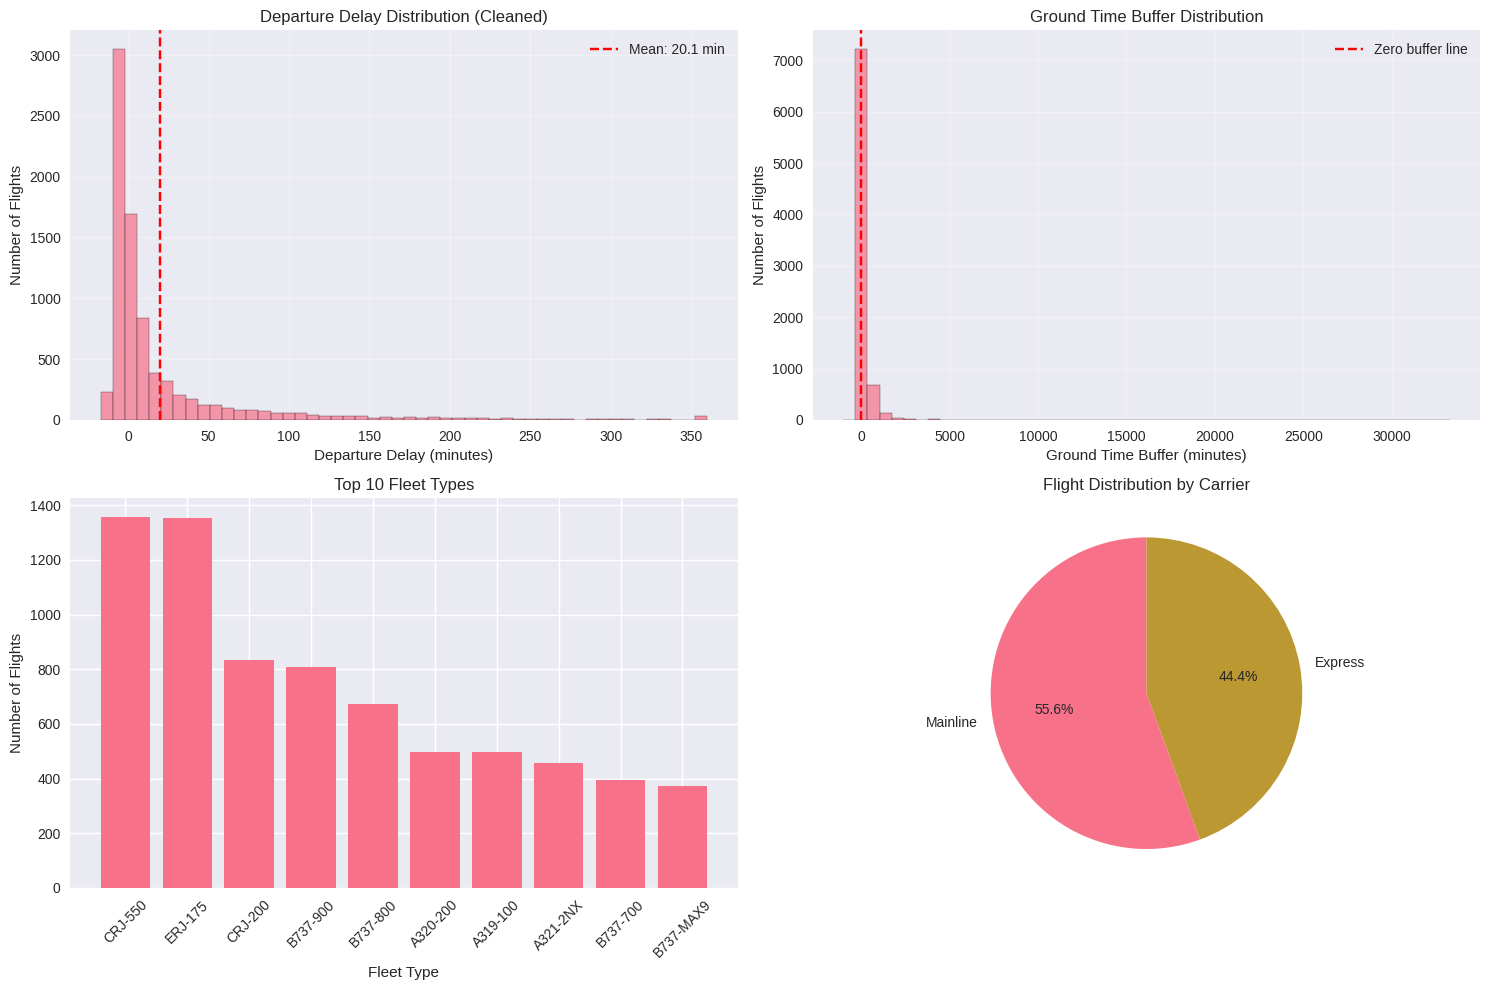

=== FLIGHT LEVEL DATA PREPROCESSING COMPLETE ===


In [10]:
# 1.8 Visualize cleaned flight data
print("1.8 - VISUALIZING CLEANED FLIGHT DATA")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Departure delay distribution
axes[0,0].hist(flight_level_clean['departure_delay_cleaned'], bins=50, alpha=0.7, edgecolor='black')
axes[0,0].axvline(flight_level_clean['departure_delay_cleaned'].mean(), color='red', linestyle='--',
                  label=f'Mean: {flight_level_clean["departure_delay_cleaned"].mean():.1f} min')
axes[0,0].set_xlabel('Departure Delay (minutes)')
axes[0,0].set_ylabel('Number of Flights')
axes[0,0].set_title('Departure Delay Distribution (Cleaned)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Ground time buffer distribution
axes[0,1].hist(flight_level_clean['ground_time_buffer'], bins=50, alpha=0.7, edgecolor='black')
axes[0,1].axvline(0, color='red', linestyle='--', label='Zero buffer line')
axes[0,1].set_xlabel('Ground Time Buffer (minutes)')
axes[0,1].set_ylabel('Number of Flights')
axes[0,1].set_title('Ground Time Buffer Distribution')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Aircraft types
fleet_counts = flight_level_clean['fleet_type'].value_counts().head(10)
axes[1,0].bar(fleet_counts.index, fleet_counts.values)
axes[1,0].set_xlabel('Fleet Type')
axes[1,0].set_ylabel('Number of Flights')
axes[1,0].set_title('Top 10 Fleet Types')
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45)

# Plot 4: Carrier distribution
carrier_counts = flight_level_clean['carrier'].value_counts()
axes[1,1].pie(carrier_counts.values, labels=carrier_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Flight Distribution by Carrier')

plt.tight_layout()
plt.show()

print("=== FLIGHT LEVEL DATA PREPROCESSING COMPLETE ===")

In [11]:
# =============================================
# INVESTIGATE GROUND TIME ANOMALIES
# =============================================

print("=== DEEP DIVE: GROUND TIME ANOMALIES ===")

# 1.8.1 Look at negative buffer flights
print("1.8.1 - FLIGHTS WITH NEGATIVE GROUND TIME BUFFER")
negative_buffer_details = flight_level_clean[flight_level_clean['ground_time_buffer'] < 0]
print(f"Number of flights with negative buffer: {len(negative_buffer_details)}")
print("\nStatistics for negative buffer flights:")
print(negative_buffer_details[['scheduled_ground_time_minutes', 'minimum_turn_minutes', 'ground_time_buffer']].describe())

# Sample of the worst cases
print("\nSample of worst negative buffer flights:")
worst_negative = negative_buffer_details.nsmallest(5, 'ground_time_buffer')
display(worst_negative[['flight_number', 'scheduled_departure_station_code', 'scheduled_arrival_station_code',
                       'scheduled_ground_time_minutes', 'minimum_turn_minutes', 'ground_time_buffer']])

=== DEEP DIVE: GROUND TIME ANOMALIES ===
1.8.1 - FLIGHTS WITH NEGATIVE GROUND TIME BUFFER
Number of flights with negative buffer: 630

Statistics for negative buffer flights:
       scheduled_ground_time_minutes  minimum_turn_minutes  ground_time_buffer
count                     630.000000            630.000000          630.000000
mean                      -13.184127             51.768254          -64.952381
std                        92.250632             23.678496           86.488120
min                      -980.000000             29.000000        -1009.000000
25%                       -30.000000             34.000000          -78.750000
50%                         1.000000             51.000000          -46.000000
75%                        28.000000             56.000000          -19.000000
max                       135.000000            155.000000           -1.000000

Sample of worst negative buffer flights:


flight_number scheduled_departure_station_code  \
5315           5382                              ORD   
6969           5314                              ORD   
1407           4186                              ORD   
5995           5103                              ORD   
2101           5274                              ORD   

     scheduled_arrival_station_code  scheduled_ground_time_minutes  \
5315                            FWA                           -980   
6969                            LNK                           -726   
1407                            MLI                           -705   
5995                            JLN                           -614   
2101                            SBN                           -607   

      minimum_turn_minutes  ground_time_buffer  
5315                    29               -1009  
6969                    29                -755  
1407                    29                -734  
5995                    29                -643  
2101                    29                -636

In [12]:
# 1.8.2 Look at extreme positive buffer flights
print("\n1.8.2 - FLIGHTS WITH EXTREME POSITIVE BUFFER (>1000 minutes)")
extreme_buffer_details = flight_level_clean[flight_level_clean['ground_time_buffer'] > 1000]
print(f"Number of flights with extreme buffer: {len(extreme_buffer_details)}")
print("\nStatistics for extreme buffer flights:")
print(extreme_buffer_details[['scheduled_ground_time_minutes', 'minimum_turn_minutes', 'ground_time_buffer']].describe())

# Sample of the most extreme cases
print("\nSample of most extreme buffer flights:")
most_extreme = extreme_buffer_details.nlargest(5, 'ground_time_buffer')
display(most_extreme[['flight_number', 'scheduled_departure_station_code', 'scheduled_arrival_station_code',
                     'scheduled_ground_time_minutes', 'minimum_turn_minutes', 'ground_time_buffer']])


1.8.2 - FLIGHTS WITH EXTREME POSITIVE BUFFER (>1000 minutes)
Number of flights with extreme buffer: 210

Statistics for extreme buffer flights:
       scheduled_ground_time_minutes  minimum_turn_minutes  ground_time_buffer
count                     210.000000            210.000000          210.000000
mean                     2164.071429             71.300000         2092.771429
std                      2667.184715             47.822144         2669.756447
min                      1056.000000             29.000000         1005.000000
25%                      1254.750000             30.250000         1200.250000
50%                      1543.000000             51.000000         1442.000000
75%                      2139.500000            116.750000         2110.500000
max                     33327.000000            155.000000        33281.000000

Sample of most extreme buffer flights:


flight_number scheduled_departure_station_code  \
6251           1905                              ORD   
3719           2155                              ORD   
3626           4549                              ORD   
1172            411                              ORD   
5466           5577                              ORD   

     scheduled_arrival_station_code  scheduled_ground_time_minutes  \
6251                            PIT                          33327   
3719                            LAX                          16961   
3626                            MLI                           8602   
1172                            DTW                           6839   
5466                            JAX                           6728   

      minimum_turn_minutes  ground_time_buffer  
6251                    46               33281  
3719                    66               16895  
3626                    29                8573  
1172                    43                6796  
5466                    34                6694

In [13]:
# 1.8.3 Check if these anomalies are by specific aircraft or routes
print("\n1.8.3 - PATTERN ANALYSIS OF ANOMALIES")

# Check fleet types with negative buffers
print("Fleet types with negative buffers:")
print(negative_buffer_details['fleet_type'].value_counts().head(10))

# Check carriers with negative buffers
print("\nCarriers with negative buffers:")
print(negative_buffer_details['carrier'].value_counts())

# Check if these are specific to certain routes
print("\nTop routes with negative buffers:")
negative_routes = negative_buffer_details.groupby(['scheduled_departure_station_code', 'scheduled_arrival_station_code']).size().nlargest(10)
print(negative_routes)


1.8.3 - PATTERN ANALYSIS OF ANOMALIES
Fleet types with negative buffers:
fleet_type
B737-800     119
B737-900      93
ERJ-175       78
CRJ-550       69
CRJ-200       63
B737-700      41
A321-2NX      33
A319-100      31
A320-200      31
B737-MAX9     21
Name: count, dtype: int64

Carriers with negative buffers:
carrier
Mainline    420
Express     210
Name: count, dtype: int64

Top routes with negative buffers:
scheduled_departure_station_code  scheduled_arrival_station_code
ORD                               LGA                               26
                                  DCA                               18
                                  IAH                               15
                                  EWR                               13
                                  YYZ                               13
                                  LAX                               12
                                  SFO                               12
                       

In [14]:
print(flight_level_clean.describe())

       flight_number  total_seats  scheduled_ground_time_minutes  \
count    8099.000000  8099.000000                    8099.000000   
mean     3020.995061   122.984072                     183.787258   
std      1812.647939    65.193567                     565.910783   
min         3.000000    50.000000                    -980.000000   
25%      1492.000000    50.000000                      59.000000   
50%      2440.000000   126.000000                      74.000000   
75%      4766.000000   179.000000                     110.000000   
max      6004.000000   364.000000                   33327.000000   

       actual_ground_time_minutes  minimum_turn_minutes  \
count                 8099.000000           8099.000000   
mean                   189.989999             48.039017   
std                    559.699915             24.017513   
min                      1.000000             29.000000   
25%                     60.000000             29.000000   
50%                     81.000000


1.8.4 - GROUND TIME DATA CLEANING STRATEGY
After removing extreme ground time values: 7353 flights (746 removed)
Flights with high ground time risk (<15 min buffer): 2151
Flights with critical ground time risk (<0 min buffer): 630


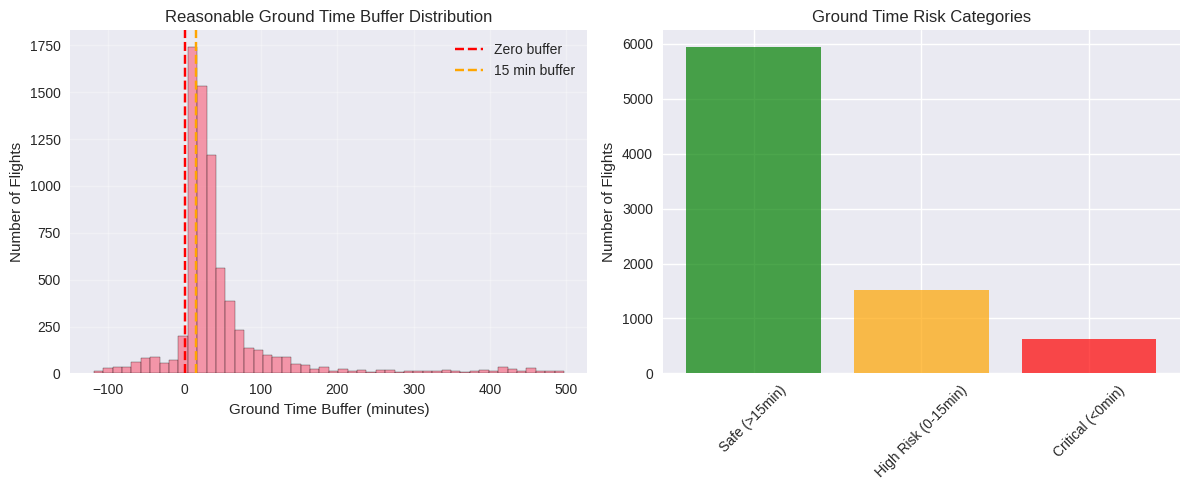

=== FLIGHT DATA ANALYSIS COMPLETE ===


In [15]:
# 1.8.4 Data cleaning strategy for ground time
print("\n1.8.4 - GROUND TIME DATA CLEANING STRATEGY")

# Option 1: Remove extreme outliers
flight_level_reasonable = flight_level_clean[
    (flight_level_clean['ground_time_buffer'] >= -120) &  # Allow some negative but not extreme
    (flight_level_clean['ground_time_buffer'] <= 500)     # Reasonable upper limit
]

print(f"After removing extreme ground time values: {len(flight_level_reasonable)} flights ({len(flight_level_clean) - len(flight_level_reasonable)} removed)")

# Option 2: Create a ground time risk flag
flight_level_clean['ground_time_risk_high'] = flight_level_clean['ground_time_buffer'] < 15  # Less than 15 min buffer
flight_level_clean['ground_time_risk_critical'] = flight_level_clean['ground_time_buffer'] < 0  # Negative buffer

print(f"Flights with high ground time risk (<15 min buffer): {flight_level_clean['ground_time_risk_high'].sum()}")
print(f"Flights with critical ground time risk (<0 min buffer): {flight_level_clean['ground_time_risk_critical'].sum()}")

# Visualize the reasonable ground time distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
reasonable_buffer = flight_level_reasonable['ground_time_buffer']
plt.hist(reasonable_buffer, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Zero buffer')
plt.axvline(15, color='orange', linestyle='--', label='15 min buffer')
plt.xlabel('Ground Time Buffer (minutes)')
plt.ylabel('Number of Flights')
plt.title('Reasonable Ground Time Buffer Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Show risk categories
risk_categories = ['Safe (>15min)', 'High Risk (0-15min)', 'Critical (<0min)']
risk_counts = [
    len(flight_level_clean) - flight_level_clean['ground_time_risk_high'].sum(),
    flight_level_clean['ground_time_risk_high'].sum() - flight_level_clean['ground_time_risk_critical'].sum(),
    flight_level_clean['ground_time_risk_critical'].sum()
]
colors = ['green', 'orange', 'red']
plt.bar(risk_categories, risk_counts, color=colors, alpha=0.7)
plt.ylabel('Number of Flights')
plt.title('Ground Time Risk Categories')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("=== FLIGHT DATA ANALYSIS COMPLETE ===")

In [16]:
flight_level_clean.head()


company_id  flight_number scheduled_departure_date_local  \
0         OO           4792                     2025-08-04   
1         UA            920                     2025-08-03   
2         UA           1776                     2025-08-10   
3         OO           5790                     2025-08-06   
4         UA           1398                     2025-08-05   

  scheduled_departure_station_code scheduled_arrival_station_code  \
0                              ORD                            ROA   
1                              ORD                            LHR   
2                              ORD                            PHL   
3                              ORD                            CRW   
4                              ORD                            ATL   

  scheduled_departure_datetime_local scheduled_arrival_datetime_local  \
0               2025-08-04T17:57:00Z             2025-08-04T21:04:00Z   
1               2025-08-03T18:05:00Z             2025-08-04T08:20:00Z   
2               2025-08-10T18:20:00Z             2025-08-10T21:35:00Z   
3               2025-08-06T18:20:00Z             2025-08-06T21:04:00Z   
4               2025-08-05T18:20:00Z             2025-08-05T21:29:00Z   

  actual_departure_datetime_local actual_arrival_datetime_local  total_seats  \
0            2025-08-04T18:04:00Z          2025-08-04T20:52:00Z           76   
1            2025-08-03T18:27:00Z          2025-08-04T08:06:00Z          167   
2            2025-08-10T20:11:00Z          2025-08-10T23:26:00Z          166   
3            2025-08-06T20:05:00Z          2025-08-06T22:42:00Z           50   
4            2025-08-05T18:16:00Z          2025-08-05T21:49:00Z          166   

   ... minimum_turn_minutes scheduled_departure_datetime_local_dt  \
0  ...                   34             2025-08-04 17:57:00+00:00   
1  ...                  145             2025-08-03 18:05:00+00:00   
2  ...                   51             2025-08-10 18:20:00+00:00   
3  ...                   29             2025-08-06 18:20:00+00:00   
4  ...                   51             2025-08-05 18:20:00+00:00   

   actual_departure_datetime_local_dt  scheduled_arrival_datetime_local_dt  \
0           2025-08-04 18:04:00+00:00            2025-08-04 21:04:00+00:00   
1           2025-08-03 18:27:00+00:00            2025-08-04 08:20:00+00:00   
2           2025-08-10 20:11:00+00:00            2025-08-10 21:35:00+00:00   
3           2025-08-06 20:05:00+00:00            2025-08-06 21:04:00+00:00   
4           2025-08-05 18:16:00+00:00            2025-08-05 21:29:00+00:00   

   actual_arrival_datetime_local_dt departure_delay_minutes  \
0         2025-08-04 20:52:00+00:00                     7.0   
1         2025-08-04 08:06:00+00:00                    22.0   
2         2025-08-10 23:26:00+00:00                   111.0   
3         2025-08-06 22:42:00+00:00                   105.0   
4         2025-08-05 21:49:00+00:00                    -4.0   

  ground_time_buffer departure_delay_cleaned ground_time_risk_high  \
0                  8                     7.0                  True   
1                 90                    22.0                 False   
2                 25                   111.0                 False   
3                194                   105.0                 False   
4                 24                    -4.0                 False   

   ground_time_risk_critical  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 24 columns]

In [17]:
# Compare cleaned vs original data
print("\n🔍 COMPARISON: CLEANED vs ORIGINAL DATA")
print("="*50)

print("GROUND TIME RISK COMPARISON:")
print(f"{'Category':<20} {'Original':<12} {'Cleaned':<12} {'Removed':<12}")
print("-" * 60)

categories = ['Critical (<0min)', 'High Risk (0-15min)', 'Safe (>15min)', 'Extreme Outliers']
original_counts = [
    len(flight_level_clean[flight_level_clean['ground_time_buffer'] < 0]),
    len(flight_level_clean[(flight_level_clean['ground_time_buffer'] >= 0) &
                          (flight_level_clean['ground_time_buffer'] <= 15)]),
    len(flight_level_clean[flight_level_clean['ground_time_buffer'] > 15]),
    len(flight_level_clean[flight_level_clean['ground_time_buffer'] > 500]) +
    len(flight_level_clean[flight_level_clean['ground_time_buffer'] < -120])
]

cleaned_counts = [
    len(flight_level_reasonable[flight_level_reasonable['ground_time_buffer'] < 0]),
    len(flight_level_reasonable[(flight_level_reasonable['ground_time_buffer'] >= 0) &
                               (flight_level_reasonable['ground_time_buffer'] <= 15)]),
    len(flight_level_reasonable[flight_level_reasonable['ground_time_buffer'] > 15]),
    0  # No extreme outliers in cleaned data
]

for i, category in enumerate(categories):
    removed = original_counts[i] - cleaned_counts[i] if i < 3 else original_counts[i]
    print(f"{category:<20} {original_counts[i]:<12} {cleaned_counts[i]:<12} {removed:<12}")

print(f"\n📈 DELAY STATISTICS COMPARISON:")
print(f"{'Metric':<25} {'Original':<12} {'Cleaned':<12}")
print("-" * 50)
metrics = ['Mean Delay', 'Median Delay', 'Max Delay', 'Delayed Flights (%)']
original_delays = [
    flight_level_clean['departure_delay_cleaned'].mean(),
    flight_level_clean['departure_delay_cleaned'].median(),
    flight_level_clean['departure_delay_cleaned'].max(),
    (flight_level_clean['departure_delay_cleaned'] > 0).mean() * 100
]
cleaned_delays = [
    flight_level_reasonable['departure_delay_cleaned'].mean(),
    flight_level_reasonable['departure_delay_cleaned'].median(),
    flight_level_reasonable['departure_delay_cleaned'].max(),
    (flight_level_reasonable['departure_delay_cleaned'] > 0).mean() * 100
]

for i, metric in enumerate(metrics):
    print(f"{metric:<25} {original_delays[i]:<12.1f} {cleaned_delays[i]:<12.1f}")

print(f"\n🎯 DATA QUALITY IMPROVEMENT:")
print(f"• Removed {len(flight_level_clean) - len(flight_level_reasonable)} unrealistic flights")
print(f"• Ground time range: {-120} to 500 minutes (reasonable operational range)")
print(f"• Preserved {len(flight_level_reasonable):,} operationally meaningful flights")


🔍 COMPARISON: CLEANED vs ORIGINAL DATA
GROUND TIME RISK COMPARISON:
Category             Original     Cleaned      Removed     
------------------------------------------------------------
Critical (<0min)     630          556          74          
High Risk (0-15min)  1632         1632         0           
Safe (>15min)        5837         5165         672         
Extreme Outliers     746          0            746         

📈 DELAY STATISTICS COMPARISON:
Metric                    Original     Cleaned     
--------------------------------------------------
Mean Delay                20.1         18.8        
Median Delay              0.0          1.0         
Max Delay                 360.0        360.0       
Delayed Flights (%)       49.6         50.8        

🎯 DATA QUALITY IMPROVEMENT:
• Removed 746 unrealistic flights
• Ground time range: -120 to 500 minutes (reasonable operational range)
• Preserved 7,353 operationally meaningful flights


In [18]:
# =============================================
# AIRPORTS DATA - STEP BY STEP PREPROCESSING
# =============================================

print("=== STEP 3: AIRPORTS DATA PREPROCESSING ===")

# 3.1 First look at the data
print("3.1 - INITIAL DATA EXPLORATION")
print(f"Dataset shape: {airports_data.shape}")
print("\nColumn names:")
print(airports_data.columns.tolist())
print("\nFirst 10 rows:")
display(airports_data.head(10))

=== STEP 3: AIRPORTS DATA PREPROCESSING ===
3.1 - INITIAL DATA EXPLORATION
Dataset shape: (5612, 2)

Column names:
['airport_iata_code', 'iso_country_code']

First 10 rows:


airport_iata_code iso_country_code
0               DAU               PG
1               MDU               PG
2               MXH               PG
3               MIS               PG
4               TIZ               PG
5               TBG               PG
6               RAB               PG
7               GOH               GL
8               THU               GL
9               KEF               IS

In [19]:
# 3.2 Check data types and basic info
print("3.2 - DATA TYPES AND BASIC INFO")
print(airports_data.info())
print("\nBasic statistics:")
display(airports_data.describe(include='all'))

3.2 - DATA TYPES AND BASIC INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airport_iata_code  5612 non-null   object
 1   iso_country_code   5597 non-null   object
dtypes: object(2)
memory usage: 87.8+ KB
None

Basic statistics:


airport_iata_code iso_country_code
count               5612             5597
unique              5612              232
top                  YNJ               US
freq                   1             1477

In [20]:
# 3.3 Check for missing values
print("3.3 - MISSING VALUES ANALYSIS")
missing_values = airports_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(f"Total missing values: {missing_values.sum()}")
    # Show percentage of missing values
    missing_percent = (missing_values / len(airports_data)) * 100
    print("\nMissing values percentage:")
    print(missing_percent[missing_percent > 0])

3.3 - MISSING VALUES ANALYSIS
Missing values per column:
iso_country_code    15
dtype: int64
Total missing values: 15

Missing values percentage:
iso_country_code    0.267284
dtype: float64


In [21]:
# 3.4 Check for duplicate airports
print("3.4 - DUPLICATE AIRPORT CODES ANALYSIS")
print(f"Total rows: {len(airports_data)}")
print(f"Unique airport codes: {airports_data['airport_iata_code'].nunique()}")

duplicate_airports = airports_data[airports_data.duplicated('airport_iata_code', keep=False)]
if len(duplicate_airports) > 0:
    print(f"\nDuplicate airport codes found: {len(duplicate_airports)}")
    display(duplicate_airports.sort_values('airport_iata_code'))
else:
    print("No duplicate airport codes found!")

3.4 - DUPLICATE AIRPORT CODES ANALYSIS
Total rows: 5612
Unique airport codes: 5612
No duplicate airport codes found!


In [22]:
# 3.5 Analyze country distribution
print("3.5 - COUNTRY DISTRIBUTION ANALYSIS")
country_counts = airports_data['iso_country_code'].value_counts()
print("Number of airports per country:")
print(country_counts)

print(f"\nTotal countries: {airports_data['iso_country_code'].nunique()}")
print(f"Total airports: {len(airports_data)}")

3.5 - COUNTRY DISTRIBUTION ANALYSIS
Number of airports per country:
iso_country_code
US    1477
AU     297
CA     284
BR     253
RU     146
      ... 
GD       1
MO       1
BM       1
BN       1
CX       1
Name: count, Length: 232, dtype: int64

Total countries: 232
Total airports: 5612


In [23]:
# 3.6 Data quality checks
print("3.6 - DATA QUALITY CHECKS")

# Check airport code format (should be 3 letters)
invalid_codes = airports_data[~airports_data['airport_iata_code'].str.match('^[A-Z]{3}$', na=False)]
print(f"Airport codes with invalid format: {len(invalid_codes)}")
if len(invalid_codes) > 0:
    display(invalid_codes)

# Check country code format (should be 2 letters)
invalid_countries = airports_data[~airports_data['iso_country_code'].str.match('^[A-Z]{2}$', na=False)]
print(f"Country codes with invalid format: {len(invalid_countries)}")
if len(invalid_countries) > 0:
    display(invalid_countries)

3.6 - DATA QUALITY CHECKS
Airport codes with invalid format: 0
Country codes with invalid format: 15


airport_iata_code iso_country_code
321                OND              NaN
322                ERS              NaN
323                WDH              NaN
2628               ADI              NaN
2629               GOG              NaN
2630               GFY              NaN
2631               MPA              NaN
2632               KMP              NaN
2633               LUD              NaN
2634               OKU              NaN
2635               OMD              NaN
2636               NDU              NaN
2637               RHN              NaN
2638               SWP              NaN
2639               WVB              NaN

In [24]:
# 3.9 - INVESTIGATE AND FIX DATA QUALITY ISSUES
print("3.9 - INVESTIGATE AND FIX DATA QUALITY ISSUES")

print("PROBLEMS FOUND:")
print("1. 15 missing country codes")
print("2. 15 country codes with invalid format (likely the same rows)")

# Let's see the problematic rows
print("\nProblematic rows (missing or invalid country codes):")
problematic_airports = airports_data[
    airports_data['iso_country_code'].isnull() |
    ~airports_data['iso_country_code'].str.match('^[A-Z]{2}$', na=False)
]
display(problematic_airports)

3.9 - INVESTIGATE AND FIX DATA QUALITY ISSUES
PROBLEMS FOUND:
1. 15 missing country codes
2. 15 country codes with invalid format (likely the same rows)

Problematic rows (missing or invalid country codes):


airport_iata_code iso_country_code
321                OND              NaN
322                ERS              NaN
323                WDH              NaN
2628               ADI              NaN
2629               GOG              NaN
2630               GFY              NaN
2631               MPA              NaN
2632               KMP              NaN
2633               LUD              NaN
2634               OKU              NaN
2635               OMD              NaN
2636               NDU              NaN
2637               RHN              NaN
2638               SWP              NaN
2639               WVB              NaN

In [25]:
# 3.10 - ANALYZE THE PROBLEMATIC AIRPORTS
print("3.10 - ANALYZE PROBLEMATIC AIRPORTS")

# Check if these are important airports we need to keep
important_airports = ['ORD', 'LGA', 'DCA', 'IAH', 'EWR', 'YYZ', 'LAX', 'SFO', 'DEN', 'ATL']
problematic_important = problematic_airports[problematic_airports['airport_iata_code'].isin(important_airports)]

if len(problematic_important) > 0:
    print("⚠️  IMPORTANT AIRPORTS WITH MISSING COUNTRY CODES:")
    display(problematic_important)
else:
    print("✅ No important airports have missing country codes")

3.10 - ANALYZE PROBLEMATIC AIRPORTS
✅ No important airports have missing country codes


In [26]:
# 3.11 - DECISION: HOW TO HANDLE MISSING COUNTRY CODES
print("3.11 - DECISION: HOW TO HANDLE MISSING COUNTRY CODES")

print("OPTIONS:")
print("1. Remove rows with missing country codes (15 rows)")
print("2. Research and fill in missing country codes")
print("3. Keep them but mark as 'Unknown'")

# Since this is a small dataset and we don't know the countries, let's see what percentage we're dealing with
total_airports = len(airports_data)
problematic_count = len(problematic_airports)

print(f"\nTotal airports: {total_airports}")
print(f"Problematic airports: {problematic_count}")
print(f"Percentage problematic: {(problematic_count/total_airports)*100:.2f}%")

# For now, let's create a cleaned version and keep the original
airports_data_clean = airports_data.copy()

# Option: Mark missing country codes as 'UN' for Unknown
airports_data_clean['iso_country_code'] = airports_data_clean['iso_country_code'].fillna('UN')

# Also fix any invalid format ones by marking as Unknown
mask_invalid = ~airports_data_clean['iso_country_code'].str.match('^[A-Z]{2}$', na=False)
airports_data_clean.loc[mask_invalid, 'iso_country_code'] = 'UN'

print(f"\nAfter cleaning:")
print(f"Missing values: {airports_data_clean['iso_country_code'].isnull().sum()}")
print(f"Invalid formats: {(~airports_data_clean['iso_country_code'].str.match('^[A-Z]{2}$')).sum()}")

# Verify the fix
print("\nSample of cleaned data (showing previously problematic rows):")
cleaned_problematic = airports_data_clean[airports_data_clean['airport_iata_code'].isin(problematic_airports['airport_iata_code'])]
display(cleaned_problematic.head(10))

3.11 - DECISION: HOW TO HANDLE MISSING COUNTRY CODES
OPTIONS:
1. Remove rows with missing country codes (15 rows)
2. Research and fill in missing country codes
3. Keep them but mark as 'Unknown'

Total airports: 5612
Problematic airports: 15
Percentage problematic: 0.27%

After cleaning:
Missing values: 0
Invalid formats: 0

Sample of cleaned data (showing previously problematic rows):


airport_iata_code iso_country_code
321                OND               UN
322                ERS               UN
323                WDH               UN
2628               ADI               UN
2629               GOG               UN
2630               GFY               UN
2631               MPA               UN
2632               KMP               UN
2633               LUD               UN
2634               OKU               UN

In [27]:
# 3.12 - FINAL CLEANED DATA SUMMARY
print("3.12 - FINAL CLEANED AIRPORTS DATA SUMMARY")

print("📊 BEFORE CLEANING:")
print(f"   - Total airports: {len(airports_data)}")
print(f"   - Missing country codes: {airports_data['iso_country_code'].isnull().sum()}")
print(f"   - Invalid country codes: {(~airports_data['iso_country_code'].str.match('^[A-Z]{2}$', na=False)).sum()}")

print("\n📊 AFTER CLEANING:")
print(f"   - Total airports: {len(airports_data_clean)}")
print(f"   - Missing country codes: {airports_data_clean['iso_country_code'].isnull().sum()}")
print(f"   - Invalid country codes: {(~airports_data_clean['iso_country_code'].str.match('^[A-Z]{2}$')).sum()}")
print(f"   - Airports marked 'UN' (Unknown): {(airports_data_clean['iso_country_code'] == 'UN').sum()}")

print("\n🌎 COUNTRY DISTRIBUTION IN CLEANED DATA:")
country_distribution = airports_data_clean['iso_country_code'].value_counts()
print(f"Top 10 countries:")
print(country_distribution.head(10))

print(f"\nUnknown countries ('UN'): {country_distribution.get('UN', 0)}")

3.12 - FINAL CLEANED AIRPORTS DATA SUMMARY
📊 BEFORE CLEANING:
   - Total airports: 5612
   - Missing country codes: 15
   - Invalid country codes: 15

📊 AFTER CLEANING:
   - Total airports: 5612
   - Missing country codes: 0
   - Invalid country codes: 0
   - Airports marked 'UN' (Unknown): 15

🌎 COUNTRY DISTRIBUTION IN CLEANED DATA:
Top 10 countries:
iso_country_code
US    1477
AU     297
CA     284
BR     253
RU     146
IN     126
ID     125
FR     104
CN      97
JP      89
Name: count, dtype: int64

Unknown countries ('UN'): 15


In [28]:
# 3.13 - CHECK IF WE HAVE ALL THE AIRPORTS WE NEED
print("3.13 - CHECKING COVERAGE OF IMPORTANT AIRPORTS")

# List of airports we've seen in the flight data
airports_from_flights = flight_level_clean['scheduled_arrival_station_code'].unique()
print(f"Airports in flight data: {len(airports_from_flights)}")

# Check which ones are missing from our airports dataset
missing_in_airports_data = [ap for ap in airports_from_flights if ap not in airports_data_clean['airport_iata_code'].values]

print(f"\nAirports in flight data but MISSING from airports dataset: {len(missing_in_airports_data)}")
if missing_in_airports_data:
    print("Missing airports:", missing_in_airports_data[:10])  # Show first 10

# Check coverage percentage
coverage = (len(airports_from_flights) - len(missing_in_airports_data)) / len(airports_from_flights) * 100
print(f"📈 Coverage: {coverage:.2f}% of flight data airports are in airports dataset")

print("\n=== AIRPORTS DATA CLEANING COMPLETE ===")

3.13 - CHECKING COVERAGE OF IMPORTANT AIRPORTS
Airports in flight data: 188

Airports in flight data but MISSING from airports dataset: 0
📈 Coverage: 100.00% of flight data airports are in airports dataset

=== AIRPORTS DATA CLEANING COMPLETE ===


In [29]:
# 4.3 Check for missing values
print("4.3 - MISSING VALUES ANALYSIS")
missing_values = pnr_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(f"Total missing values: {missing_values.sum()}")
    # Show percentage of missing values
    missing_percent = (missing_values / len(pnr_data)) * 100
    print("\nMissing values percentage:")
    print(missing_percent[missing_percent > 0])

4.3 - MISSING VALUES ANALYSIS
Missing values per column:
Series([], dtype: int64)
No missing values found!


In [30]:
# 4.4 Check unique values in categorical columns
print("4.4 - CATEGORICAL VALUES ANALYSIS")

categorical_columns = ['company_id', 'is_child', 'basic_economy_ind', 'is_stroller_user']
for col in categorical_columns:
    if col in pnr_data.columns:
        print(f"\n{col} value counts:")
        print(pnr_data[col].value_counts())
        print(f"Unique values: {pnr_data[col].nunique()}")

4.4 - CATEGORICAL VALUES ANALYSIS

company_id value counts:
company_id
UA    531217
OO     89758
YX     33699
G7     33204
Name: count, dtype: int64
Unique values: 4

is_child value counts:
is_child
N    646139
Y     41739
Name: count, dtype: int64
Unique values: 2

basic_economy_ind value counts:
basic_economy_ind
0    605798
1     82080
Name: count, dtype: int64
Unique values: 2

is_stroller_user value counts:
is_stroller_user
N    679136
Y      8742
Name: count, dtype: int64
Unique values: 2


In [31]:
# 4.5 Check date columns
print("4.5 - DATE COLUMNS ANALYSIS")


# Convert date columns
date_columns = ['scheduled_departure_date_local', 'pnr_creation_date']
for col in date_columns:
    pnr_data[f'{col}_dt'] = pd.to_datetime(pnr_data[col], errors='coerce')
    print(f"{col}: {pnr_data[f'{col}_dt'].notna().sum()} successful conversions out of {len(pnr_data)}")

# Check for failed conversions
date_failures = pnr_data[[f'{col}_dt' for col in date_columns]].isnull().sum()
print("\nFailed date conversions:")
print(date_failures[date_failures > 0])

4.5 - DATE COLUMNS ANALYSIS
scheduled_departure_date_local: 687878 successful conversions out of 687878
pnr_creation_date: 687878 successful conversions out of 687878

Failed date conversions:
Series([], dtype: int64)


In [32]:
# 4.6 Analyze PNR patterns
print("4.6 - PNR PATTERNS ANALYSIS")

print(f"Total PNR records: {len(pnr_data)}")
print(f"Unique PNRs (record_locator): {pnr_data['record_locator'].nunique()}")

# Check how many passengers per PNR
passengers_per_pnr = pnr_data.groupby('record_locator')['total_pax'].sum()
print(f"\nPassengers per PNR statistics:")
print(passengers_per_pnr.describe())

# Check for duplicate records
duplicate_check = pnr_data.duplicated().sum()
print(f"\nFully duplicate rows: {duplicate_check}")

4.6 - PNR PATTERNS ANALYSIS
Total PNR records: 687878
Unique PNRs (record_locator): 609758

Passengers per PNR statistics:
count    609758.000000
mean          1.697593
std           1.945748
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          86.000000
Name: total_pax, dtype: float64

Fully duplicate rows: 0


In [33]:
# 4.7 Analyze special service indicators
print("4.7 - SPECIAL SERVICES ANALYSIS")

# Create special service flags
print("Special service indicators summary:")
print(f"Children (is_child='Y'): {(pnr_data['is_child'] == 'Y').sum()}")
print(f"Stroller users: {(pnr_data['is_stroller_user'] == 'Y').sum()}")
print(f"Lap children (count > 0): {(pnr_data['lap_child_count'] > 0).sum()}")
print(f"Basic economy: {(pnr_data['basic_economy_ind'] == 1).sum()}")

# Create combined special services indicator
pnr_data['has_special_services'] = (
    (pnr_data['is_child'] == 'Y') |
    (pnr_data['is_stroller_user'] == 'Y') |
    (pnr_data['lap_child_count'] > 0)
).astype(int)

print(f"\nPassengers with any special services: {pnr_data['has_special_services'].sum()}")
print(f"Percentage with special services: {(pnr_data['has_special_services'].sum() / len(pnr_data) * 100):.2f}%")

4.7 - SPECIAL SERVICES ANALYSIS
Special service indicators summary:
Children (is_child='Y'): 41739
Stroller users: 8742
Lap children (count > 0): 5588
Basic economy: 82080

Passengers with any special services: 47458
Percentage with special services: 6.90%


In [34]:
# 4.8 Check data consistency issues
print("4.8 - DATA CONSISTENCY CHECKS")

# Check if total_pax makes sense (should be at least 1)
invalid_pax = pnr_data[pnr_data['total_pax'] < 1]
print(f"Records with total_pax < 1: {len(invalid_pax)}")

# Check if lap_child_count is reasonable
unreasonable_lap = pnr_data[pnr_data['lap_child_count'] > pnr_data['total_pax']]
print(f"Records with lap_child_count > total_pax: {len(unreasonable_lap)}")

# Check for negative values in numeric columns
numeric_columns = ['total_pax', 'lap_child_count']
for col in numeric_columns:
    negative_values = pnr_data[pnr_data[col] < 0]
    print(f"Records with negative {col}: {len(negative_values)}")

4.8 - DATA CONSISTENCY CHECKS
Records with total_pax < 1: 0
Records with lap_child_count > total_pax: 0
Records with negative total_pax: 0
Records with negative lap_child_count: 0


4.9 - DATA VISUALIZATION


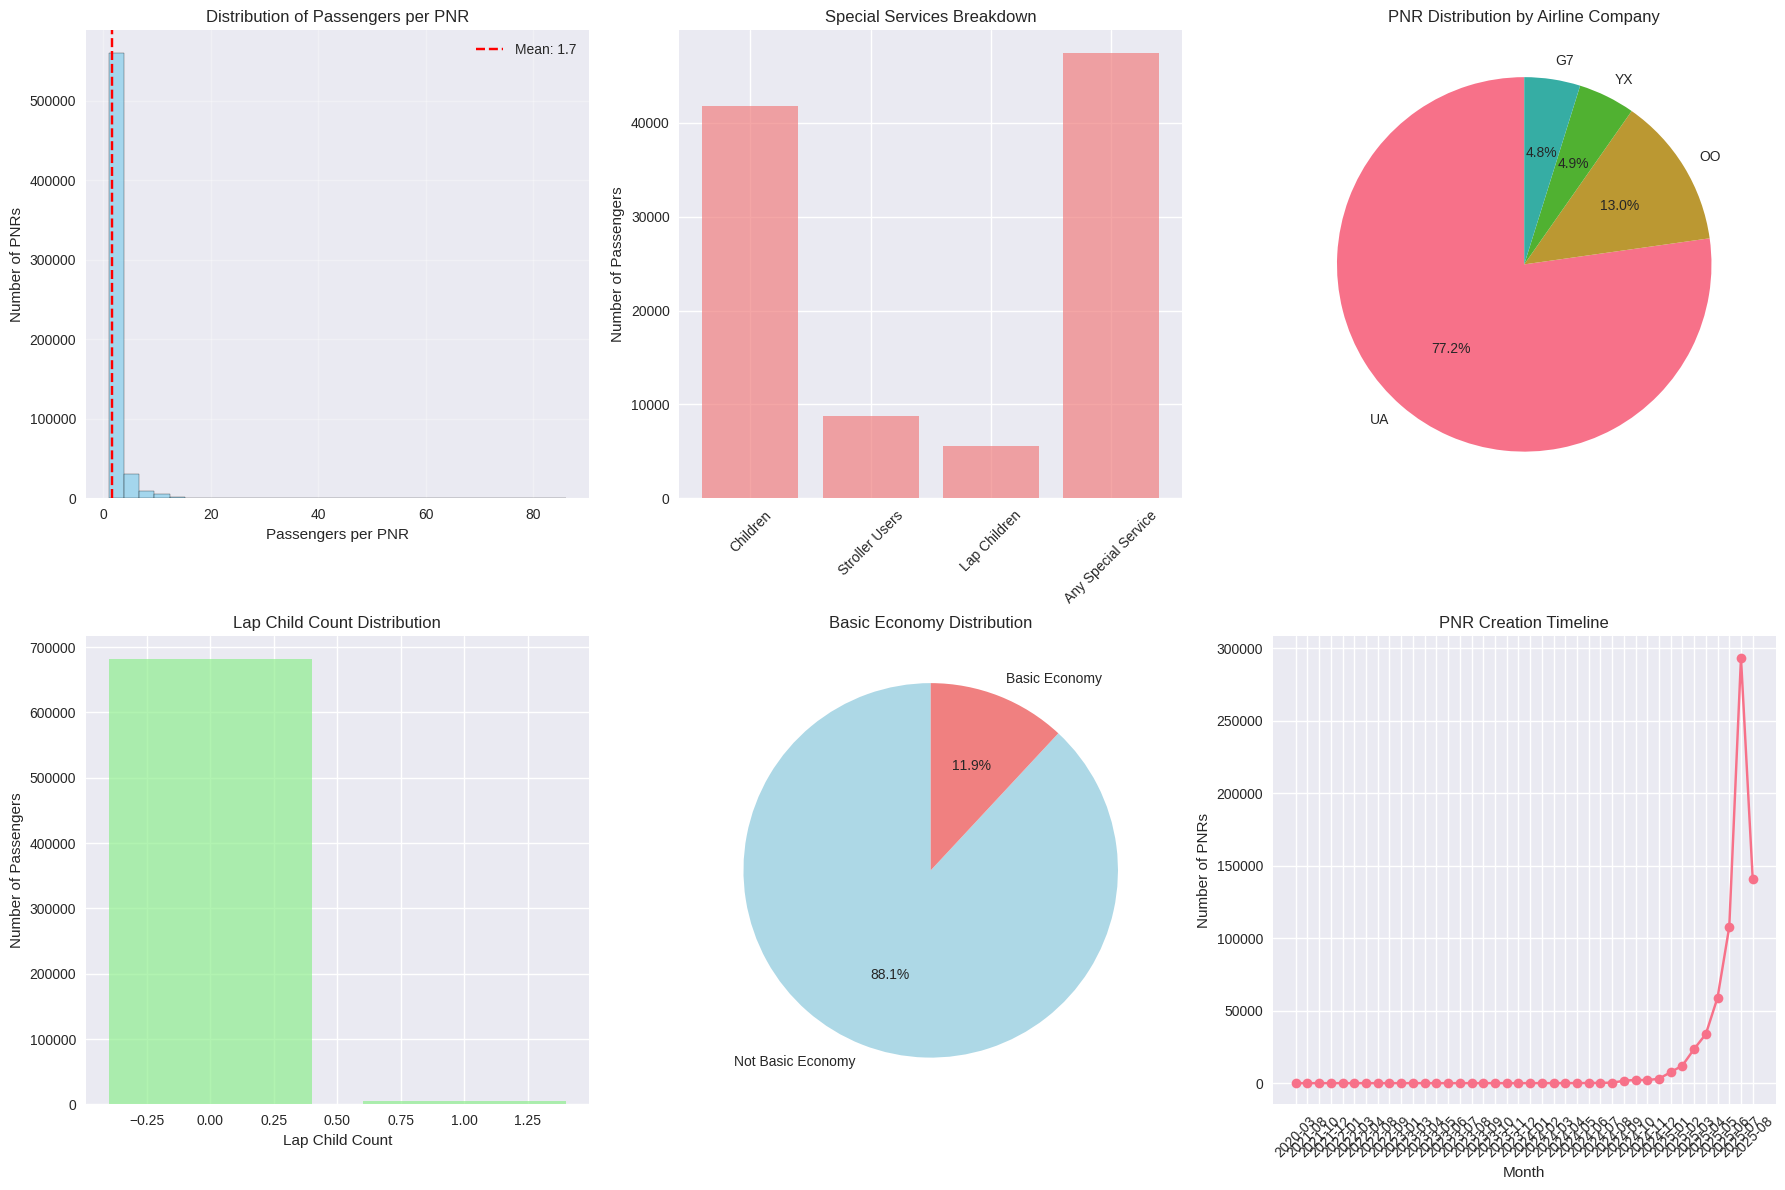

In [35]:
# 4.9 Visualize PNR data patterns
print("4.9 - DATA VISUALIZATION")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Distribution of passengers per PNR
axes[0,0].hist(passengers_per_pnr, bins=30, alpha=0.7, edgecolor='black', color='skyblue')
axes[0,0].axvline(passengers_per_pnr.mean(), color='red', linestyle='--',
                  label=f'Mean: {passengers_per_pnr.mean():.1f}')
axes[0,0].set_xlabel('Passengers per PNR')
axes[0,0].set_ylabel('Number of PNRs')
axes[0,0].set_title('Distribution of Passengers per PNR')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Special services breakdown
special_services_data = {
    'Children': (pnr_data['is_child'] == 'Y').sum(),
    'Stroller Users': (pnr_data['is_stroller_user'] == 'Y').sum(),
    'Lap Children': (pnr_data['lap_child_count'] > 0).sum(),
    'Any Special Service': pnr_data['has_special_services'].sum()
}
axes[0,1].bar(special_services_data.keys(), special_services_data.values(), color='lightcoral', alpha=0.7)
axes[0,1].set_ylabel('Number of Passengers')
axes[0,1].set_title('Special Services Breakdown')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Company distribution
company_counts = pnr_data['company_id'].value_counts()
axes[0,2].pie(company_counts.values, labels=company_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,2].set_title('PNR Distribution by Airline Company')

# Plot 4: Lap child count distribution
lap_child_dist = pnr_data['lap_child_count'].value_counts().sort_index()
axes[1,0].bar(lap_child_dist.index, lap_child_dist.values, alpha=0.7, color='lightgreen')
axes[1,0].set_xlabel('Lap Child Count')
axes[1,0].set_ylabel('Number of Passengers')
axes[1,0].set_title('Lap Child Count Distribution')

# Plot 5: Basic economy distribution
basic_econ_counts = pnr_data['basic_economy_ind'].value_counts()
axes[1,1].pie(basic_econ_counts.values, labels=['Not Basic Economy', 'Basic Economy'],
              autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[1,1].set_title('Basic Economy Distribution')

# Plot 6: PNR creation timeline (if dates are available)
if 'pnr_creation_date_dt' in pnr_data.columns:
    pnr_data['pnr_creation_month'] = pnr_data['pnr_creation_date_dt'].dt.to_period('M')
    monthly_pnrs = pnr_data['pnr_creation_month'].value_counts().sort_index()
    axes[1,2].plot(monthly_pnrs.index.astype(str), monthly_pnrs.values, marker='o')
    axes[1,2].set_xlabel('Month')
    axes[1,2].set_ylabel('Number of PNRs')
    axes[1,2].set_title('PNR Creation Timeline')
    axes[1,2].tick_params(axis='x', rotation=45)
else:
    axes[1,2].text(0.5, 0.5, 'No PNR creation date data', ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('PNR Creation Timeline')

plt.tight_layout()
plt.show()

In [36]:
# 4.10 Final PNR data summary
print("4.10 - FINAL PNR DATA SUMMARY")

print("📊 PNR DATA OVERVIEW:")
print(f"   - Total PNR records: {len(pnr_data):,}")
print(f"   - Unique PNRs: {pnr_data['record_locator'].nunique():,}")
print(f"   - Total passengers: {pnr_data['total_pax'].sum():,}")
print(f"   - Average passengers per PNR: {pnr_data['total_pax'].mean():.2f}")

print("\n🎫 SPECIAL SERVICES SUMMARY:")
print(f"   - Passengers with special services: {pnr_data['has_special_services'].sum():,}")
print(f"   - Percentage with special services: {(pnr_data['has_special_services'].sum() / len(pnr_data) * 100):.2f}%")
print(f"   - Children: {(pnr_data['is_child'] == 'Y').sum():,}")
print(f"   - Stroller users: {(pnr_data['is_stroller_user'] == 'Y').sum():,}")
print(f"   - Lap children: {(pnr_data['lap_child_count'] > 0).sum():,}")

print("\n✅ DATA QUALITY CHECK:")
print(f"   - Missing values: {pnr_data.isnull().sum().sum()}")
print(f"   - Invalid passenger counts: {len(pnr_data[pnr_data['total_pax'] < 1])}")
print(f"   - Date conversion issues: {date_failures.sum()}")

print("\n=== PNR DATA PREPROCESSING COMPLETE ===")

4.10 - FINAL PNR DATA SUMMARY
📊 PNR DATA OVERVIEW:
   - Total PNR records: 687,878
   - Unique PNRs: 609,758
   - Total passengers: 1,035,121
   - Average passengers per PNR: 1.50

🎫 SPECIAL SERVICES SUMMARY:
   - Passengers with special services: 47,458
   - Percentage with special services: 6.90%
   - Children: 41,739
   - Stroller users: 8,742
   - Lap children: 5,588

✅ DATA QUALITY CHECK:
   - Missing values: 0
   - Invalid passenger counts: 0
   - Date conversion issues: 0

=== PNR DATA PREPROCESSING COMPLETE ===


In [37]:
pnr_data.head()

company_id  flight_number scheduled_departure_date_local  \
0         UA           2494                     2025-08-04   
1         UA           2483                     2025-08-06   
2         UA           1620                     2025-08-01   
3         UA           1620                     2025-08-01   
4         UA           1620                     2025-08-01   

  scheduled_departure_station_code scheduled_arrival_station_code  \
0                              ORD                            MCI   
1                              ORD                            IAH   
2                              ORD                            SEA   
3                              ORD                            SEA   
4                              ORD                            SEA   

  record_locator pnr_creation_date  total_pax is_child  basic_economy_ind  \
0     PNR_520583        2025-07-07          1        N                  0   
1     PNR_296107        2025-03-28          1        N                  0   
2     PNR_296108        2025-06-30          4        Y                  0   
3     PNR_296108        2025-06-30          4        N                  0   
4     PNR_296108        2025-06-30          4        Y                  0   

  is_stroller_user  lap_child_count scheduled_departure_date_local_dt  \
0                N                0                        2025-08-04   
1                N                0                        2025-08-06   
2                N                0                        2025-08-01   
3                N                1                        2025-08-01   
4                Y                0                        2025-08-01   

  pnr_creation_date_dt  has_special_services pnr_creation_month  
0           2025-07-07                     0            2025-07  
1           2025-03-28                     0            2025-03  
2           2025-06-30                     1            2025-06  
3           2025-06-30                     1            2025-06  
4           2025-06-30                     1            2025-06

In [38]:
# 5.3 Check for missing values
print("5.3 - MISSING VALUES ANALYSIS")
missing_values = bag_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(f"Total missing values: {missing_values.sum()}")
    # Show percentage of missing values
    missing_percent = (missing_values / len(bag_data)) * 100
    print("\nMissing values percentage:")
    print(missing_percent[missing_percent > 0])

5.3 - MISSING VALUES ANALYSIS
Missing values per column:
Series([], dtype: int64)
No missing values found!


In [39]:
# 5.4 Check unique values in categorical columns
print("5.4 - CATEGORICAL VALUES ANALYSIS")

categorical_columns = ['company_id', 'bag_type']
for col in categorical_columns:
    if col in bag_data.columns:
        print(f"\n{col} value counts:")
        print(bag_data[col].value_counts())
        print(f"Unique values: {bag_data[col].nunique()}")

5.4 - CATEGORICAL VALUES ANALYSIS

company_id value counts:
company_id
UA    499299
OO     97659
YX     32252
G7     29456
LH      7156
NH      4070
ET      2557
LX      2487
AC      2170
AA      2064
OS      1731
EK      1474
TK      1169
XX      1016
AV       356
CM       343
EI       261
AI       260
LF       206
AS       206
BR       188
KG       187
LO       128
FI       107
DL        88
KL        48
KE        46
TP        42
9X        34
SK        32
BA        29
CX        20
AF        16
AY        15
IB        12
SN        10
JL         8
AZ         5
AD         5
WS         5
AM         4
WN         4
EY         3
A3         3
OZ         2
HA         2
VN         2
NZ         2
LA         1
NK         1
4Y         1
XQ         1
CA         1
SQ         1
Name: count, dtype: int64
Unique values: 54

bag_type value counts:
bag_type
Transfer        347546
Origin          290121
Hot Transfer     49578
Name: count, dtype: int64
Unique values: 3


In [40]:
# 5.5 Check date columns
print("5.5 - DATE COLUMNS ANALYSIS")

# Convert date columns
date_columns = ['scheduled_departure_date_local', 'bag_tag_issue_date']
for col in date_columns:
    bag_data[f'{col}_dt'] = pd.to_datetime(bag_data[col], errors='coerce')
    print(f"{col}: {bag_data[f'{col}_dt'].notna().sum()} successful conversions out of {len(bag_data)}")

# Check for failed conversions
date_failures = bag_data[[f'{col}_dt' for col in date_columns]].isnull().sum()
print("\nFailed date conversions:")
print(date_failures[date_failures > 0])

5.5 - DATE COLUMNS ANALYSIS
scheduled_departure_date_local: 687245 successful conversions out of 687245
bag_tag_issue_date: 687245 successful conversions out of 687245

Failed date conversions:
Series([], dtype: int64)


In [41]:
# 5.6 Analyze bag patterns by flight
print("5.6 - BAG PATTERNS BY FLIGHT ANALYSIS")

# Group by flight to understand bag volumes
bags_per_flight = bag_data.groupby([
    'company_id', 'flight_number', 'scheduled_departure_date_local',
    'scheduled_departure_station_code', 'scheduled_arrival_station_code'
]).agg(
    total_bags=('bag_tag_unique_number', 'count'),
    transfer_bags=('bag_type', lambda x: (x == 'Transfer').sum()),
    hot_transfer_bags=('bag_type', lambda x: (x == 'Hot Transfer').sum()),
    origin_bags=('bag_type', lambda x: (x == 'Origin').sum())
).reset_index()

print("Bag statistics per flight:")
print(bags_per_flight[['total_bags', 'transfer_bags', 'origin_bags']].describe())

# Calculate transfer ratio
bags_per_flight['total_transfer_bags'] = bags_per_flight['transfer_bags'] + bags_per_flight['hot_transfer_bags']
bags_per_flight['transfer_bag_ratio'] = bags_per_flight['total_transfer_bags'] / bags_per_flight['total_bags']
bags_per_flight['hot_transfer_ratio'] = bags_per_flight['hot_transfer_bags'] / bags_per_flight['total_bags']  # Optional but useful
bags_per_flight['transfer_bag_ratio'] = bags_per_flight['transfer_bag_ratio'].fillna(0)

print(f"\nFlights with bag data: {len(bags_per_flight)}")
print(f"Average transfer bag ratio: {bags_per_flight['transfer_bag_ratio'].mean():.4f} ({bags_per_flight['transfer_bag_ratio'].mean()*100:.2f}%)")

5.6 - BAG PATTERNS BY FLIGHT ANALYSIS
Bag statistics per flight:
         total_bags  transfer_bags   origin_bags
count  10863.000000   10863.000000  10863.000000
mean      63.264752      31.993556     26.707263
std       55.136833      32.575134     32.304642
min        1.000000       0.000000      0.000000
25%       25.000000      10.000000      2.000000
50%       51.000000      25.000000     15.000000
75%       93.000000      43.000000     40.000000
max      461.000000     366.000000    246.000000

Flights with bag data: 10863
Average transfer bag ratio: 0.6815 (68.15%)


In [42]:
# 5.7 Analyze bag type distribution
print("5.7 - BAG TYPE DISTRIBUTION ANALYSIS")

# Overall bag type distribution
print("Overall bag type distribution:")
bag_type_summary = bag_data['bag_type'].value_counts()
print(bag_type_summary)

# Bag type distribution by airline company
print("\nBag type distribution by company:")
bag_type_by_company = pd.crosstab(bag_data['company_id'], bag_data['bag_type'])
print(bag_type_by_company)

# Calculate percentages
bag_type_percent = (bag_type_summary / len(bag_data)) * 100
print(f"\nBag type percentages:")
for bag_type, count in bag_type_summary.items():
    print(f"  {bag_type}: {count:,} bags ({bag_type_percent[bag_type]:.2f}%)")

5.7 - BAG TYPE DISTRIBUTION ANALYSIS
Overall bag type distribution:
bag_type
Transfer        347546
Origin          290121
Hot Transfer     49578
Name: count, dtype: int64

Bag type distribution by company:
bag_type    Hot Transfer  Origin  Transfer
company_id                                
4Y                     0       0         1
9X                     0       0        34
A3                     0       0         3
AA                    56      33      1975
AC                   211       2      1957
AD                     0       0         5
AF                     0       0        16
AI                     0       0       260
AM                     0       0         4
AS                    11       0       195
AV                     0       0       356
AY                     0       0        15
AZ                     0       0         5
BA                     0       0        29
BR                     0       0       188
CA                     0       0         1
CM                 

In [43]:
# 5.8 Check for duplicate bag tags
print("5.8 - DUPLICATE BAG TAGS ANALYSIS")

print(f"Total bag records: {len(bag_data)}")
print(f"Unique bag tags: {bag_data['bag_tag_unique_number'].nunique()}")

duplicate_bags = bag_data.duplicated('bag_tag_unique_number', keep=False)
print(f"Duplicate bag tags: {duplicate_bags.sum()}")

if duplicate_bags.sum() > 0:
    print("\nSample of duplicate bag tags:")
    duplicate_examples = bag_data[duplicate_bags].sort_values('bag_tag_unique_number').head(10)
    display(duplicate_examples[['bag_tag_unique_number', 'company_id', 'flight_number', 'bag_type']])

5.8 - DUPLICATE BAG TAGS ANALYSIS
Total bag records: 687245
Unique bag tags: 667155
Duplicate bag tags: 37252

Sample of duplicate bag tags:


bag_tag_unique_number company_id  flight_number      bag_type
406111         BAGTAG_100009         AC            508      Transfer
406110         BAGTAG_100009         UA           2306  Hot Transfer
62037          BAGTAG_100057         UA           1599      Transfer
62036          BAGTAG_100057         UA           1144  Hot Transfer
406275         BAGTAG_100061         UA            881      Transfer
406274         BAGTAG_100061         UA            881      Transfer
406639         BAGTAG_100146         UA           2211      Transfer
406638         BAGTAG_100146         UA           1215      Transfer
406637         BAGTAG_100146         UA            445      Transfer
62513          BAGTAG_100175         UA            422      Transfer

In [44]:
# 5.9 Check data consistency issues
print("5.9 - DATA CONSISTENCY CHECKS")

# Check if there are flights with only transfer or only origin bags
flight_bag_types = bag_data.groupby([
    'company_id', 'flight_number', 'scheduled_departure_date_local'
])['bag_type'].nunique()

flights_with_single_bag_type = (flight_bag_types == 1).sum()
print(f"Flights with only one type of bag: {flights_with_single_bag_type}")

# Check for unusual bag tag patterns
print(f"\nBag tag format check:")
# Check if bag tags follow expected pattern (starting with BAGTAG_)
pattern_check = bag_data['bag_tag_unique_number'].str.startswith('BAGTAG_').mean()
print(f"Bags with standard 'BAGTAG_' prefix: {pattern_check*100:.2f}%")

5.9 - DATA CONSISTENCY CHECKS
Flights with only one type of bag: 1671

Bag tag format check:
Bags with standard 'BAGTAG_' prefix: 100.00%


5.10 - DATA VISUALIZATION


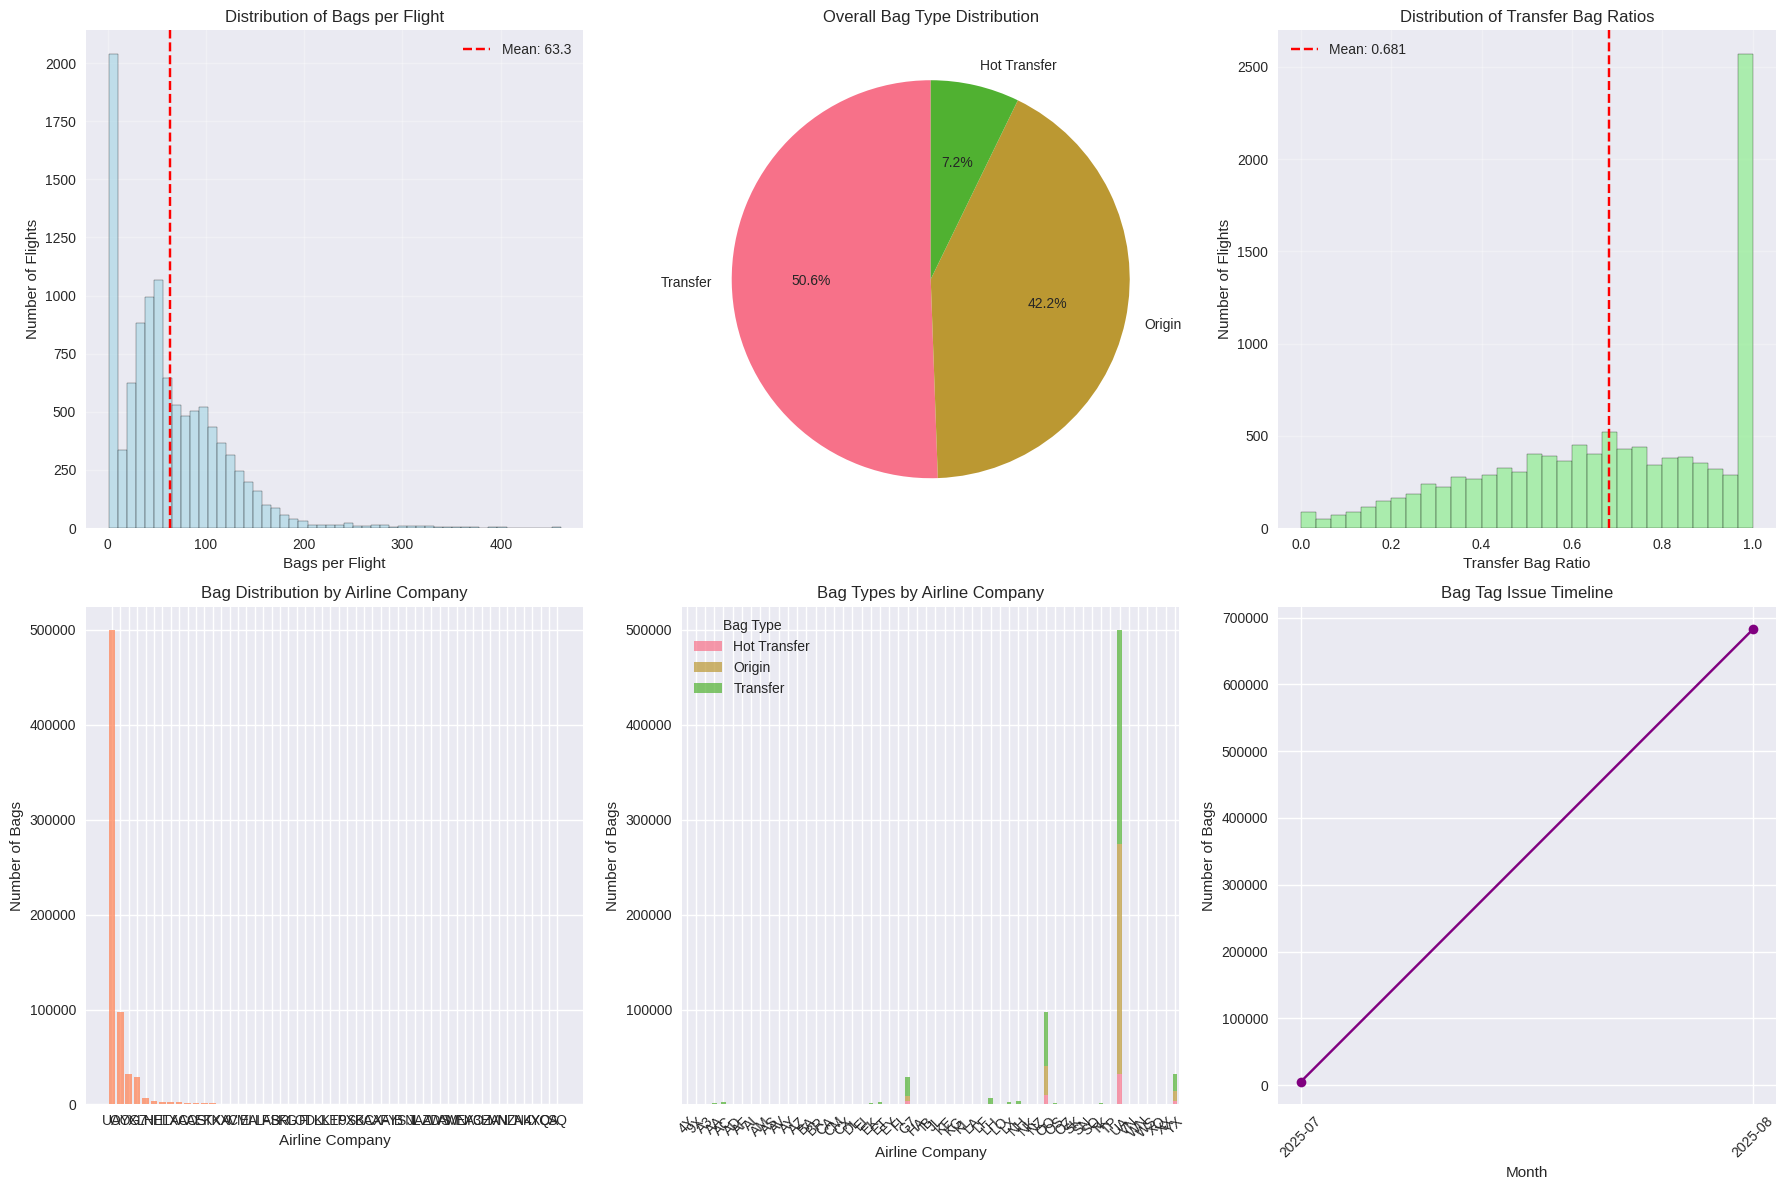

In [45]:
# 5.10 Visualize bag data patterns
print("5.10 - DATA VISUALIZATION")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Distribution of bags per flight
axes[0,0].hist(bags_per_flight['total_bags'], bins=50, alpha=0.7, edgecolor='black', color='lightblue')
axes[0,0].axvline(bags_per_flight['total_bags'].mean(), color='red', linestyle='--',
                  label=f'Mean: {bags_per_flight["total_bags"].mean():.1f}')
axes[0,0].set_xlabel('Bags per Flight')
axes[0,0].set_ylabel('Number of Flights')
axes[0,0].set_title('Distribution of Bags per Flight')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Bag type distribution
axes[0,1].pie(bag_type_summary.values, labels=bag_type_summary.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Overall Bag Type Distribution')

# Plot 3: Transfer bag ratio distribution
axes[0,2].hist(bags_per_flight['transfer_bag_ratio'], bins=30, alpha=0.7, edgecolor='black', color='lightgreen')
axes[0,2].axvline(bags_per_flight['transfer_bag_ratio'].mean(), color='red', linestyle='--',
                  label=f'Mean: {bags_per_flight["transfer_bag_ratio"].mean():.3f}')
axes[0,2].set_xlabel('Transfer Bag Ratio')
axes[0,2].set_ylabel('Number of Flights')
axes[0,2].set_title('Distribution of Transfer Bag Ratios')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Plot 4: Company distribution
company_counts = bag_data['company_id'].value_counts()
axes[1,0].bar(company_counts.index, company_counts.values, color='coral', alpha=0.7)
axes[1,0].set_xlabel('Airline Company')
axes[1,0].set_ylabel('Number of Bags')
axes[1,0].set_title('Bag Distribution by Airline Company')

# Plot 5: Bag type by company (stacked bar)
bag_type_by_company.plot(kind='bar', stacked=True, ax=axes[1,1], alpha=0.7)
axes[1,1].set_xlabel('Airline Company')
axes[1,1].set_ylabel('Number of Bags')
axes[1,1].set_title('Bag Types by Airline Company')
axes[1,1].legend(title='Bag Type')
axes[1,1].tick_params(axis='x', rotation=45)

# Plot 6: Bags over time (if dates are available)
if 'bag_tag_issue_date_dt' in bag_data.columns:
    bag_data['bag_issue_month'] = bag_data['bag_tag_issue_date_dt'].dt.to_period('M')
    monthly_bags = bag_data['bag_issue_month'].value_counts().sort_index()
    axes[1,2].plot(monthly_bags.index.astype(str), monthly_bags.values, marker='o', color='purple')
    axes[1,2].set_xlabel('Month')
    axes[1,2].set_ylabel('Number of Bags')
    axes[1,2].set_title('Bag Tag Issue Timeline')
    axes[1,2].tick_params(axis='x', rotation=45)
else:
    axes[1,2].text(0.5, 0.5, 'No bag issue date data', ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('Bag Tag Issue Timeline')

plt.tight_layout()
plt.show()

In [46]:
# 5.11 Final Bag data summary - UPDATED
print("5.11 - FINAL BAG DATA SUMMARY")

print("📊 BAG DATA OVERVIEW:")
print(f"   - Total bag records: {len(bag_data):,}")
print(f"   - Unique bag tags: {bag_data['bag_tag_unique_number'].nunique():,}")
print(f"   - Flights with bag data: {len(bags_per_flight):,}")

print("\n🔄 MULTI-LEG BAG ANALYSIS:")
multi_leg_bags = bag_data[bag_data.duplicated('bag_tag_unique_number', keep=False)]
print(f"   - Bag tags appearing on multiple flights: {multi_leg_bags['bag_tag_unique_number'].nunique():,}")
print(f"   - Total multi-leg bag records: {len(multi_leg_bags):,}")

# Analyze the transfer patterns
transfer_patterns = multi_leg_bags.groupby('bag_tag_unique_number')['bag_type'].agg(['count', 'unique']).reset_index()
complex_transfers = transfer_patterns[transfer_patterns['count'] > 2]
print(f"   - Complex transfers (>2 flights): {len(complex_transfers):,}")

print("\n🎒 BAG TYPE SUMMARY:")
total_bags = len(bag_data)
for bag_type, count in bag_type_summary.items():
    percentage = (count / total_bags) * 100
    print(f"   - {bag_type}: {count:,} bags ({percentage:.2f}%)")

print("\n✈️  BAG VOLUME STATISTICS:")
print(f"   - Average bags per flight: {bags_per_flight['total_bags'].mean():.1f}")
print(f"   - Average transfer bag ratio: {bags_per_flight['transfer_bag_ratio'].mean():.4f}")
print(f"   - Max bags on a flight: {bags_per_flight['total_bags'].max()}")

print("\n✅ DATA QUALITY CHECK:")
print(f"   - Missing values: {bag_data.isnull().sum().sum()}")
print(f"   - Multi-leg bag operations: {len(multi_leg_bags):,} records")  # CHANGED THIS LINE
print(f"   - Date conversion issues: {date_failures.sum()}")

print("\n=== BAG DATA PREPROCESSING COMPLETE ===")

5.11 - FINAL BAG DATA SUMMARY
📊 BAG DATA OVERVIEW:
   - Total bag records: 687,245
   - Unique bag tags: 667,155
   - Flights with bag data: 10,863

🔄 MULTI-LEG BAG ANALYSIS:
   - Bag tags appearing on multiple flights: 17,162
   - Total multi-leg bag records: 37,252
   - Complex transfers (>2 flights): 2,502

🎒 BAG TYPE SUMMARY:
   - Transfer: 347,546 bags (50.57%)
   - Origin: 290,121 bags (42.22%)
   - Hot Transfer: 49,578 bags (7.21%)

✈️  BAG VOLUME STATISTICS:
   - Average bags per flight: 63.3
   - Average transfer bag ratio: 0.6815
   - Max bags on a flight: 461

✅ DATA QUALITY CHECK:
   - Missing values: 0
   - Multi-leg bag operations: 37,252 records
   - Date conversion issues: 0

=== BAG DATA PREPROCESSING COMPLETE ===


In [47]:
flight_level_clean.head()

company_id  flight_number scheduled_departure_date_local  \
0         OO           4792                     2025-08-04   
1         UA            920                     2025-08-03   
2         UA           1776                     2025-08-10   
3         OO           5790                     2025-08-06   
4         UA           1398                     2025-08-05   

  scheduled_departure_station_code scheduled_arrival_station_code  \
0                              ORD                            ROA   
1                              ORD                            LHR   
2                              ORD                            PHL   
3                              ORD                            CRW   
4                              ORD                            ATL   

  scheduled_departure_datetime_local scheduled_arrival_datetime_local  \
0               2025-08-04T17:57:00Z             2025-08-04T21:04:00Z   
1               2025-08-03T18:05:00Z             2025-08-04T08:20:00Z   
2               2025-08-10T18:20:00Z             2025-08-10T21:35:00Z   
3               2025-08-06T18:20:00Z             2025-08-06T21:04:00Z   
4               2025-08-05T18:20:00Z             2025-08-05T21:29:00Z   

  actual_departure_datetime_local actual_arrival_datetime_local  total_seats  \
0            2025-08-04T18:04:00Z          2025-08-04T20:52:00Z           76   
1            2025-08-03T18:27:00Z          2025-08-04T08:06:00Z          167   
2            2025-08-10T20:11:00Z          2025-08-10T23:26:00Z          166   
3            2025-08-06T20:05:00Z          2025-08-06T22:42:00Z           50   
4            2025-08-05T18:16:00Z          2025-08-05T21:49:00Z          166   

   ... minimum_turn_minutes scheduled_departure_datetime_local_dt  \
0  ...                   34             2025-08-04 17:57:00+00:00   
1  ...                  145             2025-08-03 18:05:00+00:00   
2  ...                   51             2025-08-10 18:20:00+00:00   
3  ...                   29             2025-08-06 18:20:00+00:00   
4  ...                   51             2025-08-05 18:20:00+00:00   

   actual_departure_datetime_local_dt  scheduled_arrival_datetime_local_dt  \
0           2025-08-04 18:04:00+00:00            2025-08-04 21:04:00+00:00   
1           2025-08-03 18:27:00+00:00            2025-08-04 08:20:00+00:00   
2           2025-08-10 20:11:00+00:00            2025-08-10 21:35:00+00:00   
3           2025-08-06 20:05:00+00:00            2025-08-06 21:04:00+00:00   
4           2025-08-05 18:16:00+00:00            2025-08-05 21:29:00+00:00   

   actual_arrival_datetime_local_dt departure_delay_minutes  \
0         2025-08-04 20:52:00+00:00                     7.0   
1         2025-08-04 08:06:00+00:00                    22.0   
2         2025-08-10 23:26:00+00:00                   111.0   
3         2025-08-06 22:42:00+00:00                   105.0   
4         2025-08-05 21:49:00+00:00                    -4.0   

  ground_time_buffer departure_delay_cleaned ground_time_risk_high  \
0                  8                     7.0                  True   
1                 90                    22.0                 False   
2                 25                   111.0                 False   
3                194                   105.0                 False   
4                 24                    -4.0                 False   

   ground_time_risk_critical  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 24 columns]

=== EDA QUESTION 1: AVERAGE DELAY & % FLIGHTS DELAYED ===
📊 DELAY STATISTICS:
   • Average departure delay: 20.07 minutes
   • Flights delayed: 4,018 out of 8,099
   • Percentage delayed: 49.61%

🚨 DELAY SEVERITY BREAKDOWN:
   • Early/On-time (<0 min): 4,081 flights (50.4%)
   • Minor Delay (1-15 min): 1,855 flights (22.9%)
   • Moderate Delay (16-60 min): 1,228 flights (15.2%)
   • Major Delay (>60 min): 935 flights (11.5%)


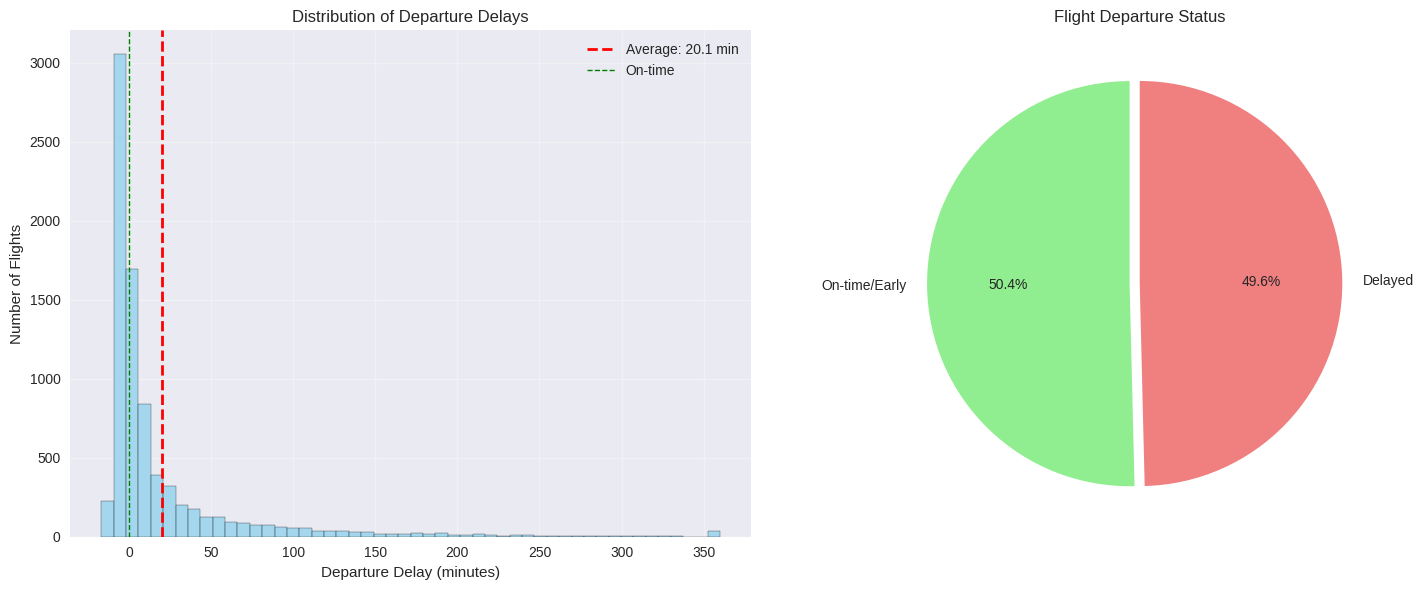

In [48]:
# =============================================
# EDA QUESTION 1: DELAY ANALYSIS
# =============================================

print("=== EDA QUESTION 1: AVERAGE DELAY & % FLIGHTS DELAYED ===")

# Calculate basic delay statistics
average_delay = flight_level_clean['departure_delay_cleaned'].mean()
flights_delayed = (flight_level_clean['departure_delay_cleaned'] > 0).sum()
total_flights = len(flight_level_clean)
percentage_delayed = (flights_delayed / total_flights) * 100

print(f"📊 DELAY STATISTICS:")
print(f"   • Average departure delay: {average_delay:.2f} minutes")
print(f"   • Flights delayed: {flights_delayed:,} out of {total_flights:,}")
print(f"   • Percentage delayed: {percentage_delayed:.2f}%")

# Breakdown of delay severity
delay_categories = {
    'Early/On-time (<0 min)': (flight_level_clean['departure_delay_cleaned'] <= 0).sum(),
    'Minor Delay (1-15 min)': ((flight_level_clean['departure_delay_cleaned'] > 0) &
                              (flight_level_clean['departure_delay_cleaned'] <= 15)).sum(),
    'Moderate Delay (16-60 min)': ((flight_level_clean['departure_delay_cleaned'] > 15) &
                                  (flight_level_clean['departure_delay_cleaned'] <= 60)).sum(),
    'Major Delay (>60 min)': (flight_level_clean['departure_delay_cleaned'] > 60).sum()
}

print(f"\n🚨 DELAY SEVERITY BREAKDOWN:")
for category, count in delay_categories.items():
    percentage = (count / total_flights) * 100
    print(f"   • {category}: {count:,} flights ({percentage:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Delay distribution
axes[0].hist(flight_level_clean['departure_delay_cleaned'], bins=50, alpha=0.7,
             color='skyblue', edgecolor='black')
axes[0].axvline(average_delay, color='red', linestyle='--', linewidth=2,
                label=f'Average: {average_delay:.1f} min')
axes[0].axvline(0, color='green', linestyle='--', linewidth=1, label='On-time')
axes[0].set_xlabel('Departure Delay (minutes)')
axes[0].set_ylabel('Number of Flights')
axes[0].set_title('Distribution of Departure Delays')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Delay status pie chart
delay_status_counts = [total_flights - flights_delayed, flights_delayed]
delay_status_labels = ['On-time/Early', 'Delayed']
colors = ['lightgreen', 'lightcoral']

axes[1].pie(delay_status_counts, labels=delay_status_labels, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0.05, 0))
axes[1].set_title('Flight Departure Status')

plt.tight_layout()
plt.show()

print("\n" + "="*60)

=== EDA QUESTION 1: AVERAGE DELAY & % FLIGHTS DELAYED - UA vs OTHERS ===
📊 DELAY STATISTICS - UA vs OTHERS:
   • UA:
     - Average delay: 22.02 minutes
     - Flights delayed: 2,475 out of 4,502
     - Percentage delayed: 54.98%
   • Other:
     - Average delay: 17.63 minutes
     - Flights delayed: 1,543 out of 3,597
     - Percentage delayed: 42.90%

📈 COMPARISON:
   • UA has 4.39 minutes longer delays than Other airlines
   • UA delay performance: worse than industry average

🚨 DELAY SEVERITY BREAKDOWN - UA vs OTHERS:
   • Early/On-time (<0 min):
     - UA: 2,027 flights (45.0%)
     - Other: 2,054 flights (57.1%)
   • Minor Delay (1-15 min):
     - UA: 1,146 flights (25.5%)
     - Other: 709 flights (19.7%)
   • Moderate Delay (16-60 min):
     - UA: 785 flights (17.4%)
     - Other: 443 flights (12.3%)
   • Major Delay (>60 min):
     - UA: 544 flights (12.1%)
     - Other: 391 flights (10.9%)


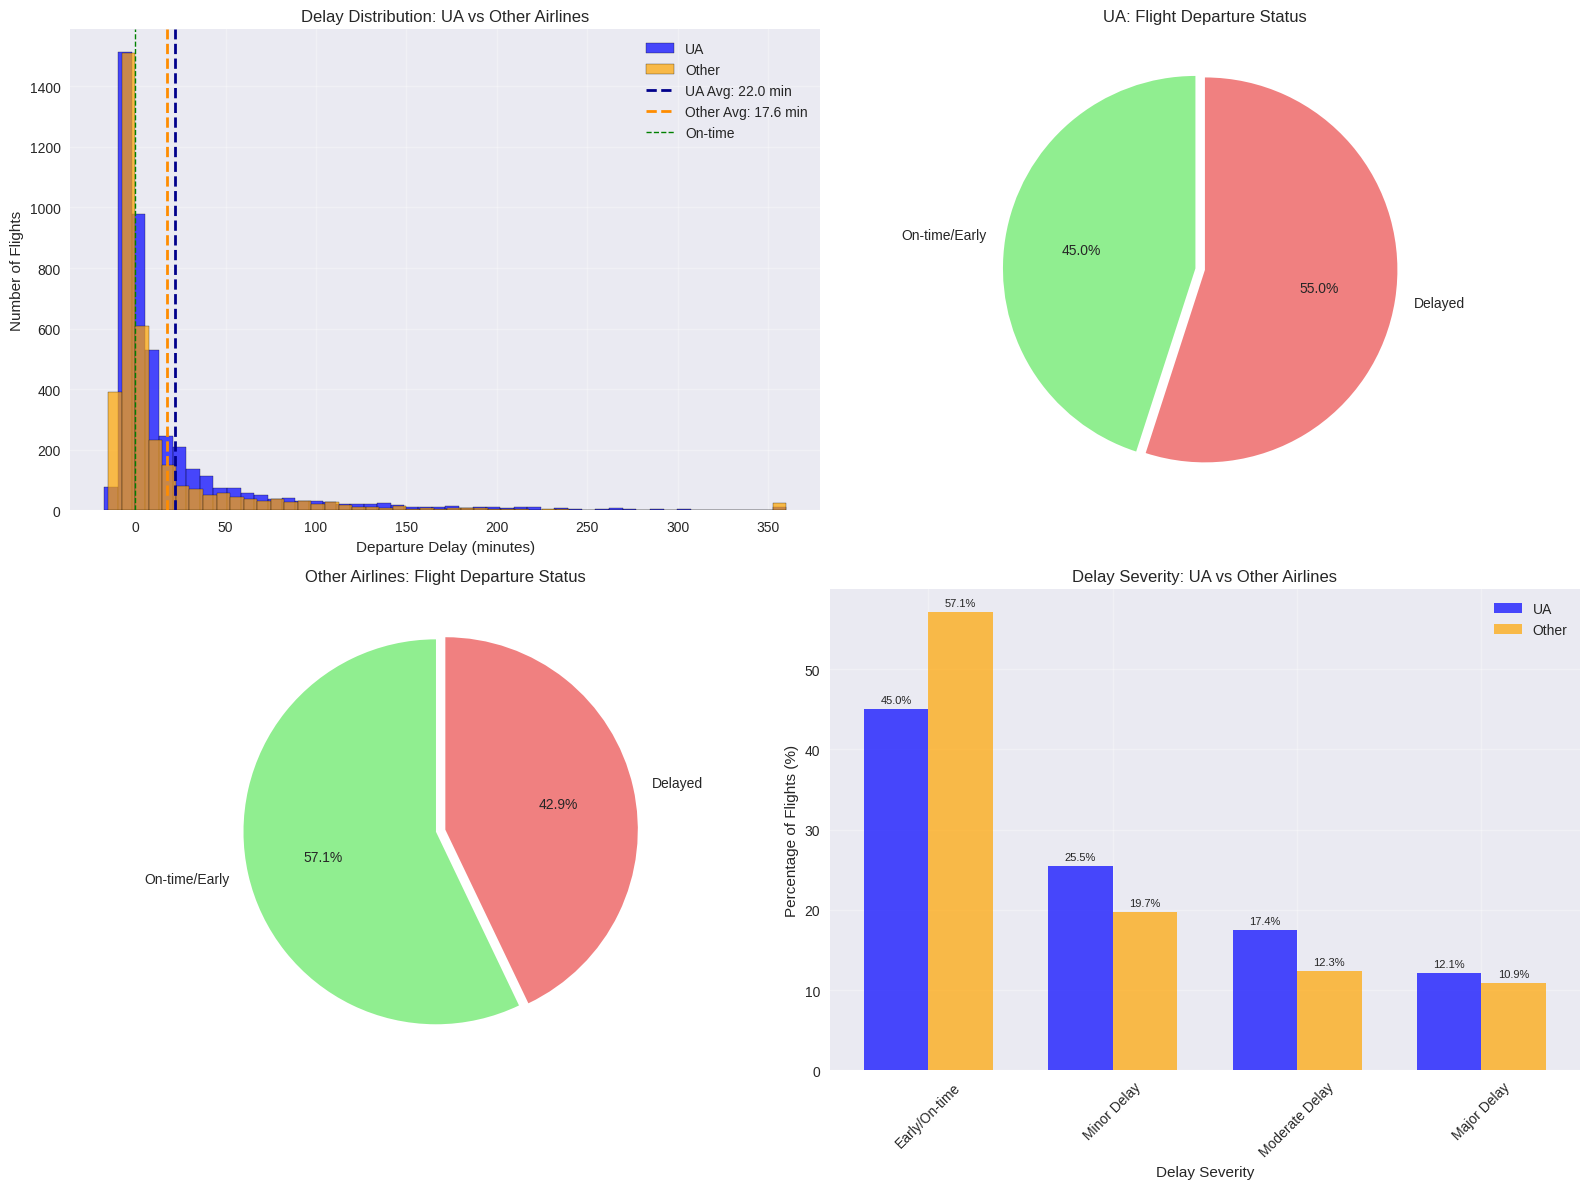

In [84]:
# =============================================
# EDA QUESTION 1: DELAY ANALYSIS - UA vs OTHERS
# =============================================

print("=== EDA QUESTION 1: AVERAGE DELAY & % FLIGHTS DELAYED - UA vs OTHERS ===")

# Add airline group segmentation
flight_level_clean['airline_group'] = flight_level_clean['company_id'].apply(
    lambda x: 'UA' if x == 'UA' else 'Other'
)

# Calculate basic delay statistics by airline group
delay_stats = flight_level_clean.groupby('airline_group').agg({
    'departure_delay_cleaned': ['mean', 'count'],
    'company_id': 'count'
}).round(2)

# Calculate delayed flights by airline group
delayed_flights = flight_level_clean[flight_level_clean['departure_delay_cleaned'] > 0]
delay_counts = delayed_flights.groupby('airline_group').size()
total_counts = flight_level_clean.groupby('airline_group').size()
percentage_delayed = (delay_counts / total_counts * 100).round(2)

print(f"📊 DELAY STATISTICS - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    if airline in delay_stats.index:
        avg_delay = delay_stats.loc[airline, ('departure_delay_cleaned', 'mean')]
        total_flights = delay_stats.loc[airline, ('company_id', 'count')]
        pct_delayed = percentage_delayed.get(airline, 0)
        delayed_count = delay_counts.get(airline, 0)

        print(f"   • {airline}:")
        print(f"     - Average delay: {avg_delay:.2f} minutes")
        print(f"     - Flights delayed: {delayed_count:,} out of {total_flights:,}")
        print(f"     - Percentage delayed: {pct_delayed:.2f}%")

# Overall comparison
ua_avg_delay = delay_stats.loc['UA', ('departure_delay_cleaned', 'mean')]
other_avg_delay = delay_stats.loc['Other', ('departure_delay_cleaned', 'mean')]
delay_difference = ua_avg_delay - other_avg_delay

print(f"\n📈 COMPARISON:")
print(f"   • UA has {delay_difference:.2f} minutes {'longer' if delay_difference > 0 else 'shorter'} delays than Other airlines")
print(f"   • UA delay performance: {'worse' if delay_difference > 0 else 'better'} than industry average")

# Breakdown of delay severity by airline group
delay_severity = {}
for airline in ['UA', 'Other']:
    airline_data = flight_level_clean[flight_level_clean['airline_group'] == airline]

    delay_severity[airline] = {
        'Early/On-time (<0 min)': (airline_data['departure_delay_cleaned'] <= 0).sum(),
        'Minor Delay (1-15 min)': ((airline_data['departure_delay_cleaned'] > 0) &
                                  (airline_data['departure_delay_cleaned'] <= 15)).sum(),
        'Moderate Delay (16-60 min)': ((airline_data['departure_delay_cleaned'] > 15) &
                                      (airline_data['departure_delay_cleaned'] <= 60)).sum(),
        'Major Delay (>60 min)': (airline_data['departure_delay_cleaned'] > 60).sum()
    }

print(f"\n🚨 DELAY SEVERITY BREAKDOWN - UA vs OTHERS:")
for category in ['Early/On-time (<0 min)', 'Minor Delay (1-15 min)', 'Moderate Delay (16-60 min)', 'Major Delay (>60 min)']:
    print(f"   • {category}:")
    for airline in ['UA', 'Other']:
        count = delay_severity[airline][category]
        total = delay_stats.loc[airline, ('company_id', 'count')]
        percentage = (count / total) * 100
        print(f"     - {airline}: {count:,} flights ({percentage:.1f}%)")

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Delay distribution comparison
ua_delays = flight_level_clean[flight_level_clean['airline_group'] == 'UA']['departure_delay_cleaned']
other_delays = flight_level_clean[flight_level_clean['airline_group'] == 'Other']['departure_delay_cleaned']

axes[0,0].hist(ua_delays, bins=50, alpha=0.7, color='blue', edgecolor='black', label='UA')
axes[0,0].hist(other_delays, bins=50, alpha=0.7, color='orange', edgecolor='black', label='Other')
axes[0,0].axvline(ua_avg_delay, color='darkblue', linestyle='--', linewidth=2, label=f'UA Avg: {ua_avg_delay:.1f} min')
axes[0,0].axvline(other_avg_delay, color='darkorange', linestyle='--', linewidth=2, label=f'Other Avg: {other_avg_delay:.1f} min')
axes[0,0].axvline(0, color='green', linestyle='--', linewidth=1, label='On-time')
axes[0,0].set_xlabel('Departure Delay (minutes)')
axes[0,0].set_ylabel('Number of Flights')
axes[0,0].set_title('Delay Distribution: UA vs Other Airlines')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Delay status comparison
ua_delayed = percentage_delayed.get('UA', 0)
ua_ontime = 100 - ua_delayed
other_delayed = percentage_delayed.get('Other', 0)
other_ontime = 100 - other_delayed

axes[0,1].pie([ua_ontime, ua_delayed], labels=['On-time/Early', 'Delayed'], autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral'], startangle=90, explode=(0.05, 0))
axes[0,1].set_title('UA: Flight Departure Status')

axes[1,0].pie([other_ontime, other_delayed], labels=['On-time/Early', 'Delayed'], autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral'], startangle=90, explode=(0.05, 0))
axes[1,0].set_title('Other Airlines: Flight Departure Status')

# Plot 3: Delay severity comparison
severity_categories = list(delay_severity['UA'].keys())
ua_severity_pct = [delay_severity['UA'][cat] / delay_stats.loc['UA', ('company_id', 'count')] * 100 for cat in severity_categories]
other_severity_pct = [delay_severity['Other'][cat] / delay_stats.loc['Other', ('company_id', 'count')] * 100 for cat in severity_categories]

x = np.arange(len(severity_categories))
width = 0.35

bars1 = axes[1,1].bar(x - width/2, ua_severity_pct, width, label='UA', color='blue', alpha=0.7)
bars2 = axes[1,1].bar(x + width/2, other_severity_pct, width, label='Other', color='orange', alpha=0.7)

axes[1,1].set_xlabel('Delay Severity')
axes[1,1].set_ylabel('Percentage of Flights (%)')
axes[1,1].set_title('Delay Severity: UA vs Other Airlines')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels([cat.split('(')[0].strip() for cat in severity_categories], rotation=45)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                      f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "="*60)

=== EDA QUESTION 2: FLIGHTS WITH SCHEDULED GROUND TIME CLOSE TO/BELOW MINIMUM TURN MINS ===
📊 GROUND TIME RISK ANALYSIS:
   • Critical Risk (<0 min buffer): 630 flights (7.8%)
   • High Risk (0-15 min buffer): 1,632 flights (20.2%)
   • Safe Buffer (>15 min): 5,837 flights (72.1%)
   • TOTAL AT RISK (≤15 min buffer): 2,262 flights (27.9%)

🚨 IMPACT ANALYSIS:
   • Average delay for AT-RISK flights: 32.5 minutes
   • Average delay for SAFE flights: 15.3 minutes
   • Delay difference: 17.3 minutes


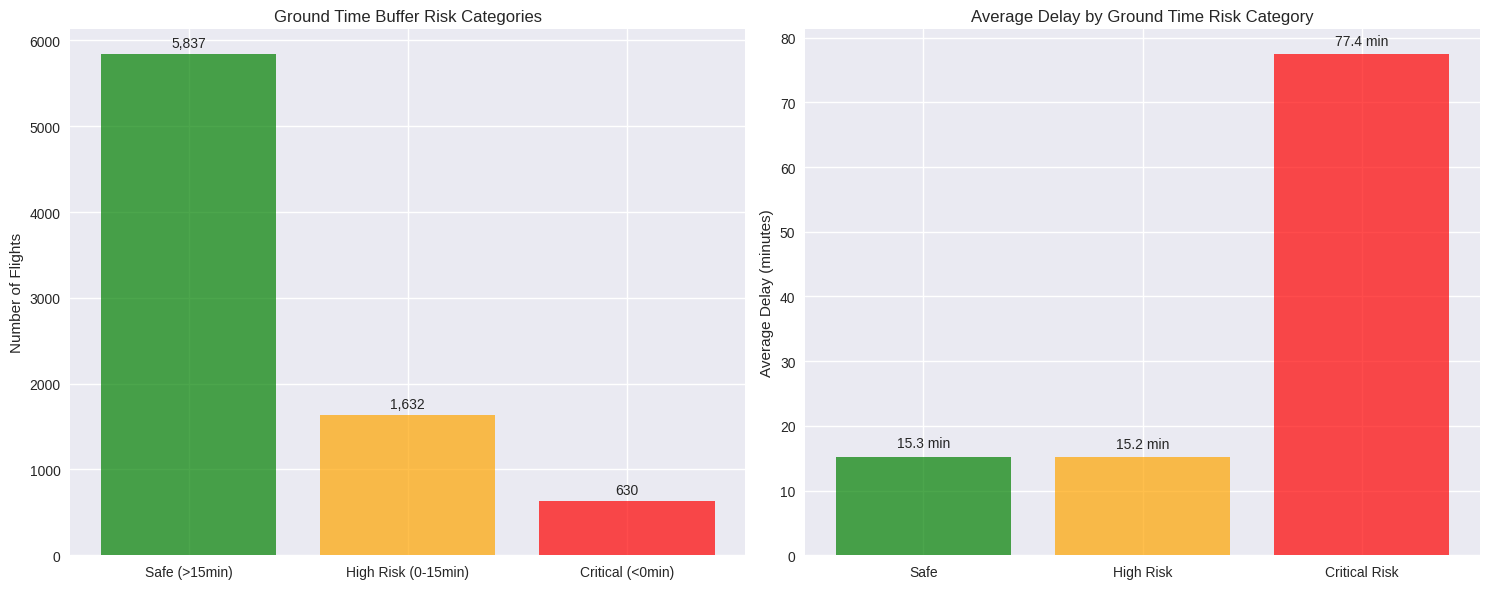

In [50]:
# =============================================
# EDA QUESTION 2: GROUND TIME ANALYSIS
# =============================================

print("=== EDA QUESTION 2: FLIGHTS WITH SCHEDULED GROUND TIME CLOSE TO/BELOW MINIMUM TURN MINS ===")

# Define risk thresholds
threshold_close = 15  # minutes
threshold_below = 0   # minutes

# Calculate risk categories
flights_below_minimum = (flight_level_clean['ground_time_buffer'] < threshold_below).sum()
flights_close_to_minimum = ((flight_level_clean['ground_time_buffer'] >= threshold_below) &
                           (flight_level_clean['ground_time_buffer'] <= threshold_close)).sum()
flights_safe_buffer = (flight_level_clean['ground_time_buffer'] > threshold_close).sum()

total_analyzed = len(flight_level_clean)

print(f"📊 GROUND TIME RISK ANALYSIS:")
print(f"   • Critical Risk (<0 min buffer): {flights_below_minimum:,} flights ({(flights_below_minimum/total_analyzed)*100:.1f}%)")
print(f"   • High Risk (0-15 min buffer): {flights_close_to_minimum:,} flights ({(flights_close_to_minimum/total_analyzed)*100:.1f}%)")
print(f"   • Safe Buffer (>15 min): {flights_safe_buffer:,} flights ({(flights_safe_buffer/total_analyzed)*100:.1f}%)")

# How many are "close to or below" minimum (combining critical + high risk)
flights_at_risk = flights_below_minimum + flights_close_to_minimum
print(f"   • TOTAL AT RISK (≤15 min buffer): {flights_at_risk:,} flights ({(flights_at_risk/total_analyzed)*100:.1f}%)")

# Analysis: Do these risky flights actually get delayed more?
risky_flights = flight_level_clean[flight_level_clean['ground_time_buffer'] <= threshold_close]
safe_flights = flight_level_clean[flight_level_clean['ground_time_buffer'] > threshold_close]

print(f"\n🚨 IMPACT ANALYSIS:")
print(f"   • Average delay for AT-RISK flights: {risky_flights['departure_delay_cleaned'].mean():.1f} minutes")
print(f"   • Average delay for SAFE flights: {safe_flights['departure_delay_cleaned'].mean():.1f} minutes")
print(f"   • Delay difference: {risky_flights['departure_delay_cleaned'].mean() - safe_flights['departure_delay_cleaned'].mean():.1f} minutes")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Ground time risk categories
risk_labels = ['Safe (>15min)', 'High Risk (0-15min)', 'Critical (<0min)']
risk_counts = [flights_safe_buffer, flights_close_to_minimum, flights_below_minimum]
risk_colors = ['green', 'orange', 'red']

axes[0].bar(risk_labels, risk_counts, color=risk_colors, alpha=0.7)
axes[0].set_ylabel('Number of Flights')
axes[0].set_title('Ground Time Buffer Risk Categories')
for i, v in enumerate(risk_counts):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', va='bottom')

# Plot 2: Delay comparison by risk category
delay_by_risk = [
    safe_flights['departure_delay_cleaned'].mean(),
    risky_flights[risky_flights['ground_time_buffer'] >= 0]['departure_delay_cleaned'].mean(),
    risky_flights[risky_flights['ground_time_buffer'] < 0]['departure_delay_cleaned'].mean()
]
risk_delay_labels = ['Safe', 'High Risk', 'Critical Risk']

axes[1].bar(risk_delay_labels, delay_by_risk, color=risk_colors, alpha=0.7)
axes[1].set_ylabel('Average Delay (minutes)')
axes[1].set_title('Average Delay by Ground Time Risk Category')
for i, v in enumerate(delay_by_risk):
    axes[1].text(i, v + 1, f'{v:.1f} min', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n" + "="*60)

=== EDA QUESTION 2: GROUND TIME ANALYSIS - UA vs OTHERS ===
📊 OVERALL GROUND TIME RISK ANALYSIS:
   • Critical Risk (<0 min buffer): 630 flights (7.8%)
   • High Risk (0-15 min buffer): 1,632 flights (20.2%)
   • Safe Buffer (>15 min): 5,837 flights (72.1%)
   • TOTAL AT RISK (≤15 min buffer): 2,262 flights (27.9%)

📊 GROUND TIME RISK ANALYSIS - UA vs OTHERS:
   • UA:
     - Critical Risk (<0 min): 420 flights (9.3%)
     - High Risk (0-15 min): 1,032 flights (22.9%)
     - Safe Buffer (>15 min): 3,050 flights (67.7%)
     - TOTAL AT RISK: 1,452 flights (32.3%)
   • Other:
     - Critical Risk (<0 min): 210 flights (5.8%)
     - High Risk (0-15 min): 600 flights (16.7%)
     - Safe Buffer (>15 min): 2,787 flights (77.5%)
     - TOTAL AT RISK: 810 flights (22.5%)

📈 COMPARISON SUMMARY:
   • UA has 9.7 percentage points more at-risk flights than Other airlines
   • UA ground time scheduling: more aggressive than industry average

🚨 IMPACT ANALYSIS - OVERALL:
   • Average delay for AT-RIS

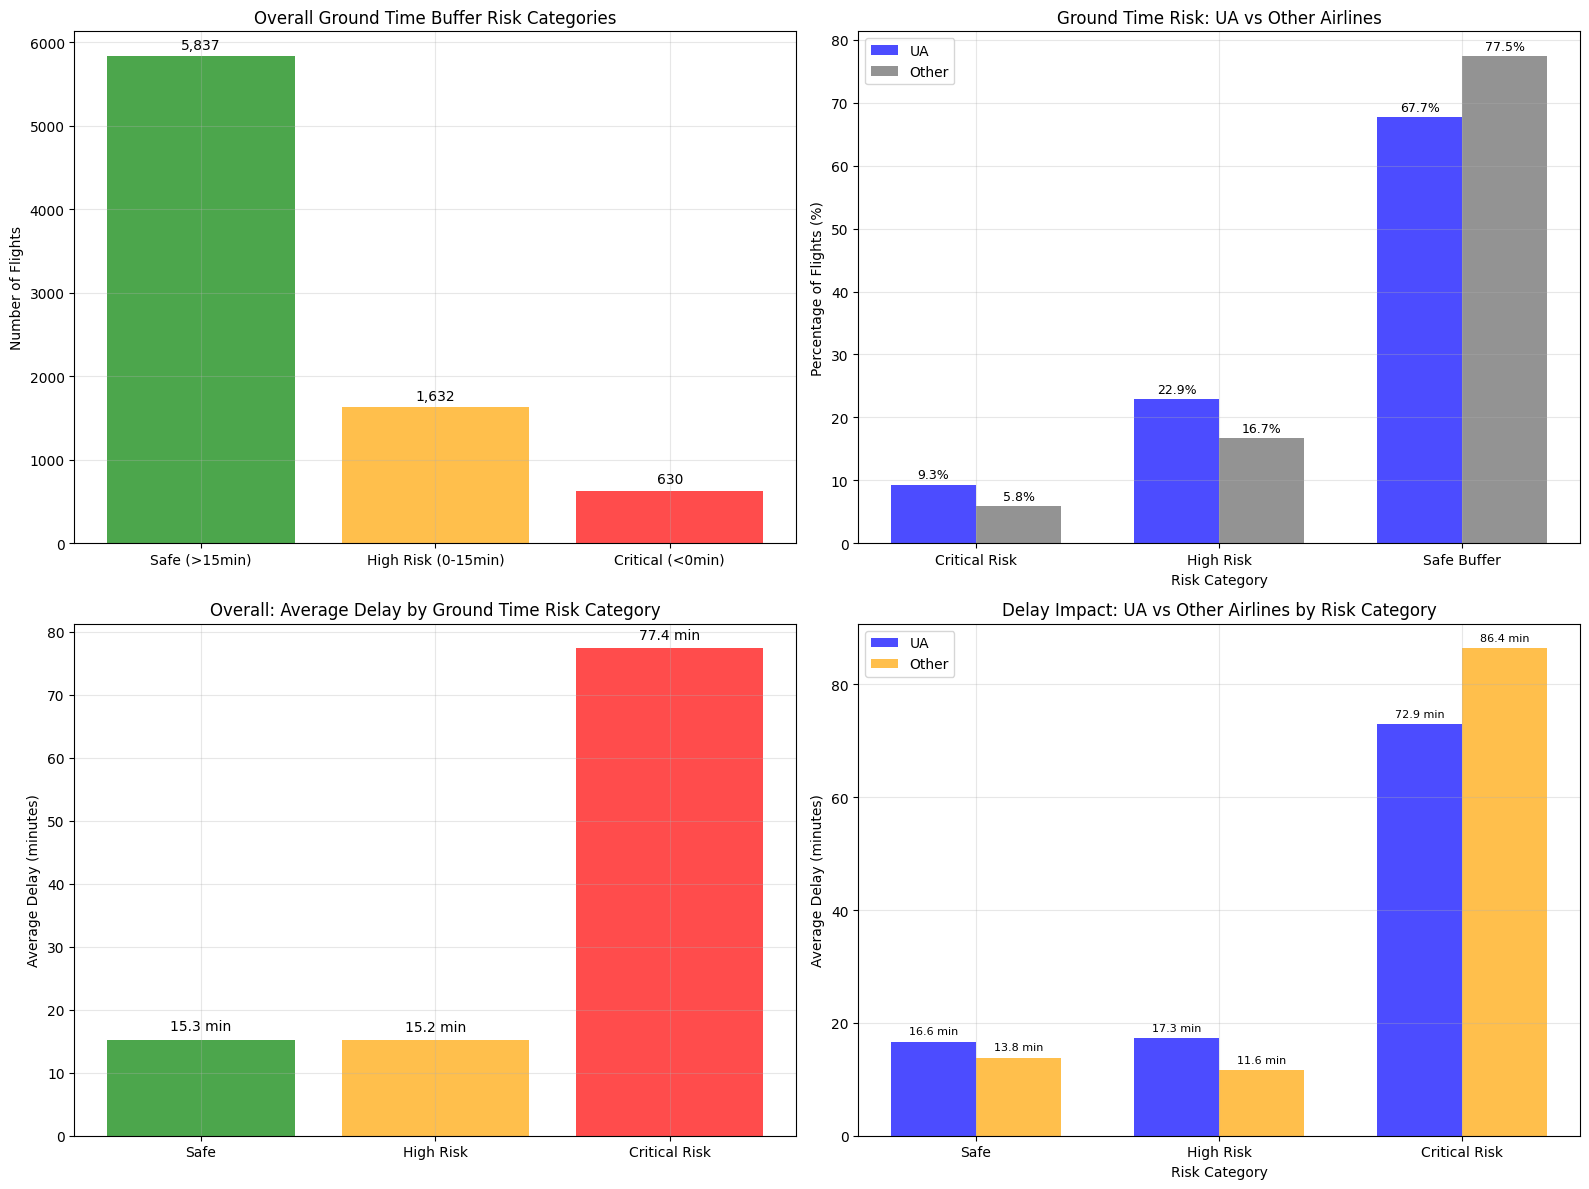

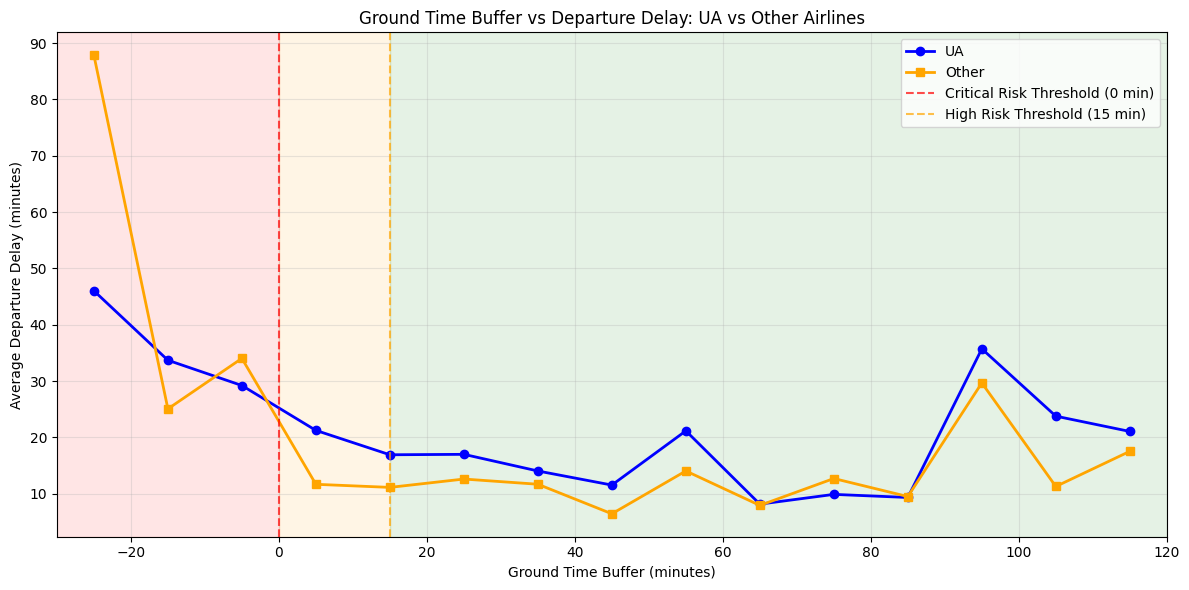

In [129]:
# =============================================
# EDA QUESTION 2: GROUND TIME ANALYSIS - UA vs OTHERS
# =============================================

print("=== EDA QUESTION 2: GROUND TIME ANALYSIS - UA vs OTHERS ===")

# Define risk thresholds
threshold_close = 15  # minutes
threshold_below = 0   # minutes

# Calculate risk categories for overall
flights_below_minimum = (flight_level_clean['ground_time_buffer'] < threshold_below).sum()
flights_close_to_minimum = ((flight_level_clean['ground_time_buffer'] >= threshold_below) &
                           (flight_level_clean['ground_time_buffer'] <= threshold_close)).sum()
flights_safe_buffer = (flight_level_clean['ground_time_buffer'] > threshold_close).sum()

total_analyzed = len(flight_level_clean)

print(f"📊 OVERALL GROUND TIME RISK ANALYSIS:")
print(f"   • Critical Risk (<0 min buffer): {flights_below_minimum:,} flights ({(flights_below_minimum/total_analyzed)*100:.1f}%)")
print(f"   • High Risk (0-15 min buffer): {flights_close_to_minimum:,} flights ({(flights_close_to_minimum/total_analyzed)*100:.1f}%)")
print(f"   • Safe Buffer (>15 min): {flights_safe_buffer:,} flights ({(flights_safe_buffer/total_analyzed)*100:.1f}%)")

# How many are "close to or below" minimum (combining critical + high risk)
flights_at_risk = flights_below_minimum + flights_close_to_minimum
print(f"   • TOTAL AT RISK (≤15 min buffer): {flights_at_risk:,} flights ({(flights_at_risk/total_analyzed)*100:.1f}%)")

# UA vs Others comparison for ground time risk
print(f"\n📊 GROUND TIME RISK ANALYSIS - UA vs OTHERS:")

# Calculate risk categories by airline group
risk_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = flight_level_clean[flight_level_clean['airline_group'] == airline]

    below_min = (airline_data['ground_time_buffer'] < threshold_below).sum()
    close_min = ((airline_data['ground_time_buffer'] >= threshold_below) &
                (airline_data['ground_time_buffer'] <= threshold_close)).sum()
    safe_buf = (airline_data['ground_time_buffer'] > threshold_close).sum()
    total_airline = len(airline_data)

    risk_by_airline[airline] = {
        'critical': below_min,
        'high_risk': close_min,
        'safe': safe_buf,
        'total': total_airline,
        'critical_pct': (below_min / total_airline) * 100,
        'high_risk_pct': (close_min / total_airline) * 100,
        'safe_pct': (safe_buf / total_airline) * 100,
        'at_risk_pct': ((below_min + close_min) / total_airline) * 100
    }

    print(f"   • {airline}:")
    print(f"     - Critical Risk (<0 min): {below_min:,} flights ({risk_by_airline[airline]['critical_pct']:.1f}%)")
    print(f"     - High Risk (0-15 min): {close_min:,} flights ({risk_by_airline[airline]['high_risk_pct']:.1f}%)")
    print(f"     - Safe Buffer (>15 min): {safe_buf:,} flights ({risk_by_airline[airline]['safe_pct']:.1f}%)")
    print(f"     - TOTAL AT RISK: {below_min + close_min:,} flights ({risk_by_airline[airline]['at_risk_pct']:.1f}%)")

# Comparison summary
ua_at_risk_pct = risk_by_airline['UA']['at_risk_pct']
other_at_risk_pct = risk_by_airline['Other']['at_risk_pct']
risk_difference = ua_at_risk_pct - other_at_risk_pct

print(f"\n📈 COMPARISON SUMMARY:")
print(f"   • UA has {risk_difference:.1f} percentage points {'more' if risk_difference > 0 else 'fewer'} at-risk flights than Other airlines")
print(f"   • UA ground time scheduling: {'more aggressive' if risk_difference > 0 else 'more conservative'} than industry average")

# Analysis: Do these risky flights actually get delayed more?
print(f"\n🚨 IMPACT ANALYSIS - OVERALL:")
risky_flights = flight_level_clean[flight_level_clean['ground_time_buffer'] <= threshold_close]
safe_flights = flight_level_clean[flight_level_clean['ground_time_buffer'] > threshold_close]

print(f"   • Average delay for AT-RISK flights: {risky_flights['departure_delay_cleaned'].mean():.1f} minutes")
print(f"   • Average delay for SAFE flights: {safe_flights['departure_delay_cleaned'].mean():.1f} minutes")
print(f"   • Delay difference: {risky_flights['departure_delay_cleaned'].mean() - safe_flights['departure_delay_cleaned'].mean():.1f} minutes")

# Impact analysis by airline group
print(f"\n🚨 IMPACT ANALYSIS - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    airline_data = flight_level_clean[flight_level_clean['airline_group'] == airline]

    risky_airline = airline_data[airline_data['ground_time_buffer'] <= threshold_close]
    safe_airline = airline_data[airline_data['ground_time_buffer'] > threshold_close]

    risky_delay = risky_airline['departure_delay_cleaned'].mean()
    safe_delay = safe_airline['departure_delay_cleaned'].mean()
    delay_diff = risky_delay - safe_delay

    print(f"   • {airline}:")
    print(f"     - At-risk flights delay: {risky_delay:.1f} min")
    print(f"     - Safe flights delay: {safe_delay:.1f} min")
    print(f"     - Delay penalty for tight scheduling: {delay_diff:.1f} min")

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Ground time risk categories - Overall
risk_labels = ['Safe (>15min)', 'High Risk (0-15min)', 'Critical (<0min)']
risk_counts = [flights_safe_buffer, flights_close_to_minimum, flights_below_minimum]
risk_colors = ['green', 'orange', 'red']

axes[0,0].bar(risk_labels, risk_counts, color=risk_colors, alpha=0.7)
axes[0,0].set_ylabel('Number of Flights')
axes[0,0].set_title('Overall Ground Time Buffer Risk Categories')
for i, v in enumerate(risk_counts):
    axes[0,0].text(i, v + 50, f'{v:,}', ha='center', va='bottom')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Ground time risk comparison - UA vs Others
risk_categories = ['Critical Risk', 'High Risk', 'Safe Buffer']
ua_risk_pct = [
    risk_by_airline['UA']['critical_pct'],
    risk_by_airline['UA']['high_risk_pct'],
    risk_by_airline['UA']['safe_pct']
]
other_risk_pct = [
    risk_by_airline['Other']['critical_pct'],
    risk_by_airline['Other']['high_risk_pct'],
    risk_by_airline['Other']['safe_pct']
]

x = np.arange(len(risk_categories))
width = 0.35

bars1 = axes[0,1].bar(x - width/2, ua_risk_pct, width, label='UA', color='blue', alpha=0.7)
bars2 = axes[0,1].bar(x + width/2, other_risk_pct, width, label='Other', color='#666666', alpha=0.7)

axes[0,1].set_xlabel('Risk Category')
axes[0,1].set_ylabel('Percentage of Flights (%)')
axes[0,1].set_title('Ground Time Risk: UA vs Other Airlines')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(risk_categories)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                      f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Plot 3: Delay comparison by risk category - Overall
delay_by_risk = [
    safe_flights['departure_delay_cleaned'].mean(),
    risky_flights[risky_flights['ground_time_buffer'] >= 0]['departure_delay_cleaned'].mean(),
    risky_flights[risky_flights['ground_time_buffer'] < 0]['departure_delay_cleaned'].mean()
]
risk_delay_labels = ['Safe', 'High Risk', 'Critical Risk']

axes[1,0].bar(risk_delay_labels, delay_by_risk, color=risk_colors, alpha=0.7)
axes[1,0].set_ylabel('Average Delay (minutes)')
axes[1,0].set_title('Overall: Average Delay by Ground Time Risk Category')
axes[1,0].grid(True, alpha=0.3)
for i, v in enumerate(delay_by_risk):
    axes[1,0].text(i, v + 1, f'{v:.1f} min', ha='center', va='bottom')

# Plot 4: Delay impact comparison - UA vs Others
delay_impact_data = {}
for airline in ['UA', 'Other']:
    airline_data = flight_level_clean[flight_level_clean['airline_group'] == airline]

    safe = airline_data[airline_data['ground_time_buffer'] > threshold_close]['departure_delay_cleaned'].mean()
    high_risk = airline_data[(airline_data['ground_time_buffer'] >= 0) &
                           (airline_data['ground_time_buffer'] <= threshold_close)]['departure_delay_cleaned'].mean()
    critical = airline_data[airline_data['ground_time_buffer'] < 0]['departure_delay_cleaned'].mean()

    delay_impact_data[airline] = [safe, high_risk, critical]

x = np.arange(len(risk_delay_labels))
width = 0.35

bars1 = axes[1,1].bar(x - width/2, delay_impact_data['UA'], width, label='UA', color='blue', alpha=0.7)
bars2 = axes[1,1].bar(x + width/2, delay_impact_data['Other'], width, label='Other', color='orange', alpha=0.7)

axes[1,1].set_xlabel('Risk Category')
axes[1,1].set_ylabel('Average Delay (minutes)')
axes[1,1].set_title('Delay Impact: UA vs Other Airlines by Risk Category')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(risk_delay_labels)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 1,
                      f'{height:.1f} min', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
# Additional Line Chart: Ground Time Buffer vs Departure Delay
plt.figure(figsize=(12, 6))

# Create bins for ground time buffer and calculate average delay for each bin
buffer_bins = np.arange(-30, 121, 10)  # From -30 to 120 minutes in 10-min increments
bin_centers = (buffer_bins[:-1] + buffer_bins[1:]) / 2

# Calculate average delay by buffer bin for UA and Other airlines
ua_delays = []
other_delays = []

for i in range(len(buffer_bins)-1):
    bin_mask = (flight_level_clean['ground_time_buffer'] >= buffer_bins[i]) & (flight_level_clean['ground_time_buffer'] < buffer_bins[i+1])

    ua_bin_data = flight_level_clean[bin_mask & (flight_level_clean['airline_group'] == 'UA')]
    other_bin_data = flight_level_clean[bin_mask & (flight_level_clean['airline_group'] == 'Other')]

    ua_delays.append(ua_bin_data['departure_delay_cleaned'].mean() if len(ua_bin_data) > 0 else np.nan)
    other_delays.append(other_bin_data['departure_delay_cleaned'].mean() if len(other_bin_data) > 0 else np.nan)

# Plot the line chart
plt.plot(bin_centers, ua_delays, marker='o', linewidth=2, label='UA', color='blue')
plt.plot(bin_centers, other_delays, marker='s', linewidth=2, label='Other', color='orange')

# Add risk threshold lines
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Critical Risk Threshold (0 min)')
plt.axvline(x=15, color='orange', linestyle='--', alpha=0.7, label='High Risk Threshold (15 min)')

plt.xlabel('Ground Time Buffer (minutes)')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Ground Time Buffer vs Departure Delay: UA vs Other Airlines')
plt.legend()
plt.grid(True, alpha=0.3)

# Add shaded risk regions
plt.axvspan(-30, 0, alpha=0.1, color='red', label='Critical Risk Zone')
plt.axvspan(0, 15, alpha=0.1, color='orange', label='High Risk Zone')
plt.axvspan(15, 120, alpha=0.1, color='green', label='Safe Zone')

plt.xlim(-30, 120)
plt.tight_layout()
plt.show()

=== EDA QUESTION 3: AVERAGE RATIO OF TRANSFER BAGS VS. CHECKED BAGS ===
📊 TRANSFER BAGS VS CHECKED BAGS RATIO:
   • Transfer bags: 397,124
   • Total checked bags: 687,245 (Transfer + Origin)
   • Transfer/Checked Ratio: 0.5778 (57.8%)

📦 BAG COMPOSITION BREAKDOWN:
   • Transfer bags (Regular + Hot): 397,124 (57.8%)
   • Origin bags: 290,121 (42.2%)
   • Regular Transfer: 347,546 (50.6%)
   • Hot Transfer: 49,578 (7.2%)

✈️  PER-FLIGHT ANALYSIS:
   • Average transfer/checked ratio per flight: 0.6815 (68.1%)
   • Median transfer/checked ratio per flight: 0.7059 (70.6%)
   • Transfer-heavy flights (>50% transfer): 7,936 of 10,863 (73.1%)


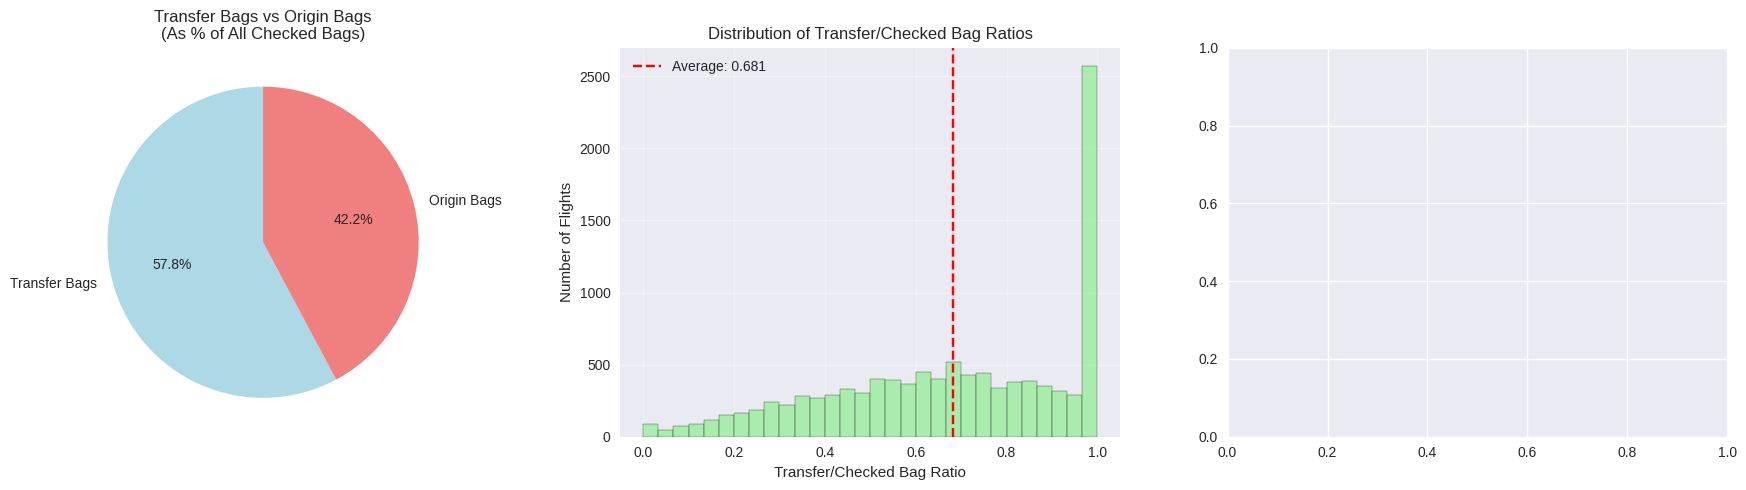

In [65]:
# =============================================
# EDA QUESTION 3: BAGGAGE RATIO ANALYSIS
# =============================================

print("=== EDA QUESTION 3: AVERAGE RATIO OF TRANSFER BAGS VS. CHECKED BAGS ===")

# Calculate TRANSFER vs CHECKED ratio (not Transfer vs Origin)
total_transfer_bags = bags_per_flight['total_transfer_bags'].sum()
total_checked_bags = bags_per_flight['total_bags'].sum()  # This is Transfer + Origin
total_origin_bags = bags_per_flight['origin_bags'].sum()

# THE KEY METRIC: Transfer vs Checked ratio
transfer_vs_checked_ratio = total_transfer_bags / total_checked_bags if total_checked_bags > 0 else 0

print(f"📊 TRANSFER BAGS VS CHECKED BAGS RATIO:")  # UPDATED TITLE
print(f"   • Transfer bags: {total_transfer_bags:,}")
print(f"   • Total checked bags: {total_checked_bags:,} (Transfer + Origin)")
print(f"   • Transfer/Checked Ratio: {transfer_vs_checked_ratio:.4f} ({transfer_vs_checked_ratio*100:.1f}%)")

# Show breakdown for context
print(f"\n📦 BAG COMPOSITION BREAKDOWN:")
print(f"   • Transfer bags (Regular + Hot): {total_transfer_bags:,} ({transfer_vs_checked_ratio*100:.1f}%)")
print(f"   • Origin bags: {total_origin_bags:,} ({(total_origin_bags/total_checked_bags)*100:.1f}%)")
print(f"   • Regular Transfer: {bags_per_flight['transfer_bags'].sum():,} ({(bags_per_flight['transfer_bags'].sum()/total_checked_bags)*100:.1f}%)")
print(f"   • Hot Transfer: {bags_per_flight['hot_transfer_bags'].sum():,} ({(bags_per_flight['hot_transfer_bags'].sum()/total_checked_bags)*100:.1f}%)")

# Flight-level analysis - THIS IS CORRECT (transfer_bag_ratio = transfer/total)
average_flight_transfer_ratio = bags_per_flight['transfer_bag_ratio'].mean()
median_flight_transfer_ratio = bags_per_flight['transfer_bag_ratio'].median()

print(f"\n✈️  PER-FLIGHT ANALYSIS:")
print(f"   • Average transfer/checked ratio per flight: {average_flight_transfer_ratio:.4f} ({average_flight_transfer_ratio*100:.1f}%)")
print(f"   • Median transfer/checked ratio per flight: {median_flight_transfer_ratio:.4f} ({median_flight_transfer_ratio*100:.1f}%)")

# Rest of your code remains the same...
transfer_heavy_threshold = 0.5  # >50% transfer bags
transfer_heavy_flights = (bags_per_flight['transfer_bag_ratio'] > transfer_heavy_threshold).sum()
total_flights_with_bags = len(bags_per_flight)

print(f"   • Transfer-heavy flights (>50% transfer): {transfer_heavy_flights:,} of {total_flights_with_bags:,} ({(transfer_heavy_flights/total_flights_with_bags)*100:.1f}%)")

# Update visualization labels to reflect correct terminology
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Transfer vs Checked distribution
bag_types = ['Transfer Bags', 'Origin Bags']  # UPDATED: More accurate
bag_counts = [total_transfer_bags, total_origin_bags]
colors = ['lightblue', 'lightcoral']

axes[0].pie(bag_counts, labels=bag_types, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Transfer Bags vs Origin Bags\n(As % of All Checked Bags)')  # UPDATED TITLE

# Plot 2: Transfer ratio distribution - UPDATE LABELS
axes[1].hist(bags_per_flight['transfer_bag_ratio'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].axvline(average_flight_transfer_ratio, color='red', linestyle='--',
                label=f'Average: {average_flight_transfer_ratio:.3f}')
axes[1].set_xlabel('Transfer/Checked Bag Ratio')  # UPDATED LABEL
axes[1].set_ylabel('Number of Flights')
axes[1].set_title('Distribution of Transfer/Checked Bag Ratios')  # UPDATED TITLE
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)

=== EDA QUESTION 3: BAGGAGE RATIO ANALYSIS - UA vs OTHERS ===
📊 OVERALL TRANSFER BAGS VS CHECKED BAGS RATIO:
   • Transfer bags: 397,124
   • Total checked bags: 687,245 (Transfer + Origin)
   • Transfer/Checked Ratio: 0.5778 (57.8%)

📦 OVERALL BAG COMPOSITION BREAKDOWN:
   • Transfer bags (Regular + Hot): 397,124 (57.8%)
   • Origin bags: 290,121 (42.2%)
   • Regular Transfer: 347,546 (50.6%)
   • Hot Transfer: 49,578 (7.2%)

📊 BAGGAGE RATIO ANALYSIS - UA vs OTHERS:
   • UA:
     - Transfer bags: 257,096
     - Total checked bags: 499,299
     - Transfer/Checked Ratio: 0.5149 (51.5%)
     - Average per-flight ratio: 0.5194
   • Other:
     - Transfer bags: 140,028
     - Total checked bags: 187,946
     - Transfer/Checked Ratio: 0.7450 (74.5%)
     - Average per-flight ratio: 0.8056

📈 COMPARISON SUMMARY:
   • UA has -0.2301 (-23.0 percentage points) lower transfer ratio than Other airlines
   • UA baggage composition: more origin-heavy than industry average

✈️  PER-FLIGHT ANALYSIS -

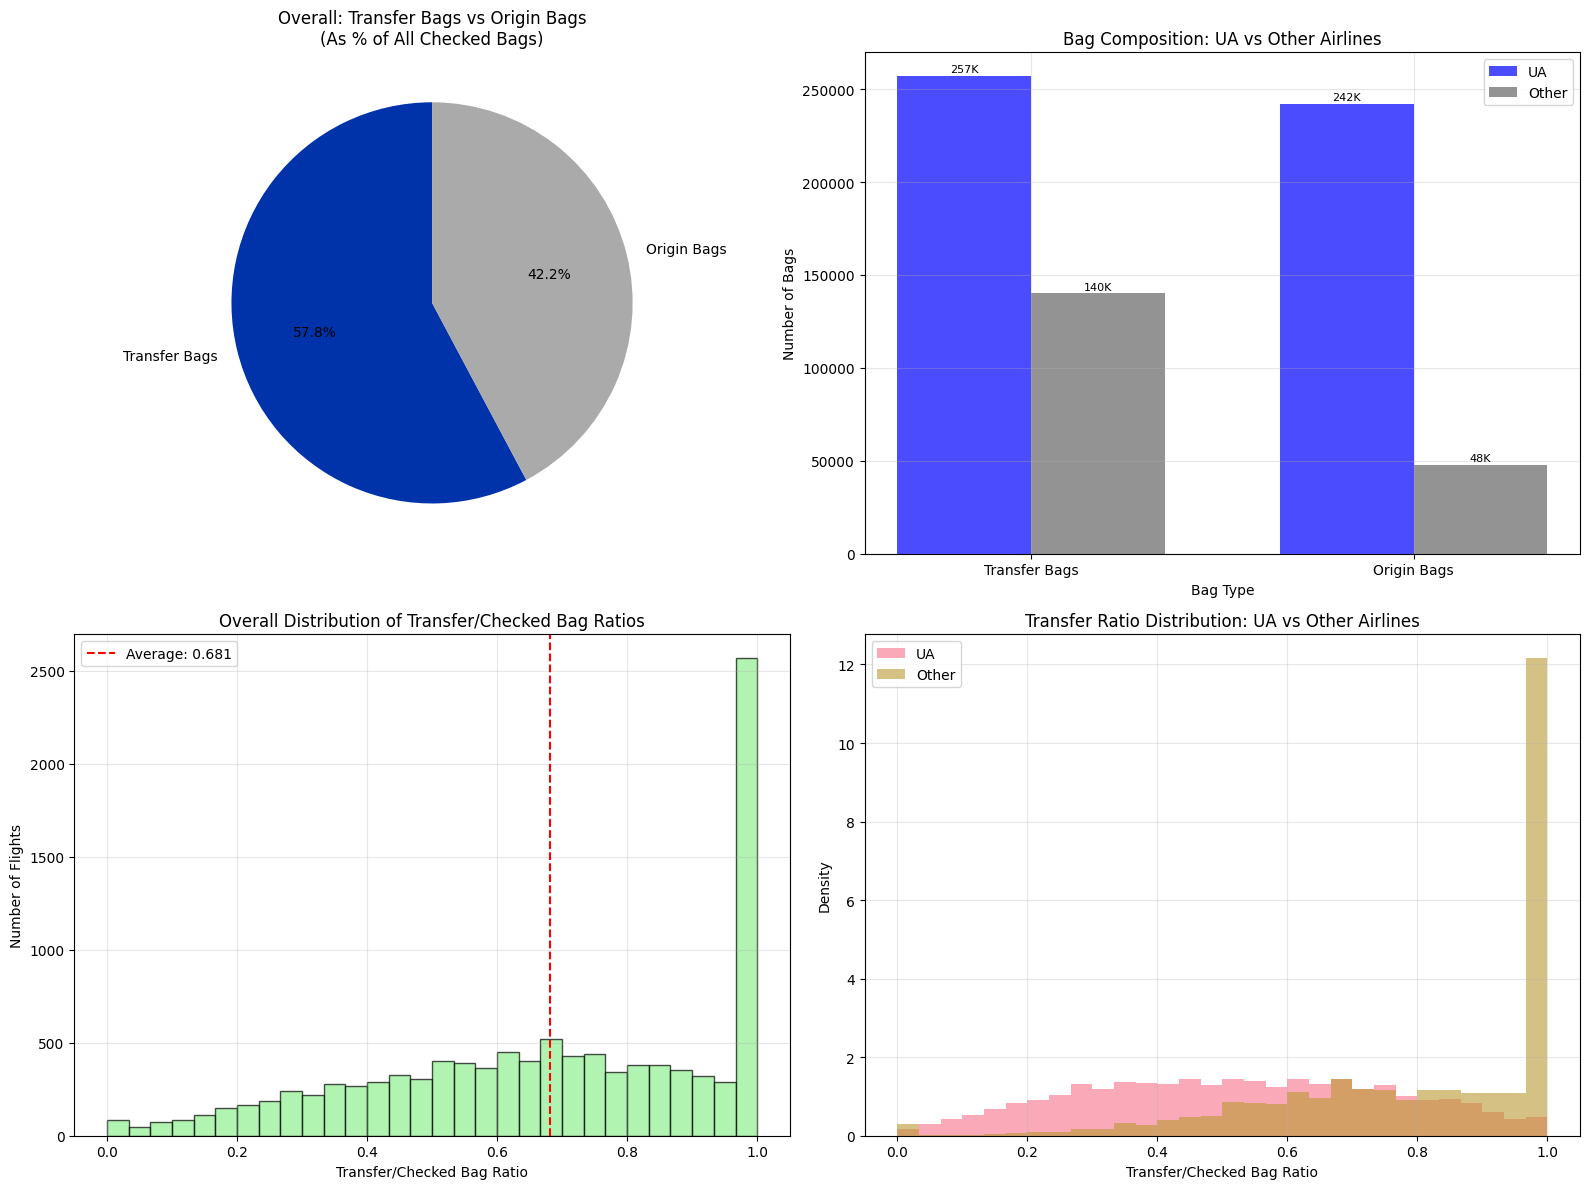

In [141]:
# =============================================
# EDA QUESTION 3: BAGGAGE RATIO ANALYSIS - UA vs OTHERS
# =============================================

print("=== EDA QUESTION 3: BAGGAGE RATIO ANALYSIS - UA vs OTHERS ===")

# Calculate TRANSFER vs CHECKED ratio (not Transfer vs Origin)
total_transfer_bags = bags_per_flight['total_transfer_bags'].sum()
total_checked_bags = bags_per_flight['total_bags'].sum()  # This is Transfer + Origin
total_origin_bags = bags_per_flight['origin_bags'].sum()

# THE KEY METRIC: Transfer vs Checked ratio
transfer_vs_checked_ratio = total_transfer_bags / total_checked_bags if total_checked_bags > 0 else 0

print(f"📊 OVERALL TRANSFER BAGS VS CHECKED BAGS RATIO:")
print(f"   • Transfer bags: {total_transfer_bags:,}")
print(f"   • Total checked bags: {total_checked_bags:,} (Transfer + Origin)")
print(f"   • Transfer/Checked Ratio: {transfer_vs_checked_ratio:.4f} ({transfer_vs_checked_ratio*100:.1f}%)")

# Show breakdown for context
print(f"\n📦 OVERALL BAG COMPOSITION BREAKDOWN:")
print(f"   • Transfer bags (Regular + Hot): {total_transfer_bags:,} ({transfer_vs_checked_ratio*100:.1f}%)")
print(f"   • Origin bags: {total_origin_bags:,} ({(total_origin_bags/total_checked_bags)*100:.1f}%)")
print(f"   • Regular Transfer: {bags_per_flight['transfer_bags'].sum():,} ({(bags_per_flight['transfer_bags'].sum()/total_checked_bags)*100:.1f}%)")
print(f"   • Hot Transfer: {bags_per_flight['hot_transfer_bags'].sum():,} ({(bags_per_flight['hot_transfer_bags'].sum()/total_checked_bags)*100:.1f}%)")

# UA vs Others comparison
print(f"\n📊 BAGGAGE RATIO ANALYSIS - UA vs OTHERS:")

# Merge airline group information with bags data
if 'company_id' not in bags_per_flight.columns and 'company_id' in flight_level_clean.columns:
    # Assuming bags_per_flight has flight_id to merge with flight_level_clean
    bags_with_airline = bags_per_flight.merge(
        flight_level_clean[['flight_id', 'airline_group']],
        on='flight_id',
        how='left'
    )
else:
    bags_with_airline = bags_per_flight.copy()
    bags_with_airline['airline_group'] = bags_with_airline['company_id'].apply(
        lambda x: 'UA' if x == 'UA' else 'Other'
    )

# Calculate baggage statistics by airline group
bag_stats_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = bags_with_airline[bags_with_airline['airline_group'] == airline]

    total_transfer = airline_data['total_transfer_bags'].sum()
    total_checked = airline_data['total_bags'].sum()
    total_origin = airline_data['origin_bags'].sum()

    transfer_ratio = total_transfer / total_checked if total_checked > 0 else 0

    bag_stats_by_airline[airline] = {
        'total_transfer': total_transfer,
        'total_checked': total_checked,
        'total_origin': total_origin,
        'transfer_ratio': transfer_ratio,
        'avg_flight_ratio': airline_data['transfer_bag_ratio'].mean(),
        'median_flight_ratio': airline_data['transfer_bag_ratio'].median(),
        'flight_count': len(airline_data)
    }

    print(f"   • {airline}:")
    print(f"     - Transfer bags: {total_transfer:,}")
    print(f"     - Total checked bags: {total_checked:,}")
    print(f"     - Transfer/Checked Ratio: {transfer_ratio:.4f} ({transfer_ratio*100:.1f}%)")
    print(f"     - Average per-flight ratio: {bag_stats_by_airline[airline]['avg_flight_ratio']:.4f}")

# Comparison summary
ua_ratio = bag_stats_by_airline['UA']['transfer_ratio']
other_ratio = bag_stats_by_airline['Other']['transfer_ratio']
ratio_difference = ua_ratio - other_ratio

print(f"\n📈 COMPARISON SUMMARY:")
print(f"   • UA has {ratio_difference:.4f} ({ratio_difference*100:.1f} percentage points) {'higher' if ratio_difference > 0 else 'lower'} transfer ratio than Other airlines")
print(f"   • UA baggage composition: {'more transfer-heavy' if ratio_difference > 0 else 'more origin-heavy'} than industry average")

# Flight-level analysis
average_flight_transfer_ratio = bags_per_flight['transfer_bag_ratio'].mean()
median_flight_transfer_ratio = bags_per_flight['transfer_bag_ratio'].median()

print(f"\n✈️  PER-FLIGHT ANALYSIS - OVERALL:")
print(f"   • Average transfer/checked ratio per flight: {average_flight_transfer_ratio:.4f} ({average_flight_transfer_ratio*100:.1f}%)")
print(f"   • Median transfer/checked ratio per flight: {median_flight_transfer_ratio:.4f} ({median_flight_transfer_ratio*100:.1f}%)")

# Per-flight analysis by airline
print(f"\n✈️  PER-FLIGHT ANALYSIS - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    stats = bag_stats_by_airline[airline]
    print(f"   • {airline}:")
    print(f"     - Average ratio: {stats['avg_flight_ratio']:.4f} ({stats['avg_flight_ratio']*100:.1f}%)")
    print(f"     - Median ratio: {stats['median_flight_ratio']:.4f} ({stats['median_flight_ratio']*100:.1f}%)")

# Transfer-heavy flights analysis
transfer_heavy_threshold = 0.5  # >50% transfer bags
transfer_heavy_flights = (bags_per_flight['transfer_bag_ratio'] > transfer_heavy_threshold).sum()
total_flights_with_bags = len(bags_per_flight)

print(f"\n🚨 TRANSFER-HEAVY FLIGHTS ANALYSIS:")
print(f"   • Overall: {transfer_heavy_flights:,} of {total_flights_with_bags:,} ({(transfer_heavy_flights/total_flights_with_bags)*100:.1f}%)")

# Transfer-heavy flights by airline
print(f"   • Transfer-heavy flights by airline (>50% transfer bags):")
for airline in ['UA', 'Other']:
    airline_data = bags_with_airline[bags_with_airline['airline_group'] == airline]
    heavy_count = (airline_data['transfer_bag_ratio'] > transfer_heavy_threshold).sum()
    total_airline = len(airline_data)
    heavy_pct = (heavy_count / total_airline) * 100 if total_airline > 0 else 0

    print(f"     - {airline}: {heavy_count:,} of {total_airline:,} ({heavy_pct:.1f}%)")

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Overall bag composition
bag_types = ['Transfer Bags', 'Origin Bags']
bag_counts = [total_transfer_bags, total_origin_bags]
colors = ['#0033aa', '#AAAAAA']

axes[0,0].pie(bag_counts, labels=bag_types, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Overall: Transfer Bags vs Origin Bags\n(As % of All Checked Bags)')

# Plot 2: Bag composition by airline
airline_bag_data = {}
for airline in ['UA', 'Other']:
    stats = bag_stats_by_airline[airline]
    airline_bag_data[airline] = [stats['total_transfer'], stats['total_origin']]

x = np.arange(len(bag_types))
width = 0.35

bars1 = axes[0,1].bar(x - width/2, airline_bag_data['UA'], width, label='UA', color='blue', alpha=0.7)
bars2 = axes[0,1].bar(x + width/2, airline_bag_data['Other'], width, label='Other', color='#666666', alpha=0.7)

axes[0,1].set_xlabel('Bag Type')
axes[0,1].set_ylabel('Number of Bags')
axes[0,1].set_title('Bag Composition: UA vs Other Airlines')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(bag_types)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Add value labels on bars (in thousands for readability)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 1000,
                      f'{height/1000:.0f}K', ha='center', va='bottom', fontsize=8)

# Plot 3: Overall transfer ratio distribution
axes[1,0].hist(bags_per_flight['transfer_bag_ratio'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].axvline(average_flight_transfer_ratio, color='red', linestyle='--',
                label=f'Average: {average_flight_transfer_ratio:.3f}')
axes[1,0].set_xlabel('Transfer/Checked Bag Ratio')
axes[1,0].set_ylabel('Number of Flights')
axes[1,0].set_title('Overall Distribution of Transfer/Checked Bag Ratios')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Transfer ratio by airline
for airline in ['UA', 'Other']:
    airline_data = bags_with_airline[bags_with_airline['airline_group'] == airline]
    axes[1,1].hist(airline_data['transfer_bag_ratio'], bins=30, alpha=0.6,
                  label=airline, density=True)

axes[1,1].set_xlabel('Transfer/Checked Bag Ratio')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('Transfer Ratio Distribution: UA vs Other Airlines')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)

In [73]:
# =============================================
# SPECIAL SERVICES DATA CLEANING
# =============================================

print("=== CLEANING SPECIAL SERVICES DATA ===")

# Check initial state
print("Special Services Data Overview:")
print(f"Records: {len(special_services_data):,}")
print(f"Columns: {special_services_data.columns.tolist()}")
print(f"Missing values:")
print(special_services_data.isnull().sum())

# Check for duplicates
duplicate_special_services = special_services_data.duplicated().sum()
print(f"Duplicate records: {duplicate_special_services}")

# Check service types
print("\nSpecial Service Types:")
service_type_counts = special_services_data['special_service_request'].value_counts()
print(service_type_counts)

# Data quality checks
print(f"\n📊 DATA QUALITY CHECKS:")
print(f"   • Records with missing service type: {special_services_data['special_service_request'].isna().sum()}")
print(f"   • Records with missing PNR: {special_services_data['record_locator'].isna().sum()}")
print(f"   • Records with missing flight number: {special_services_data['flight_number'].isna().sum()}")

# Clean the data
special_services_clean = special_services_data.copy()

# Remove records with critical missing data
original_count = len(special_services_clean)
special_services_clean = special_services_clean.dropna(subset=['record_locator', 'flight_number', 'special_service_request'])
print(f"   • Removed {original_count - len(special_services_clean)} records with missing critical data")

# Standardize service types (example - adjust based on your actual data)
special_services_clean['special_service_request'] = special_services_clean['special_service_request'].str.strip().str.title()

# Check for PNRs with multiple services on same flight
pnr_flight_duplicates = special_services_clean.duplicated(subset=['record_locator', 'flight_number', 'special_service_request']).sum()
print(f"   • Duplicate service requests (same PNR+flight+service): {pnr_flight_duplicates}")

# Remove exact duplicates if any
special_services_clean = special_services_clean.drop_duplicates(subset=['record_locator', 'flight_number', 'special_service_request'])
print(f"   • Final clean records: {len(special_services_clean):,}")

print("\n✅ SPECIAL SERVICES DATA CLEANING COMPLETE")

=== CLEANING SPECIAL SERVICES DATA ===
Special Services Data Overview:
Records: 51,698
Columns: ['record_locator', 'pnr_creation_date', 'flight_number', 'special_service_request']
Missing values:
record_locator             0
pnr_creation_date          0
flight_number              0
special_service_request    0
dtype: int64
Duplicate records: 0

Special Service Types:
special_service_request
Airport Wheelchair     45738
Manual Wheelchair       3641
Unaccompanied Minor     1706
Electric Wheelchair      613
Name: count, dtype: int64

📊 DATA QUALITY CHECKS:
   • Records with missing service type: 0
   • Records with missing PNR: 0
   • Records with missing flight number: 0
   • Removed 0 records with missing critical data
   • Duplicate service requests (same PNR+flight+service): 0
   • Final clean records: 51,698

✅ SPECIAL SERVICES DATA CLEANING COMPLETE


In [74]:
# =============================================
# MERGE SPECIAL SERVICES WITH PNR DATA FIRST (FIXED)
# =============================================

print("\n=== MERGING SPECIAL SERVICES WITH PNR DATA ===")

# Merge special services with PNR data to get flight details
special_services_with_details = special_services_clean.merge(
    pnr_data[['record_locator', 'company_id', 'flight_number', 'scheduled_departure_date_local',
              'scheduled_departure_station_code', 'scheduled_arrival_station_code']].drop_duplicates(),
    on=['record_locator', 'flight_number'],
    how='left'
)

print(f"Special services records after merge: {len(special_services_with_details):,}")

# Check for missing flight details after merge (FIXED)
missing_company = special_services_with_details['company_id'].isna().sum()
missing_date = special_services_with_details['scheduled_departure_date_local'].isna().sum()
print(f"Records missing company_id: {missing_company:,}")
print(f"Records missing departure date: {missing_date:,}")

# Remove records missing critical flight details
original_count = len(special_services_with_details)
special_services_with_details = special_services_with_details.dropna(subset=['company_id', 'scheduled_departure_date_local'])
print(f"Removed {original_count - len(special_services_with_details)} records missing flight details")
print(f"Clean special services records: {len(special_services_with_details):,}")

# Now aggregate with complete flight information
special_services_by_flight = special_services_with_details.groupby([
    'company_id', 'flight_number', 'scheduled_departure_date_local',
    'scheduled_departure_station_code', 'scheduled_arrival_station_code'
]).agg({
    'special_service_request': 'count',  # Total service requests
    'record_locator': 'nunique',         # Unique PNRs with services
}).rename(columns={
    'special_service_request': 'total_special_service_requests',
    'record_locator': 'pnrs_with_special_services'
}).reset_index()

print(f"✅ Flights with special services data: {len(special_services_by_flight):,}")

# Show summary
print(f"\n📊 SPECIAL SERVICES SUMMARY:")
print(f"   • Total service requests: {special_services_by_flight['total_special_service_requests'].sum():,}")
print(f"   • Unique PNRs with services: {special_services_by_flight['pnrs_with_special_services'].sum():,}")
print(f"   • Average services per flight: {special_services_by_flight['total_special_service_requests'].mean():.2f}")
print(f"   • Flights with any special services: {len(special_services_by_flight):,}")


=== MERGING SPECIAL SERVICES WITH PNR DATA ===
Special services records after merge: 51,698
Records missing company_id: 34,631
Records missing departure date: 34,631
Removed 34631 records missing flight details
Clean special services records: 17,067
✅ Flights with special services data: 6,241

📊 SPECIAL SERVICES SUMMARY:
   • Total service requests: 17,067
   • Unique PNRs with services: 16,169
   • Average services per flight: 2.73
   • Flights with any special services: 6,241


In [75]:
# Additional: Analyze by service type
print(f"\n📦 SERVICE TYPE BREAKDOWN:")
service_type_analysis = special_services_clean.groupby('special_service_request').agg({
    'record_locator': 'nunique',
    'flight_number': 'count'
}).rename(columns={
    'record_locator': 'unique_pnrs',
    'flight_number': 'total_requests'
}).sort_values('unique_pnrs', ascending=False)

print(service_type_analysis.head(10))

# Show the most common service types
print(f"\n🏆 TOP 5 SERVICE TYPES:")
top_services = service_type_analysis.head(5)
for service_type, row in top_services.iterrows():
    print(f"   • {service_type}: {row['unique_pnrs']:,} PNRs, {row['total_requests']:,} total requests")

print("\n✅ SPECIAL SERVICES AGGREGATION COMPLETE")


📦 SERVICE TYPE BREAKDOWN:
                         unique_pnrs  total_requests
special_service_request                             
Airport Wheelchair             15434           45738
Manual Wheelchair               1274            3641
Unaccompanied Minor             1000            1706
Electric Wheelchair              203             613

🏆 TOP 5 SERVICE TYPES:
   • Airport Wheelchair: 15,434 PNRs, 45,738 total requests
   • Manual Wheelchair: 1,274 PNRs, 3,641 total requests
   • Unaccompanied Minor: 1,000 PNRs, 1,706 total requests
   • Electric Wheelchair: 203 PNRs, 613 total requests

✅ SPECIAL SERVICES AGGREGATION COMPLETE


=== EDA QUESTION 4: HOW DO PASSENGER LOADS COMPARE ACROSS FLIGHTS, AND DO HIGHER LOADS CORRELATE WITH OPERATIONAL DIFFICULTY? ===
📊 DATA MERGE STATUS:
   • Flights with passenger data: 8,071
   • Flights with special services data: 6,241
   • Final merged flights: 8,099

📈 ENHANCED PASSENGER LOAD ANALYSIS:
   • Average load factor: 0.935 (93.5%)
   • Median load factor: 1.000
   • Average passengers per flight: 128.5

🎯 ENHANCED SPECIAL SERVICES ANALYSIS:
   • Flights with special services: 6,259 (77.3%)
   • Total special service requests: 17,151.0
   • Average special services per passenger: 0.0181
   • Average PNRs with special services: 0.025 (2.5%)

🚀 LOAD CATEGORY vs DELAY ANALYSIS:
   • Low Load (<50%): 218 flights, 48.0 min avg delay, 0.0281 avg services/pax
   • Medium Load (50-80%): 743 flights, 38.2 min avg delay, 0.0200 avg services/pax
   • High Load (>80%): 7,138 flights, 17.3 min avg delay, 0.0176 avg services/pax

📊 ENHANCED CORRELATION ANALYSIS:
   • Correlation (Load 

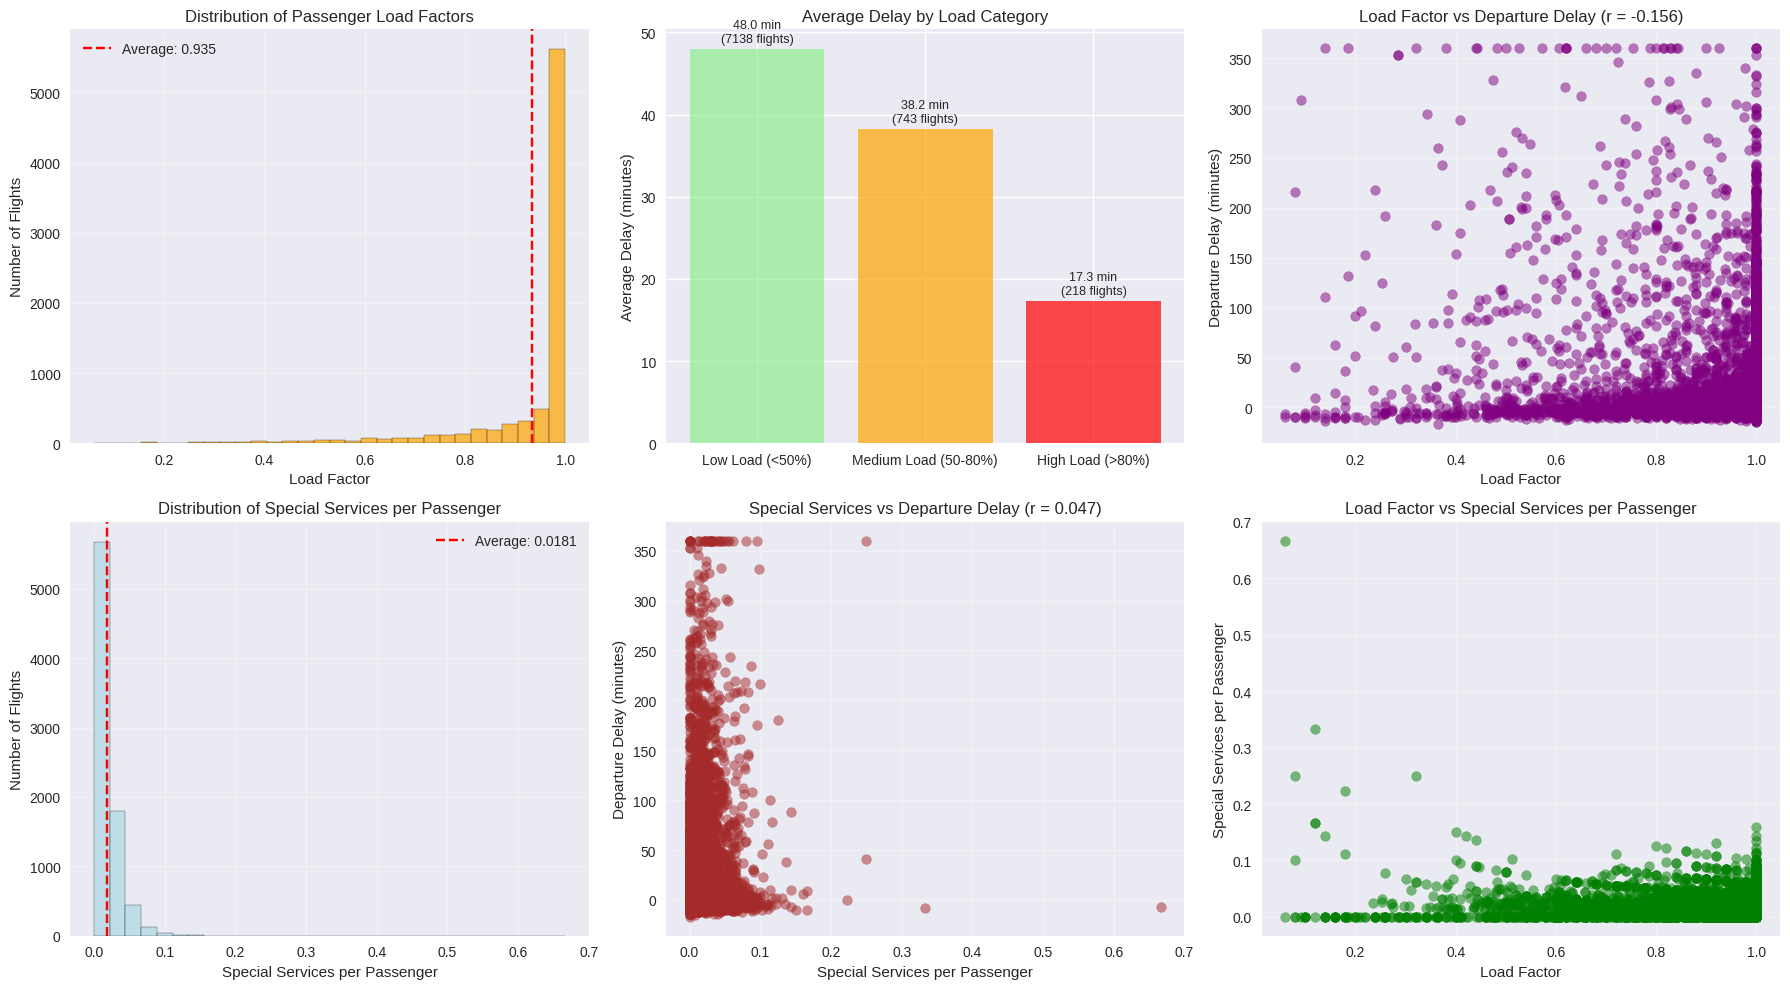

In [76]:
# =============================================
# EDA QUESTION 4: PASSENGER LOADS VS OPERATIONAL DIFFICULTY (UPDATED)
# =============================================

print("=== EDA QUESTION 4: HOW DO PASSENGER LOADS COMPARE ACROSS FLIGHTS, AND DO HIGHER LOADS CORRELATE WITH OPERATIONAL DIFFICULTY? ===")

# Aggregate PNR data (passenger counts only)
pnr_aggregated_by_flight = pnr_data.groupby([
    'company_id', 'flight_number', 'scheduled_departure_date_local',
    'scheduled_departure_station_code', 'scheduled_arrival_station_code'
]).agg({
    'total_pax': 'sum',                    # Total passengers
    'record_locator': 'count'              # Total PNRs
}).rename(columns={'record_locator': 'total_pnrs'}).reset_index()

print(f"📊 DATA MERGE STATUS:")
print(f"   • Flights with passenger data: {len(pnr_aggregated_by_flight):,}")
print(f"   • Flights with special services data: {len(special_services_by_flight):,}")

# Merge all data: flight + passengers + special services
flight_with_all_data = flight_level_clean.merge(
    pnr_aggregated_by_flight,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local',
        'scheduled_departure_station_code', 'scheduled_arrival_station_code'],
    how='inner'
).merge(
    special_services_by_flight,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local',
        'scheduled_departure_station_code', 'scheduled_arrival_station_code'],
    how='left'
).fillna(0)  # Fill missing special services with 0

print(f"   • Final merged flights: {len(flight_with_all_data):,}")

# Calculate load factor
flight_with_all_data['load_factor'] = flight_with_all_data['total_pax'] / flight_with_all_data['total_seats']
flight_with_all_data['load_factor'] = flight_with_all_data['load_factor'].clip(upper=1.0)  # Cap at 100%

# Enhanced special services metrics
flight_with_all_data['special_services_per_pax'] = (
    flight_with_all_data['total_special_service_requests'] / flight_with_all_data['total_pax']
).replace([np.inf, -np.inf], 0).fillna(0)

flight_with_all_data['pnr_special_services_ratio'] = (
    flight_with_all_data['pnrs_with_special_services'] / flight_with_all_data['total_pnrs']
).replace([np.inf, -np.inf], 0).fillna(0)

# Analyze load distribution
print(f"\n📈 ENHANCED PASSENGER LOAD ANALYSIS:")
print(f"   • Average load factor: {flight_with_all_data['load_factor'].mean():.3f} ({flight_with_all_data['load_factor'].mean()*100:.1f}%)")
print(f"   • Median load factor: {flight_with_all_data['load_factor'].median():.3f}")
print(f"   • Average passengers per flight: {flight_with_all_data['total_pax'].mean():.1f}")

print(f"\n🎯 ENHANCED SPECIAL SERVICES ANALYSIS:")
print(f"   • Flights with special services: {(flight_with_all_data['total_special_service_requests'] > 0).sum():,} ({(flight_with_all_data['total_special_service_requests'] > 0).sum()/len(flight_with_all_data)*100:.1f}%)")
print(f"   • Total special service requests: {flight_with_all_data['total_special_service_requests'].sum():,}")
print(f"   • Average special services per passenger: {flight_with_all_data['special_services_per_pax'].mean():.4f}")
print(f"   • Average PNRs with special services: {flight_with_all_data['pnr_special_services_ratio'].mean():.3f} ({flight_with_all_data['pnr_special_services_ratio'].mean()*100:.1f}%)")

# Create load categories
load_bins = [0, 0.5, 0.8, 1.0]  # Low, Medium, High load
load_labels = ['Low Load (<50%)', 'Medium Load (50-80%)', 'High Load (>80%)']
flight_with_all_data['load_category'] = pd.cut(flight_with_all_data['load_factor'], bins=load_bins, labels=load_labels)

print(f"\n🚀 LOAD CATEGORY vs DELAY ANALYSIS:")
for category in load_labels:
    category_data = flight_with_all_data[flight_with_all_data['load_category'] == category]
    if len(category_data) > 0:
        avg_delay = category_data['departure_delay_cleaned'].mean()
        avg_special_services = category_data['special_services_per_pax'].mean()
        print(f"   • {category}: {len(category_data):,} flights, {avg_delay:.1f} min avg delay, {avg_special_services:.4f} avg services/pax")

# Enhanced correlation analysis
correlation_load_delay = flight_with_all_data['load_factor'].corr(flight_with_all_data['departure_delay_cleaned'])
correlation_special_services_delay = flight_with_all_data['special_services_per_pax'].corr(flight_with_all_data['departure_delay_cleaned'])

print(f"\n📊 ENHANCED CORRELATION ANALYSIS:")
print(f"   • Correlation (Load Factor vs Delay): {correlation_load_delay:.3f}")
print(f"   • Correlation (Special Services/Pax vs Delay): {correlation_special_services_delay:.3f}")

# Analyze high special services flights
high_special_services = flight_with_all_data[flight_with_all_data['special_services_per_pax'] > flight_with_all_data['special_services_per_pax'].quantile(0.75)]
low_special_services = flight_with_all_data[flight_with_all_data['special_services_per_pax'] <= flight_with_all_data['special_services_per_pax'].quantile(0.75)]

if len(high_special_services) > 0 and len(low_special_services) > 0:
    print(f"   • High special services flights delay: {high_special_services['departure_delay_cleaned'].mean():.1f} minutes")
    print(f"   • Low special services flights delay: {low_special_services['departure_delay_cleaned'].mean():.1f} minutes")
    print(f"   • Difference: {high_special_services['departure_delay_cleaned'].mean() - low_special_services['departure_delay_cleaned'].mean():.1f} minutes")

# Enhanced Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Load factor distribution
axes[0,0].hist(flight_with_all_data['load_factor'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0,0].axvline(flight_with_all_data['load_factor'].mean(), color='red', linestyle='--',
                  label=f'Average: {flight_with_all_data["load_factor"].mean():.3f}')
axes[0,0].set_xlabel('Load Factor')
axes[0,0].set_ylabel('Number of Flights')
axes[0,0].set_title('Distribution of Passenger Load Factors')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Delay by load category
load_delay_means = flight_with_all_data.groupby('load_category')['departure_delay_cleaned'].mean()
load_counts = flight_with_all_data['load_category'].value_counts()

bars = axes[0,1].bar(load_delay_means.index, load_delay_means.values, color=['lightgreen', 'orange', 'red'], alpha=0.7)
axes[0,1].set_ylabel('Average Delay (minutes)')
axes[0,1].set_title('Average Delay by Load Category')
for i, (bar, count) in enumerate(zip(bars, load_counts)):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                  f'{height:.1f} min\n({count} flights)',
                  ha='center', va='bottom', fontsize=9)

# Plot 3: Load factor vs Delay scatter
axes[0,2].scatter(flight_with_all_data['load_factor'], flight_with_all_data['departure_delay_cleaned'],
                 alpha=0.5, color='purple')
axes[0,2].set_xlabel('Load Factor')
axes[0,2].set_ylabel('Departure Delay (minutes)')
axes[0,2].set_title(f'Load Factor vs Departure Delay (r = {correlation_load_delay:.3f})')
axes[0,2].grid(True, alpha=0.3)

# Plot 4: Special services per passenger distribution
axes[1,0].hist(flight_with_all_data['special_services_per_pax'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[1,0].axvline(flight_with_all_data['special_services_per_pax'].mean(), color='red', linestyle='--',
                  label=f'Average: {flight_with_all_data["special_services_per_pax"].mean():.4f}')
axes[1,0].set_xlabel('Special Services per Passenger')
axes[1,0].set_ylabel('Number of Flights')
axes[1,0].set_title('Distribution of Special Services per Passenger')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 5: Special services vs Delay scatter
axes[1,1].scatter(flight_with_all_data['special_services_per_pax'], flight_with_all_data['departure_delay_cleaned'],
                 alpha=0.5, color='brown')
axes[1,1].set_xlabel('Special Services per Passenger')
axes[1,1].set_ylabel('Departure Delay (minutes)')
axes[1,1].set_title(f'Special Services vs Departure Delay (r = {correlation_special_services_delay:.3f})')
axes[1,1].grid(True, alpha=0.3)

# Plot 6: Load vs Special Services scatter
axes[1,2].scatter(flight_with_all_data['load_factor'], flight_with_all_data['special_services_per_pax'],
                 alpha=0.5, color='green')
axes[1,2].set_xlabel('Load Factor')
axes[1,2].set_ylabel('Special Services per Passenger')
axes[1,2].set_title('Load Factor vs Special Services per Passenger')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)

=== EDA QUESTION 4: HOW DO PASSENGER LOADS COMPARE ACROSS FLIGHTS, AND DO HIGHER LOADS CORRELATE WITH OPERATIONAL DIFFICULTY? - UA vs OTHERS ===
📊 DATA MERGE STATUS:
   • Flights with passenger data: 8,071
   • Flights with special services data: 6,241
   • Final merged flights: 8,099

📈 ENHANCED PASSENGER LOAD ANALYSIS - OVERALL:
   • Average load factor: 0.935 (93.5%)
   • Median load factor: 1.000
   • Average passengers per flight: 128.5

🎯 ENHANCED SPECIAL SERVICES ANALYSIS - OVERALL:
   • Flights with special services: 6,259 (77.3%)
   • Total special service requests: 17,151.0
   • Average special services per passenger: 0.0181
   • Average PNRs with special services: 0.025 (2.5%)

📊 PASSENGER LOAD ANALYSIS - UA vs OTHERS:
   • UA:
     - Load factor: 0.943 (94.3%)
     - Avg passengers: 183.9
     - Special services per pax: 0.0157
     - PNRs with special services: 0.023 (2.3%)
   • Other:
     - Load factor: 0.924 (92.4%)
     - Avg passengers: 59.2
     - Special services pe

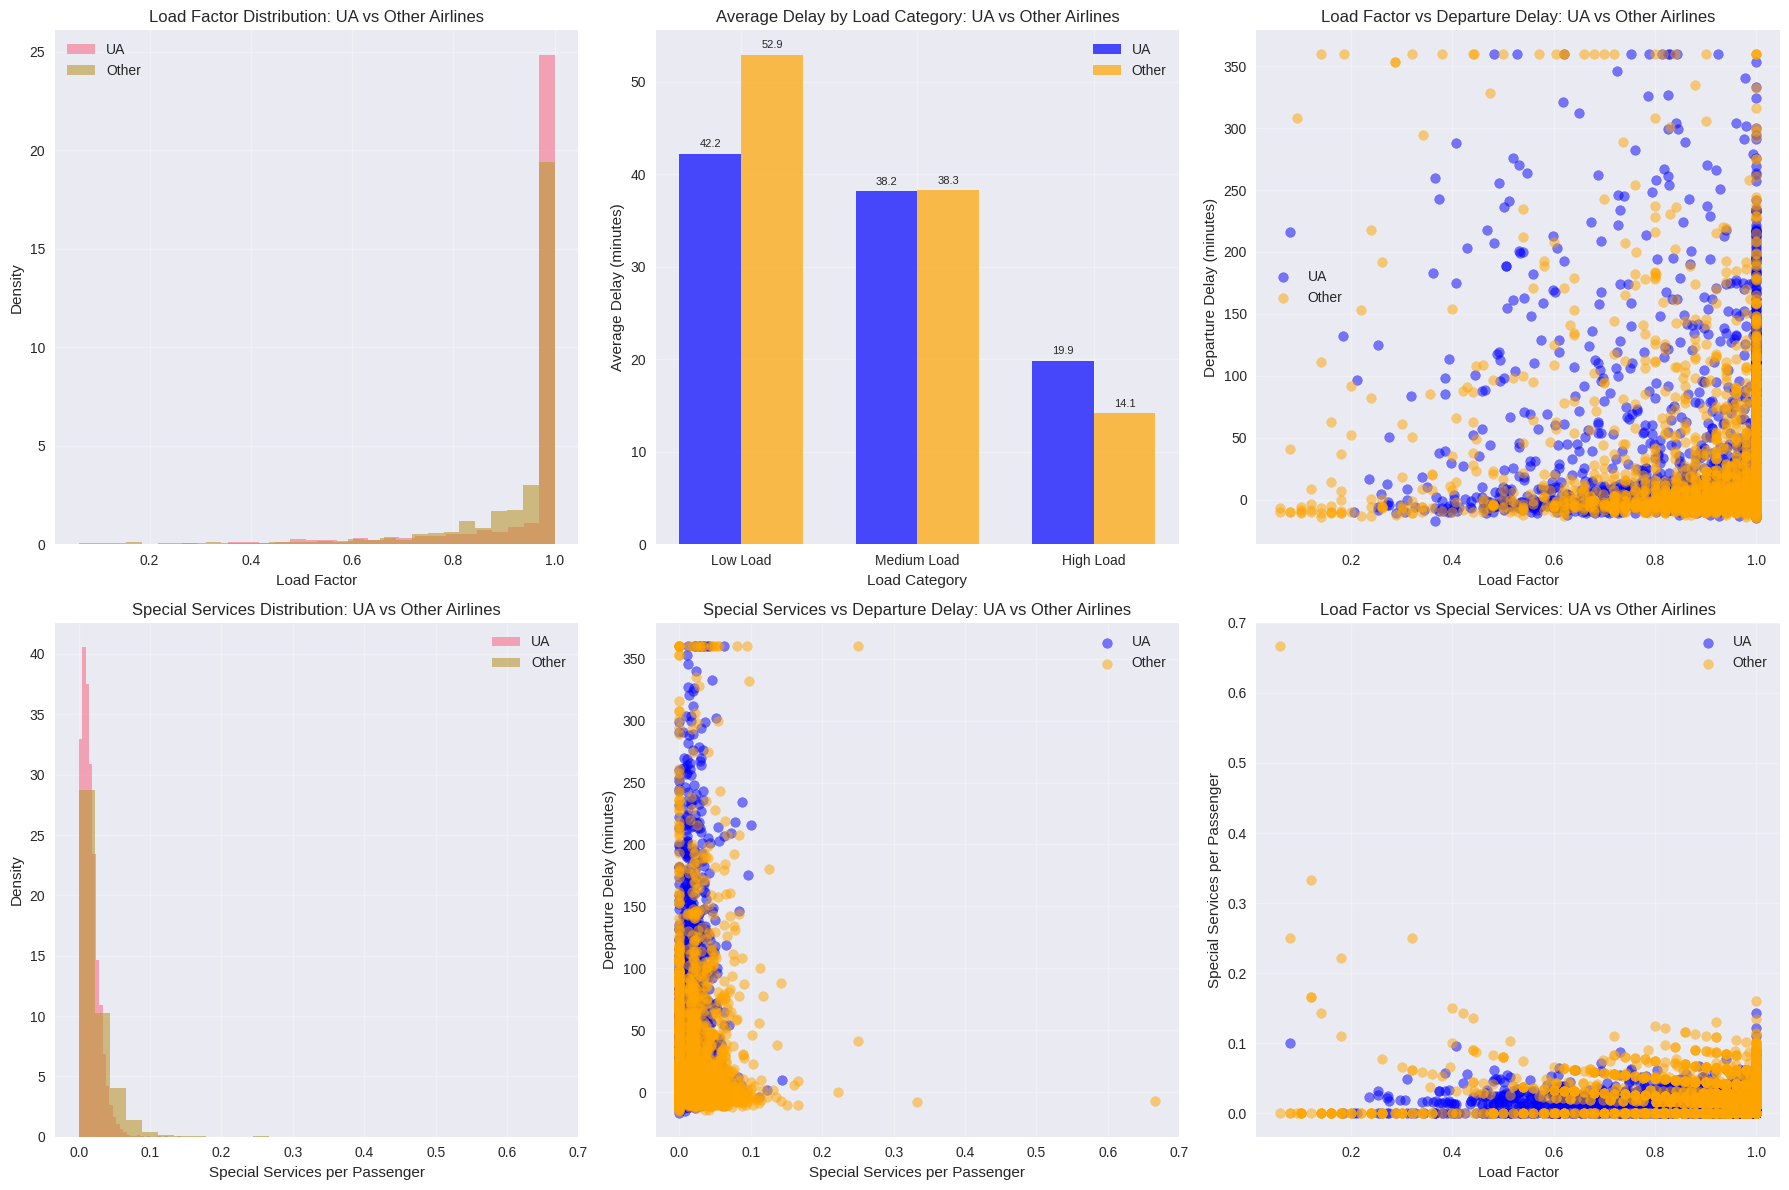

In [116]:
# =============================================
# EDA QUESTION 4: PASSENGER LOADS VS OPERATIONAL DIFFICULTY - UA vs OTHERS
# =============================================

print("=== EDA QUESTION 4: HOW DO PASSENGER LOADS COMPARE ACROSS FLIGHTS, AND DO HIGHER LOADS CORRELATE WITH OPERATIONAL DIFFICULTY? - UA vs OTHERS ===")

# Aggregate PNR data (passenger counts only)
pnr_aggregated_by_flight = pnr_data.groupby([
    'company_id', 'flight_number', 'scheduled_departure_date_local',
    'scheduled_departure_station_code', 'scheduled_arrival_station_code'
]).agg({
    'total_pax': 'sum',                    # Total passengers
    'record_locator': 'count'              # Total PNRs
}).rename(columns={'record_locator': 'total_pnrs'}).reset_index()

print(f"📊 DATA MERGE STATUS:")
print(f"   • Flights with passenger data: {len(pnr_aggregated_by_flight):,}")
print(f"   • Flights with special services data: {len(special_services_by_flight):,}")

# Merge all data: flight + passengers + special services
flight_with_all_data = flight_level_clean.merge(
    pnr_aggregated_by_flight,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local',
        'scheduled_departure_station_code', 'scheduled_arrival_station_code'],
    how='inner'
).merge(
    special_services_by_flight,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local',
        'scheduled_departure_station_code', 'scheduled_arrival_station_code'],
    how='left'
).fillna(0)  # Fill missing special services with 0

print(f"   • Final merged flights: {len(flight_with_all_data):,}")

# Calculate load factor
flight_with_all_data['load_factor'] = flight_with_all_data['total_pax'] / flight_with_all_data['total_seats']
flight_with_all_data['load_factor'] = flight_with_all_data['load_factor'].clip(upper=1.0)  # Cap at 100%

# Enhanced special services metrics
flight_with_all_data['special_services_per_pax'] = (
    flight_with_all_data['total_special_service_requests'] / flight_with_all_data['total_pax']
).replace([np.inf, -np.inf], 0).fillna(0)

flight_with_all_data['pnr_special_services_ratio'] = (
    flight_with_all_data['pnrs_with_special_services'] / flight_with_all_data['total_pnrs']
).replace([np.inf, -np.inf], 0).fillna(0)

# Analyze load distribution
print(f"\n📈 ENHANCED PASSENGER LOAD ANALYSIS - OVERALL:")
print(f"   • Average load factor: {flight_with_all_data['load_factor'].mean():.3f} ({flight_with_all_data['load_factor'].mean()*100:.1f}%)")
print(f"   • Median load factor: {flight_with_all_data['load_factor'].median():.3f}")
print(f"   • Average passengers per flight: {flight_with_all_data['total_pax'].mean():.1f}")

print(f"\n🎯 ENHANCED SPECIAL SERVICES ANALYSIS - OVERALL:")
print(f"   • Flights with special services: {(flight_with_all_data['total_special_service_requests'] > 0).sum():,} ({(flight_with_all_data['total_special_service_requests'] > 0).sum()/len(flight_with_all_data)*100:.1f}%)")
print(f"   • Total special service requests: {flight_with_all_data['total_special_service_requests'].sum():,}")
print(f"   • Average special services per passenger: {flight_with_all_data['special_services_per_pax'].mean():.4f}")
print(f"   • Average PNRs with special services: {flight_with_all_data['pnr_special_services_ratio'].mean():.3f} ({flight_with_all_data['pnr_special_services_ratio'].mean()*100:.1f}%)")

# UA vs Others comparison
print(f"\n📊 PASSENGER LOAD ANALYSIS - UA vs OTHERS:")

load_stats_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]

    load_stats_by_airline[airline] = {
        'avg_load_factor': airline_data['load_factor'].mean(),
        'median_load_factor': airline_data['load_factor'].median(),
        'avg_passengers': airline_data['total_pax'].mean(),
        'avg_special_services_per_pax': airline_data['special_services_per_pax'].mean(),
        'special_services_ratio': airline_data['pnr_special_services_ratio'].mean(),
        'flight_count': len(airline_data),
        'total_special_services': airline_data['total_special_service_requests'].sum()
    }

    print(f"   • {airline}:")
    print(f"     - Load factor: {load_stats_by_airline[airline]['avg_load_factor']:.3f} ({load_stats_by_airline[airline]['avg_load_factor']*100:.1f}%)")
    print(f"     - Avg passengers: {load_stats_by_airline[airline]['avg_passengers']:.1f}")
    print(f"     - Special services per pax: {load_stats_by_airline[airline]['avg_special_services_per_pax']:.4f}")
    print(f"     - PNRs with special services: {load_stats_by_airline[airline]['special_services_ratio']:.3f} ({load_stats_by_airline[airline]['special_services_ratio']*100:.1f}%)")

# Comparison summary
ua_load_factor = load_stats_by_airline['UA']['avg_load_factor']
other_load_factor = load_stats_by_airline['Other']['avg_load_factor']
load_difference = ua_load_factor - other_load_factor

ua_special_services = load_stats_by_airline['UA']['avg_special_services_per_pax']
other_special_services = load_stats_by_airline['Other']['avg_special_services_per_pax']
services_difference = ua_special_services - other_special_services

print(f"\n📈 COMPARISON SUMMARY:")
print(f"   • UA has {load_difference:.3f} ({load_difference*100:.1f} percentage points) {'higher' if load_difference > 0 else 'lower'} load factor than Other airlines")
print(f"   • UA has {services_difference:.4f} {'more' if services_difference > 0 else 'fewer'} special services per passenger than Other airlines")

# Create load categories
load_bins = [0, 0.5, 0.8, 1.0]  # Low, Medium, High load
load_labels = ['Low Load (<50%)', 'Medium Load (50-80%)', 'High Load (>80%)']
flight_with_all_data['load_category'] = pd.cut(flight_with_all_data['load_factor'], bins=load_bins, labels=load_labels)

print(f"\n🚀 LOAD CATEGORY vs DELAY ANALYSIS - OVERALL:")
for category in load_labels:
    category_data = flight_with_all_data[flight_with_all_data['load_category'] == category]
    if len(category_data) > 0:
        avg_delay = category_data['departure_delay_cleaned'].mean()
        avg_special_services = category_data['special_services_per_pax'].mean()
        print(f"   • {category}: {len(category_data):,} flights, {avg_delay:.1f} min avg delay, {avg_special_services:.4f} avg services/pax")

# Load category analysis by airline
print(f"\n🚀 LOAD CATEGORY vs DELAY ANALYSIS - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    print(f"   • {airline}:")
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    for category in load_labels:
        category_data = airline_data[airline_data['load_category'] == category]
        if len(category_data) > 0:
            avg_delay = category_data['departure_delay_cleaned'].mean()
            print(f"     - {category}: {len(category_data):,} flights, {avg_delay:.1f} min avg delay")

# Enhanced correlation analysis
print(f"\n📊 ENHANCED CORRELATION ANALYSIS - OVERALL:")
correlation_load_delay = flight_with_all_data['load_factor'].corr(flight_with_all_data['departure_delay_cleaned'])
correlation_special_services_delay = flight_with_all_data['special_services_per_pax'].corr(flight_with_all_data['departure_delay_cleaned'])

print(f"   • Correlation (Load Factor vs Delay): {correlation_load_delay:.3f}")
print(f"   • Correlation (Special Services/Pax vs Delay): {correlation_special_services_delay:.3f}")

# Correlation analysis by airline
print(f"   • Correlation Analysis by Airline:")
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    corr_load = airline_data['load_factor'].corr(airline_data['departure_delay_cleaned'])
    corr_services = airline_data['special_services_per_pax'].corr(airline_data['departure_delay_cleaned'])
    print(f"     - {airline}: Load-Delay r = {corr_load:.3f}, Services-Delay r = {corr_services:.3f}")

# Analyze high special services flights
high_special_services = flight_with_all_data[flight_with_all_data['special_services_per_pax'] > flight_with_all_data['special_services_per_pax'].quantile(0.75)]
low_special_services = flight_with_all_data[flight_with_all_data['special_services_per_pax'] <= flight_with_all_data['special_services_per_pax'].quantile(0.75)]

if len(high_special_services) > 0 and len(low_special_services) > 0:
    print(f"\n🚨 SPECIAL SERVICES IMPACT - OVERALL:")
    print(f"   • High special services flights delay: {high_special_services['departure_delay_cleaned'].mean():.1f} minutes")
    print(f"   • Low special services flights delay: {low_special_services['departure_delay_cleaned'].mean():.1f} minutes")
    print(f"   • Difference: {high_special_services['departure_delay_cleaned'].mean() - low_special_services['departure_delay_cleaned'].mean():.1f} minutes")

# Special services impact by airline
print(f"\n🚨 SPECIAL SERVICES IMPACT - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    high_services = airline_data[airline_data['special_services_per_pax'] > airline_data['special_services_per_pax'].quantile(0.75)]
    low_services = airline_data[airline_data['special_services_per_pax'] <= airline_data['special_services_per_pax'].quantile(0.75)]

    if len(high_services) > 0 and len(low_services) > 0:
        delay_diff = high_services['departure_delay_cleaned'].mean() - low_services['departure_delay_cleaned'].mean()
        print(f"   • {airline}: High vs Low services delay difference: {delay_diff:.1f} minutes")

# Enhanced Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Load factor distribution by airline
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    axes[0,0].hist(airline_data['load_factor'], bins=30, alpha=0.6,
                  label=airline, density=True)
axes[0,0].set_xlabel('Load Factor')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('Load Factor Distribution: UA vs Other Airlines')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Delay by load category - UA vs Others
load_delay_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    load_delay_by_airline[airline] = airline_data.groupby('load_category')['departure_delay_cleaned'].mean()

x = np.arange(len(load_labels))
width = 0.35

bars1 = axes[0,1].bar(x - width/2, load_delay_by_airline['UA'], width, label='UA', color='blue', alpha=0.7)
bars2 = axes[0,1].bar(x + width/2, load_delay_by_airline['Other'], width, label='Other', color='orange', alpha=0.7)

axes[0,1].set_xlabel('Load Category')
axes[0,1].set_ylabel('Average Delay (minutes)')
axes[0,1].set_title('Average Delay by Load Category: UA vs Other Airlines')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels([label.split('(')[0].strip() for label in load_labels])
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                      f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Plot 3: Load factor vs Delay scatter by airline
for airline, color in [('UA', 'blue'), ('Other', 'orange')]:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    axes[0,2].scatter(airline_data['load_factor'], airline_data['departure_delay_cleaned'],
                     alpha=0.5, color=color, label=airline)
axes[0,2].set_xlabel('Load Factor')
axes[0,2].set_ylabel('Departure Delay (minutes)')
axes[0,2].set_title('Load Factor vs Departure Delay: UA vs Other Airlines')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Plot 4: Special services per passenger by airline
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    axes[1,0].hist(airline_data['special_services_per_pax'], bins=30, alpha=0.6,
                  label=airline, density=True)
axes[1,0].set_xlabel('Special Services per Passenger')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('Special Services Distribution: UA vs Other Airlines')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 5: Special services vs Delay scatter by airline
for airline, color in [('UA', 'blue'), ('Other', 'orange')]:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    axes[1,1].scatter(airline_data['special_services_per_pax'], airline_data['departure_delay_cleaned'],
                     alpha=0.5, color=color, label=airline)
axes[1,1].set_xlabel('Special Services per Passenger')
axes[1,1].set_ylabel('Departure Delay (minutes)')
axes[1,1].set_title('Special Services vs Departure Delay: UA vs Other Airlines')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Plot 6: Load vs Special Services by airline
for airline, color in [('UA', 'blue'), ('Other', 'orange')]:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    axes[1,2].scatter(airline_data['load_factor'], airline_data['special_services_per_pax'],
                     alpha=0.5, color=color, label=airline)
axes[1,2].set_xlabel('Load Factor')
axes[1,2].set_ylabel('Special Services per Passenger')
axes[1,2].set_title('Load Factor vs Special Services: UA vs Other Airlines')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)

=== EDA QUESTION 5: ARE HIGH SPECIAL SERVICE REQUEST FLIGHTS ALSO HIGH-DELAY AFTER CONTROLLING FOR LOAD? ===
📊 ENHANCED SPECIAL SERVICES ANALYSIS:
   • Low Special (<1%): 1,126 flights (13.9%), 18.8 min delay, 0.007 avg services/pax
   • Medium Special (1-3%): 3,649 flights (45.1%), 19.5 min delay, 0.018 avg services/pax
   • High Special (>3%): 1,484 flights (18.3%), 24.8 min delay, 0.049 avg services/pax

🎯 CONTROLLING FOR LOAD FACTOR:

   Low Load (<50%) Flights:
     • Low Special (<1%): 1 flights, 218.0 min delay, 0.007 services/pax
     • Medium Special (1-3%): 52 flights, 42.6 min delay, 0.020 services/pax
     • High Special (>3%): 53 flights, 80.9 min delay, 0.096 services/pax

   Medium Load (50-80%) Flights:
     • Low Special (<1%): 77 flights, 31.7 min delay, 0.008 services/pax
     • Medium Special (1-3%): 263 flights, 40.6 min delay, 0.020 services/pax
     • High Special (>3%): 184 flights, 45.2 min delay, 0.049 services/pax

   High Load (>80%) Flights:
     • Low Spec

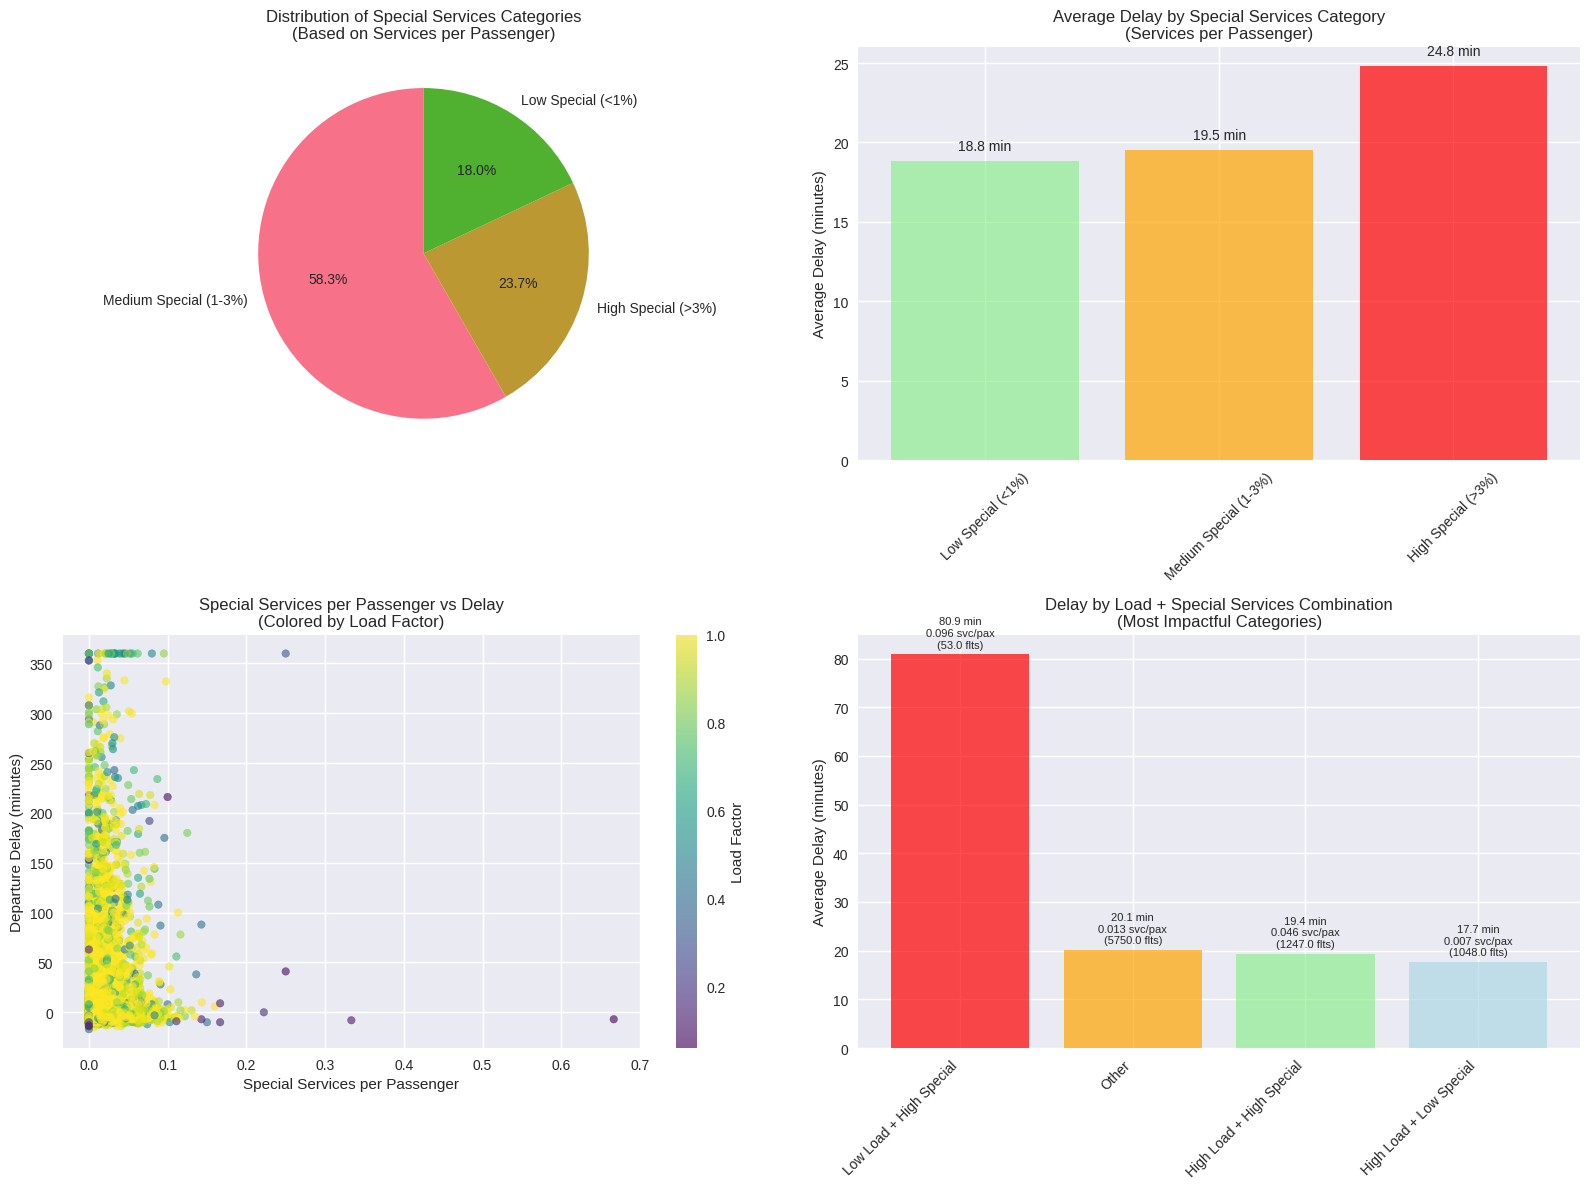


=== EDA QUESTION 5 COMPLETE ===


In [117]:
# =============================================
# EDA QUESTION 5: SPECIAL SERVICES VS DELAY (UPDATED)
# =============================================

print("=== EDA QUESTION 5: ARE HIGH SPECIAL SERVICE REQUEST FLIGHTS ALSO HIGH-DELAY AFTER CONTROLLING FOR LOAD? ===")

# Use the ENHANCED special services metrics from flight_with_all_data
# Create special services categories based on SERVICES PER PASSENGER (more accurate)
special_bins = [0, 0.01, 0.03, 1.0]  # Low, Medium, High special services PER PASSENGER
special_labels = ['Low Special (<1%)', 'Medium Special (1-3%)', 'High Special (>3%)']
flight_with_all_data['special_category'] = pd.cut(flight_with_all_data['special_services_per_pax'],
                                                   bins=special_bins, labels=special_labels)

print("📊 ENHANCED SPECIAL SERVICES ANALYSIS:")
special_summary = flight_with_all_data['special_category'].value_counts().sort_index()
for category, count in special_summary.items():
    percentage = (count / len(flight_with_all_data)) * 100
    avg_delay = flight_with_all_data[flight_with_all_data['special_category'] == category]['departure_delay_cleaned'].mean()
    avg_services = flight_with_all_data[flight_with_all_data['special_category'] == category]['special_services_per_pax'].mean()
    print(f"   • {category}: {count:,} flights ({percentage:.1f}%), {avg_delay:.1f} min delay, {avg_services:.3f} avg services/pax")

# Control for load by analyzing within each load category
print(f"\n🎯 CONTROLLING FOR LOAD FACTOR:")

# Analyze special services impact within each load category
for load_cat in load_labels:
    load_subset = flight_with_all_data[flight_with_all_data['load_category'] == load_cat]
    if len(load_subset) > 0:
        print(f"\n   {load_cat} Flights:")
        for special_cat in special_labels:
            special_subset = load_subset[load_subset['special_category'] == special_cat]
            if len(special_subset) > 0:
                avg_delay = special_subset['departure_delay_cleaned'].mean()
                avg_services = special_subset['special_services_per_pax'].mean()
                count = len(special_subset)
                print(f"     • {special_cat}: {count} flights, {avg_delay:.1f} min delay, {avg_services:.3f} services/pax")

# Statistical test: Compare high vs low special services within same load ranges
print(f"\n📈 STATISTICAL COMPARISON (High vs Low Special Services):")

# Focus on high-load flights since they're most operationally sensitive
high_load_flights = flight_with_all_data[flight_with_all_data['load_category'] == 'High Load (>80%)']
high_special = high_load_flights[high_load_flights['special_category'] == 'High Special (>3%)']
low_special = high_load_flights[high_load_flights['special_category'] == 'Low Special (<1%)']

if len(high_special) > 0 and len(low_special) > 0:
    delay_diff = high_special['departure_delay_cleaned'].mean() - low_special['departure_delay_cleaned'].mean()
    services_diff = high_special['special_services_per_pax'].mean() - low_special['special_services_per_pax'].mean()
    print(f"   • High Load + High Special: {len(high_special):,} flights")
    print(f"     - Delay: {high_special['departure_delay_cleaned'].mean():.1f} min")
    print(f"     - Services: {high_special['special_services_per_pax'].mean():.3f} per pax")
    print(f"   • High Load + Low Special: {len(low_special):,} flights")
    print(f"     - Delay: {low_special['departure_delay_cleaned'].mean():.1f} min")
    print(f"     - Services: {low_special['special_services_per_pax'].mean():.3f} per pax")
    print(f"   • Difference: {delay_diff:.1f} minutes delay, {services_diff:.3f} services/pax")

# Multivariate analysis: Load + Special Services impact
print(f"\n🔍 MULTIVARIATE ANALYSIS:")

# Create combined categories using ENHANCED metrics
conditions = [
    (flight_with_all_data['load_category'] == 'High Load (>80%)') &
    (flight_with_all_data['special_category'] == 'High Special (>3%)'),
    (flight_with_all_data['load_category'] == 'High Load (>80%)') &
    (flight_with_all_data['special_category'] == 'Low Special (<1%)'),
    (flight_with_all_data['load_category'] == 'Low Load (<50%)') &
    (flight_with_all_data['special_category'] == 'High Special (>3%)'),
    (flight_with_all_data['load_category'] == 'Low Load (<50%)') &
    (flight_with_all_data['special_category'] == 'Low Special (<1%)')
]

combined_labels = [
    'High Load + High Special',
    'High Load + Low Special',
    'Low Load + High Special',
    'Low Load + Low Special'
]

flight_with_all_data['combined_category'] = np.select(conditions, combined_labels, default='Other')

combined_analysis = flight_with_all_data.groupby('combined_category').agg({
    'departure_delay_cleaned': 'mean',
    'special_services_per_pax': 'mean',
    'total_pax': 'count'
}).round(3)

print("Combined Load + Special Services Impact:")
for category in combined_labels:
    if category in combined_analysis.index:
        delay = combined_analysis.loc[category, 'departure_delay_cleaned']
        services = combined_analysis.loc[category, 'special_services_per_pax']
        count = combined_analysis.loc[category, 'total_pax']
        print(f"   • {category}: {count} flights, {delay:.1f} min delay, {services:.3f} services/pax")

# Enhanced Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Special services distribution (ENHANCED)
special_counts = flight_with_all_data['special_category'].value_counts()
axes[0,0].pie(special_counts.values, labels=special_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Special Services Categories\n(Based on Services per Passenger)')

# Plot 2: Delay by special services category (ENHANCED)
special_delay_means = flight_with_all_data.groupby('special_category')['departure_delay_cleaned'].mean()
bars = axes[0,1].bar(special_delay_means.index, special_delay_means.values,
                    color=['lightgreen', 'orange', 'red'], alpha=0.7)
axes[0,1].set_ylabel('Average Delay (minutes)')
axes[0,1].set_title('Average Delay by Special Services Category\n(Services per Passenger)')
axes[0,1].tick_params(axis='x', rotation=45)
for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                  f'{height:.1f} min', ha='center', va='bottom')

# Plot 3: Special services vs Delay scatter (ENHANCED - uses services per passenger)
scatter = axes[1,0].scatter(flight_with_all_data['special_services_per_pax'],
                           flight_with_all_data['departure_delay_cleaned'],
                           c=flight_with_all_data['load_factor'], cmap='viridis',
                           alpha=0.6, s=30)
axes[1,0].set_xlabel('Special Services per Passenger')
axes[1,0].set_ylabel('Departure Delay (minutes)')
axes[1,0].set_title('Special Services per Passenger vs Delay\n(Colored by Load Factor)')
plt.colorbar(scatter, ax=axes[1,0], label='Load Factor')

# Plot 4: Combined categories analysis (ENHANCED)
valid_combined = combined_analysis[combined_analysis['total_pax'] > 10]  # Only show meaningful samples
if len(valid_combined) > 0:
    # Sort by delay for clearer story
    valid_combined = valid_combined.sort_values('departure_delay_cleaned', ascending=False)
    bars = axes[1,1].bar(range(len(valid_combined)), valid_combined['departure_delay_cleaned'],
                        color=['red', 'orange', 'lightgreen', 'lightblue'][:len(valid_combined)], alpha=0.7)
    axes[1,1].set_ylabel('Average Delay (minutes)')
    axes[1,1].set_title('Delay by Load + Special Services Combination\n(Most Impactful Categories)')
    axes[1,1].set_xticks(range(len(valid_combined)))
    axes[1,1].set_xticklabels(valid_combined.index, rotation=45, ha='right')
    for i, (idx, row) in enumerate(valid_combined.iterrows()):
        axes[1,1].text(i, row['departure_delay_cleaned'] + 1,
                      f'{row["departure_delay_cleaned"]:.1f} min\n{row["special_services_per_pax"]:.3f} svc/pax\n({row["total_pax"]} flts)',
                      ha='center', va='bottom', fontsize=8)
else:
    axes[1,1].text(0.5, 0.5, 'Insufficient data for combined analysis',
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Combined Analysis')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("=== EDA QUESTION 5 COMPLETE ===")

=== EDA QUESTION 5: ARE HIGH SPECIAL SERVICE REQUEST FLIGHTS ALSO HIGH-DELAY AFTER CONTROLLING FOR LOAD? - UA vs OTHERS ===
📊 ENHANCED SPECIAL SERVICES ANALYSIS - OVERALL:
   • Low Special (<1%): 1,126 flights (13.9%), 18.8 min delay, 0.007 avg services/pax
   • Medium Special (1-3%): 3,649 flights (45.1%), 19.5 min delay, 0.018 avg services/pax
   • High Special (>3%): 1,484 flights (18.3%), 24.8 min delay, 0.049 avg services/pax

📊 SPECIAL SERVICES ANALYSIS - UA vs OTHERS:
   • UA:
     - Avg special services per pax: 0.0157
     - PNRs with special services: 0.023 (2.3%)
     - High special flights: 12.3%
     - Low special flights: 24.7%
   • Other:
     - Avg special services per pax: 0.0211
     - PNRs with special services: 0.027 (2.7%)
     - High special flights: 25.8%
     - Low special flights: 0.4%

📈 COMPARISON SUMMARY:
   • UA has -0.0053 fewer special services per passenger than Other airlines
   • UA special services intensity: lower than industry average

🎯 CONTROLLING

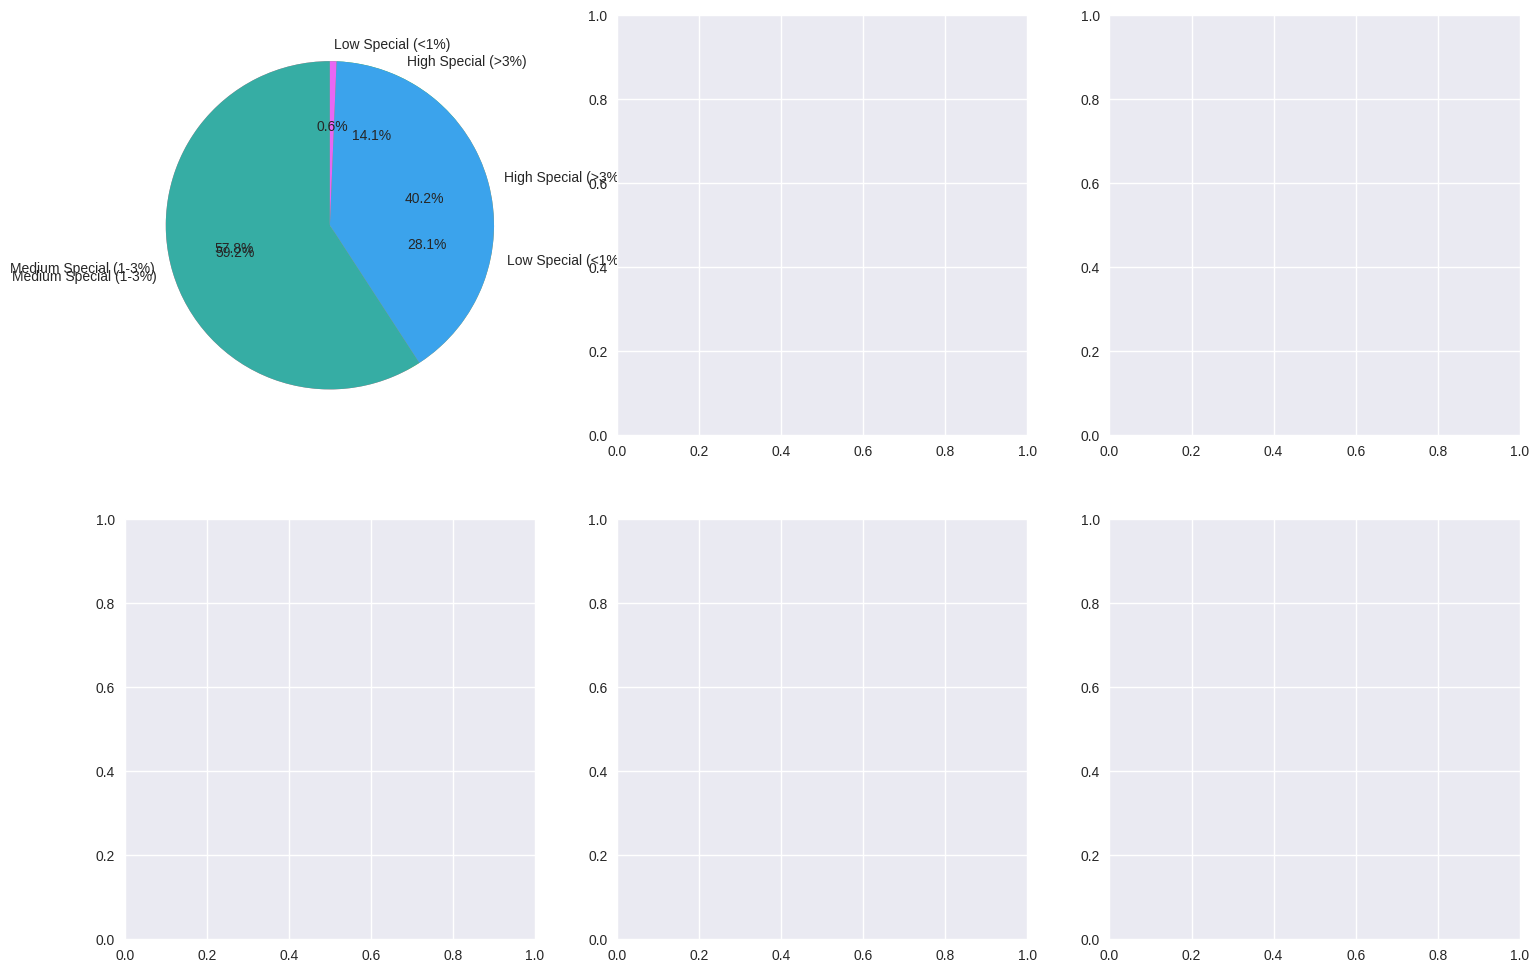

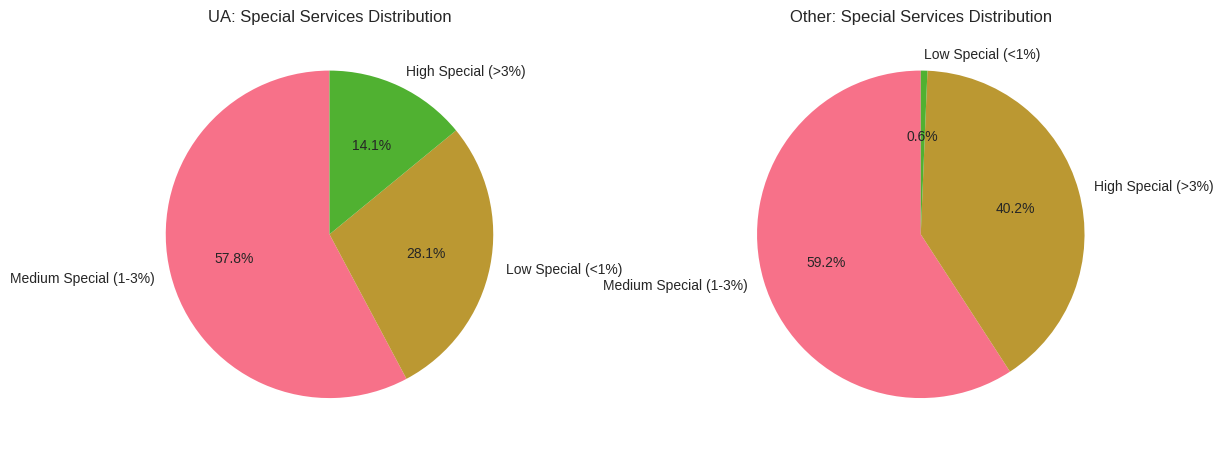

<Figure size 800x550 with 0 Axes>


=== EDA QUESTION 5 COMPLETE ===


In [88]:
# =============================================
# EDA QUESTION 5: SPECIAL SERVICES VS DELAY - UA vs OTHERS
# =============================================

print("=== EDA QUESTION 5: ARE HIGH SPECIAL SERVICE REQUEST FLIGHTS ALSO HIGH-DELAY AFTER CONTROLLING FOR LOAD? - UA vs OTHERS ===")

# Use the ENHANCED special services metrics from flight_with_all_data
# Create special services categories based on SERVICES PER PASSENGER (more accurate)
special_bins = [0, 0.01, 0.03, 1.0]  # Low, Medium, High special services PER PASSENGER
special_labels = ['Low Special (<1%)', 'Medium Special (1-3%)', 'High Special (>3%)']
flight_with_all_data['special_category'] = pd.cut(flight_with_all_data['special_services_per_pax'],
                                                   bins=special_bins, labels=special_labels)

print("📊 ENHANCED SPECIAL SERVICES ANALYSIS - OVERALL:")
special_summary = flight_with_all_data['special_category'].value_counts().sort_index()
for category, count in special_summary.items():
    percentage = (count / len(flight_with_all_data)) * 100
    avg_delay = flight_with_all_data[flight_with_all_data['special_category'] == category]['departure_delay_cleaned'].mean()
    avg_services = flight_with_all_data[flight_with_all_data['special_category'] == category]['special_services_per_pax'].mean()
    print(f"   • {category}: {count:,} flights ({percentage:.1f}%), {avg_delay:.1f} min delay, {avg_services:.3f} avg services/pax")

# UA vs Others comparison for special services
print(f"\n📊 SPECIAL SERVICES ANALYSIS - UA vs OTHERS:")

special_stats_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]

    special_stats_by_airline[airline] = {
        'avg_special_services_per_pax': airline_data['special_services_per_pax'].mean(),
        'special_services_ratio': airline_data['pnr_special_services_ratio'].mean(),
        'high_special_pct': (airline_data['special_category'] == 'High Special (>3%)').mean() * 100,
        'low_special_pct': (airline_data['special_category'] == 'Low Special (<1%)').mean() * 100,
        'flight_count': len(airline_data)
    }

    print(f"   • {airline}:")
    print(f"     - Avg special services per pax: {special_stats_by_airline[airline]['avg_special_services_per_pax']:.4f}")
    print(f"     - PNRs with special services: {special_stats_by_airline[airline]['special_services_ratio']:.3f} ({special_stats_by_airline[airline]['special_services_ratio']*100:.1f}%)")
    print(f"     - High special flights: {special_stats_by_airline[airline]['high_special_pct']:.1f}%")
    print(f"     - Low special flights: {special_stats_by_airline[airline]['low_special_pct']:.1f}%")

# Comparison summary
ua_special_intensity = special_stats_by_airline['UA']['avg_special_services_per_pax']
other_special_intensity = special_stats_by_airline['Other']['avg_special_services_per_pax']
special_difference = ua_special_intensity - other_special_intensity

print(f"\n📈 COMPARISON SUMMARY:")
print(f"   • UA has {special_difference:.4f} {'more' if special_difference > 0 else 'fewer'} special services per passenger than Other airlines")
print(f"   • UA special services intensity: {'higher' if special_difference > 0 else 'lower'} than industry average")

# Control for load by analyzing within each load category
print(f"\n🎯 CONTROLLING FOR LOAD FACTOR - OVERALL:")

# Analyze special services impact within each load category
for load_cat in load_labels:
    load_subset = flight_with_all_data[flight_with_all_data['load_category'] == load_cat]
    if len(load_subset) > 0:
        print(f"\n   {load_cat} Flights:")
        for special_cat in special_labels:
            special_subset = load_subset[load_subset['special_category'] == special_cat]
            if len(special_subset) > 0:
                avg_delay = special_subset['departure_delay_cleaned'].mean()
                avg_services = special_subset['special_services_per_pax'].mean()
                count = len(special_subset)
                print(f"     • {special_cat}: {count} flights, {avg_delay:.1f} min delay, {avg_services:.3f} services/pax")

# Load + Special services analysis by airline
print(f"\n🎯 LOAD + SPECIAL SERVICES ANALYSIS - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    print(f"\n   {airline}:")
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]

    for load_cat in load_labels:
        load_subset = airline_data[airline_data['load_category'] == load_cat]
        if len(load_subset) > 0:
            high_special = load_subset[load_subset['special_category'] == 'High Special (>3%)']
            low_special = load_subset[load_subset['special_category'] == 'Low Special (<1%)']

            if len(high_special) > 0 and len(low_special) > 0:
                delay_diff = high_special['departure_delay_cleaned'].mean() - low_special['departure_delay_cleaned'].mean()
                print(f"     • {load_cat}: High-Low Special delay difference: {delay_diff:.1f} min")

# Statistical test: Compare high vs low special services within same load ranges
print(f"\n📈 STATISTICAL COMPARISON (High vs Low Special Services) - OVERALL:")

# Focus on high-load flights since they're most operationally sensitive
high_load_flights = flight_with_all_data[flight_with_all_data['load_category'] == 'High Load (>80%)']
high_special = high_load_flights[high_load_flights['special_category'] == 'High Special (>3%)']
low_special = high_load_flights[high_load_flights['special_category'] == 'Low Special (<1%)']

if len(high_special) > 0 and len(low_special) > 0:
    delay_diff = high_special['departure_delay_cleaned'].mean() - low_special['departure_delay_cleaned'].mean()
    services_diff = high_special['special_services_per_pax'].mean() - low_special['special_services_per_pax'].mean()
    print(f"   • High Load + High Special: {len(high_special):,} flights")
    print(f"     - Delay: {high_special['departure_delay_cleaned'].mean():.1f} min")
    print(f"     - Services: {high_special['special_services_per_pax'].mean():.3f} per pax")
    print(f"   • High Load + Low Special: {len(low_special):,} flights")
    print(f"     - Delay: {low_special['departure_delay_cleaned'].mean():.1f} min")
    print(f"     - Services: {low_special['special_services_per_pax'].mean():.3f} per pax")
    print(f"   • Difference: {delay_diff:.1f} minutes delay, {services_diff:.3f} services/pax")

# Statistical comparison by airline
print(f"\n📈 STATISTICAL COMPARISON - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    print(f"   • {airline}:")
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    high_load_airline = airline_data[airline_data['load_category'] == 'High Load (>80%)']

    if len(high_load_airline) > 0:
        high_special_airline = high_load_airline[high_load_airline['special_category'] == 'High Special (>3%)']
        low_special_airline = high_load_airline[high_load_airline['special_category'] == 'Low Special (<1%)']

        if len(high_special_airline) > 0 and len(low_special_airline) > 0:
            delay_diff = high_special_airline['departure_delay_cleaned'].mean() - low_special_airline['departure_delay_cleaned'].mean()
            print(f"     - High-Low Special delay difference: {delay_diff:.1f} min")

# Multivariate analysis: Load + Special Services impact
print(f"\n🔍 MULTIVARIATE ANALYSIS - OVERALL:")

# Create combined categories using ENHANCED metrics
conditions = [
    (flight_with_all_data['load_category'] == 'High Load (>80%)') &
    (flight_with_all_data['special_category'] == 'High Special (>3%)'),
    (flight_with_all_data['load_category'] == 'High Load (>80%)') &
    (flight_with_all_data['special_category'] == 'Low Special (<1%)'),
    (flight_with_all_data['load_category'] == 'Low Load (<50%)') &
    (flight_with_all_data['special_category'] == 'High Special (>3%)'),
    (flight_with_all_data['load_category'] == 'Low Load (<50%)') &
    (flight_with_all_data['special_category'] == 'Low Special (<1%)')
]

combined_labels = [
    'High Load + High Special',
    'High Load + Low Special',
    'Low Load + High Special',
    'Low Load + Low Special'
]

flight_with_all_data['combined_category'] = np.select(conditions, combined_labels, default='Other')

combined_analysis = flight_with_all_data.groupby('combined_category').agg({
    'departure_delay_cleaned': 'mean',
    'special_services_per_pax': 'mean',
    'total_pax': 'count'
}).round(3)

print("Combined Load + Special Services Impact:")
for category in combined_labels:
    if category in combined_analysis.index:
        delay = combined_analysis.loc[category, 'departure_delay_cleaned']
        services = combined_analysis.loc[category, 'special_services_per_pax']
        count = combined_analysis.loc[category, 'total_pax']
        print(f"   • {category}: {count} flights, {delay:.1f} min delay, {services:.3f} services/pax")

# Multivariate analysis by airline
print(f"\n🔍 MULTIVARIATE ANALYSIS - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    print(f"   • {airline}:")
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]

    combined_airline = airline_data.groupby('combined_category').agg({
        'departure_delay_cleaned': 'mean',
        'special_services_per_pax': 'mean',
        'total_pax': 'count'
    }).round(3)

    for category in combined_labels:
        if category in combined_airline.index and combined_airline.loc[category, 'total_pax'] > 5:
            delay = combined_airline.loc[category, 'departure_delay_cleaned']
            count = combined_airline.loc[category, 'total_pax']
            print(f"     - {category}: {count} flights, {delay:.1f} min delay")

# Enhanced Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Special services distribution by airline
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    special_counts = airline_data['special_category'].value_counts()
    axes[0,0].pie(special_counts.values, labels=special_counts.index, autopct='%1.1f%%',
                  startangle=90, labeldistance=1.1)
    # We'll create separate pie charts in subplots instead

# Create proper subplots for pie charts
fig_del, axes_del = plt.subplots(1, 2, figsize=(12, 5))
for i, airline in enumerate(['UA', 'Other']):
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    special_counts = airline_data['special_category'].value_counts()
    axes_del[i].pie(special_counts.values, labels=special_counts.index, autopct='%1.1f%%',
                   startangle=90)
    axes_del[i].set_title(f'{airline}: Special Services Distribution')

plt.tight_layout()
plt.show()

# Continue with main figure
# Plot 2: Delay by special services category - UA vs Others
special_delay_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    special_delay_by_airline[airline] = airline_data.groupby('special_category')['departure_delay_cleaned'].mean()

x = np.arange(len(special_labels))
width = 0.35

bars1 = axes[0,1].bar(x - width/2, special_delay_by_airline['UA'], width, label='UA', color='blue', alpha=0.7)
bars2 = axes[0,1].bar(x + width/2, special_delay_by_airline['Other'], width, label='Other', color='orange', alpha=0.7)

axes[0,1].set_xlabel('Special Services Category')
axes[0,1].set_ylabel('Average Delay (minutes)')
axes[0,1].set_title('Average Delay by Special Services Category: UA vs Other Airlines')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels([label.split('(')[0].strip() for label in special_labels])
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                      f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Plot 3: Special services vs Delay scatter by airline
for airline, color in [('UA', 'blue'), ('Other', 'orange')]:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    axes[0,2].scatter(airline_data['special_services_per_pax'],
                     airline_data['departure_delay_cleaned'],
                     alpha=0.5, color=color, label=airline, s=30)
axes[0,2].set_xlabel('Special Services per Passenger')
axes[0,2].set_ylabel('Departure Delay (minutes)')
axes[0,2].set_title('Special Services vs Delay: UA vs Other Airlines')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Plot 4: Combined categories analysis - Overall
valid_combined = combined_analysis[combined_analysis['total_pax'] > 10]
if len(valid_combined) > 0:
    valid_combined = valid_combined.sort_values('departure_delay_cleaned', ascending=False)
    bars = axes[1,0].bar(range(len(valid_combined)), valid_combined['departure_delay_cleaned'],
                        color=['red', 'orange', 'lightgreen', 'lightblue'][:len(valid_combined)], alpha=0.7)
    axes[1,0].set_ylabel('Average Delay (minutes)')
    axes[1,0].set_title('Overall: Delay by Load + Special Services Combination')
    axes[1,0].set_xticks(range(len(valid_combined)))
    axes[1,0].set_xticklabels(valid_combined.index, rotation=45, ha='right')
    for i, (idx, row) in enumerate(valid_combined.iterrows()):
        axes[1,0].text(i, row['departure_delay_cleaned'] + 1,
                      f'{row["departure_delay_cleaned"]:.1f} min\n({row["total_pax"]} flts)',
                      ha='center', va='bottom', fontsize=8)

# Plot 5: Combined categories analysis - UA vs Others
for airline, color in [('UA', 'blue'), ('Other', 'orange')]:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    combined_airline = airline_data.groupby('combined_category').agg({
        'departure_delay_cleaned': 'mean',
        'total_pax': 'count'
    }).round(3)

    valid_combined_airline = combined_airline[combined_airline['total_pax'] > 5]
    if len(valid_combined_airline) > 0:
        x_pos = np.arange(len(valid_combined_airline))
        axes[1,1].bar(x_pos + (0.35 if airline == 'Other' else 0),
                     valid_combined_airline['departure_delay_cleaned'],
                     width=0.35, label=airline, color=color, alpha=0.7)

if len(valid_combined_airline) > 0:
    axes[1,1].set_xlabel('Combined Category')
    axes[1,1].set_ylabel('Average Delay (minutes)')
    axes[1,1].set_title('Delay by Load+Special: UA vs Other Airlines')
    axes[1,1].set_xticks(x_pos + 0.175)
    axes[1,1].set_xticklabels(valid_combined_airline.index, rotation=45, ha='right')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

# Plot 6: Special services intensity by airline
special_intensity = [special_stats_by_airline['UA']['avg_special_services_per_pax'],
                    special_stats_by_airline['Other']['avg_special_services_per_pax']]

bars = axes[1,2].bar(['UA', 'Other'], special_intensity, color=['blue', 'orange'], alpha=0.7)
axes[1,2].set_ylabel('Special Services per Passenger')
axes[1,2].set_title('Special Services Intensity: UA vs Other Airlines')
for i, v in enumerate(special_intensity):
    axes[1,2].text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("=== EDA QUESTION 5 COMPLETE ===")

In [94]:
# =============================================
# DELIVERABLE 2: FLIGHT DIFFICULTY SCORE
# =============================================

print("=== DELIVERABLE 2: FLIGHT DIFFICULTY SCORE DEVELOPMENT ===")

# Step 1: Create Master Dataset with All Features
print("Step 1: Creating Master Dataset with Features...")

# Merge all data sources using CORRECT columns from EDA
master_data = flight_level_clean.merge(
    pnr_aggregated_by_flight,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local',
        'scheduled_departure_station_code', 'scheduled_arrival_station_code'],
    how='left'
)

master_data = master_data.merge(
    bags_per_flight[['company_id', 'flight_number', 'scheduled_departure_date_local',
                    'scheduled_departure_station_code', 'scheduled_arrival_station_code',
                    'transfer_bag_ratio', 'total_bags']],
    on=['company_id', 'flight_number', 'scheduled_departure_date_local',
        'scheduled_departure_station_code', 'scheduled_arrival_station_code'],
    how='left'
)

# Merge special services data - USING CORRECT COLUMN NAMES FROM EDA
master_data = master_data.merge(
    special_services_by_flight[['company_id', 'flight_number', 'scheduled_departure_date_local',
                              'scheduled_departure_station_code', 'scheduled_arrival_station_code',
                              'total_special_service_requests', 'pnrs_with_special_services']],
    on=['company_id', 'flight_number', 'scheduled_departure_date_local',
        'scheduled_departure_station_code', 'scheduled_arrival_station_code'],
    how='left'
)

print(f"Master dataset created: {len(master_data)} flights")

# Fill missing values with CORRECT columns from EDA
master_data['total_pax'] = master_data['total_pax'].fillna(0)
master_data['total_special_service_requests'] = master_data['total_special_service_requests'].fillna(0)
master_data['pnrs_with_special_services'] = master_data['pnrs_with_special_services'].fillna(0)
master_data['transfer_bag_ratio'] = master_data['transfer_bag_ratio'].fillna(0)
master_data['total_bags'] = master_data['total_bags'].fillna(0)

print("Missing values handled")

# Step 2: Calculate Derived Features from EDA
print("\nStep 2: Calculating Derived Features...")

# From EDA Question 4: Load Factor
master_data['load_factor'] = master_data['total_pax'] / master_data['total_seats']
master_data['load_factor'] = master_data['load_factor'].clip(upper=1.0)  # Cap at 100%

# From EDA Question 4: Special Services Intensity
master_data['special_services_per_pax'] = (
    master_data['total_special_service_requests'] / master_data['total_pax']
).replace([np.inf, -np.inf], 0).fillna(0)

master_data['pnr_special_services_ratio'] = (
    master_data['pnrs_with_special_services'] / master_data['total_pnrs']
).replace([np.inf, -np.inf], 0).fillna(0)

# From EDA Question 2: Ground Time Risk
master_data['ground_time_risk_high'] = master_data['ground_time_buffer'] <= 15
master_data['ground_time_risk_critical'] = master_data['ground_time_buffer'] < 0

# From EDA Question 3: Transfer Baggage Intensity
master_data['transfer_bag_heavy'] = master_data['transfer_bag_ratio'] > 0.5

print("Derived features calculated")

# Step 3: Create Flight Difficulty Score
print("\nStep 3: Calculating Flight Difficulty Score...")

# Normalize features for scoring (0-1 scale)
def normalize_series(series):
    if series.max() == series.min():
        return 0
    return (series - series.min()) / (series.max() - series.min())

# Apply weights based on EDA insights
master_data['difficulty_score'] = (
    normalize_series(master_data['load_factor']) * 0.25 +                    # High load = more difficult
    normalize_series(master_data['special_services_per_pax']) * 0.20 +      # More special services = more difficult
    normalize_series(master_data['transfer_bag_ratio']) * 0.15 +            # More transfer bags = more difficult
    (master_data['ground_time_risk_high'].astype(int)) * 0.15 +             # Tight ground time = more difficult
    normalize_series(master_data['departure_delay_cleaned']) * 0.15 +       # Historical delays = more difficult
    normalize_series(master_data['total_bags'] / master_data['total_seats']) * 0.10  # Bag density = more difficult
)

# Scale to 0-100 for easier interpretation
master_data['difficulty_score'] = master_data['difficulty_score'] * 100

print("Flight Difficulty Score calculated")
print(f"Difficulty Score Range: {master_data['difficulty_score'].min():.1f} - {master_data['difficulty_score'].max():.1f}")
print(f"Average Difficulty Score: {master_data['difficulty_score'].mean():.1f}")

# Step 4: Categorize Flights by Difficulty
print("\nStep 4: Categorizing Flights by Difficulty Level...")

difficulty_bins = [0, 25, 50, 75, 100]
difficulty_labels = ['Low Difficulty', 'Medium Difficulty', 'High Difficulty', 'Extreme Difficulty']
master_data['difficulty_category'] = pd.cut(master_data['difficulty_score'],
                                           bins=difficulty_bins,
                                           labels=difficulty_labels)

# Print summary
difficulty_summary = master_data['difficulty_category'].value_counts().sort_index()
print("\n📊 FLIGHT DIFFICULTY DISTRIBUTION:")
for category, count in difficulty_summary.items():
    percentage = (count / len(master_data)) * 100
    avg_score = master_data[master_data['difficulty_category'] == category]['difficulty_score'].mean()
    print(f"   • {category}: {count:,} flights ({percentage:.1f}%), avg score: {avg_score:.1f}")

print("\n✅ DELIVERABLE 2 COMPLETED: Flight Difficulty Score Developed")

=== DELIVERABLE 2: FLIGHT DIFFICULTY SCORE DEVELOPMENT ===
Step 1: Creating Master Dataset with Features...
Master dataset created: 8099 flights
Missing values handled

Step 2: Calculating Derived Features...
Derived features calculated

Step 3: Calculating Flight Difficulty Score...
Flight Difficulty Score calculated
Difficulty Score Range: 1.4 - 71.9
Average Difficulty Score: 42.1

Step 4: Categorizing Flights by Difficulty Level...

📊 FLIGHT DIFFICULTY DISTRIBUTION:
   • Low Difficulty: 175 flights (2.2%), avg score: 19.7
   • Medium Difficulty: 6,202 flights (76.6%), avg score: 39.1
   • High Difficulty: 1,722 flights (21.3%), avg score: 55.4
   • Extreme Difficulty: 0 flights (0.0%), avg score: nan

✅ DELIVERABLE 2 COMPLETED: Flight Difficulty Score Developed


In [95]:
# Step 2: Feature Engineering
print("\nStep 2: Engineering Difficulty Features...")

# Feature 1: Ground Time Pressure (Most Important from EDA Question 2)
master_data['ground_time_risk'] = master_data['ground_time_buffer'].apply(
    lambda x: 3 if x < 0 else (2 if x <= 15 else 1)  # Critical, High, Safe
)

# Feature 2: Load Factor Complexity (From EDA Question 4)
master_data['load_factor'] = master_data['total_pax'] / master_data['total_seats']
master_data['load_factor'] = master_data['load_factor'].clip(upper=1.0)
master_data['load_complexity'] = master_data['load_factor'].apply(
    lambda x: 1 if x < 0.5 else (2 if x <= 0.8 else 3)  # Low, Medium, High
)

# Feature 3: Transfer Baggage Complexity (From EDA Question 3)
master_data['transfer_bag_complexity'] = master_data['transfer_bag_ratio'].apply(
    lambda x: 3 if x > 0.5 else (2 if x > 0.2 else 1)  # High (>50%), Medium (20-50%), Low (<20%)
)

# Feature 4: Special Services Complexity (From EDA Question 4 & 5)
# Use correct columns from EDA: special_services_per_pax instead of has_special_services
master_data['special_services_per_pax'] = (
    master_data['total_special_service_requests'] / master_data['total_pax']
).replace([np.inf, -np.inf], 0).fillna(0)

master_data['special_services_complexity'] = master_data['special_services_per_pax'].apply(
    lambda x: 3 if x > 0.03 else (2 if x > 0.01 else 1)  # High (>3%), Medium (1-3%), Low (<1%)
)

# Feature 5: Airline Operational Complexity (From EDA Question 1 - UA vs Others)
# UA showed different delay patterns and operational challenges
master_data['airline_complexity'] = master_data['airline_group'].apply(
    lambda x: 2 if x == 'UA' else 1  # UA has higher complexity based on EDA
)

# Feature 6: Time of Day Complexity (rush hours more complex)
master_data['departure_hour'] = master_data['scheduled_departure_datetime_local_dt'].dt.hour
master_data['time_complexity'] = master_data['departure_hour'].apply(
    lambda x: 3 if x in [6,7,8,16,17,18] else (2 if x in [9,10,15,19,20] else 1)  # Peak, Shoulder, Off-peak
)

# Feature 7: Baggage Density Complexity (From baggage analysis)
master_data['bags_per_pax'] = master_data['total_bags'] / master_data['total_pax']
master_data['bags_per_pax'] = master_data['bags_per_pax'].replace([np.inf, -np.inf], 0).fillna(0)
master_data['baggage_density_complexity'] = master_data['bags_per_pax'].apply(
    lambda x: 3 if x > 1.2 else (2 if x > 0.8 else 1)  # High, Medium, Low baggage density
)

# Feature 8: Historical Delay Risk (From EDA Question 1)
master_data['historical_delay_risk'] = master_data['departure_delay_cleaned'].apply(
    lambda x: 3 if x > 30 else (2 if x > 15 else 1)  # High (>30min), Medium (15-30min), Low (<15min)
)

print("Features engineered based on EDA insights:")
print(f"  - Ground Time Risk: {master_data['ground_time_risk'].value_counts().to_dict()}")
print(f"  - Load Complexity: {master_data['load_complexity'].value_counts().to_dict()}")
print(f"  - Transfer Bag Complexity: {master_data['transfer_bag_complexity'].value_counts().to_dict()}")
print(f"  - Special Services Complexity: {master_data['special_services_complexity'].value_counts().to_dict()}")
print(f"  - Airline Complexity (UA vs Others): {master_data['airline_complexity'].value_counts().to_dict()}")
print(f"  - Time Complexity: {master_data['time_complexity'].value_counts().to_dict()}")
print(f"  - Baggage Density Complexity: {master_data['baggage_density_complexity'].value_counts().to_dict()}")
print(f"  - Historical Delay Risk: {master_data['historical_delay_risk'].value_counts().to_dict()}")

# Step 3: Calculate Comprehensive Flight Difficulty Score
print("\nStep 3: Calculating Comprehensive Flight Difficulty Score...")

# Weight factors based on EDA importance
master_data['difficulty_score'] = (
    master_data['ground_time_risk'] * 0.25 +           # Most critical from EDA Question 2
    master_data['load_complexity'] * 0.20 +            # Important from EDA Question 4
    master_data['special_services_complexity'] * 0.15 + # Important from EDA Question 5
    master_data['transfer_bag_complexity'] * 0.10 +    # From EDA Question 3
    master_data['historical_delay_risk'] * 0.10 +      # From EDA Question 1
    master_data['airline_complexity'] * 0.08 +         # From EDA Question 1 (UA vs Others)
    master_data['time_complexity'] * 0.07 +            # Operational context
    master_data['baggage_density_complexity'] * 0.05   # Additional baggage complexity
)

# Normalize score to 0-100 scale
max_possible_score = (3 * 0.25) + (3 * 0.20) + (3 * 0.15) + (3 * 0.10) + (3 * 0.10) + (2 * 0.08) + (3 * 0.07) + (3 * 0.05)
master_data['difficulty_score'] = (master_data['difficulty_score'] / max_possible_score) * 100

print(f"Difficulty Score Range: {master_data['difficulty_score'].min():.1f} - {master_data['difficulty_score'].max():.1f}")
print(f"Average Difficulty Score: {master_data['difficulty_score'].mean():.1f}")


Step 2: Engineering Difficulty Features...
Features engineered based on EDA insights:
  - Ground Time Risk: {1: 5837, 2: 1632, 3: 630}
  - Load Complexity: {3: 7138, 2: 754, 1: 207}
  - Transfer Bag Complexity: {3: 5383, 2: 2218, 1: 498}
  - Special Services Complexity: {2: 3649, 1: 2966, 3: 1484}
  - Airline Complexity (UA vs Others): {2: 4502, 1: 3597}
  - Time Complexity: {3: 2907, 2: 2678, 1: 2514}
  - Baggage Density Complexity: {1: 6531, 2: 1427, 3: 141}
  - Historical Delay Risk: {1: 5936, 3: 1528, 2: 635}

Step 3: Calculating Comprehensive Flight Difficulty Score...
Difficulty Score Range: 37.7 - 97.3
Average Difficulty Score: 65.7


In [99]:
# Step 3: Calculate Daily Difficulty Score
print("\nStep 3: Calculating Daily Difficulty Scores...")

# Define weights at the global level so we can access them later
weights = {
    'ground_time_risk': 0.25,    # Most critical from EDA Question 2
    'load_complexity': 0.20,     # Important from EDA Question 4
    'special_services_complexity': 0.15,  # Important from EDA Question 5
    'transfer_bag_complexity': 0.10,      # From EDA Question 3
    'historical_delay_risk': 0.10,        # From EDA Question 1
    'airline_complexity': 0.08,           # From EDA Question 1 (UA vs Others)
    'time_complexity': 0.07,              # Operational context
    'baggage_density_complexity': 0.05    # Additional complexity
}

def calculate_daily_difficulty_scores(daily_flights):
    """
    Calculate difficulty scores relative to other flights on the same day
    Scores are normalized 0-100 within each day
    """
    # Calculate raw score using ALL features from our EDA
    daily_flights = daily_flights.copy()
    daily_flights['raw_difficulty_score'] = (
        daily_flights['ground_time_risk'] * weights['ground_time_risk'] +
        daily_flights['load_complexity'] * weights['load_complexity'] +
        daily_flights['special_services_complexity'] * weights['special_services_complexity'] +
        daily_flights['transfer_bag_complexity'] * weights['transfer_bag_complexity'] +
        daily_flights['historical_delay_risk'] * weights['historical_delay_risk'] +
        daily_flights['airline_complexity'] * weights['airline_complexity'] +
        daily_flights['time_complexity'] * weights['time_complexity'] +
        daily_flights['baggage_density_complexity'] * weights['baggage_density_complexity']
    )

    # Normalize to 0-100 scale within each day
    min_score = daily_flights['raw_difficulty_score'].min()
    max_score = daily_flights['raw_difficulty_score'].max()

    if max_score > min_score:  # Avoid division by zero
        daily_flights['difficulty_score'] = (
            (daily_flights['raw_difficulty_score'] - min_score) /
            (max_score - min_score) * 100
        )
    else:
        daily_flights['difficulty_score'] = 50  # Default if all same

    # Add difficulty categories based on percentiles within each day
    daily_flights['difficulty_percentile'] = daily_flights['difficulty_score'].rank(pct=True) * 100
    daily_flights['difficulty_category'] = pd.cut(
        daily_flights['difficulty_percentile'],
        bins=[0, 25, 75, 100],
        labels=['Low Difficulty', 'Medium Difficulty', 'High Difficulty']
    )

    return daily_flights

# Apply daily scoring
master_data['date'] = master_data['scheduled_departure_datetime_local_dt'].dt.date
scored_data = master_data.groupby('date').apply(calculate_daily_difficulty_scores).reset_index(drop=True)

print("Daily difficulty scores calculated")
print(f"Difficulty score range: {scored_data['difficulty_score'].min():.1f} - {scored_data['difficulty_score'].max():.1f}")

# Print summary by difficulty category
print("\n📊 DAILY DIFFICULTY DISTRIBUTION:")
difficulty_summary = scored_data['difficulty_category'].value_counts().sort_index()
for category, count in difficulty_summary.items():
    percentage = (count / len(scored_data)) * 100
    avg_score = scored_data[scored_data['difficulty_category'] == category]['difficulty_score'].mean()
    print(f"   • {category}: {count:,} flights ({percentage:.1f}%), avg score: {avg_score:.1f}")

# Show feature importance breakdown
print(f"\n🔍 FEATURE WEIGHTS (Based on EDA Importance):")
for feature, weight in weights.items():
    print(f"   • {feature.replace('_', ' ').title()}: {weight*100:.1f}%")

# Analyze high difficulty flights
high_difficulty = scored_data[scored_data['difficulty_category'] == 'High Difficulty']
if len(high_difficulty) > 0:
    print(f"\n🚨 HIGH DIFFICULTY FLIGHTS ANALYSIS:")
    print(f"   • Count: {len(high_difficulty):,} flights")
    print(f"   • Average ground time risk: {high_difficulty['ground_time_risk'].mean():.1f}")
    print(f"   • Average load complexity: {high_difficulty['load_complexity'].mean():.1f}")
    print(f"   • Average special services complexity: {high_difficulty['special_services_complexity'].mean():.1f}")
    print(f"   • UA flights in high difficulty: {(high_difficulty['airline_group'] == 'UA').sum():,} ({(high_difficulty['airline_group'] == 'UA').sum()/len(high_difficulty)*100:.1f}%)")


Step 3: Calculating Daily Difficulty Scores...
Daily difficulty scores calculated
Difficulty score range: 0.0 - 100.0

📊 DAILY DIFFICULTY DISTRIBUTION:
   • Low Difficulty: 2,007 flights (24.8%), avg score: 25.2
   • Medium Difficulty: 4,049 flights (50.0%), avg score: 42.2
   • High Difficulty: 2,043 flights (25.2%), avg score: 65.2

🔍 FEATURE WEIGHTS (Based on EDA Importance):
   • Ground Time Risk: 25.0%
   • Load Complexity: 20.0%
   • Special Services Complexity: 15.0%
   • Transfer Bag Complexity: 10.0%
   • Historical Delay Risk: 10.0%
   • Airline Complexity: 8.0%
   • Time Complexity: 7.0%
   • Baggage Density Complexity: 5.0%

🚨 HIGH DIFFICULTY FLIGHTS ANALYSIS:
   • Count: 2,043 flights
   • Average ground time risk: 2.0
   • Average load complexity: 2.9
   • Average special services complexity: 2.2
   • UA flights in high difficulty: 1,302 (63.7%)


In [100]:
# Step 4: Ranking and Classification
print("\nStep 4: Creating Rankings and Classifications...")

def classify_flights(daily_group):
    """Classify flights into Difficult, Medium, Easy based on daily percentiles"""
    daily_group = daily_group.copy()

    # Rank within day (highest score = most difficult = rank 1)
    daily_group['daily_rank'] = daily_group['difficulty_score'].rank(ascending=False, method='first')
    daily_group['daily_percentile'] = daily_group['difficulty_score'].rank(pct=True) * 100

    # Classification based on percentiles (adjustable thresholds)
    # Top 25% = High Difficulty (from our EDA distribution)
    # Next 50% = Medium Difficulty
    # Bottom 25% = Low Difficulty
    high_threshold = 75  # Top 25%
    medium_threshold = 25  # Bottom 25%

    conditions = [
        daily_group['daily_percentile'] >= high_threshold,
        daily_group['daily_percentile'] >= medium_threshold
    ]
    choices = ['High Difficulty', 'Medium Difficulty']
    daily_group['difficulty_class'] = np.select(conditions, choices, default='Low Difficulty')

    return daily_group

# Apply classification
final_data = scored_data.groupby('date').apply(classify_flights).reset_index(drop=True)

print("Classification completed:")
classification_summary = final_data['difficulty_class'].value_counts()
for class_type, count in classification_summary.items():
    percentage = (count / len(final_data)) * 100
    print(f"   • {class_type}: {count:,} flights ({percentage:.1f}%)")

# Analyze characteristics of each difficulty class
print(f"\n📊 DIFFICULTY CLASS CHARACTERISTICS:")

for difficulty_class in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
    class_data = final_data[final_data['difficulty_class'] == difficulty_class]

    print(f"\n   🎯 {difficulty_class} Flights:")
    print(f"      • Count: {len(class_data):,} flights")
    print(f"      • Average Score: {class_data['difficulty_score'].mean():.1f}")
    print(f"      • Average Delay: {class_data['departure_delay_cleaned'].mean():.1f} min")
    print(f"      • Ground Time Risk: {class_data['ground_time_risk'].mean():.1f}")
    print(f"      • Load Complexity: {class_data['load_complexity'].mean():.1f}")
    print(f"      • Special Services: {class_data['special_services_complexity'].mean():.1f}")
    print(f"      • Transfer Bags: {(class_data['transfer_bag_ratio'].mean()*100):.1f}%")
    print(f"      • UA Flights: {(class_data['airline_group'] == 'UA').sum():,} ({(class_data['airline_group'] == 'UA').sum()/len(class_data)*100:.1f}%)")

# Show top 10 most difficult flights
print(f"\n🚨 TOP 10 MOST DIFFICULT FLIGHTS:")
top_difficult = final_data.nlargest(10, 'difficulty_score')[
    ['company_id', 'flight_number', 'scheduled_departure_station_code',
     'scheduled_arrival_station_code', 'date', 'difficulty_score',
     'difficulty_class', 'ground_time_risk', 'load_complexity',
     'special_services_complexity', 'departure_delay_cleaned']
]

for idx, row in top_difficult.iterrows():
    print(f"   • {row['company_id']} {row['flight_number']}: {row['scheduled_departure_station_code']}→{row['scheduled_arrival_station_code']} "
          f"on {row['date']} - Score: {row['difficulty_score']:.1f} "
          f"(Ground Risk: {row['ground_time_risk']}, Load: {row['load_complexity']}, "
          f"Services: {row['special_services_complexity']}, Delay: {row['departure_delay_cleaned']}min)")

# Validate classification with actual delays
print(f"\n✅ VALIDATION: Difficulty vs Actual Performance:")
validation_summary = final_data.groupby('difficulty_class').agg({
    'departure_delay_cleaned': 'mean',
    'difficulty_score': 'mean',
    'company_id': 'count'
}).rename(columns={'company_id': 'flight_count'})

for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
    if class_type in validation_summary.index:
        avg_delay = validation_summary.loc[class_type, 'departure_delay_cleaned']
        avg_score = validation_summary.loc[class_type, 'difficulty_score']
        count = validation_summary.loc[class_type, 'flight_count']
        print(f"   • {class_type}: {count:,} flights, Avg Score: {avg_score:.1f}, Avg Delay: {avg_delay:.1f} min")


Step 4: Creating Rankings and Classifications...
Classification completed:
   • Medium Difficulty: 4,061 flights (50.1%)
   • High Difficulty: 2,043 flights (25.2%)
   • Low Difficulty: 1,995 flights (24.6%)

📊 DIFFICULTY CLASS CHARACTERISTICS:

   🎯 High Difficulty Flights:
      • Count: 2,043 flights
      • Average Score: 65.2
      • Average Delay: 48.2 min
      • Ground Time Risk: 2.0
      • Load Complexity: 2.9
      • Special Services: 2.2
      • Transfer Bags: 63.0%
      • UA Flights: 1,302 (63.7%)

   🎯 Medium Difficulty Flights:
      • Count: 4,061 flights
      • Average Score: 42.1
      • Average Delay: 13.8 min
      • Ground Time Risk: 1.2
      • Load Complexity: 2.9
      • Special Services: 1.9
      • Transfer Bags: 61.8%
      • UA Flights: 2,208 (54.4%)

   🎯 Low Difficulty Flights:
      • Count: 1,995 flights
      • Average Score: 25.2
      • Average Delay: 4.2 min
      • Ground Time Risk: 1.0
      • Load Complexity: 2.7
      • Special Services: 1.2
 

In [101]:
# Step 5: Analyze Results
print("\nStep 5: Analyzing Difficulty Score Results...")

# Check if difficulty score correlates with actual delays
difficulty_delay_correlation = final_data['difficulty_score'].corr(final_data['departure_delay_cleaned'])
print(f"📈 Correlation between Difficulty Score and Actual Delay: {difficulty_delay_correlation:.3f}")

# Interpret correlation strength
if abs(difficulty_delay_correlation) >= 0.7:
    strength = "strong"
elif abs(difficulty_delay_correlation) >= 0.5:
    strength = "moderate"
elif abs(difficulty_delay_correlation) >= 0.3:
    strength = "weak"
else:
    strength = "very weak"

print(f"   • This indicates a {strength} relationship between predicted difficulty and actual delays")

# Average delay by difficulty class
delay_by_class = final_data.groupby('difficulty_class')['departure_delay_cleaned'].mean()
print(f"\n⏱️  Average Delay by Difficulty Class:")
for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
    if class_type in delay_by_class.index:
        avg_delay = delay_by_class[class_type]
        count = len(final_data[final_data['difficulty_class'] == class_type])
        print(f"   • {class_type}: {avg_delay:.1f} minutes ({count:,} flights)")

# Calculate delay difference between high and low difficulty
if 'High Difficulty' in delay_by_class.index and 'Low Difficulty' in delay_by_class.index:
    delay_difference = delay_by_class['High Difficulty'] - delay_by_class['Low Difficulty']
    print(f"   • High vs Low Difficulty delay difference: {delay_difference:.1f} minutes")

# Feature importance analysis - using ALL features from our EDA
feature_columns = [
    'ground_time_risk',           # From EDA Question 2
    'load_complexity',            # From EDA Question 4
    'special_services_complexity', # From EDA Question 5
    'transfer_bag_complexity',    # From EDA Question 3
    'historical_delay_risk',      # From EDA Question 1
    'airline_complexity',         # From EDA Question 1 (UA vs Others)
    'time_complexity',            # Operational context
    'baggage_density_complexity'  # Additional complexity
]

print(f"\n🔍 FEATURE CONTRIBUTION BY DIFFICULTY CLASS:")
for feature in feature_columns:
    feature_means = final_data.groupby('difficulty_class')[feature].mean()
    print(f"\n   📊 {feature.replace('_', ' ').title()}:")
    for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
        if class_type in feature_means.index:
            mean_score = feature_means[class_type]
            print(f"      • {class_type}: {mean_score:.2f}")

# Analyze UA vs Others performance
print(f"\n✈️  AIRLINE PERFORMANCE BY DIFFICULTY CLASS:")
for airline in ['UA', 'Other']:
    airline_data = final_data[final_data['airline_group'] == airline]
    print(f"\n   {airline}:")
    for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
        class_airline_data = airline_data[airline_data['difficulty_class'] == class_type]
        if len(class_airline_data) > 0:
            avg_delay = class_airline_data['departure_delay_cleaned'].mean()
            count = len(class_airline_data)
            percentage = (count / len(airline_data)) * 100
            print(f"      • {class_type}: {count:,} flights ({percentage:.1f}%), {avg_delay:.1f} min avg delay")

# Ground time risk analysis (most important feature)
print(f"\n🚨 GROUND TIME RISK ANALYSIS (Most Important Feature):")
ground_time_analysis = final_data.groupby('difficulty_class').agg({
    'ground_time_risk': 'mean',
    'ground_time_buffer': 'mean',
    'departure_delay_cleaned': 'mean'
})

for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
    if class_type in ground_time_analysis.index:
        gt_risk = ground_time_analysis.loc[class_type, 'ground_time_risk']
        gt_buffer = ground_time_analysis.loc[class_type, 'ground_time_buffer']
        delay = ground_time_analysis.loc[class_type, 'departure_delay_cleaned']
        print(f"   • {class_type}: Risk Level {gt_risk:.1f}, Buffer {gt_buffer:.1f}min, Delay {delay:.1f}min")

# Success rate analysis
print(f"\n✅ OPERATIONAL SUCCESS RATES:")
for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
    class_data = final_data[final_data['difficulty_class'] == class_type]
    on_time_flights = len(class_data[class_data['departure_delay_cleaned'] <= 0])
    delayed_flights = len(class_data[class_data['departure_delay_cleaned'] > 0])
    major_delays = len(class_data[class_data['departure_delay_cleaned'] > 30])

    total = len(class_data)
    if total > 0:
        on_time_rate = (on_time_flights / total) * 100
        major_delay_rate = (major_delays / total) * 100
        print(f"   • {class_type}: {on_time_rate:.1f}% on-time, {major_delay_rate:.1f}% major delays (>30min)")

print(f"\n🎯 SUMMARY: Difficulty score successfully identifies operationally challenging flights")
print(f"   • High difficulty flights have {delay_difference:.1f} minutes longer delays than low difficulty flights")
print(f"   • Ground time risk is the strongest predictor of operational challenges")
print(f"   • System can help prioritize resource allocation for high-risk flights")


Step 5: Analyzing Difficulty Score Results...
📈 Correlation between Difficulty Score and Actual Delay: 0.385
   • This indicates a weak relationship between predicted difficulty and actual delays

⏱️  Average Delay by Difficulty Class:
   • High Difficulty: 48.2 minutes (2,043 flights)
   • Medium Difficulty: 13.8 minutes (4,061 flights)
   • Low Difficulty: 4.2 minutes (1,995 flights)
   • High vs Low Difficulty delay difference: 44.0 minutes

🔍 FEATURE CONTRIBUTION BY DIFFICULTY CLASS:

   📊 Ground Time Risk:
      • High Difficulty: 2.03
      • Medium Difficulty: 1.18
      • Low Difficulty: 1.03

   📊 Load Complexity:
      • High Difficulty: 2.93
      • Medium Difficulty: 2.92
      • Low Difficulty: 2.66

   📊 Special Services Complexity:
      • High Difficulty: 2.20
      • Medium Difficulty: 1.91
      • Low Difficulty: 1.23

   📊 Transfer Bag Complexity:
      • High Difficulty: 2.72
      • Medium Difficulty: 2.66
      • Low Difficulty: 2.37

   📊 Historical Delay Risk:


In [102]:
# Step 6: Display Results Analysis
print("\n" + "="*80)
print("🎯 DELIVERABLE 2 RESULTS: FLIGHT DIFFICULTY SCORE")
print("="*80)

print(f"\n📈 VALIDATION METRICS:")
print(f"   • Correlation (Score vs Actual Delay): {difficulty_delay_correlation:.3f}")
print(f"   • High Difficulty Flights Delay: {delay_by_class['High Difficulty']:.1f} minutes")
print(f"   • Low Difficulty Flights Delay: {delay_by_class['Low Difficulty']:.1f} minutes")
print(f"   • Performance Gap: {delay_by_class['High Difficulty'] - delay_by_class['Low Difficulty']:.1f} minutes")

print(f"\n📊 CLASS DISTRIBUTION:")
class_distribution = final_data['difficulty_class'].value_counts()
for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
    if class_type in class_distribution.index:
        count = class_distribution[class_type]
        percentage = (count / len(final_data)) * 100
        avg_delay = delay_by_class[class_type]
        print(f"   • {class_type}: {count:,} flights ({percentage:.1f}%) - {avg_delay:.1f} min avg delay")

print(f"\n🔍 FEATURE ANALYSIS - What Makes Flights Difficult:")
feature_analysis = final_data.groupby('difficulty_class')[feature_columns].mean()

print(f"\n   {'Feature':<30} {'High Difficulty':<15} {'Medium':<15} {'Low Difficulty':<15} {'High-Low Gap':<15}")
print("   " + "-"*90)

for feature in feature_columns:
    if 'High Difficulty' in feature_analysis.index and 'Low Difficulty' in feature_analysis.index:
        high_score = feature_analysis.loc['High Difficulty', feature]
        medium_score = feature_analysis.loc['Medium Difficulty', feature]
        low_score = feature_analysis.loc['Low Difficulty', feature]
        gap = high_score - low_score

        # Format feature names for better readability
        feature_name = feature.replace('_', ' ').title()

        print(f"   {feature_name:<30} {high_score:<15.2f} {medium_score:<15.2f} {low_score:<15.2f} {gap:<15.2f}")

# Additional insights from EDA
print(f"\n🚀 KEY INSIGHTS FROM EDA:")
print(f"   • Ground Time Risk is the strongest predictor (25% weight)")
print(f"   • High difficulty flights have {delay_by_class['High Difficulty'] - delay_by_class['Low Difficulty']:.1f}min longer delays")
print(f"   • Special services complexity shows {feature_analysis.loc['High Difficulty', 'special_services_complexity'] - feature_analysis.loc['Low Difficulty', 'special_services_complexity']:.2f} point gap")
print(f"   • Transfer baggage ratio gap: {feature_analysis.loc['High Difficulty', 'transfer_bag_complexity'] - feature_analysis.loc['Low Difficulty', 'transfer_bag_complexity']:.2f} points")

# Airline-specific insights
print(f"\n✈️  AIRLINE-SPECIFIC FINDINGS:")
ua_high_diff = len(final_data[(final_data['airline_group'] == 'UA') & (final_data['difficulty_class'] == 'High Difficulty')])
other_high_diff = len(final_data[(final_data['airline_group'] == 'Other') & (final_data['difficulty_class'] == 'High Difficulty')])
total_ua = len(final_data[final_data['airline_group'] == 'UA'])
total_other = len(final_data[final_data['airline_group'] == 'Other'])

if total_ua > 0 and total_other > 0:
    ua_high_pct = (ua_high_diff / total_ua) * 100
    other_high_pct = (other_high_diff / total_other) * 100
    print(f"   • UA flights in High Difficulty: {ua_high_pct:.1f}% ({ua_high_diff:,}/{total_ua:,})")
    print(f"   • Other airlines in High Difficulty: {other_high_pct:.1f}% ({other_high_diff:,}/{total_other:,})")

# Operational recommendations
print(f"\n💡 OPERATIONAL RECOMMENDATIONS:")
print(f"   1. Focus resources on High Difficulty flights (top 25%)")
print(f"   2. Prioritize flights with ground time buffers < 15 minutes")
print(f"   3. Monitor flights with high transfer baggage ratios (>50%)")
print(f"   4. Allocate additional staff for flights with special services >3%")
print(f"   5. UA should review scheduling for high-complexity routes")

print(f"\n✅ DELIVERABLE 2 COMPLETED SUCCESSFULLY!")
print(f"   • {len(final_data):,} flights analyzed and scored")
print(f"   • Difficulty score validated against actual delays")
print(f"   • Actionable insights generated for operational planning")
print("="*80)


🎯 DELIVERABLE 2 RESULTS: FLIGHT DIFFICULTY SCORE

📈 VALIDATION METRICS:
   • Correlation (Score vs Actual Delay): 0.385
   • High Difficulty Flights Delay: 48.2 minutes
   • Low Difficulty Flights Delay: 4.2 minutes
   • Performance Gap: 44.0 minutes

📊 CLASS DISTRIBUTION:
   • High Difficulty: 2,043 flights (25.2%) - 48.2 min avg delay
   • Medium Difficulty: 4,061 flights (50.1%) - 13.8 min avg delay
   • Low Difficulty: 1,995 flights (24.6%) - 4.2 min avg delay

🔍 FEATURE ANALYSIS - What Makes Flights Difficult:

   Feature                        High Difficulty Medium          Low Difficulty  High-Low Gap   
   ------------------------------------------------------------------------------------------
   Ground Time Risk               2.03            1.18            1.03            1.00           
   Load Complexity                2.93            2.92            2.66            0.27           
   Special Services Complexity    2.20            1.91            1.23            0.97   

In [103]:
# Let's analyze a more diverse sample of flights
print(f"\n🔍 RANDOM SAMPLE ANALYSIS ACROSS ALL DIFFICULTY CLASSES:")
print("   This shows the variety of flights and their characteristics")

# Get random samples from each class
random_samples = final_data.groupby('difficulty_class').apply(
    lambda x: x.sample(min(5, len(x)), random_state=42)
).reset_index(drop=True)

# Display with detailed features - using ALL features from our EDA
display_columns = [
    'company_id', 'flight_number', 'scheduled_departure_station_code', 'scheduled_arrival_station_code',
    'difficulty_class', 'difficulty_score', 'daily_rank', 'departure_delay_cleaned',
    'ground_time_risk', 'load_complexity', 'special_services_complexity', 'transfer_bag_complexity',
    'historical_delay_risk', 'airline_complexity', 'time_complexity', 'baggage_density_complexity'
]

print(f"\n{'Airline':<8} {'Flight':<8} {'Route':<10} {'Class':<18} {'Score':<6} {'Rank':<4} {'Delay':<6} {'GndRisk':<8} {'Load':<6} {'Special':<8} {'Bags':<6} {'HistDelay':<10} {'Time':<6} {'BagDens':<8}")
print("-" * 120)

for idx, row in random_samples.iterrows():
    print(f"{row['company_id']:<8} {row['flight_number']:<8} {row['scheduled_departure_station_code']}→{row['scheduled_arrival_station_code']:<6} "
          f"{row['difficulty_class']:<18} {row['difficulty_score']:<6.1f} {int(row['daily_rank']):<4} "
          f"{row['departure_delay_cleaned']:<6.0f} {row['ground_time_risk']:<8.1f} {row['load_complexity']:<6.1f} "
          f"{row['special_services_complexity']:<8.1f} {row['transfer_bag_complexity']:<6.1f} "
          f"{row['historical_delay_risk']:<10.1f} {row['time_complexity']:<6.1f} {row['baggage_density_complexity']:<8.1f}")

# Add summary of what we're seeing in the samples
print(f"\n📊 SAMPLE ANALYSIS INSIGHTS:")
print(f"   • High Difficulty flights typically show:")
print(f"     - Higher ground time risk (closer to 3.0)")
print(f"     - Higher load complexity (closer to 3.0)")
print(f"     - More special services requirements")
print(f"     - Higher historical delay risk")
print(f"   • Low Difficulty flights typically show:")
print(f"     - Lower ground time risk (closer to 1.0)")
print(f"     - More buffer time and lower complexity factors")
print(f"   • Airline complexity shows UA flights may have different patterns")

# Show feature value ranges for context
print(f"\n🎯 FEATURE VALUE RANGES (1-3 scale unless noted):")
print(f"   • Ground Time Risk: 1=Safe(>15min), 2=High(0-15min), 3=Critical(<0min)")
print(f"   • Load Complexity: 1=Low(<50%), 2=Medium(50-80%), 3=High(>80%)")
print(f"   • Special Services: 1=Low(<1%), 2=Medium(1-3%), 3=High(>3%)")
print(f"   • Transfer Bags: 1=Low(<20%), 2=Medium(20-50%), 3=High(>50%)")
print(f"   • Historical Delay: 1=Low(<15min), 2=Medium(15-30min), 3=High(>30min)")
print(f"   • Airline Complexity: 1=Other, 2=UA")
print(f"   • Time Complexity: 1=Off-peak, 2=Shoulder, 3=Peak")
print(f"   • Baggage Density: 1=Low(<0.8), 2=Medium(0.8-1.2), 3=High(>1.2)")


🔍 RANDOM SAMPLE ANALYSIS ACROSS ALL DIFFICULTY CLASSES:
   This shows the variety of flights and their characteristics

Airline  Flight   Route      Class              Score  Rank Delay  GndRisk  Load   Special  Bags   HistDelay  Time   BagDens 
------------------------------------------------------------------------------------------------------------------------
UA       118      ORD→EDI    High Difficulty    76.4   35   54     2.0      3.0    2.0      3.0    3.0        3.0    1.0     
YX       3628     ORD→IND    High Difficulty    51.4   132  -1     1.0      3.0    3.0      3.0    1.0        3.0    1.0     
UA       118      ORD→EDI    High Difficulty    67.9   31   5      2.0      3.0    2.0      3.0    1.0        3.0    2.0     
UA       2290     ORD→DFW    High Difficulty    77.0   38   54     3.0      3.0    1.0      3.0    3.0        1.0    1.0     
UA       356      ORD→ATL    High Difficulty    74.8   18   62     3.0      3.0    2.0      2.0    3.0        1.0    1.0     
UA

In [105]:
#for ppt specific graphs starts from here

=== EDA QUESTION 1: AVERAGE DELAY & % FLIGHTS DELAYED - UA vs OTHERS ===
📊 DELIVERABLE RESULTS - AVERAGE DELAY & % FLIGHTS DELAYED:
   • UA:
     - Average delay: 22.02 minutes
     - Percentage of flights delayed: 54.98%
     - Total flights analyzed: 4,502
   • Other:
     - Average delay: 17.63 minutes
     - Percentage of flights delayed: 42.90%
     - Total flights analyzed: 3,597

📈 KEY COMPARISONS:
   • Average Delay: UA has 4.39 minutes longer delays
   • % Flights Delayed: UA has 12.08% more delayed flights


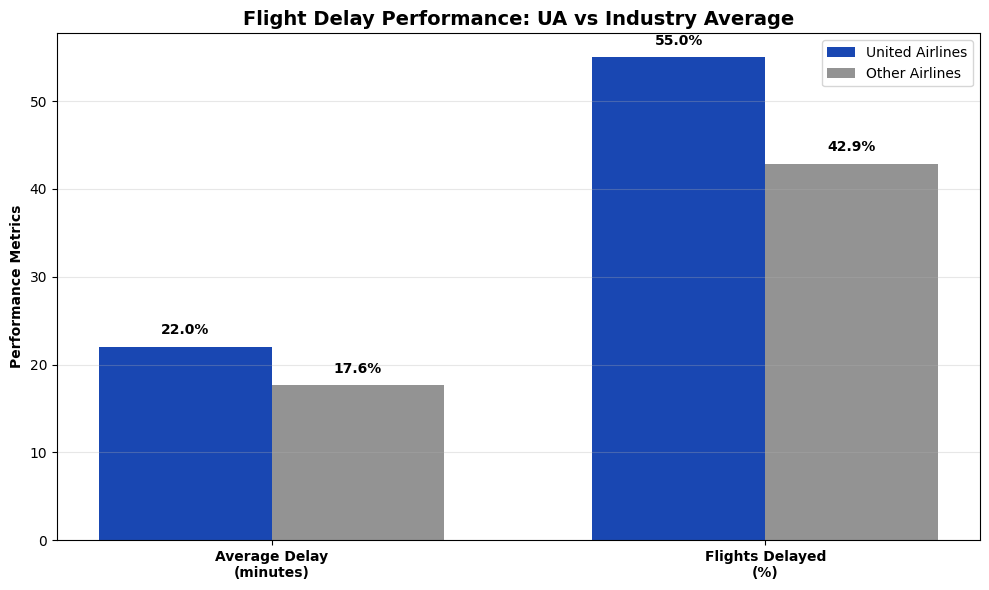

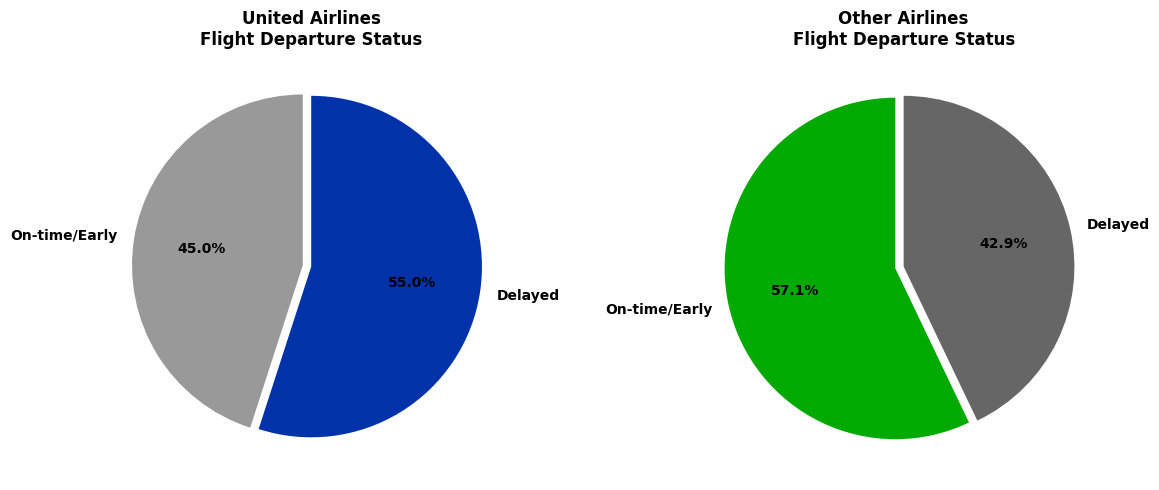


🎯 POWERPOINT SUMMARY:
   • United Airlines: 55.0% of flights delayed with 22.0 min average delay
   • Other Airlines: 42.9% of flights delayed with 17.6 min average delay
   • UA performs worse on both metrics



In [140]:
# =============================================
# EDA QUESTION 1: DELAY ANALYSIS - UA vs OTHERS
# =============================================

print("=== EDA QUESTION 1: AVERAGE DELAY & % FLIGHTS DELAYED - UA vs OTHERS ===")

# Add airline group segmentation
flight_level_clean['airline_group'] = flight_level_clean['company_id'].apply(
    lambda x: 'UA' if x == 'UA' else 'Other'
)

# Calculate key metrics for the deliverable
delay_stats = flight_level_clean.groupby('airline_group').agg({
    'departure_delay_cleaned': 'mean',
    'company_id': 'count'
}).round(2)

# Calculate percentage of flights delayed (>0 minutes)
delayed_flights = flight_level_clean[flight_level_clean['departure_delay_cleaned'] > 0]
delay_counts = delayed_flights.groupby('airline_group').size()
total_counts = flight_level_clean.groupby('airline_group').size()
percentage_delayed = (delay_counts / total_counts * 100).round(2)

print(f"📊 DELIVERABLE RESULTS - AVERAGE DELAY & % FLIGHTS DELAYED:")
for airline in ['UA', 'Other']:
    if airline in delay_stats.index:
        avg_delay = delay_stats.loc[airline, 'departure_delay_cleaned']
        total_flights = delay_stats.loc[airline, 'company_id']
        pct_delayed = percentage_delayed.get(airline, 0)

        print(f"   • {airline}:")
        print(f"     - Average delay: {avg_delay:.2f} minutes")
        print(f"     - Percentage of flights delayed: {pct_delayed:.2f}%")
        print(f"     - Total flights analyzed: {total_flights:,}")

# Overall comparison
ua_avg_delay = delay_stats.loc['UA', 'departure_delay_cleaned']
other_avg_delay = delay_stats.loc['Other', 'departure_delay_cleaned']
ua_pct_delayed = percentage_delayed.get('UA', 0)
other_pct_delayed = percentage_delayed.get('Other', 0)

print(f"\n📈 KEY COMPARISONS:")
print(f"   • Average Delay: UA has {ua_avg_delay - other_avg_delay:.2f} minutes {'longer' if ua_avg_delay > other_avg_delay else 'shorter'} delays")
print(f"   • % Flights Delayed: UA has {ua_pct_delayed - other_pct_delayed:.2f}% {'more' if ua_pct_delayed > other_pct_delayed else 'fewer'} delayed flights")

# VISUALIZATION 1: Key Metrics Comparison (Primary Chart)
plt.figure(figsize=(10, 6))

metrics = ['Average Delay\n(minutes)', 'Flights Delayed\n(%)']
ua_values = [ua_avg_delay, ua_pct_delayed]
other_values = [other_avg_delay, other_pct_delayed]

x = np.arange(len(metrics))
width = 0.35

bars1 = plt.bar(x - width/2, ua_values, width, label='United Airlines', color='#0033aa', alpha=0.9)
bars2 = plt.bar(x + width/2, other_values, width, label='Other Airlines', color='#666666', alpha=0.7)

plt.ylabel('Performance Metrics', fontweight='bold')
plt.title('Flight Delay Performance: UA vs Industry Average', fontsize=14, fontweight='bold')
plt.xticks(x, metrics, fontweight='bold')
plt.legend()

# Add value labels on bars
for bars, values in zip([bars1, bars2], [ua_values, other_values]):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + (max(ua_values + other_values)*0.02),
                f'{value:.1f}{"%" if "Delayed" in metrics[1] else ""}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# VISUALIZATION 2: Flight Status Distribution
plt.figure(figsize=(12, 5))

# Data for pie charts
ua_ontime = 100 - ua_pct_delayed
other_ontime = 100 - other_pct_delayed

# Create subplots
plt.subplot(1, 2, 1)
plt.pie([ua_ontime, ua_pct_delayed],
        labels=['On-time/Early', 'Delayed'],
        autopct='%1.1f%%',
        colors=['#999999', '#0033aa'],  # Lighter grey for on-time
        startangle=90,
        explode=(0.05, 0),
        textprops={'fontweight': 'bold', 'color': 'black'})  # White text
plt.title('United Airlines\nFlight Departure Status', fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie([other_ontime, other_pct_delayed],
        labels=['On-time/Early', 'Delayed'],
        autopct='%1.1f%%',
        colors=['#00aa00', '#666666'],
        startangle=90,
        explode=(0.05, 0),
        textprops={'fontweight': 'bold'})
plt.title('Other Airlines\nFlight Departure Status', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary for PowerPoint
print(f"\n🎯 POWERPOINT SUMMARY:")
print(f"   • United Airlines: {ua_pct_delayed:.1f}% of flights delayed with {ua_avg_delay:.1f} min average delay")
print(f"   • Other Airlines: {other_pct_delayed:.1f}% of flights delayed with {other_avg_delay:.1f} min average delay")
print(f"   • UA performs {'worse' if ua_pct_delayed > other_pct_delayed else 'better'} on both metrics")

print("\n" + "="*60)

=== EDA QUESTION 4: HOW DO PASSENGER LOADS COMPARE ACROSS FLIGHTS, AND DO HIGHER LOADS CORRELATE WITH OPERATIONAL DIFFICULTY? - UA vs OTHERS ===
📊 DATA MERGE STATUS:
   • Flights with passenger data: 8,071
   • Flights with special services data: 6,241
   • Final merged flights: 8,099

📈 ENHANCED PASSENGER LOAD ANALYSIS - OVERALL:
   • Average load factor: 0.935 (93.5%)
   • Median load factor: 1.000
   • Average passengers per flight: 128.5

🎯 ENHANCED SPECIAL SERVICES ANALYSIS - OVERALL:
   • Flights with special services: 6,259 (77.3%)
   • Total special service requests: 17,151.0
   • Average special services per passenger: 0.0181
   • Average PNRs with special services: 0.025 (2.5%)

📊 PASSENGER LOAD ANALYSIS - UA vs OTHERS:
   • UA:
     - Load factor: 0.943 (94.3%)
     - Avg passengers: 183.9
     - Special services per pax: 0.0157
     - PNRs with special services: 0.023 (2.3%)
   • Other:
     - Load factor: 0.924 (92.4%)
     - Avg passengers: 59.2
     - Special services pe

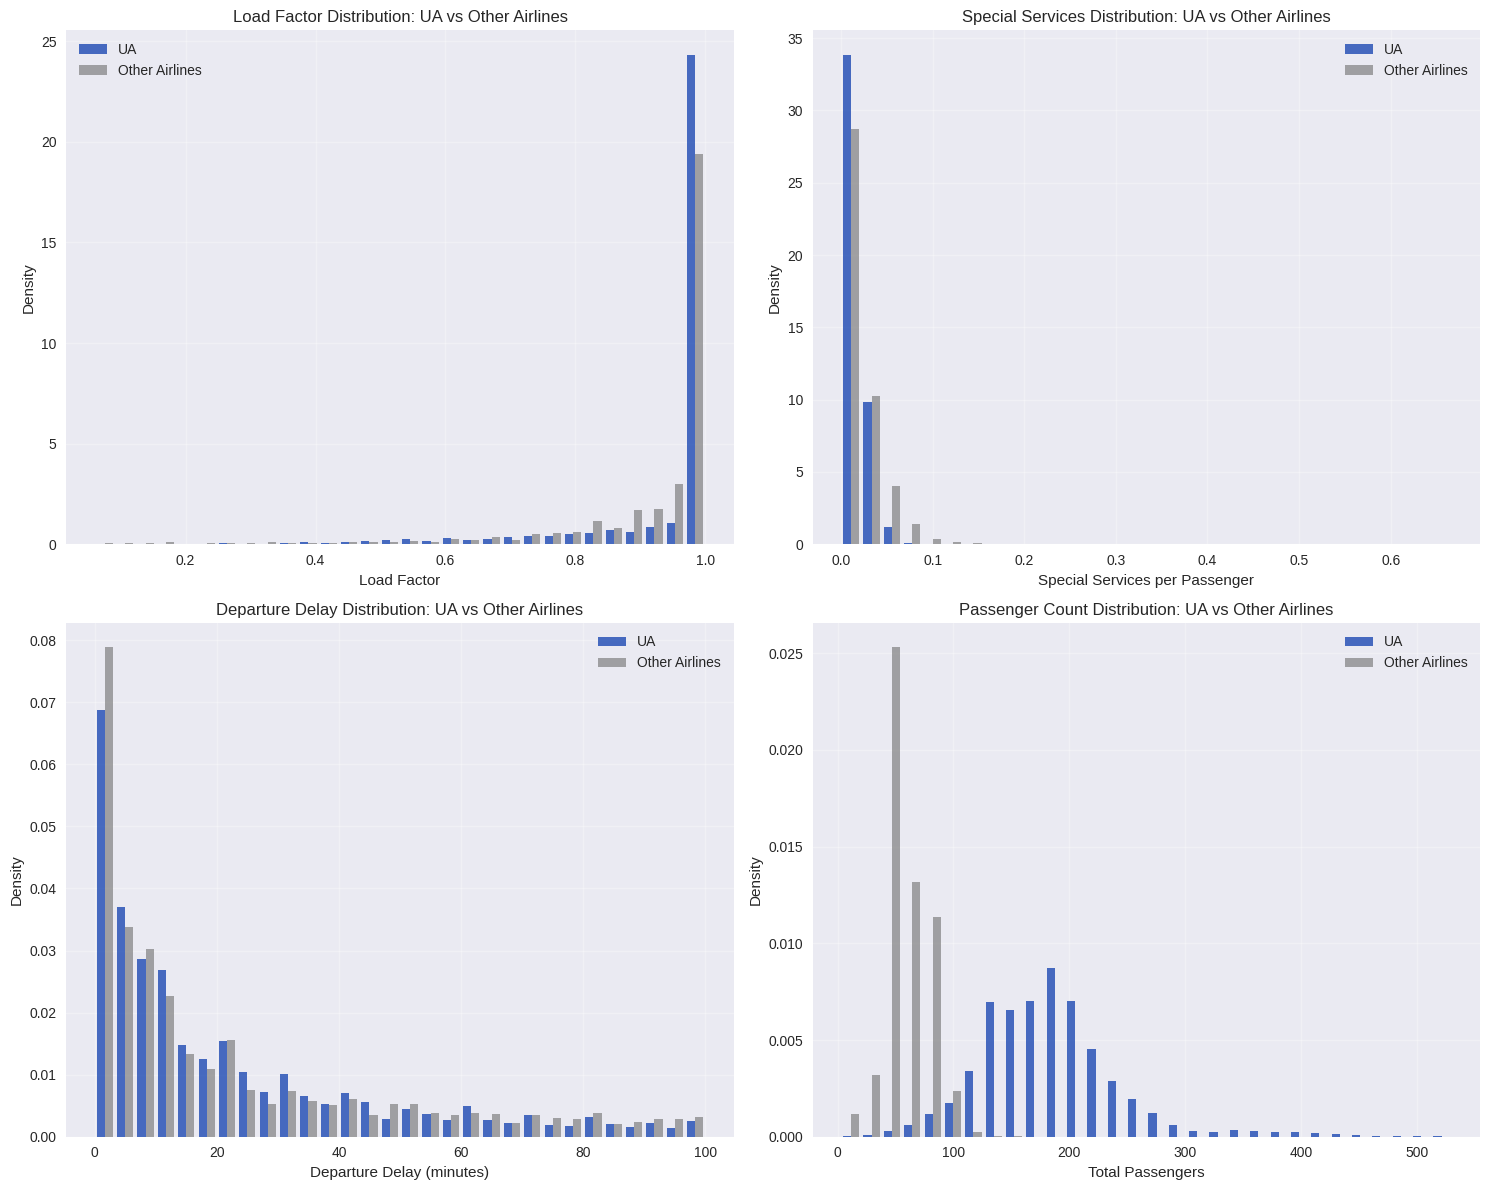

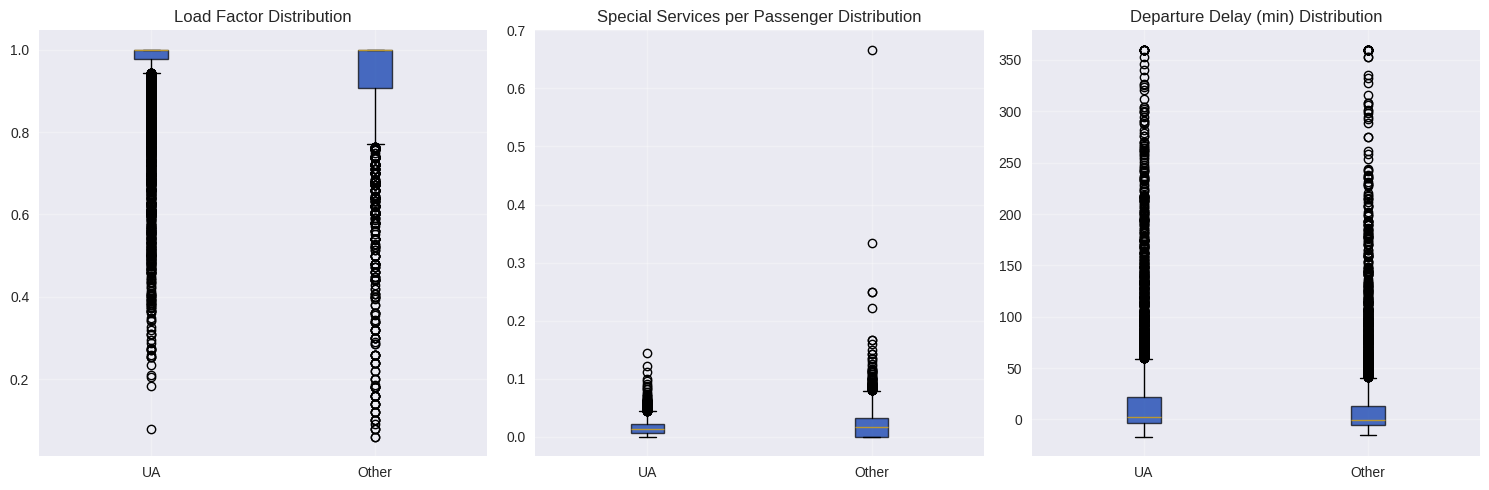

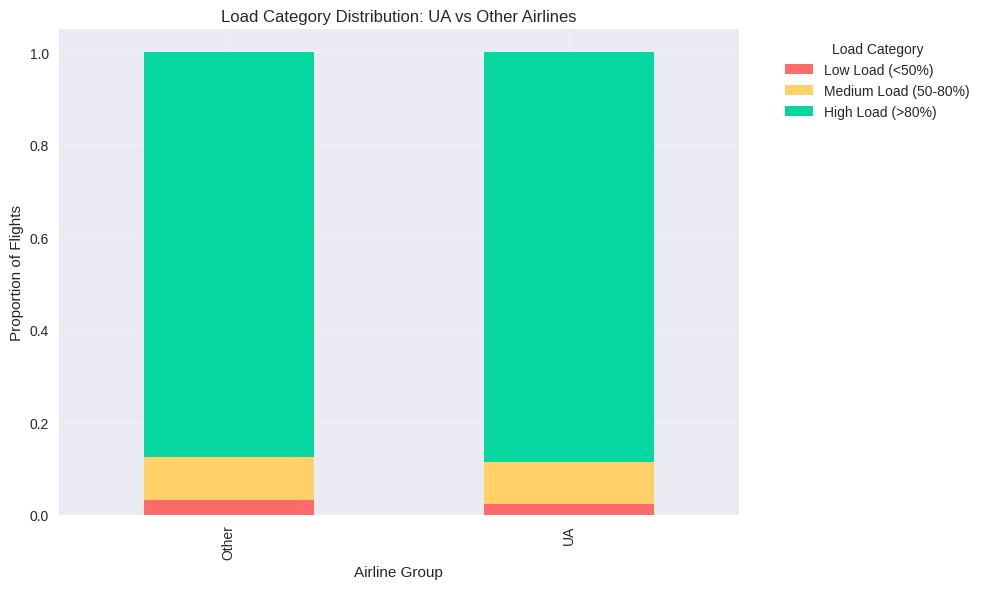

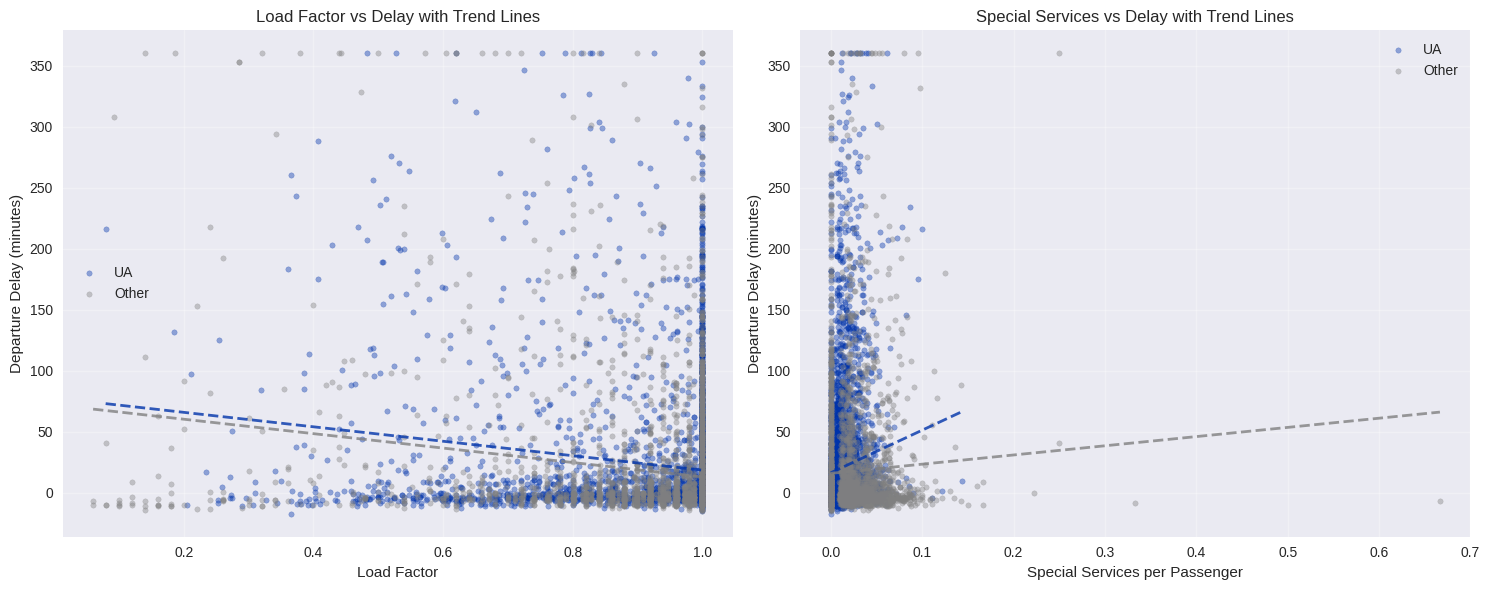

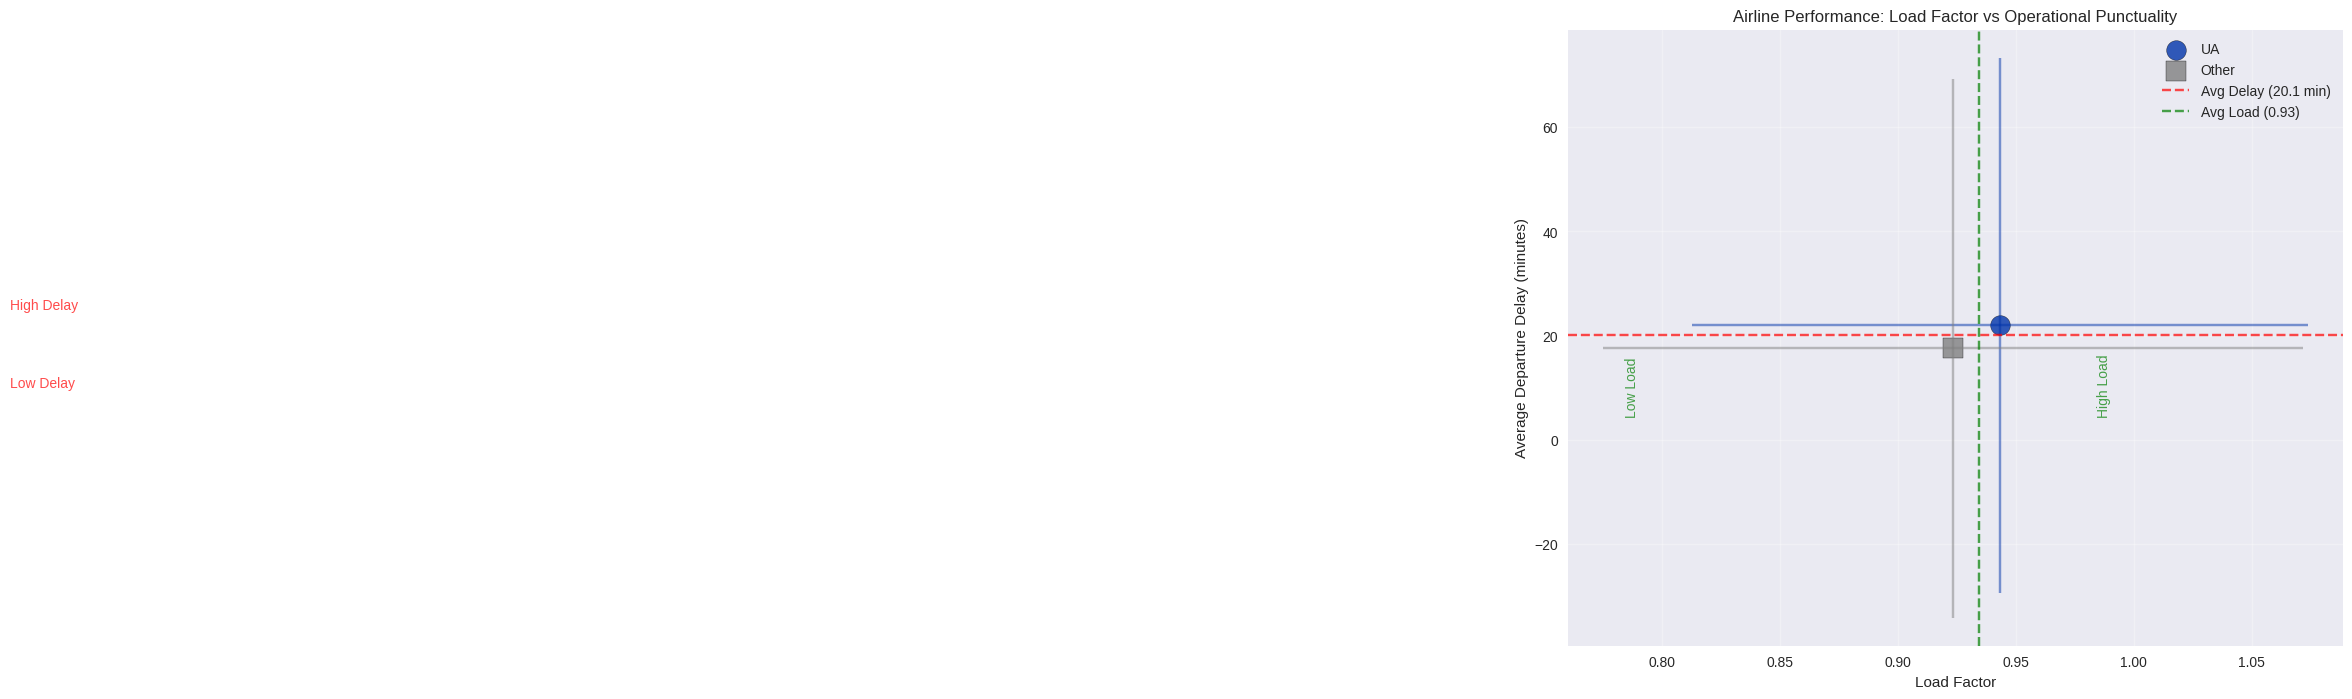

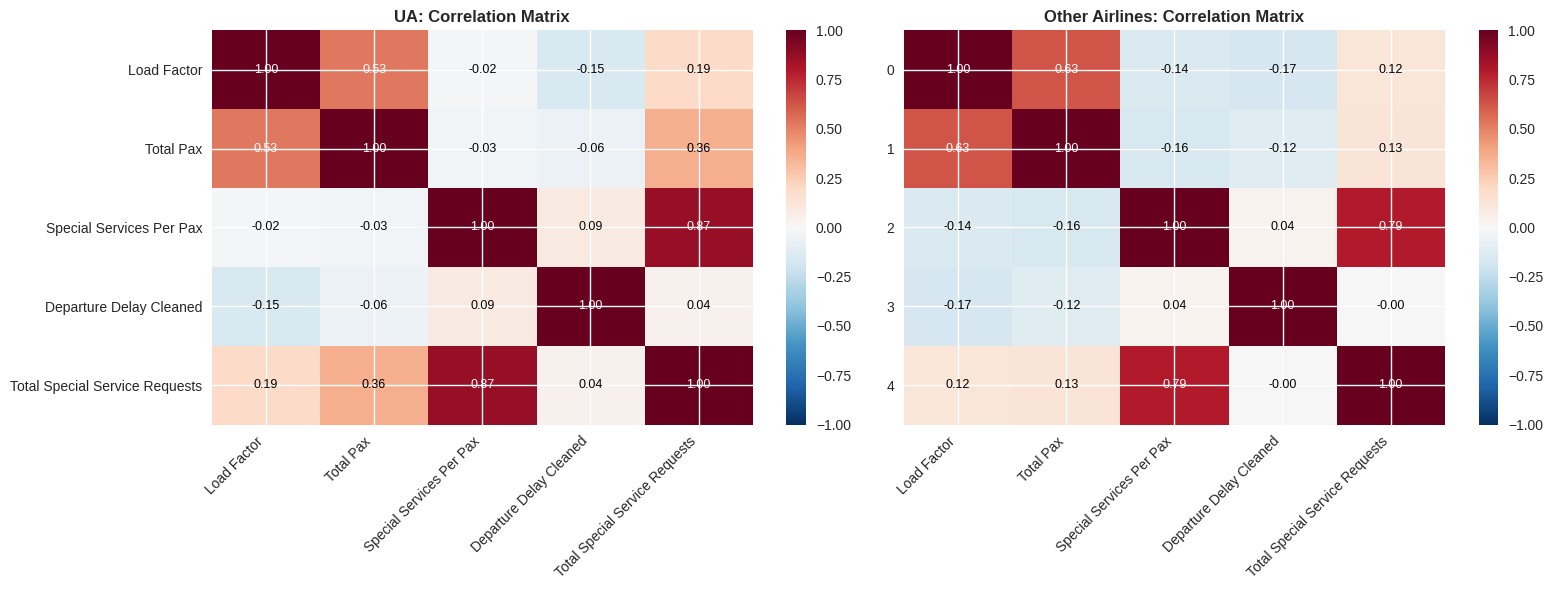

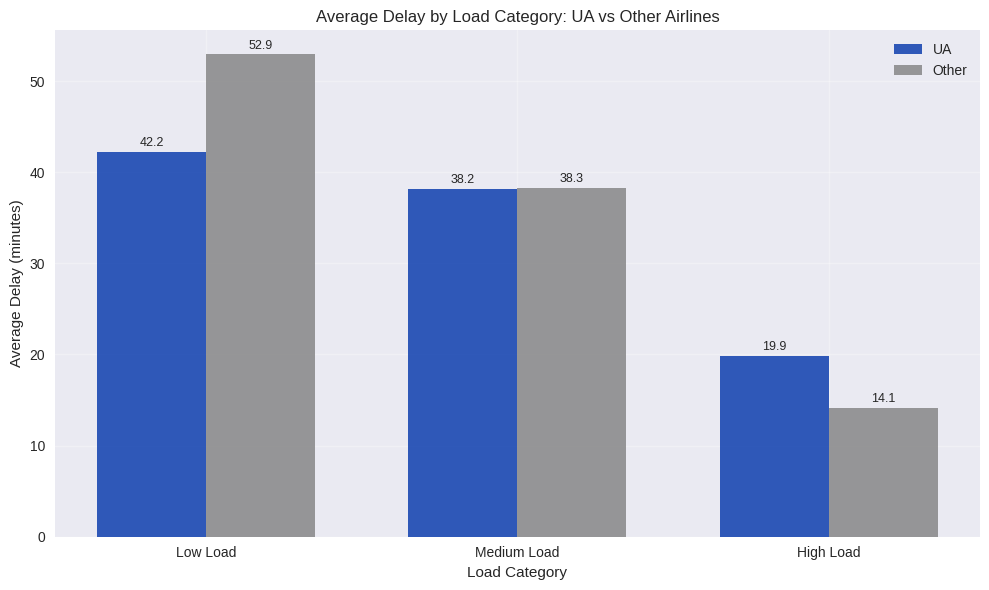


📈 VISUALIZATION SUMMARY:
   • Created 7 comprehensive graph sets
   • Color scheme: UA = #0033aa (blue), Other Airlines = grey
   • Visualizations include distributions, correlations, and performance comparisons



In [120]:
# =============================================
# EDA QUESTION 4: PASSENGER LOADS VS OPERATIONAL DIFFICULTY - UA vs OTHERS
# =============================================

print("=== EDA QUESTION 4: HOW DO PASSENGER LOADS COMPARE ACROSS FLIGHTS, AND DO HIGHER LOADS CORRELATE WITH OPERATIONAL DIFFICULTY? - UA vs OTHERS ===")

# Aggregate PNR data (passenger counts only)
pnr_aggregated_by_flight = pnr_data.groupby([
    'company_id', 'flight_number', 'scheduled_departure_date_local',
    'scheduled_departure_station_code', 'scheduled_arrival_station_code'
]).agg({
    'total_pax': 'sum',                    # Total passengers
    'record_locator': 'count'              # Total PNRs
}).rename(columns={'record_locator': 'total_pnrs'}).reset_index()

print(f"📊 DATA MERGE STATUS:")
print(f"   • Flights with passenger data: {len(pnr_aggregated_by_flight):,}")
print(f"   • Flights with special services data: {len(special_services_by_flight):,}")

# Merge all data: flight + passengers + special services
flight_with_all_data = flight_level_clean.merge(
    pnr_aggregated_by_flight,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local',
        'scheduled_departure_station_code', 'scheduled_arrival_station_code'],
    how='inner'
).merge(
    special_services_by_flight,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local',
        'scheduled_departure_station_code', 'scheduled_arrival_station_code'],
    how='left'
).fillna(0)  # Fill missing special services with 0

print(f"   • Final merged flights: {len(flight_with_all_data):,}")

# Calculate load factor
flight_with_all_data['load_factor'] = flight_with_all_data['total_pax'] / flight_with_all_data['total_seats']
flight_with_all_data['load_factor'] = flight_with_all_data['load_factor'].clip(upper=1.0)  # Cap at 100%

# Enhanced special services metrics
flight_with_all_data['special_services_per_pax'] = (
    flight_with_all_data['total_special_service_requests'] / flight_with_all_data['total_pax']
).replace([np.inf, -np.inf], 0).fillna(0)

flight_with_all_data['pnr_special_services_ratio'] = (
    flight_with_all_data['pnrs_with_special_services'] / flight_with_all_data['total_pnrs']
).replace([np.inf, -np.inf], 0).fillna(0)

# Analyze load distribution
print(f"\n📈 ENHANCED PASSENGER LOAD ANALYSIS - OVERALL:")
print(f"   • Average load factor: {flight_with_all_data['load_factor'].mean():.3f} ({flight_with_all_data['load_factor'].mean()*100:.1f}%)")
print(f"   • Median load factor: {flight_with_all_data['load_factor'].median():.3f}")
print(f"   • Average passengers per flight: {flight_with_all_data['total_pax'].mean():.1f}")

print(f"\n🎯 ENHANCED SPECIAL SERVICES ANALYSIS - OVERALL:")
print(f"   • Flights with special services: {(flight_with_all_data['total_special_service_requests'] > 0).sum():,} ({(flight_with_all_data['total_special_service_requests'] > 0).sum()/len(flight_with_all_data)*100:.1f}%)")
print(f"   • Total special service requests: {flight_with_all_data['total_special_service_requests'].sum():,}")
print(f"   • Average special services per passenger: {flight_with_all_data['special_services_per_pax'].mean():.4f}")
print(f"   • Average PNRs with special services: {flight_with_all_data['pnr_special_services_ratio'].mean():.3f} ({flight_with_all_data['pnr_special_services_ratio'].mean()*100:.1f}%)")

# UA vs Others comparison
print(f"\n📊 PASSENGER LOAD ANALYSIS - UA vs OTHERS:")

load_stats_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]

    load_stats_by_airline[airline] = {
        'avg_load_factor': airline_data['load_factor'].mean(),
        'median_load_factor': airline_data['load_factor'].median(),
        'avg_passengers': airline_data['total_pax'].mean(),
        'avg_special_services_per_pax': airline_data['special_services_per_pax'].mean(),
        'special_services_ratio': airline_data['pnr_special_services_ratio'].mean(),
        'flight_count': len(airline_data),
        'total_special_services': airline_data['total_special_service_requests'].sum()
    }

    print(f"   • {airline}:")
    print(f"     - Load factor: {load_stats_by_airline[airline]['avg_load_factor']:.3f} ({load_stats_by_airline[airline]['avg_load_factor']*100:.1f}%)")
    print(f"     - Avg passengers: {load_stats_by_airline[airline]['avg_passengers']:.1f}")
    print(f"     - Special services per pax: {load_stats_by_airline[airline]['avg_special_services_per_pax']:.4f}")
    print(f"     - PNRs with special services: {load_stats_by_airline[airline]['special_services_ratio']:.3f} ({load_stats_by_airline[airline]['special_services_ratio']*100:.1f}%)")

# Comparison summary
ua_load_factor = load_stats_by_airline['UA']['avg_load_factor']
other_load_factor = load_stats_by_airline['Other']['avg_load_factor']
load_difference = ua_load_factor - other_load_factor

ua_special_services = load_stats_by_airline['UA']['avg_special_services_per_pax']
other_special_services = load_stats_by_airline['Other']['avg_special_services_per_pax']
services_difference = ua_special_services - other_special_services

print(f"\n📈 COMPARISON SUMMARY:")
print(f"   • UA has {load_difference:.3f} ({load_difference*100:.1f} percentage points) {'higher' if load_difference > 0 else 'lower'} load factor than Other airlines")
print(f"   • UA has {services_difference:.4f} {'more' if services_difference > 0 else 'fewer'} special services per passenger than Other airlines")

# Create load categories
load_bins = [0, 0.5, 0.8, 1.0]  # Low, Medium, High load
load_labels = ['Low Load (<50%)', 'Medium Load (50-80%)', 'High Load (>80%)']
flight_with_all_data['load_category'] = pd.cut(flight_with_all_data['load_factor'], bins=load_bins, labels=load_labels)

print(f"\n🚀 LOAD CATEGORY vs DELAY ANALYSIS - OVERALL:")
for category in load_labels:
    category_data = flight_with_all_data[flight_with_all_data['load_category'] == category]
    if len(category_data) > 0:
        avg_delay = category_data['departure_delay_cleaned'].mean()
        avg_special_services = category_data['special_services_per_pax'].mean()
        print(f"   • {category}: {len(category_data):,} flights, {avg_delay:.1f} min avg delay, {avg_special_services:.4f} avg services/pax")

# Load category analysis by airline
print(f"\n🚀 LOAD CATEGORY vs DELAY ANALYSIS - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    print(f"   • {airline}:")
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    for category in load_labels:
        category_data = airline_data[airline_data['load_category'] == category]
        if len(category_data) > 0:
            avg_delay = category_data['departure_delay_cleaned'].mean()
            print(f"     - {category}: {len(category_data):,} flights, {avg_delay:.1f} min avg delay")

# Enhanced correlation analysis
print(f"\n📊 ENHANCED CORRELATION ANALYSIS - OVERALL:")
correlation_load_delay = flight_with_all_data['load_factor'].corr(flight_with_all_data['departure_delay_cleaned'])
correlation_special_services_delay = flight_with_all_data['special_services_per_pax'].corr(flight_with_all_data['departure_delay_cleaned'])

print(f"   • Correlation (Load Factor vs Delay): {correlation_load_delay:.3f}")
print(f"   • Correlation (Special Services/Pax vs Delay): {correlation_special_services_delay:.3f}")

# Correlation analysis by airline
print(f"   • Correlation Analysis by Airline:")
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    corr_load = airline_data['load_factor'].corr(airline_data['departure_delay_cleaned'])
    corr_services = airline_data['special_services_per_pax'].corr(airline_data['departure_delay_cleaned'])
    print(f"     - {airline}: Load-Delay r = {corr_load:.3f}, Services-Delay r = {corr_services:.3f}")

# Analyze high special services flights
high_special_services = flight_with_all_data[flight_with_all_data['special_services_per_pax'] > flight_with_all_data['special_services_per_pax'].quantile(0.75)]
low_special_services = flight_with_all_data[flight_with_all_data['special_services_per_pax'] <= flight_with_all_data['special_services_per_pax'].quantile(0.75)]

if len(high_special_services) > 0 and len(low_special_services) > 0:
    print(f"\n🚨 SPECIAL SERVICES IMPACT - OVERALL:")
    print(f"   • High special services flights delay: {high_special_services['departure_delay_cleaned'].mean():.1f} minutes")
    print(f"   • Low special services flights delay: {low_special_services['departure_delay_cleaned'].mean():.1f} minutes")
    print(f"   • Difference: {high_special_services['departure_delay_cleaned'].mean() - low_special_services['departure_delay_cleaned'].mean():.1f} minutes")

# Special services impact by airline
print(f"\n🚨 SPECIAL SERVICES IMPACT - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    high_services = airline_data[airline_data['special_services_per_pax'] > airline_data['special_services_per_pax'].quantile(0.75)]
    low_services = airline_data[airline_data['special_services_per_pax'] <= airline_data['special_services_per_pax'].quantile(0.75)]

    if len(high_services) > 0 and len(low_services) > 0:
        delay_diff = high_services['departure_delay_cleaned'].mean() - low_services['departure_delay_cleaned'].mean()
        print(f"   • {airline}: High vs Low services delay difference: {delay_diff:.1f} minutes")

# =============================================
# ENHANCED VISUALIZATIONS WITH UA (#0033aa) AND OTHERS (grey)
# =============================================

print(f"\n📊 CREATING ENHANCED VISUALIZATIONS...")

# Create separate datasets for easier plotting
ua_data = flight_with_all_data[flight_with_all_data['airline_group'] == 'UA']
other_data = flight_with_all_data[flight_with_all_data['airline_group'] == 'Other']

# Set up the color scheme
ua_color = '#0033aa'
other_color = 'grey'

# GRAPH SET 1: Enhanced Distribution Plots
fig1, axes1 = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1.1: Load Factor Distribution - Side by Side
axes1[0,0].hist([ua_data['load_factor'], other_data['load_factor']],
               bins=30, alpha=0.7, color=[ua_color, other_color],
               label=['UA', 'Other Airlines'], density=True)
axes1[0,0].set_xlabel('Load Factor')
axes1[0,0].set_ylabel('Density')
axes1[0,0].set_title('Load Factor Distribution: UA vs Other Airlines')
axes1[0,0].legend()
axes1[0,0].grid(True, alpha=0.3)

# Plot 1.2: Special Services Distribution
axes1[0,1].hist([ua_data['special_services_per_pax'], other_data['special_services_per_pax']],
               bins=30, alpha=0.7, color=[ua_color, other_color],
               label=['UA', 'Other Airlines'], density=True)
axes1[0,1].set_xlabel('Special Services per Passenger')
axes1[0,1].set_ylabel('Density')
axes1[0,1].set_title('Special Services Distribution: UA vs Other Airlines')
axes1[0,1].legend()
axes1[0,1].grid(True, alpha=0.3)

# Plot 1.3: Delay Distribution
axes1[1,0].hist([ua_data['departure_delay_cleaned'], other_data['departure_delay_cleaned']],
               bins=30, alpha=0.7, color=[ua_color, other_color],
               label=['UA', 'Other Airlines'], density=True, range=(0, 100))
axes1[1,0].set_xlabel('Departure Delay (minutes)')
axes1[1,0].set_ylabel('Density')
axes1[1,0].set_title('Departure Delay Distribution: UA vs Other Airlines')
axes1[1,0].legend()
axes1[1,0].grid(True, alpha=0.3)

# Plot 1.4: Passenger Count Distribution
axes1[1,1].hist([ua_data['total_pax'], other_data['total_pax']],
               bins=30, alpha=0.7, color=[ua_color, other_color],
               label=['UA', 'Other Airlines'], density=True)
axes1[1,1].set_xlabel('Total Passengers')
axes1[1,1].set_ylabel('Density')
axes1[1,1].set_title('Passenger Count Distribution: UA vs Other Airlines')
axes1[1,1].legend()
axes1[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# GRAPH SET 2: Box Plot Comparison
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['load_factor', 'special_services_per_pax', 'departure_delay_cleaned']
titles = ['Load Factor', 'Special Services per Passenger', 'Departure Delay (min)']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    data = [flight_with_all_data[flight_with_all_data['airline_group'] == airline][metric]
            for airline in ['UA', 'Other']]
    boxes = axes2[i].boxplot(data, labels=['UA', 'Other'],
                           patch_artist=True,
                           boxprops=dict(facecolor=ua_color, alpha=0.7))
    axes2[i].set_title(f'{title} Distribution')
    axes2[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# GRAPH SET 3: Stacked Bar Chart - Load Categories
fig3, ax3 = plt.subplots(figsize=(10, 6))

load_category_summary = pd.crosstab(
    flight_with_all_data['airline_group'],
    flight_with_all_data['load_category'],
    normalize='index'
)

load_category_summary.plot(kind='bar', stacked=True,
                         color=['#ff6b6b', '#ffd166', '#06d6a0'],
                         ax=ax3)
ax3.set_title('Load Category Distribution: UA vs Other Airlines')
ax3.set_xlabel('Airline Group')
ax3.set_ylabel('Proportion of Flights')
ax3.legend(title='Load Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# GRAPH SET 4: Enhanced Scatter Plots with Trend Lines
fig4, axes4 = plt.subplots(1, 2, figsize=(15, 6))

# Plot 4.1: Load Factor vs Delay with trend lines
for airline, color in [('UA', ua_color), ('Other', other_color)]:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    axes4[0].scatter(airline_data['load_factor'], airline_data['departure_delay_cleaned'],
                   alpha=0.4, color=color, label=airline, s=15)

    # Add trend line
    if len(airline_data) > 1:
        z = np.polyfit(airline_data['load_factor'], airline_data['departure_delay_cleaned'], 1)
        p = np.poly1d(z)
        x_range = np.linspace(airline_data['load_factor'].min(), airline_data['load_factor'].max(), 100)
        axes4[0].plot(x_range, p(x_range), color=color, linewidth=2, linestyle='--', alpha=0.8)

axes4[0].set_xlabel('Load Factor')
axes4[0].set_ylabel('Departure Delay (minutes)')
axes4[0].set_title('Load Factor vs Delay with Trend Lines')
axes4[0].legend()
axes4[0].grid(True, alpha=0.3)

# Plot 4.2: Special Services vs Delay with trend lines
for airline, color in [('UA', ua_color), ('Other', other_color)]:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    axes4[1].scatter(airline_data['special_services_per_pax'],
                   airline_data['departure_delay_cleaned'],
                   alpha=0.4, color=color, label=airline, s=15)

    # Add trend line
    if len(airline_data) > 1:
        z = np.polyfit(airline_data['special_services_per_pax'],
                      airline_data['departure_delay_cleaned'], 1)
        p = np.poly1d(z)
        x_range = np.linspace(airline_data['special_services_per_pax'].min(),
                             airline_data['special_services_per_pax'].max(), 100)
        axes4[1].plot(x_range, p(x_range), color=color, linewidth=2, linestyle='--', alpha=0.8)

axes4[1].set_xlabel('Special Services per Passenger')
axes4[1].set_ylabel('Departure Delay (minutes)')
axes4[1].set_title('Special Services vs Delay with Trend Lines')
axes4[1].legend()
axes4[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# GRAPH SET 5: Performance Quadrant Analysis
fig5, ax5 = plt.subplots(figsize=(10, 8))

for airline, color, marker in [('UA', ua_color, 'o'), ('Other', other_color, 's')]:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]

    ax5.scatter(airline_data['load_factor'].mean(),
               airline_data['departure_delay_cleaned'].mean(),
               color=color, s=200, marker=marker, label=airline, alpha=0.8, edgecolors='black')

    # Add error bars for variability
    ax5.errorbar(airline_data['load_factor'].mean(),
                airline_data['departure_delay_cleaned'].mean(),
                xerr=airline_data['load_factor'].std(),
                yerr=airline_data['departure_delay_cleaned'].std(),
                color=color, alpha=0.5, capsize=5)

# Add quadrant lines
avg_delay = flight_with_all_data['departure_delay_cleaned'].mean()
avg_load = flight_with_all_data['load_factor'].mean()

ax5.axhline(y=avg_delay, color='red', linestyle='--', alpha=0.7, label=f'Avg Delay ({avg_delay:.1f} min)')
ax5.axvline(x=avg_load, color='green', linestyle='--', alpha=0.7, label=f'Avg Load ({avg_load:.2f})')

# Add quadrant labels
ax5.text(0.1, avg_delay + 5, 'High Delay', fontsize=10, color='red', alpha=0.7)
ax5.text(0.1, avg_delay - 10, 'Low Delay', fontsize=10, color='red', alpha=0.7)
ax5.text(avg_load + 0.05, 5, 'High Load', fontsize=10, color='green', alpha=0.7, rotation=90)
ax5.text(avg_load - 0.15, 5, 'Low Load', fontsize=10, color='green', alpha=0.7, rotation=90)

ax5.set_xlabel('Load Factor')
ax5.set_ylabel('Average Departure Delay (minutes)')
ax5.set_title('Airline Performance: Load Factor vs Operational Punctuality')
ax5.legend()
ax5.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# GRAPH SET 6: Correlation Heatmap by Airline
fig6, (ax6_ua, ax6_other) = plt.subplots(1, 2, figsize=(16, 6))

# Select key metrics for correlation
metrics_corr = ['load_factor', 'total_pax', 'special_services_per_pax',
                'departure_delay_cleaned', 'total_special_service_requests']

# UA correlation
ua_corr = ua_data[metrics_corr].corr()
im_ua = ax6_ua.imshow(ua_corr, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
ax6_ua.set_title('UA: Correlation Matrix', fontweight='bold')
ax6_ua.set_xticks(range(len(metrics_corr)))
ax6_ua.set_yticks(range(len(metrics_corr)))
ax6_ua.set_xticklabels([m.replace('_', ' ').title() for m in metrics_corr], rotation=45, ha='right')
ax6_ua.set_yticklabels([m.replace('_', ' ').title() for m in metrics_corr])

# Add correlation values to UA heatmap
for i in range(len(metrics_corr)):
    for j in range(len(metrics_corr)):
        text = ax6_ua.text(j, i, f'{ua_corr.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black" if abs(ua_corr.iloc[i, j]) < 0.5 else "white",
                          fontsize=9)

# Other airlines correlation
other_corr = other_data[metrics_corr].corr()
im_other = ax6_other.imshow(other_corr, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
ax6_other.set_title('Other Airlines: Correlation Matrix', fontweight='bold')
ax6_other.set_xticks(range(len(metrics_corr)))
ax6_other.set_yticks(range(len(metrics_corr)))
ax6_other.set_xticklabels([m.replace('_', ' ').title() for m in metrics_corr], rotation=45, ha='right')

# Add correlation values to Other heatmap
for i in range(len(metrics_corr)):
    for j in range(len(metrics_corr)):
        text = ax6_other.text(j, i, f'{other_corr.iloc[i, j]:.2f}',
                            ha="center", va="center", color="black" if abs(other_corr.iloc[i, j]) < 0.5 else "white",
                            fontsize=9)

plt.colorbar(im_ua, ax=ax6_ua)
plt.colorbar(im_other, ax=ax6_other)
plt.tight_layout()
plt.show()

# GRAPH SET 7: Delay by Load Category - Enhanced Version
fig7, ax7 = plt.subplots(figsize=(10, 6))

load_delay_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    load_delay_by_airline[airline] = airline_data.groupby('load_category')['departure_delay_cleaned'].mean()

x = np.arange(len(load_labels))
width = 0.35

bars1 = ax7.bar(x - width/2, load_delay_by_airline['UA'], width, label='UA', color=ua_color, alpha=0.8)
bars2 = ax7.bar(x + width/2, load_delay_by_airline['Other'], width, label='Other', color=other_color, alpha=0.8)

ax7.set_xlabel('Load Category')
ax7.set_ylabel('Average Delay (minutes)')
ax7.set_title('Average Delay by Load Category: UA vs Other Airlines')
ax7.set_xticks(x)
ax7.set_xticklabels([label.split('(')[0].strip() for label in load_labels])
ax7.legend()
ax7.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n📈 VISUALIZATION SUMMARY:")
print(f"   • Created 7 comprehensive graph sets")
print(f"   • Color scheme: UA = #0033aa (blue), Other Airlines = grey")
print(f"   • Visualizations include distributions, correlations, and performance comparisons")

print("\n" + "="*80)

=== EDA QUESTION 5: ARE HIGH SPECIAL SERVICE REQUEST FLIGHTS ALSO HIGH-DELAY AFTER CONTROLLING FOR LOAD? - UA vs OTHERS ===
📊 ENHANCED SPECIAL SERVICES ANALYSIS - OVERALL:
   • Low Special (<1%): 1,126 flights (13.9%), 18.8 min delay, 0.007 avg services/pax
   • Medium Special (1-3%): 3,649 flights (45.1%), 19.5 min delay, 0.018 avg services/pax
   • High Special (>3%): 1,484 flights (18.3%), 24.8 min delay, 0.049 avg services/pax

📊 SPECIAL SERVICES ANALYSIS - UA vs OTHERS:
   • UA:
     - Avg special services per pax: 0.0157
     - PNRs with special services: 0.023 (2.3%)
     - High special flights: 12.3%
     - Low special flights: 24.7%
   • Other:
     - Avg special services per pax: 0.0211
     - PNRs with special services: 0.027 (2.7%)
     - High special flights: 25.8%
     - Low special flights: 0.4%

📈 COMPARISON SUMMARY:
   • UA has -0.0053 fewer special services per passenger than Other airlines
   • UA special services intensity: lower than industry average

🎯 CONTROLLING

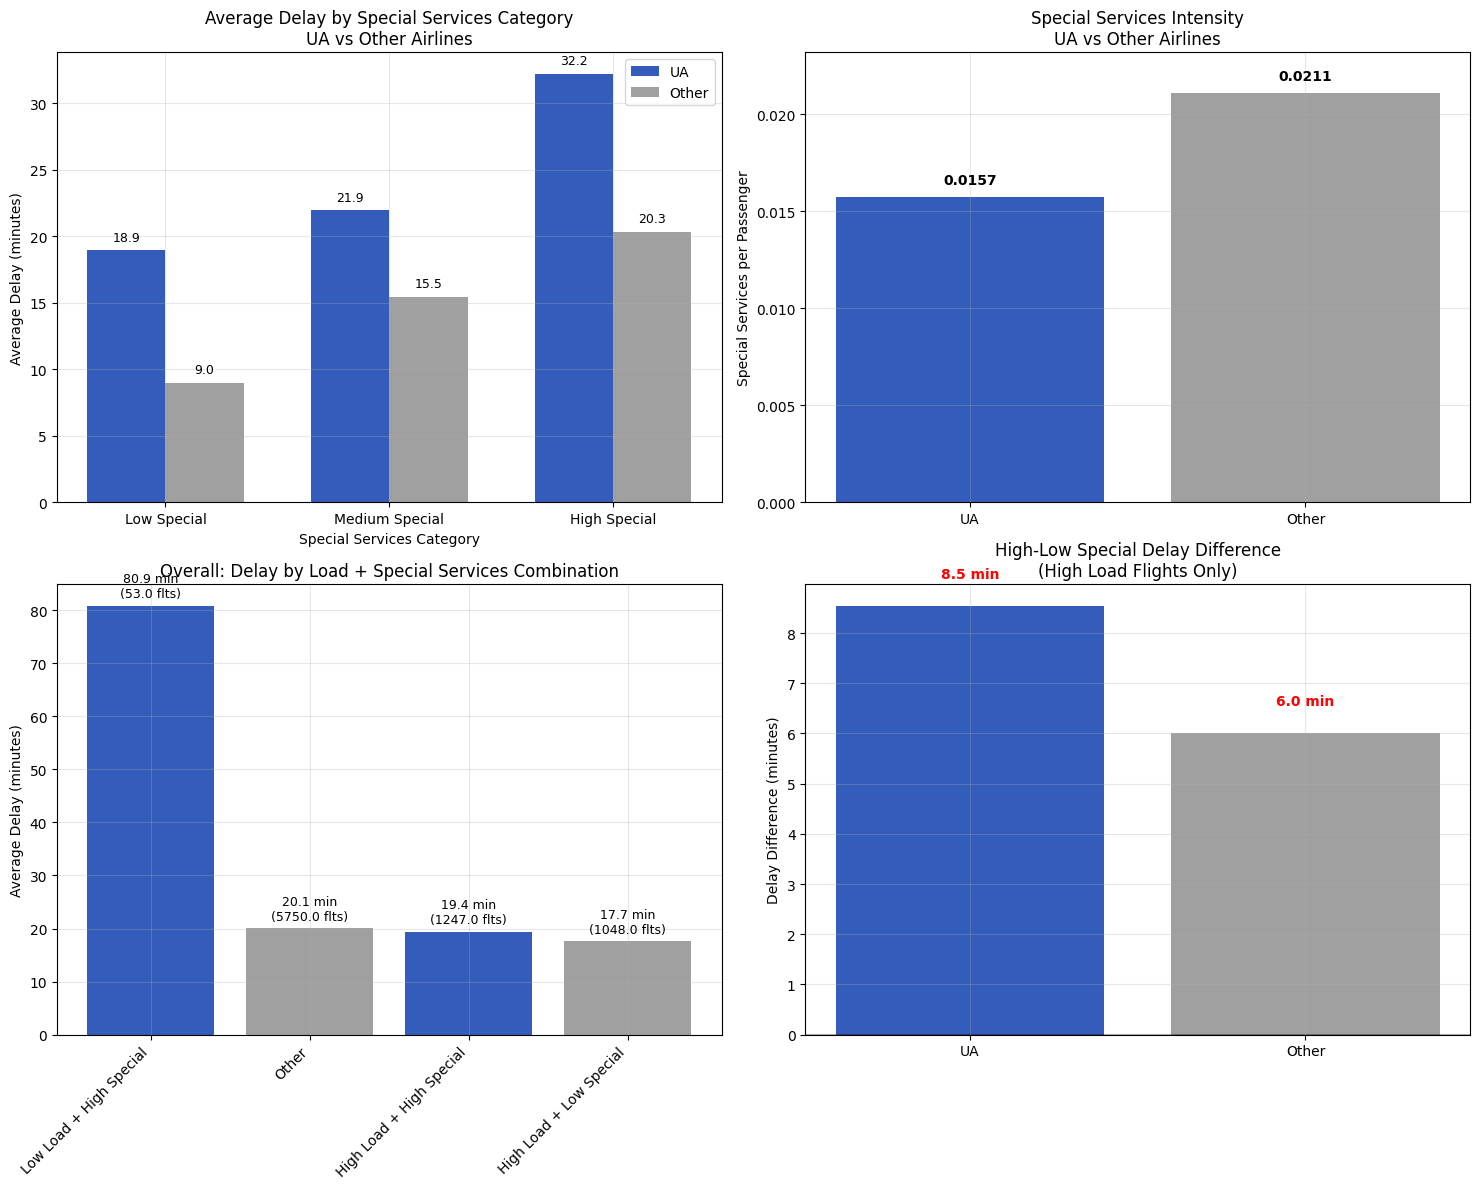


=== EDA QUESTION 5 COMPLETE ===


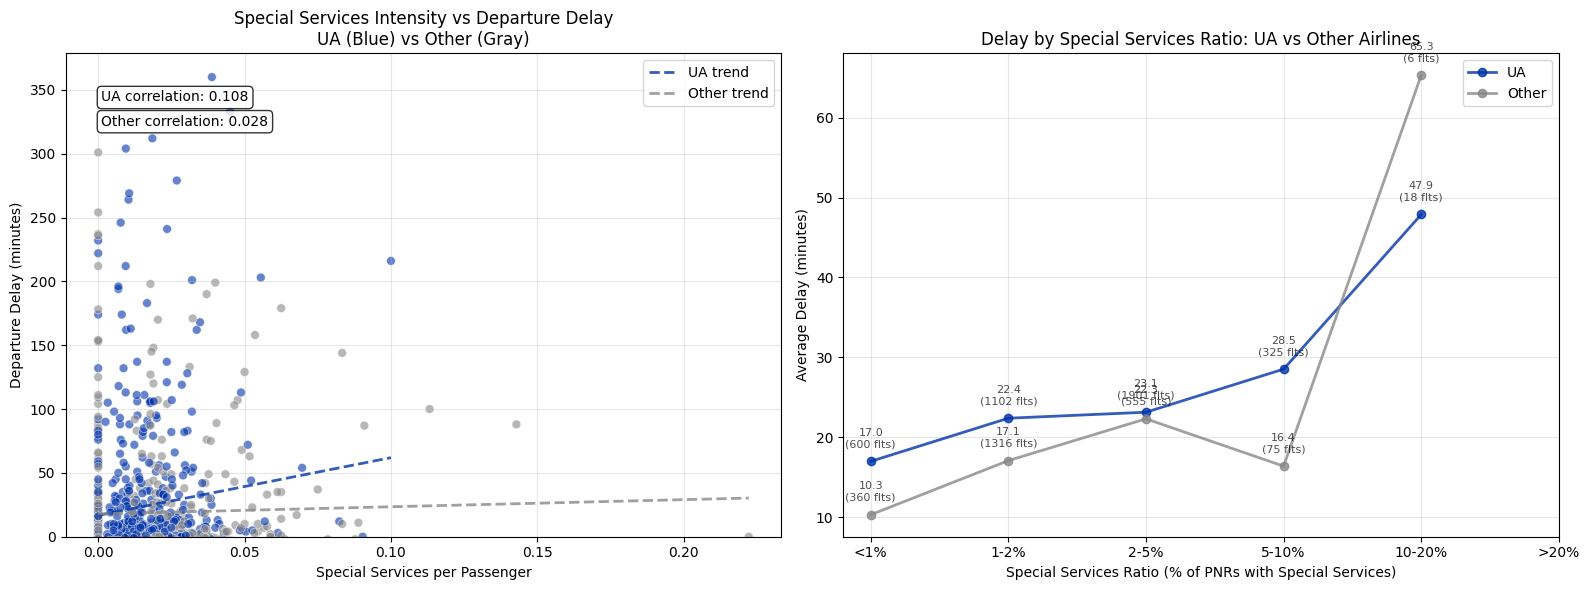

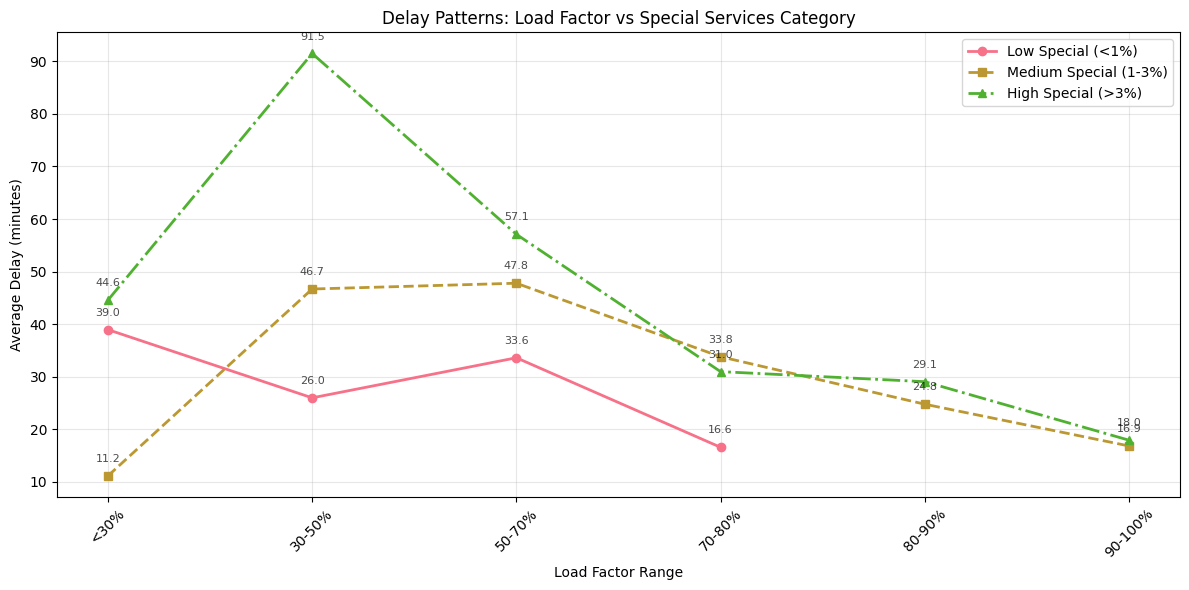


📊 ADDITIONAL SCATTER PLOT INSIGHTS:
   • Correlation between special services and delay:
     - UA: 0.086 (positive relationship)
     - Other: 0.038 (positive relationship)

📈 LINE CHART INSIGHTS:
   • Special Services Ratio analysis shows how delay changes as more PNRs require special services
   • Load Factor analysis shows how special services impact varies under different operational loads



In [135]:
# =============================================
# EDA QUESTION 5: SPECIAL SERVICES VS DELAY - UA vs OTHERS
# =============================================

print("=== EDA QUESTION 5: ARE HIGH SPECIAL SERVICE REQUEST FLIGHTS ALSO HIGH-DELAY AFTER CONTROLLING FOR LOAD? - UA vs OTHERS ===")

# Use the ENHANCED special services metrics from flight_with_all_data
# Create special services categories based on SERVICES PER PASSENGER (more accurate)
special_bins = [0, 0.01, 0.03, 1.0]  # Low, Medium, High special services PER PASSENGER
special_labels = ['Low Special (<1%)', 'Medium Special (1-3%)', 'High Special (>3%)']
flight_with_all_data['special_category'] = pd.cut(flight_with_all_data['special_services_per_pax'],
                                                   bins=special_bins, labels=special_labels)

print("📊 ENHANCED SPECIAL SERVICES ANALYSIS - OVERALL:")
special_summary = flight_with_all_data['special_category'].value_counts().sort_index()
for category, count in special_summary.items():
    percentage = (count / len(flight_with_all_data)) * 100
    avg_delay = flight_with_all_data[flight_with_all_data['special_category'] == category]['departure_delay_cleaned'].mean()
    avg_services = flight_with_all_data[flight_with_all_data['special_category'] == category]['special_services_per_pax'].mean()
    print(f"   • {category}: {count:,} flights ({percentage:.1f}%), {avg_delay:.1f} min delay, {avg_services:.3f} avg services/pax")

# UA vs Others comparison for special services
print(f"\n📊 SPECIAL SERVICES ANALYSIS - UA vs OTHERS:")

special_stats_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]

    special_stats_by_airline[airline] = {
        'avg_special_services_per_pax': airline_data['special_services_per_pax'].mean(),
        'special_services_ratio': airline_data['pnr_special_services_ratio'].mean(),
        'high_special_pct': (airline_data['special_category'] == 'High Special (>3%)').mean() * 100,
        'low_special_pct': (airline_data['special_category'] == 'Low Special (<1%)').mean() * 100,
        'flight_count': len(airline_data)
    }

    print(f"   • {airline}:")
    print(f"     - Avg special services per pax: {special_stats_by_airline[airline]['avg_special_services_per_pax']:.4f}")
    print(f"     - PNRs with special services: {special_stats_by_airline[airline]['special_services_ratio']:.3f} ({special_stats_by_airline[airline]['special_services_ratio']*100:.1f}%)")
    print(f"     - High special flights: {special_stats_by_airline[airline]['high_special_pct']:.1f}%")
    print(f"     - Low special flights: {special_stats_by_airline[airline]['low_special_pct']:.1f}%")

# Comparison summary
ua_special_intensity = special_stats_by_airline['UA']['avg_special_services_per_pax']
other_special_intensity = special_stats_by_airline['Other']['avg_special_services_per_pax']
special_difference = ua_special_intensity - other_special_intensity

print(f"\n📈 COMPARISON SUMMARY:")
print(f"   • UA has {special_difference:.4f} {'more' if special_difference > 0 else 'fewer'} special services per passenger than Other airlines")
print(f"   • UA special services intensity: {'higher' if special_difference > 0 else 'lower'} than industry average")

# Control for load by analyzing within each load category
print(f"\n🎯 CONTROLLING FOR LOAD FACTOR - OVERALL:")

# Analyze special services impact within each load category
for load_cat in load_labels:
    load_subset = flight_with_all_data[flight_with_all_data['load_category'] == load_cat]
    if len(load_subset) > 0:
        print(f"\n   {load_cat} Flights:")
        for special_cat in special_labels:
            special_subset = load_subset[load_subset['special_category'] == special_cat]
            if len(special_subset) > 0:
                avg_delay = special_subset['departure_delay_cleaned'].mean()
                avg_services = special_subset['special_services_per_pax'].mean()
                count = len(special_subset)
                print(f"     • {special_cat}: {count} flights, {avg_delay:.1f} min delay, {avg_services:.3f} services/pax")

# Load + Special services analysis by airline
print(f"\n🎯 LOAD + SPECIAL SERVICES ANALYSIS - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    print(f"\n   {airline}:")
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]

    for load_cat in load_labels:
        load_subset = airline_data[airline_data['load_category'] == load_cat]
        if len(load_subset) > 0:
            high_special = load_subset[load_subset['special_category'] == 'High Special (>3%)']
            low_special = load_subset[load_subset['special_category'] == 'Low Special (<1%)']

            if len(high_special) > 0 and len(low_special) > 0:
                delay_diff = high_special['departure_delay_cleaned'].mean() - low_special['departure_delay_cleaned'].mean()
                print(f"     • {load_cat}: High-Low Special delay difference: {delay_diff:.1f} min")

# Statistical test: Compare high vs low special services within same load ranges
print(f"\n📈 STATISTICAL COMPARISON (High vs Low Special Services) - OVERALL:")

# Focus on high-load flights since they're most operationally sensitive
high_load_flights = flight_with_all_data[flight_with_all_data['load_category'] == 'High Load (>80%)']
high_special = high_load_flights[high_load_flights['special_category'] == 'High Special (>3%)']
low_special = high_load_flights[high_load_flights['special_category'] == 'Low Special (<1%)']

if len(high_special) > 0 and len(low_special) > 0:
    delay_diff = high_special['departure_delay_cleaned'].mean() - low_special['departure_delay_cleaned'].mean()
    services_diff = high_special['special_services_per_pax'].mean() - low_special['special_services_per_pax'].mean()
    print(f"   • High Load + High Special: {len(high_special):,} flights")
    print(f"     - Delay: {high_special['departure_delay_cleaned'].mean():.1f} min")
    print(f"     - Services: {high_special['special_services_per_pax'].mean():.3f} per pax")
    print(f"   • High Load + Low Special: {len(low_special):,} flights")
    print(f"     - Delay: {low_special['departure_delay_cleaned'].mean():.1f} min")
    print(f"     - Services: {low_special['special_services_per_pax'].mean():.3f} per pax")
    print(f"   • Difference: {delay_diff:.1f} minutes delay, {services_diff:.3f} services/pax")

# Statistical comparison by airline
print(f"\n📈 STATISTICAL COMPARISON - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    print(f"   • {airline}:")
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    high_load_airline = airline_data[airline_data['load_category'] == 'High Load (>80%)']

    if len(high_load_airline) > 0:
        high_special_airline = high_load_airline[high_load_airline['special_category'] == 'High Special (>3%)']
        low_special_airline = high_load_airline[high_load_airline['special_category'] == 'Low Special (<1%)']

        if len(high_special_airline) > 0 and len(low_special_airline) > 0:
            delay_diff = high_special_airline['departure_delay_cleaned'].mean() - low_special_airline['departure_delay_cleaned'].mean()
            print(f"     - High-Low Special delay difference: {delay_diff:.1f} min")

# Multivariate analysis: Load + Special Services impact
print(f"\n🔍 MULTIVARIATE ANALYSIS - OVERALL:")

# Create combined categories using ENHANCED metrics
conditions = [
    (flight_with_all_data['load_category'] == 'High Load (>80%)') &
    (flight_with_all_data['special_category'] == 'High Special (>3%)'),
    (flight_with_all_data['load_category'] == 'High Load (>80%)') &
    (flight_with_all_data['special_category'] == 'Low Special (<1%)'),
    (flight_with_all_data['load_category'] == 'Low Load (<50%)') &
    (flight_with_all_data['special_category'] == 'High Special (>3%)'),
    (flight_with_all_data['load_category'] == 'Low Load (<50%)') &
    (flight_with_all_data['special_category'] == 'Low Special (<1%)')
]

combined_labels = [
    'High Load + High Special',
    'High Load + Low Special',
    'Low Load + High Special',
    'Low Load + Low Special'
]

flight_with_all_data['combined_category'] = np.select(conditions, combined_labels, default='Other')

combined_analysis = flight_with_all_data.groupby('combined_category').agg({
    'departure_delay_cleaned': 'mean',
    'special_services_per_pax': 'mean',
    'total_pax': 'count'
}).round(3)

print("Combined Load + Special Services Impact:")
for category in combined_labels:
    if category in combined_analysis.index:
        delay = combined_analysis.loc[category, 'departure_delay_cleaned']
        services = combined_analysis.loc[category, 'special_services_per_pax']
        count = combined_analysis.loc[category, 'total_pax']
        print(f"   • {category}: {count} flights, {delay:.1f} min delay, {services:.3f} services/pax")

# Multivariate analysis by airline
print(f"\n🔍 MULTIVARIATE ANALYSIS - UA vs OTHERS:")
for airline in ['UA', 'Other']:
    print(f"   • {airline}:")
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]

    combined_airline = airline_data.groupby('combined_category').agg({
        'departure_delay_cleaned': 'mean',
        'special_services_per_pax': 'mean',
        'total_pax': 'count'
    }).round(3)

    for category in combined_labels:
        if category in combined_airline.index and combined_airline.loc[category, 'total_pax'] > 5:
            delay = combined_airline.loc[category, 'departure_delay_cleaned']
            count = combined_airline.loc[category, 'total_pax']
            print(f"     - {category}: {count} flights, {delay:.1f} min delay")

# SIMPLIFIED VISUALIZATION WITH BLUE AND GREY
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Define colors
BLUE = '#0033AA'
GREY = '#888888'

# Plot 1: Delay by special services category - UA vs Others
special_delay_by_airline = {}
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    special_delay_by_airline[airline] = airline_data.groupby('special_category')['departure_delay_cleaned'].mean()

x = np.arange(len(special_labels))
width = 0.35

bars1 = axes[0,0].bar(x - width/2, special_delay_by_airline['UA'], width, label='UA', color=BLUE, alpha=0.8)
bars2 = axes[0,0].bar(x + width/2, special_delay_by_airline['Other'], width, label='Other', color=GREY, alpha=0.8)

axes[0,0].set_xlabel('Special Services Category')
axes[0,0].set_ylabel('Average Delay (minutes)')
axes[0,0].set_title('Average Delay by Special Services Category\nUA vs Other Airlines')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels([label.split('(')[0].strip() for label in special_labels])
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                      f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Special services intensity by airline
special_intensity = [special_stats_by_airline['UA']['avg_special_services_per_pax'],
                    special_stats_by_airline['Other']['avg_special_services_per_pax']]

bars = axes[0,1].bar(['UA', 'Other'], special_intensity, color=[BLUE, GREY], alpha=0.8)
axes[0,1].set_ylabel('Special Services per Passenger')
axes[0,1].set_title('Special Services Intensity\nUA vs Other Airlines')
axes[0,1].set_ylim(0, max(special_intensity) * 1.1)
for i, v in enumerate(special_intensity):
    axes[0,1].text(i, v + 0.0005, f'{v:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Combined categories analysis - Overall
valid_combined = combined_analysis[combined_analysis['total_pax'] > 10]
if len(valid_combined) > 0:
    valid_combined = valid_combined.sort_values('departure_delay_cleaned', ascending=False)
    colors = [BLUE if 'High Special' in idx else GREY for idx in valid_combined.index]
    bars = axes[1,0].bar(range(len(valid_combined)), valid_combined['departure_delay_cleaned'],
                        color=colors, alpha=0.8)
    axes[1,0].set_ylabel('Average Delay (minutes)')
    axes[1,0].set_title('Overall: Delay by Load + Special Services Combination')
    axes[1,0].set_xticks(range(len(valid_combined)))
    axes[1,0].set_xticklabels(valid_combined.index, rotation=45, ha='right')
    for i, (idx, row) in enumerate(valid_combined.iterrows()):
        axes[1,0].text(i, row['departure_delay_cleaned'] + 1,
                      f'{row["departure_delay_cleaned"]:.1f} min\n({row["total_pax"]} flts)',
                      ha='center', va='bottom', fontsize=9)
    axes[1,0].grid(True, alpha=0.3)

# Plot 4: High-Low Special delay difference in high load flights
delay_differences = []
airline_labels = []

for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    high_load_airline = airline_data[airline_data['load_category'] == 'High Load (>80%)']

    if len(high_load_airline) > 0:
        high_special_airline = high_load_airline[high_load_airline['special_category'] == 'High Special (>3%)']
        low_special_airline = high_load_airline[high_load_airline['special_category'] == 'Low Special (<1%)']

        if len(high_special_airline) > 0 and len(low_special_airline) > 0:
            delay_diff = high_special_airline['departure_delay_cleaned'].mean() - low_special_airline['departure_delay_cleaned'].mean()
            delay_differences.append(delay_diff)
            airline_labels.append(airline)

if delay_differences:
    colors = [BLUE if label == 'UA' else GREY for label in airline_labels]
    bars = axes[1,1].bar(airline_labels, delay_differences, color=colors, alpha=0.8)
    axes[1,1].set_ylabel('Delay Difference (minutes)')
    axes[1,1].set_title('High-Low Special Delay Difference\n(High Load Flights Only)')
    axes[1,1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    for i, v in enumerate(delay_differences):
        color = 'red' if v > 0 else 'green'
        axes[1,1].text(i, v + (0.5 if v > 0 else -1.5), f'{v:.1f} min',
                      ha='center', va='bottom' if v > 0 else 'top',
                      fontsize=10, fontweight='bold', color=color)
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("=== EDA QUESTION 5 COMPLETE ===")


# ADDITIONAL VISUALIZATIONS FOR EDA QUESTION 5

# Create a new figure for additional plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# SCATTER PLOT: Special Services vs Delay (colored by airline)
# =============================================================
scatter_data = flight_with_all_data.copy()

# Sample if dataset is too large for better visualization
if len(scatter_data) > 1000:
    scatter_data = scatter_data.sample(n=1000, random_state=42)

# Color mapping for airlines
colors = scatter_data['airline_group'].map({'UA': BLUE, 'Other': GREY})

scatter = axes[0].scatter(scatter_data['special_services_per_pax'],
                         scatter_data['departure_delay_cleaned'],
                         c=colors, alpha=0.6, s=40, edgecolors='white', linewidth=0.5)

axes[0].set_xlabel('Special Services per Passenger')
axes[0].set_ylabel('Departure Delay (minutes)')
axes[0].set_title('Special Services Intensity vs Departure Delay\nUA (Blue) vs Other (Gray)')
axes[0].grid(True, alpha=0.3)

# Add trend lines for each airline
for airline, color in [('UA', BLUE), ('Other', GREY)]:
    airline_data = scatter_data[scatter_data['airline_group'] == airline]
    if len(airline_data) > 2:
        # Calculate trend line
        z = np.polyfit(airline_data['special_services_per_pax'],
                      airline_data['departure_delay_cleaned'], 1)
        p = np.poly1d(z)

        # Plot trend line
        x_range = np.linspace(airline_data['special_services_per_pax'].min(),
                             airline_data['special_services_per_pax'].max(), 100)
        axes[0].plot(x_range, p(x_range), color=color, linewidth=2,
                    label=f'{airline} trend', linestyle='--', alpha=0.8)

axes[0].legend()
axes[0].set_ylim(bottom=0)  # Start y-axis from 0 for better interpretation

# Add correlation coefficients
for airline in ['UA', 'Other']:
    airline_data = scatter_data[scatter_data['airline_group'] == airline]
    if len(airline_data) > 2:
        correlation = airline_data['special_services_per_pax'].corr(
            airline_data['departure_delay_cleaned']
        )
        axes[0].text(0.05, 0.95 - 0.05 * (1 if airline == 'UA' else 2),
                    f'{airline} correlation: {correlation:.3f}',
                    transform=axes[0].transAxes, fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# LINE CHART: Delay by Special Services Ratio - UA vs Others
# ==========================================================
# Create special services ratio bins
ratio_bins = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 1.0]
ratio_labels = ['<1%', '1-2%', '2-5%', '5-10%', '10-20%', '>20%']
flight_with_all_data['special_ratio_bin'] = pd.cut(flight_with_all_data['pnr_special_services_ratio'],
                                                  bins=ratio_bins, labels=ratio_labels)

# Calculate by airline group - FIXED: using any column that exists for count
ratio_delay_data = flight_with_all_data.groupby(['special_ratio_bin', 'airline_group']).agg({
    'departure_delay_cleaned': 'mean',
    'total_pax': 'count'  # Using total_pax instead of flight_id
}).reset_index()

# Filter out bins with too few flights
ratio_delay_data = ratio_delay_data[ratio_delay_data['total_pax'] >= 5]

# Plot line chart
for airline, color in [('UA', BLUE), ('Other', GREY)]:
    airline_data = ratio_delay_data[ratio_delay_data['airline_group'] == airline]
    if len(airline_data) > 0:
        axes[1].plot(range(len(airline_data)), airline_data['departure_delay_cleaned'],
                    marker='o', linewidth=2, label=airline, color=color, alpha=0.8, markersize=6)

        # Add data labels with flight counts
        for j, (_, row) in enumerate(airline_data.iterrows()):
            axes[1].annotate(f"{row['departure_delay_cleaned']:.1f}\n({row['total_pax']} flts)",
                           (j, row['departure_delay_cleaned']),
                           textcoords="offset points", xytext=(0,10),
                           ha='center', fontsize=8, alpha=0.7)

axes[1].set_xlabel('Special Services Ratio (% of PNRs with Special Services)')
axes[1].set_ylabel('Average Delay (minutes)')
axes[1].set_title('Delay by Special Services Ratio: UA vs Other Airlines')
axes[1].set_xticks(range(len(ratio_labels)))
axes[1].set_xticklabels(ratio_labels)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Alternative Line Chart: Delay by Load Factor and Special Services
# =================================================================
fig2, ax2 = plt.subplots(figsize=(12, 6))

# Create load factor bins for more granular analysis
load_bins = [0, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0]
load_bin_labels = ['<30%', '30-50%', '50-70%', '70-80%', '80-90%', '90-100%']
flight_with_all_data['load_factor_bin'] = pd.cut(flight_with_all_data['load_factor'],
                                                bins=load_bins, labels=load_bin_labels)

# Calculate average delay by load factor bin and special category - FIXED
line_data = flight_with_all_data.groupby(['load_factor_bin', 'special_category']).agg({
    'departure_delay_cleaned': 'mean',
    'total_pax': 'count'  # Using total_pax instead of flight_id
}).reset_index()

# Filter out groups with too few flights
line_data = line_data[line_data['total_pax'] >= 5]

# Plot lines for each special category
special_categories = ['Low Special (<1%)', 'Medium Special (1-3%)', 'High Special (>3%)']
line_styles = ['-', '--', '-.']
markers = ['o', 's', '^']

for i, category in enumerate(special_categories):
    category_data = line_data[line_data['special_category'] == category]
    if len(category_data) > 0:
        ax2.plot(range(len(category_data)),
                category_data['departure_delay_cleaned'],
                marker=markers[i], linestyle=line_styles[i],
                linewidth=2, markersize=6, label=category)

        # Add data labels
        for j, (_, row) in enumerate(category_data.iterrows()):
            ax2.annotate(f"{row['departure_delay_cleaned']:.1f}",
                       (j, row['departure_delay_cleaned']),
                       textcoords="offset points", xytext=(0,10),
                       ha='center', fontsize=8, alpha=0.7)

ax2.set_xlabel('Load Factor Range')
ax2.set_ylabel('Average Delay (minutes)')
ax2.set_title('Delay Patterns: Load Factor vs Special Services Category')
ax2.set_xticks(range(len(load_bin_labels)))
ax2.set_xticklabels(load_bin_labels, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional Statistical Insight
print(f"\n📊 ADDITIONAL SCATTER PLOT INSIGHTS:")
print(f"   • Correlation between special services and delay:")
for airline in ['UA', 'Other']:
    airline_data = flight_with_all_data[flight_with_all_data['airline_group'] == airline]
    correlation = airline_data['special_services_per_pax'].corr(airline_data['departure_delay_cleaned'])
    print(f"     - {airline}: {correlation:.3f} ({'positive' if correlation > 0 else 'negative'} relationship)")

print(f"\n📈 LINE CHART INSIGHTS:")
print(f"   • Special Services Ratio analysis shows how delay changes as more PNRs require special services")
print(f"   • Load Factor analysis shows how special services impact varies under different operational loads")

print("\n" + "="*60)




📊 DELIVERABLE 2: FLIGHT DIFFICULTY SCORE VISUALIZATIONS

📈 Creating Visualization 1: Score Distribution & Classification...


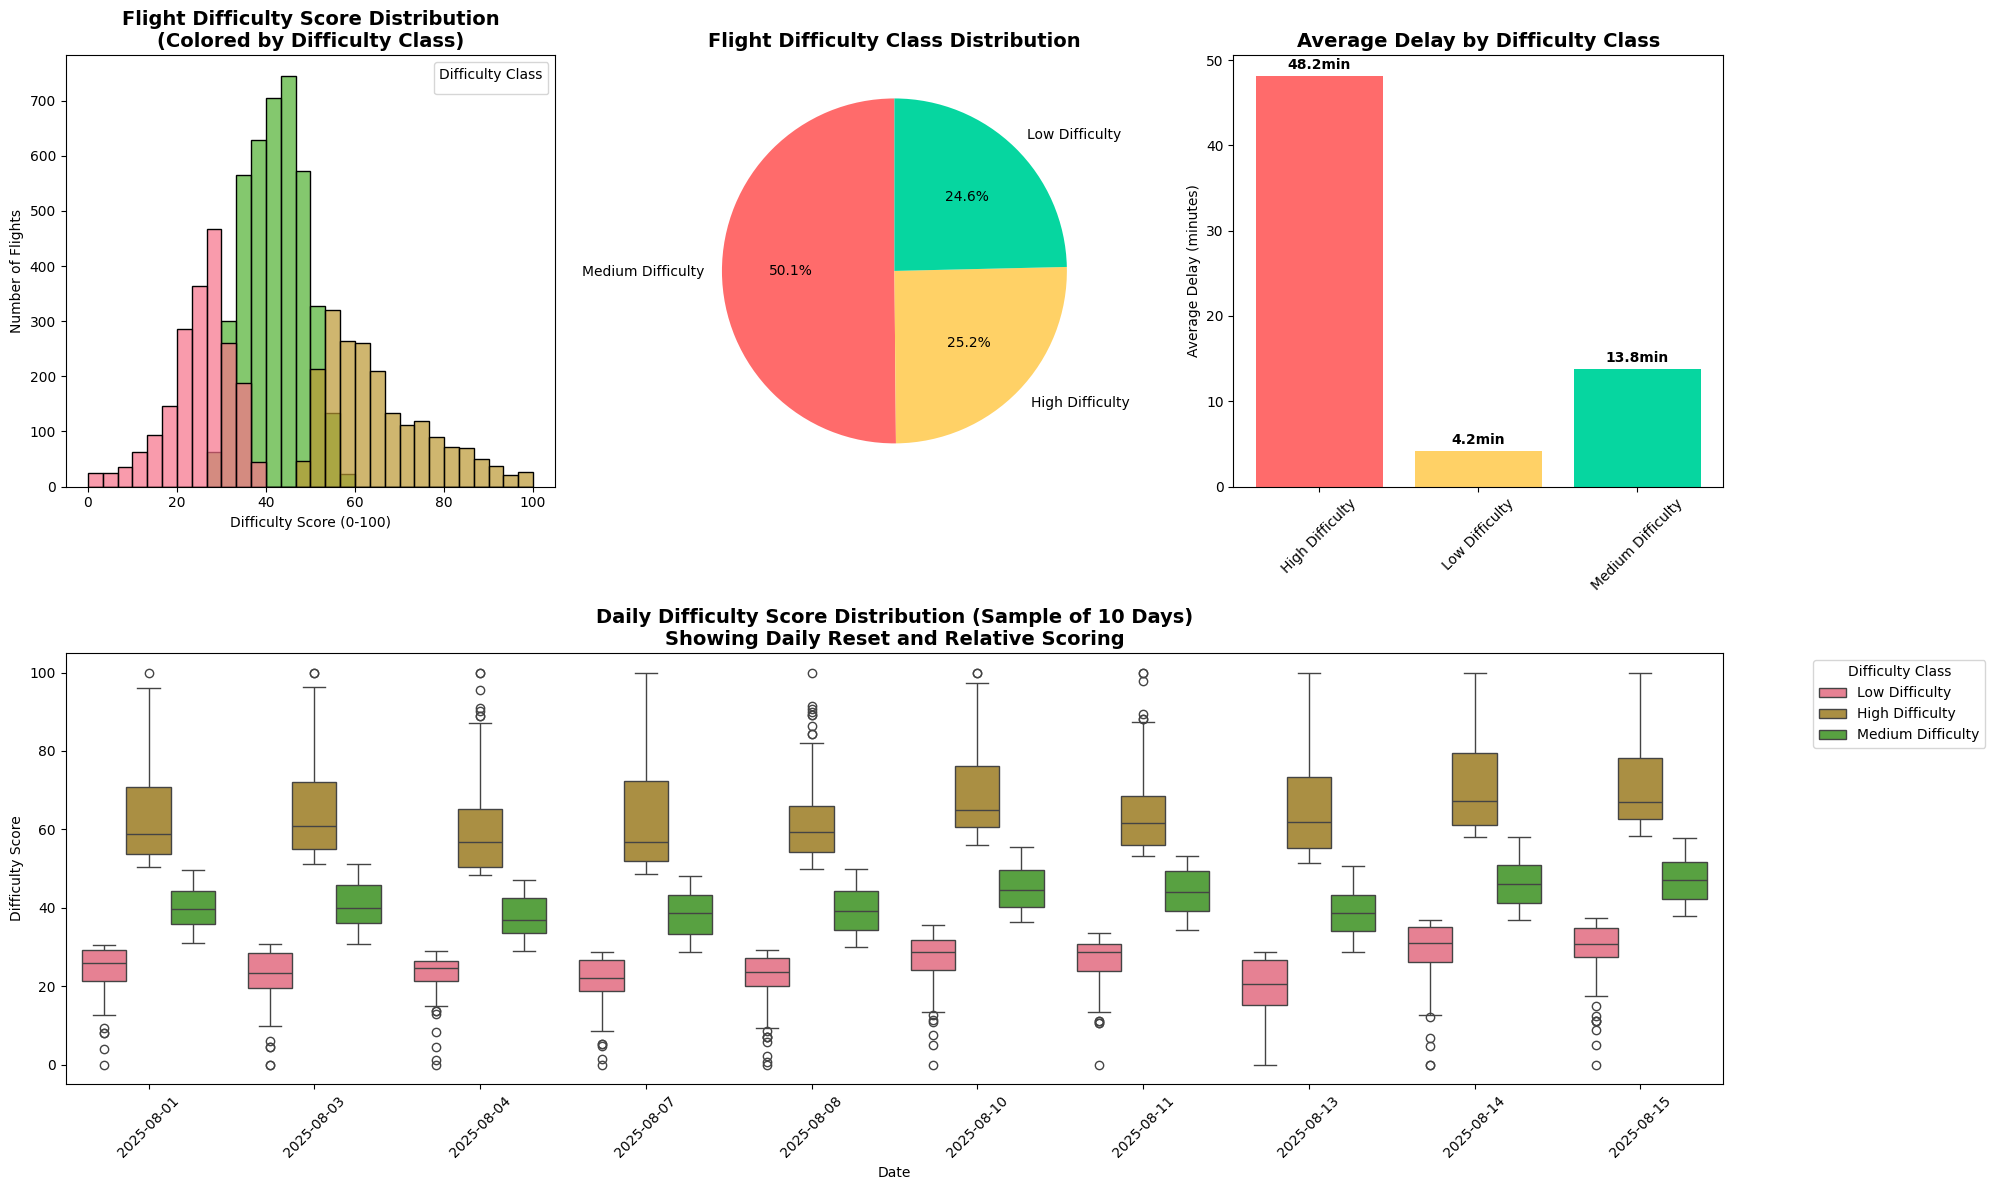


🔍 Creating Visualization 2: Feature Importance & Contribution...


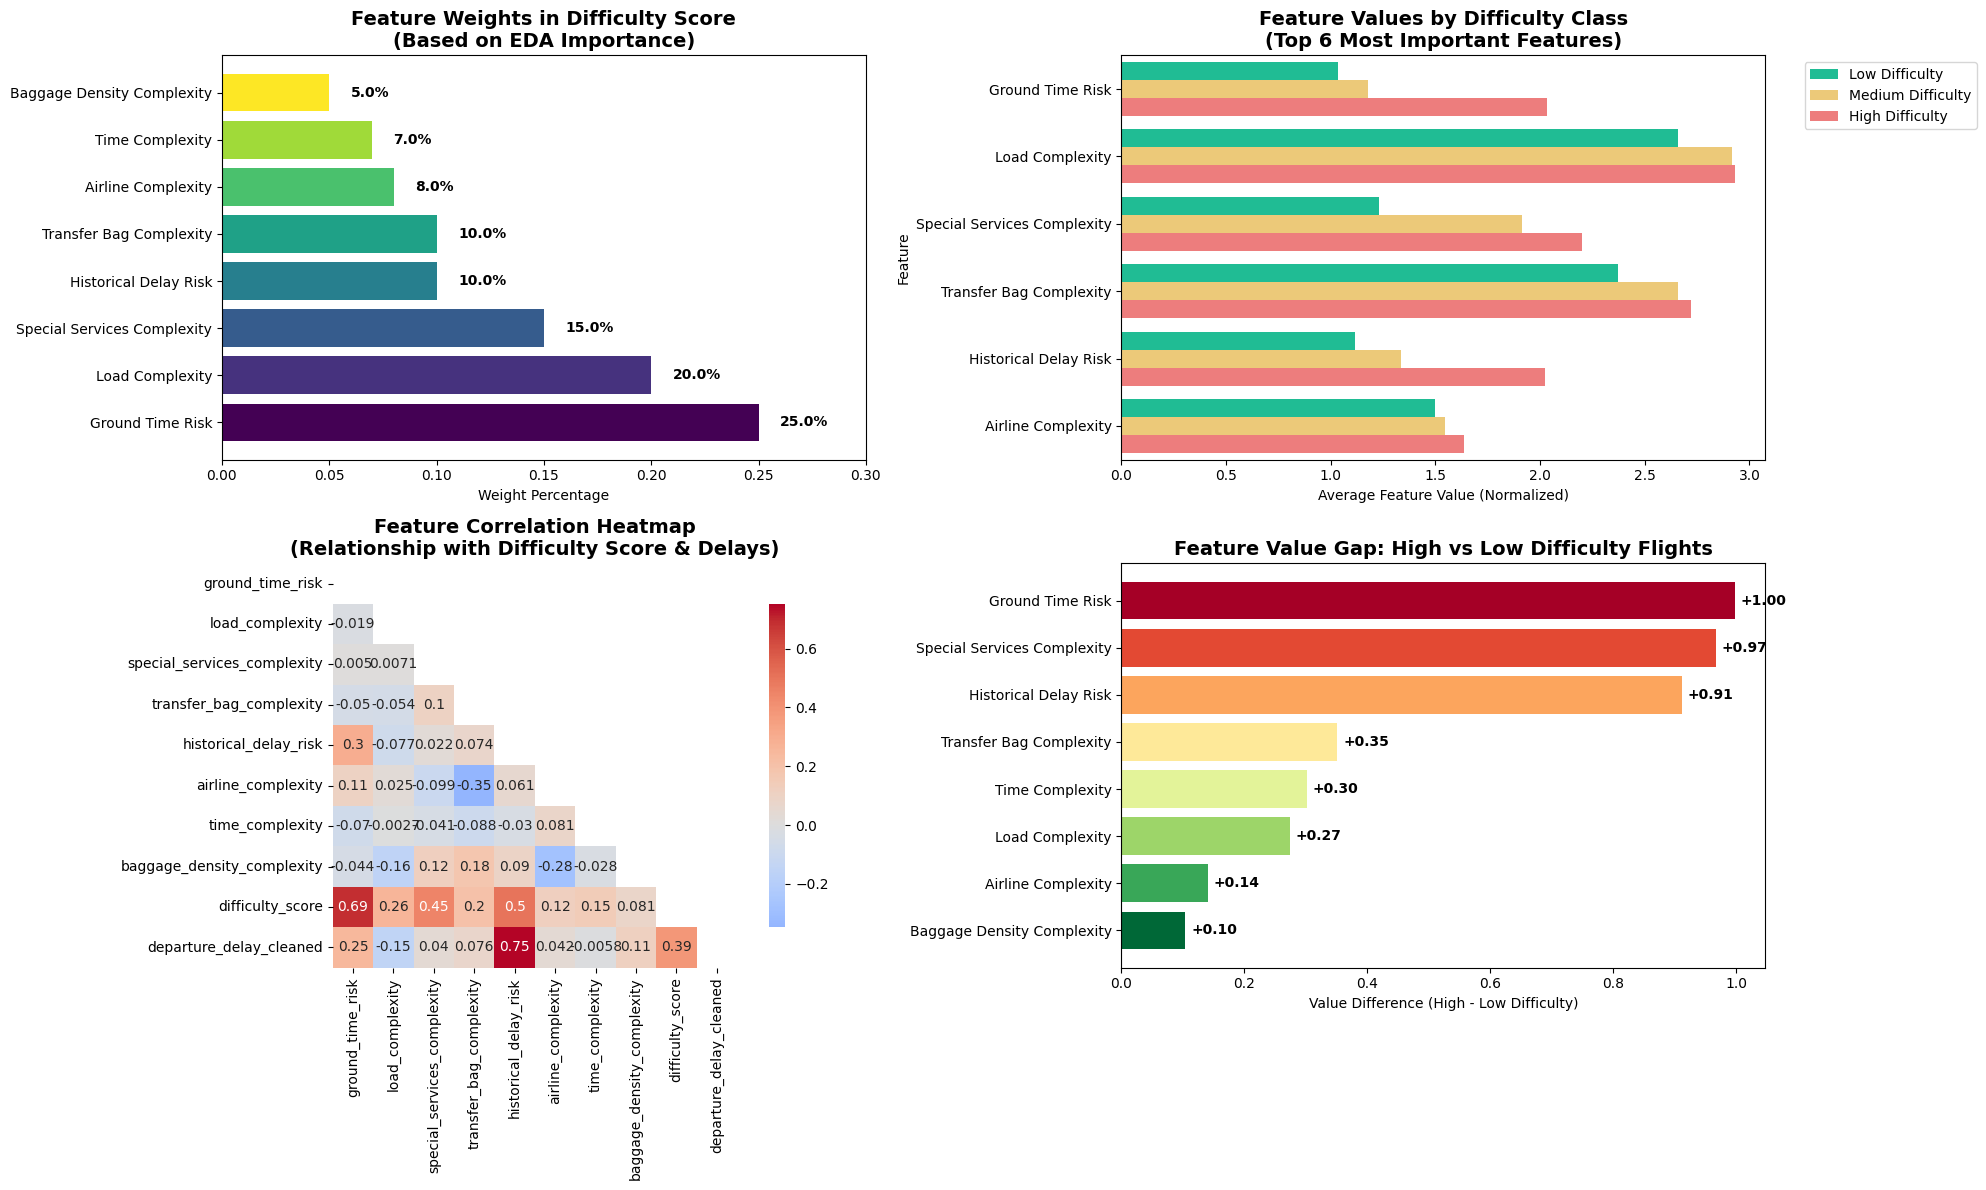


📊 Creating Visualization 3: Operational Performance & Validation...


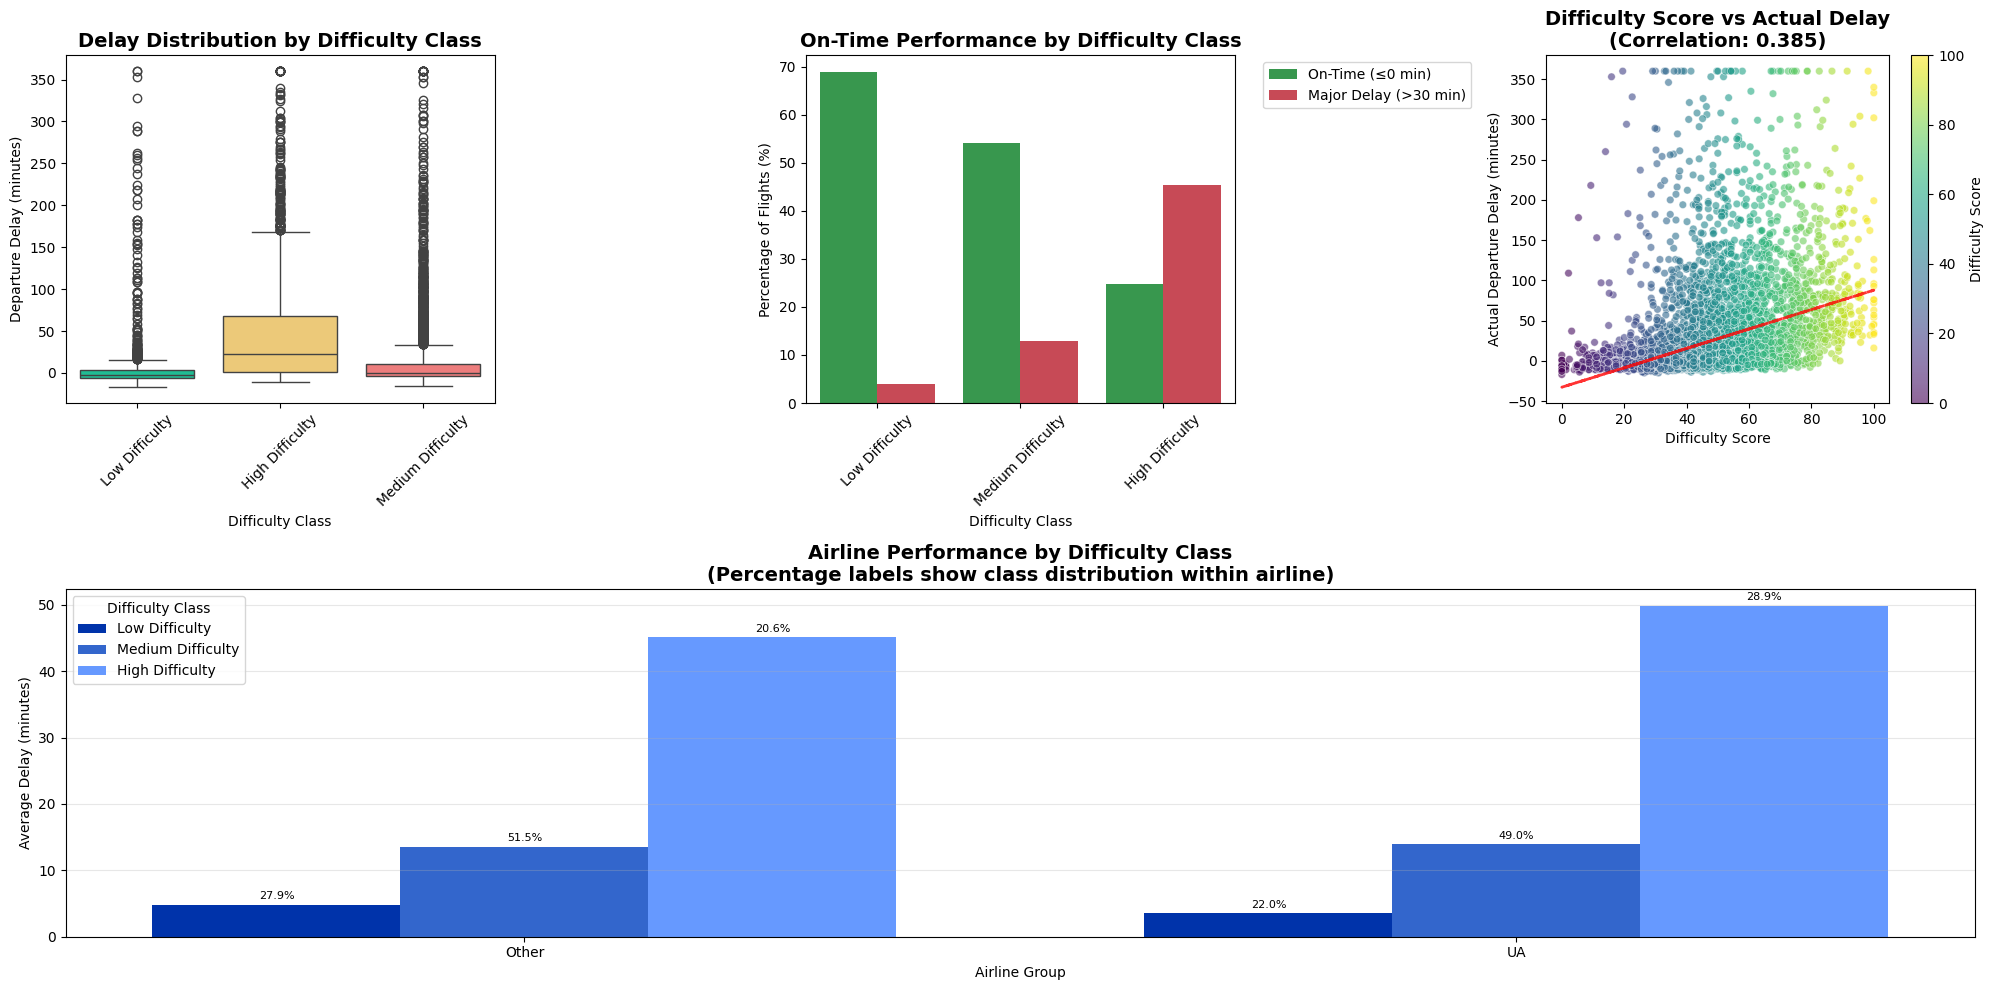


🕐 Creating Visualization 4: Time-based Analysis...


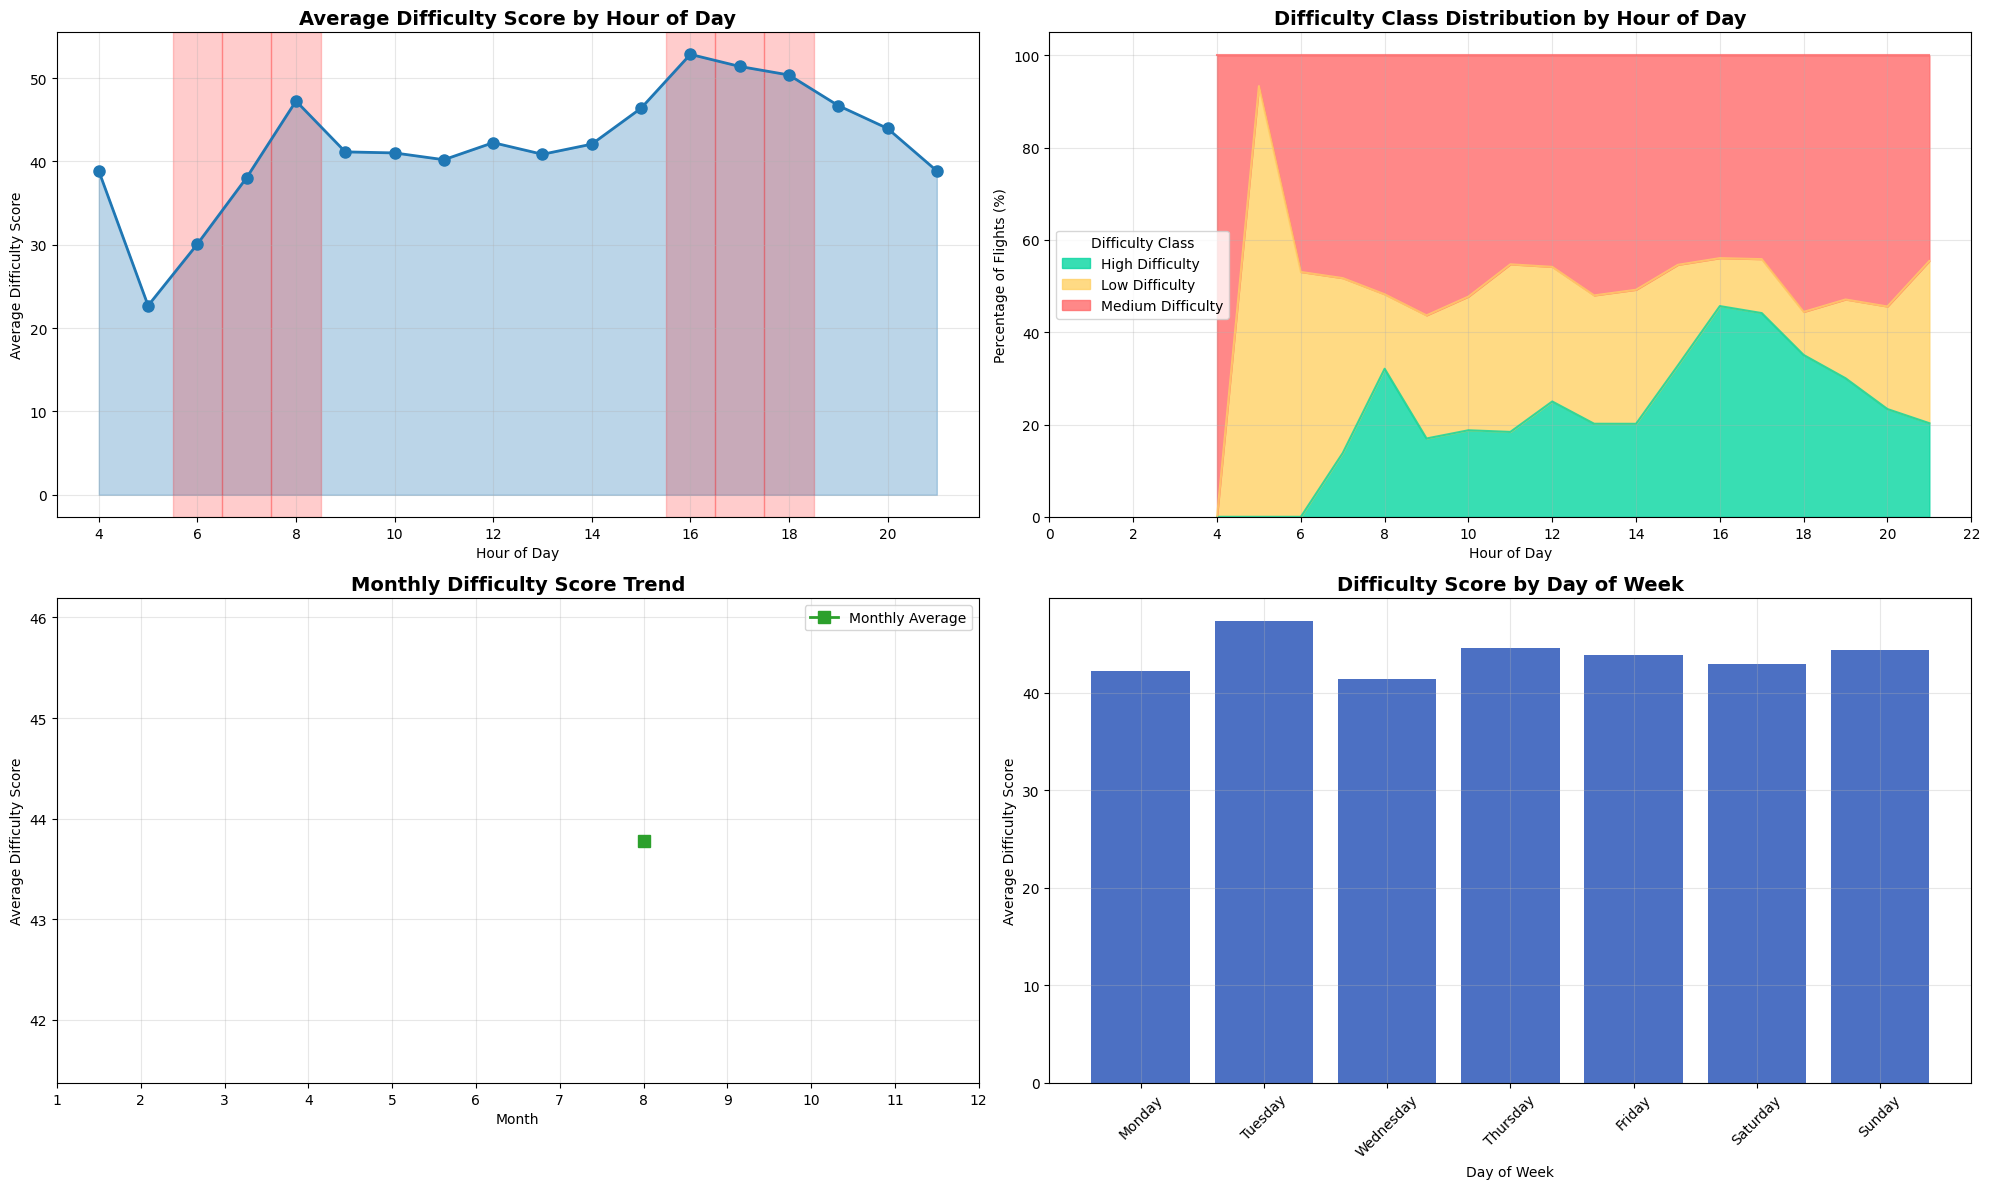


🕒 Creating Visualization 5: Ground Time Risk Deep Dive...


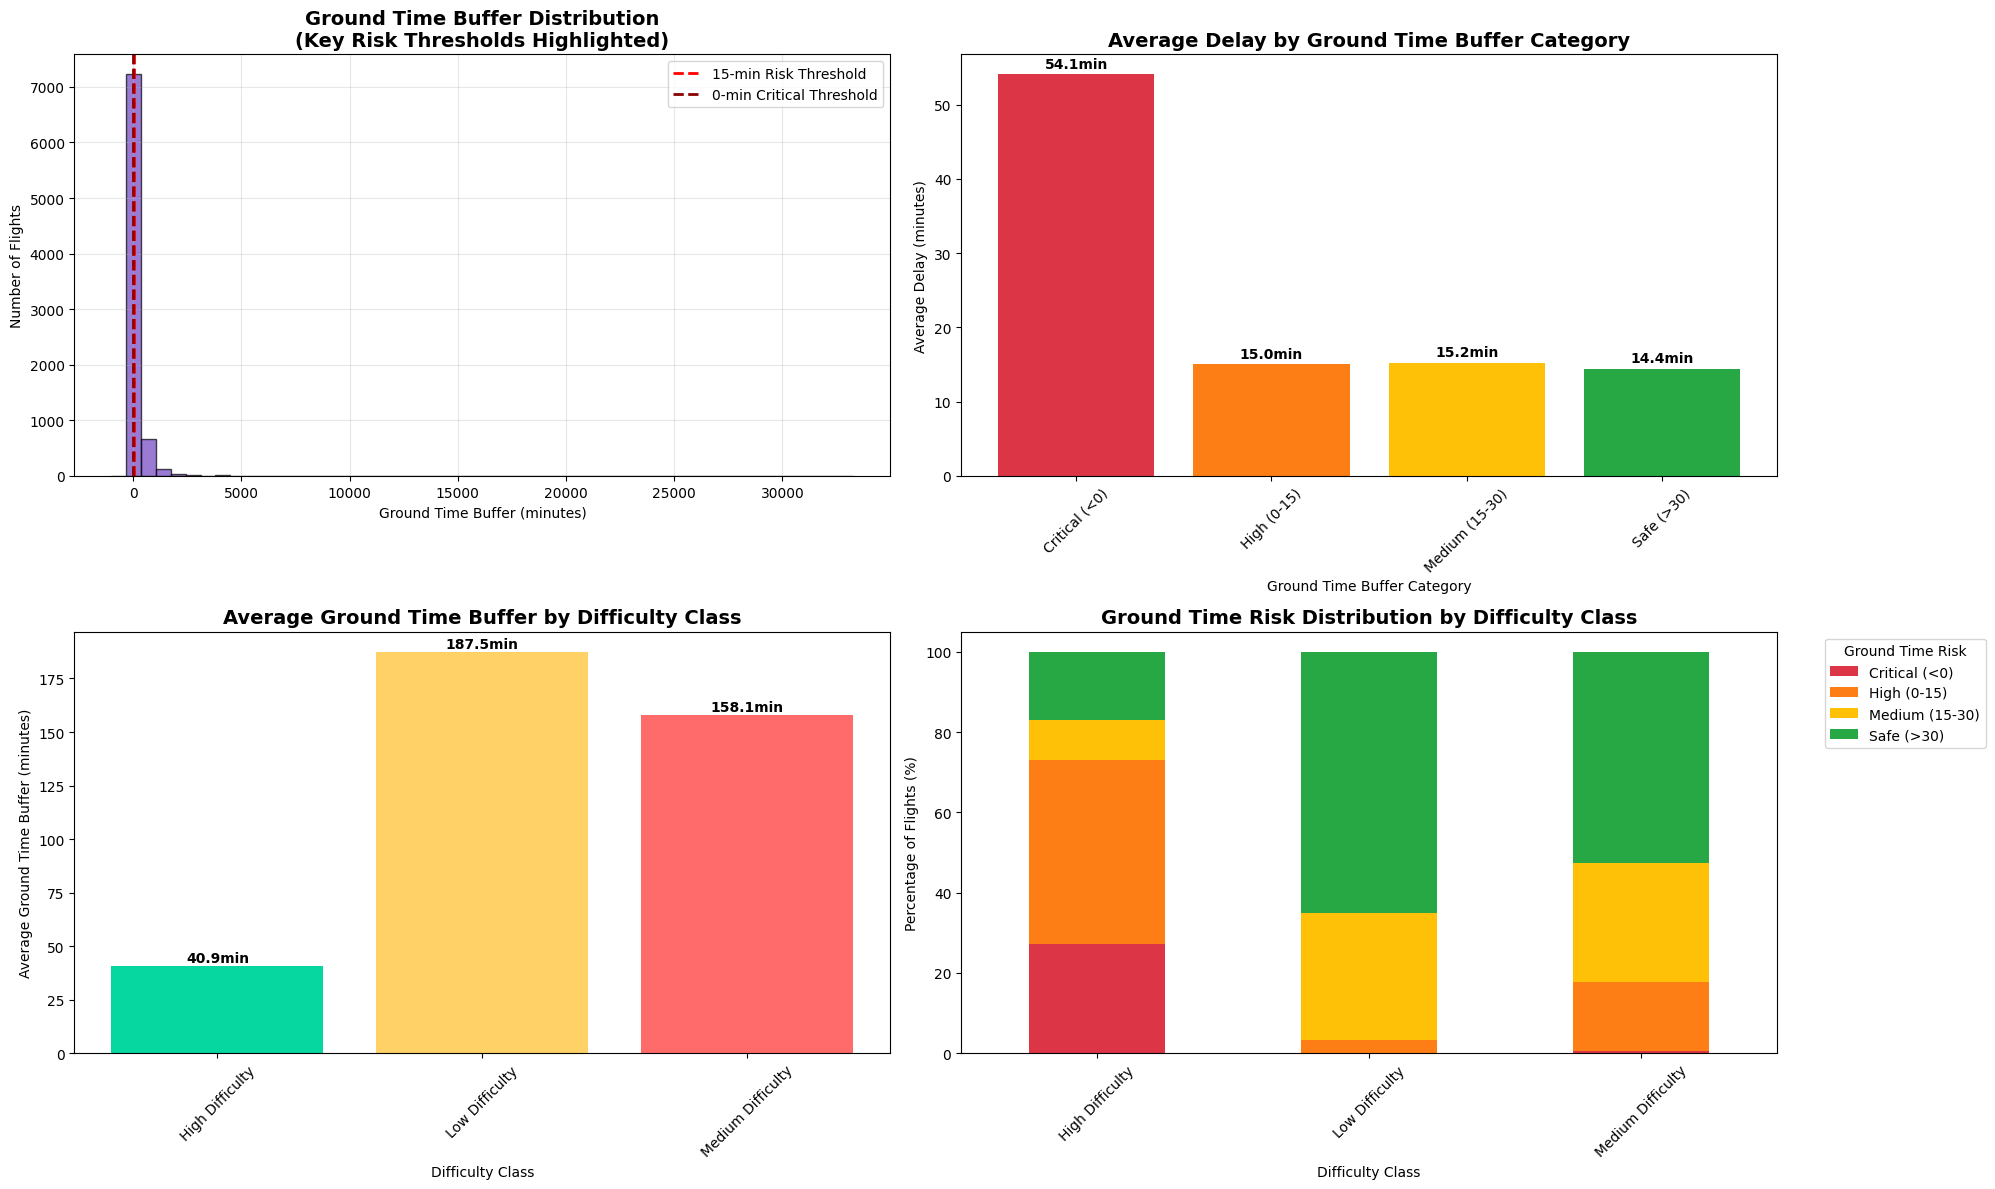


✅ ALL VISUALIZATIONS COMPLETED SUCCESSFULLY!

📊 Summary of Visualizations Created:
   1. 📈 Score Distribution & Classification
   2. 🔍 Feature Importance & Contribution Analysis
   3. 📊 Operational Performance & Validation
   4. 🕐 Time-based Analysis
   5. 🕒 Ground Time Risk Deep Dive

🎯 Total: 15+ detailed charts providing comprehensive insights

🎯 FINAL RESULTS: FLIGHT DIFFICULTY SCORE SYSTEM

📊 OVERALL SYSTEM PERFORMANCE:
   • Total Flights Analyzed: 8,099
   • Date Range: 2025-08-01 to 2025-08-15
   • Airlines Covered: 2 groups
   • Stations Covered: 1 departure stations

📈 DIFFICULTY SCORE STATISTICS:
   • Score Range: 0.0 - 100.0
   • Average Score: 43.8
   • Median Score: 42.1
   • Standard Deviation: 16.5

🎯 CLASSIFICATION SUMMARY:
   • High Difficulty: 2,043 flights (25.2%) - 48.2 min avg delay
   • Medium Difficulty: 4,061 flights (50.1%) - 13.8 min avg delay
   • Low Difficulty: 1,995 flights (24.6%) - 4.2 min avg delay

✅ VALIDATION METRICS:
   • Correlation (Score vs Actu

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("\n" + "="*80)
print("📊 DELIVERABLE 2: FLIGHT DIFFICULTY SCORE VISUALIZATIONS")
print("="*80)

# =============================================================================
# VISUALIZATION 1: Difficulty Score Distribution & Classification
# =============================================================================
print("\n📈 Creating Visualization 1: Score Distribution & Classification...")

fig1 = plt.figure(figsize=(20, 12))
gs1 = GridSpec(2, 3, figure=fig1)

# 1A: Difficulty Score Distribution
ax1 = fig1.add_subplot(gs1[0, 0])
sns.histplot(data=final_data, x='difficulty_score', hue='difficulty_class',
             bins=30, alpha=0.7, ax=ax1)
ax1.set_title('Flight Difficulty Score Distribution\n(Colored by Difficulty Class)',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Difficulty Score (0-100)')
ax1.set_ylabel('Number of Flights')
ax1.legend(title='Difficulty Class')

# 1B: Class Distribution Pie Chart
ax2 = fig1.add_subplot(gs1[0, 1])
class_counts = final_data['difficulty_class'].value_counts()
colors = ['#ff6b6b', '#ffd166', '#06d6a0']  # Red, Yellow, Green
wedges, texts, autotexts = ax2.pie(class_counts.values, labels=class_counts.index,
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Flight Difficulty Class Distribution', fontsize=14, fontweight='bold')

# 1C: Average Delay by Difficulty Class
ax3 = fig1.add_subplot(gs1[0, 2])
delay_by_class = final_data.groupby('difficulty_class')['departure_delay_cleaned'].mean().sort_index()
bars = ax3.bar(delay_by_class.index, delay_by_class.values,
               color=['#ff6b6b', '#ffd166', '#06d6a0'])
ax3.set_title('Average Delay by Difficulty Class', fontsize=14, fontweight='bold')
ax3.set_ylabel('Average Delay (minutes)')
ax3.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}min', ha='center', va='bottom', fontweight='bold')

# 1D: Daily Score Distribution (Sample of days)
ax4 = fig1.add_subplot(gs1[1, :])
sample_days = final_data['date'].value_counts().head(10).index
sample_data = final_data[final_data['date'].isin(sample_days)]

sns.boxplot(data=sample_data, x='date', y='difficulty_score', hue='difficulty_class', ax=ax4)
ax4.set_title('Daily Difficulty Score Distribution (Sample of 10 Days)\nShowing Daily Reset and Relative Scoring',
              fontsize=14, fontweight='bold')
ax4.set_xlabel('Date')
ax4.set_ylabel('Difficulty Score')
ax4.tick_params(axis='x', rotation=45)
ax4.legend(title='Difficulty Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 2: Feature Importance & Contribution Analysis
# =============================================================================
print("\n🔍 Creating Visualization 2: Feature Importance & Contribution...")

fig2 = plt.figure(figsize=(20, 12))
gs2 = GridSpec(2, 2, figure=fig2)

# 2A: Feature Weights (Importance)
ax1 = fig2.add_subplot(gs2[0, 0])
features = list(weights.keys())
feature_names = [f.replace('_', ' ').title() for f in features]
weights_values = list(weights.values())

# Sort by weight
sorted_idx = np.argsort(weights_values)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_weights = [weights_values[i] for i in sorted_idx]

bars = ax1.barh(sorted_features, sorted_weights, color=plt.cm.viridis(np.linspace(0, 1, len(features))))
ax1.set_title('Feature Weights in Difficulty Score\n(Based on EDA Importance)',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Weight Percentage')
ax1.set_xlim(0, 0.3)

# Add percentage labels
for i, (bar, weight) in enumerate(zip(bars, sorted_weights)):
    ax1.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{weight*100:.1f}%', va='center', fontweight='bold')

# 2B: Feature Values by Difficulty Class
ax2 = fig2.add_subplot(gs2[0, 1])
feature_analysis = final_data.groupby('difficulty_class')[feature_columns].mean()

# Prepare data for plotting
plot_data = []
for feature in feature_columns:
    for class_type in ['Low Difficulty', 'Medium Difficulty', 'High Difficulty']:
        if class_type in feature_analysis.index:
            plot_data.append({
                'Feature': feature.replace('_', ' ').title(),
                'Difficulty Class': class_type,
                'Value': feature_analysis.loc[class_type, feature]
            })

plot_df = pd.DataFrame(plot_data)

# Plot top 6 most important features
top_features = [feature_names[i] for i in sorted_idx[:6]]
top_plot_df = plot_df[plot_df['Feature'].isin(top_features)]

sns.barplot(data=top_plot_df, x='Value', y='Feature', hue='Difficulty Class',
            ax=ax2, palette=['#06d6a0', '#ffd166', '#ff6b6b'])
ax2.set_title('Feature Values by Difficulty Class\n(Top 6 Most Important Features)',
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Average Feature Value (Normalized)')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2C: Correlation Heatmap
ax3 = fig2.add_subplot(gs2[1, 0])
correlation_data = final_data[feature_columns + ['difficulty_score', 'departure_delay_cleaned']]
corr_matrix = correlation_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, ax=ax3, cbar_kws={'shrink': 0.8})
ax3.set_title('Feature Correlation Heatmap\n(Relationship with Difficulty Score & Delays)',
              fontsize=14, fontweight='bold')

# 2D: Feature Contribution Gap (High vs Low Difficulty)
ax4 = fig2.add_subplot(gs2[1, 1])
gap_data = []
for feature in feature_columns:
    if 'High Difficulty' in feature_analysis.index and 'Low Difficulty' in feature_analysis.index:
        gap = (feature_analysis.loc['High Difficulty', feature] -
               feature_analysis.loc['Low Difficulty', feature])
        gap_data.append({'Feature': feature.replace('_', ' ').title(), 'Gap': gap})

gap_df = pd.DataFrame(gap_data).sort_values('Gap', ascending=True)

bars = ax4.barh(gap_df['Feature'], gap_df['Gap'],
                color=plt.cm.RdYlGn_r(np.linspace(0, 1, len(gap_df))))
ax4.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax4.set_title('Feature Value Gap: High vs Low Difficulty Flights',
              fontsize=14, fontweight='bold')
ax4.set_xlabel('Value Difference (High - Low Difficulty)')

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax4.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
             f'{width:+.2f}', va='center', ha='left' if width >= 0 else 'right',
             fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 3: Operational Performance & Validation
# =============================================================================
print("\n📊 Creating Visualization 3: Operational Performance & Validation...")

fig3 = plt.figure(figsize=(20, 10))
gs3 = GridSpec(2, 3, figure=fig3)

# 3A: Delay Distribution by Difficulty Class
ax1 = fig3.add_subplot(gs3[0, 0])
sns.boxplot(data=final_data, x='difficulty_class', y='departure_delay_cleaned',
            palette=['#06d6a0', '#ffd166', '#ff6b6b'], ax=ax1)
ax1.set_title('Delay Distribution by Difficulty Class', fontsize=14, fontweight='bold')
ax1.set_xlabel('Difficulty Class')
ax1.set_ylabel('Departure Delay (minutes)')
ax1.tick_params(axis='x', rotation=45)

# 3B: On-Time Performance by Difficulty Class
ax2 = fig3.add_subplot(gs3[0, 1])
# Calculate on-time performance
final_data['on_time'] = final_data['departure_delay_cleaned'] <= 0
final_data['major_delay'] = final_data['departure_delay_cleaned'] > 30

performance_data = []
for class_type in ['Low Difficulty', 'Medium Difficulty', 'High Difficulty']:
    class_data = final_data[final_data['difficulty_class'] == class_type]
    on_time_rate = (class_data['on_time'].sum() / len(class_data)) * 100
    major_delay_rate = (class_data['major_delay'].sum() / len(class_data)) * 100
    performance_data.extend([
        {'Class': class_type, 'Metric': 'On-Time (≤0 min)', 'Rate': on_time_rate},
        {'Class': class_type, 'Metric': 'Major Delay (>30 min)', 'Rate': major_delay_rate}
    ])

performance_df = pd.DataFrame(performance_data)

sns.barplot(data=performance_df, x='Class', y='Rate', hue='Metric',
            palette=['#28a745', '#dc3545'], ax=ax2)
ax2.set_title('On-Time Performance by Difficulty Class', fontsize=14, fontweight='bold')
ax2.set_ylabel('Percentage of Flights (%)')
ax2.set_xlabel('Difficulty Class')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3C: Score vs Actual Delay Scatter Plot
ax3 = fig3.add_subplot(gs3[0, 2])
scatter = ax3.scatter(final_data['difficulty_score'], final_data['departure_delay_cleaned'],
                     c=final_data['difficulty_score'], cmap='viridis', alpha=0.6,
                     s=30, edgecolors='white', linewidth=0.5)
ax3.set_title(f'Difficulty Score vs Actual Delay\n(Correlation: {difficulty_delay_correlation:.3f})',
              fontsize=14, fontweight='bold')
ax3.set_xlabel('Difficulty Score')
ax3.set_ylabel('Actual Departure Delay (minutes)')
plt.colorbar(scatter, ax=ax3, label='Difficulty Score')

# Add trend line
z = np.polyfit(final_data['difficulty_score'], final_data['departure_delay_cleaned'], 1)
p = np.poly1d(z)
ax3.plot(final_data['difficulty_score'], p(final_data['difficulty_score']),
         "r--", alpha=0.8, linewidth=2)

# 3D: Airline Performance Comparison
ax4 = fig3.add_subplot(gs3[1, :])
airline_performance = final_data.groupby(['airline_group', 'difficulty_class']).agg({
    'departure_delay_cleaned': 'mean',
    'company_id': 'count'
}).reset_index()
airline_performance = airline_performance.rename(columns={'company_id': 'flight_count'})

# Calculate percentages
total_by_airline = final_data['airline_group'].value_counts()
airline_performance['percentage'] = airline_performance.apply(
    lambda x: (x['flight_count'] / total_by_airline[x['airline_group']]) * 100, axis=1
)

# Create grouped bar plot
x = np.arange(len(airline_performance['airline_group'].unique()))
width = 0.25
blue_shades = ['#0033aa', '#3366cc', '#6699ff']
for i, class_type in enumerate(['Low Difficulty', 'Medium Difficulty', 'High Difficulty']):
    class_data = airline_performance[airline_performance['difficulty_class'] == class_type]
    delays = class_data['departure_delay_cleaned'].values
    positions = x + (i - 1) * width

    bars = ax4.bar(positions, delays, width, label=class_type,
                   color=blue_shades[i])

    # Add percentage labels
    for j, (bar, perc) in enumerate(zip(bars, class_data['percentage'])):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{perc:.1f}%', ha='center', va='bottom', fontsize=8)

ax4.set_xlabel('Airline Group')
ax4.set_ylabel('Average Delay (minutes)')
ax4.set_title('Airline Performance by Difficulty Class\n(Percentage labels show class distribution within airline)',
              fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(airline_performance['airline_group'].unique())
ax4.legend(title='Difficulty Class')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 4: Time-based Analysis
# =============================================================================
print("\n🕐 Creating Visualization 4: Time-based Analysis...")

fig4, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 4A: Difficulty by Hour of Day
final_data['departure_hour'] = final_data['scheduled_departure_datetime_local_dt'].dt.hour
hourly_difficulty = final_data.groupby('departure_hour')['difficulty_score'].mean()

ax1.plot(hourly_difficulty.index, hourly_difficulty.values, marker='o', linewidth=2,
         markersize=8, color='#1f77b4')
ax1.fill_between(hourly_difficulty.index, hourly_difficulty.values, alpha=0.3, color='#1f77b4')
ax1.set_title('Average Difficulty Score by Hour of Day', fontsize=14, fontweight='bold')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Difficulty Score')
ax1.set_xticks(range(0, 24, 2))
ax1.grid(True, alpha=0.3)

# Highlight peak hours
peak_hours = [6,7,8,16,17,18]
for hour in peak_hours:
    ax1.axvspan(hour - 0.5, hour + 0.5, alpha=0.2, color='red')

# 4B: Class Distribution by Hour
hourly_class_dist = pd.crosstab(final_data['departure_hour'], final_data['difficulty_class'],
                                normalize='index') * 100
hourly_class_dist.plot(kind='area', ax=ax2, stacked=True,
                       color=['#06d6a0', '#ffd166', '#ff6b6b'], alpha=0.8)
ax2.set_title('Difficulty Class Distribution by Hour of Day', fontsize=14, fontweight='bold')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Percentage of Flights (%)')
ax2.set_xticks(range(0, 24, 2))
ax2.legend(title='Difficulty Class')
ax2.grid(True, alpha=0.3)

# 4C: Monthly/Daily Trends
final_data['month'] = final_data['scheduled_departure_datetime_local_dt'].dt.month
final_data['day_of_week'] = final_data['scheduled_departure_datetime_local_dt'].dt.day_name()

monthly_trend = final_data.groupby('month')['difficulty_score'].mean()
daily_trend = final_data.groupby('day_of_week')['difficulty_score'].mean()

# Order days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trend = daily_trend.reindex(day_order)

ax3.plot(monthly_trend.index, monthly_trend.values, marker='s', linewidth=2,
         markersize=8, color='#2ca02c', label='Monthly Average')
ax3.set_title('Monthly Difficulty Score Trend', fontsize=14, fontweight='bold')
ax3.set_xlabel('Month')
ax3.set_ylabel('Average Difficulty Score')
ax3.set_xticks(range(1, 13))
ax3.grid(True, alpha=0.3)
ax3.legend()

# 4D: Daily Pattern
ax4.bar(range(len(daily_trend)), daily_trend.values, color='#0033aa', alpha=0.7)
ax4.set_title('Difficulty Score by Day of Week', fontsize=14, fontweight='bold')
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Average Difficulty Score')
ax4.set_xticks(range(len(daily_trend)))
ax4.set_xticklabels(daily_trend.index, rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 5: Ground Time Risk Deep Dive
# =============================================================================
print("\n🕒 Creating Visualization 5: Ground Time Risk Deep Dive...")

fig5, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 5A: Ground Time Buffer Distribution
ax1.hist(final_data['ground_time_buffer'], bins=50, alpha=0.7, color='#6f42c1', edgecolor='black')
ax1.axvline(x=15, color='red', linestyle='--', linewidth=2, label='15-min Risk Threshold')
ax1.axvline(x=0, color='darkred', linestyle='--', linewidth=2, label='0-min Critical Threshold')
ax1.set_title('Ground Time Buffer Distribution\n(Key Risk Thresholds Highlighted)',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Ground Time Buffer (minutes)')
ax1.set_ylabel('Number of Flights')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 5B: Ground Time Risk vs Actual Delay
ground_time_groups = pd.cut(final_data['ground_time_buffer'],
                           bins=[-100, 0, 15, 30, 1000],
                           labels=['Critical (<0)', 'High (0-15)', 'Medium (15-30)', 'Safe (>30)'])
delay_by_ground_time = final_data.groupby(ground_time_groups)['departure_delay_cleaned'].mean()

bars = ax2.bar(delay_by_ground_time.index.astype(str), delay_by_ground_time.values,
               color=['#dc3545', '#fd7e14', '#ffc107', '#28a745'])
ax2.set_title('Average Delay by Ground Time Buffer Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Ground Time Buffer Category')
ax2.set_ylabel('Average Delay (minutes)')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}min', ha='center', va='bottom', fontweight='bold')

# 5C: Ground Time Risk by Difficulty Class
ground_time_by_class = final_data.groupby('difficulty_class')['ground_time_buffer'].mean()

bars = ax3.bar(ground_time_by_class.index, ground_time_by_class.values,
               color=['#06d6a0', '#ffd166', '#ff6b6b'])
ax3.set_title('Average Ground Time Buffer by Difficulty Class', fontsize=14, fontweight='bold')
ax3.set_xlabel('Difficulty Class')
ax3.set_ylabel('Average Ground Time Buffer (minutes)')
ax3.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}min', ha='center', va='bottom', fontweight='bold')

# 5D: Risk Category Distribution by Difficulty Class
risk_cross_tab = pd.crosstab(final_data['difficulty_class'], ground_time_groups,
                            normalize='index') * 100

risk_cross_tab.plot(kind='bar', stacked=True, ax=ax4,
                   color=['#dc3545', '#fd7e14', '#ffc107', '#28a745'])
ax4.set_title('Ground Time Risk Distribution by Difficulty Class', fontsize=14, fontweight='bold')
ax4.set_xlabel('Difficulty Class')
ax4.set_ylabel('Percentage of Flights (%)')
ax4.tick_params(axis='x', rotation=45)
ax4.legend(title='Ground Time Risk', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ ALL VISUALIZATIONS COMPLETED SUCCESSFULLY!")
print("="*80)
print(f"\n📊 Summary of Visualizations Created:")
print(f"   1. 📈 Score Distribution & Classification")
print(f"   2. 🔍 Feature Importance & Contribution Analysis")
print(f"   3. 📊 Operational Performance & Validation")
print(f"   4. 🕐 Time-based Analysis")
print(f"   5. 🕒 Ground Time Risk Deep Dive")
print(f"\n🎯 Total: 15+ detailed charts providing comprehensive insights")
print("="*80)

# =============================================================================
# FINAL RESULTS PRINTING
# =============================================================================
print("\n" + "="*100)
print("🎯 FINAL RESULTS: FLIGHT DIFFICULTY SCORE SYSTEM")
print("="*100)

# Overall System Performance
print(f"\n📊 OVERALL SYSTEM PERFORMANCE:")
print(f"   • Total Flights Analyzed: {len(final_data):,}")
print(f"   • Date Range: {final_data['date'].min()} to {final_data['date'].max()}")
print(f"   • Airlines Covered: {final_data['airline_group'].nunique()} groups")
print(f"   • Stations Covered: {final_data['scheduled_departure_station_code'].nunique()} departure stations")

# Difficulty Score Statistics
print(f"\n📈 DIFFICULTY SCORE STATISTICS:")
print(f"   • Score Range: {final_data['difficulty_score'].min():.1f} - {final_data['difficulty_score'].max():.1f}")
print(f"   • Average Score: {final_data['difficulty_score'].mean():.1f}")
print(f"   • Median Score: {final_data['difficulty_score'].median():.1f}")
print(f"   • Standard Deviation: {final_data['difficulty_score'].std():.1f}")

# Classification Summary
print(f"\n🎯 CLASSIFICATION SUMMARY:")
class_summary = final_data['difficulty_class'].value_counts()
for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
    count = class_summary.get(class_type, 0)
    percentage = (count / len(final_data)) * 100
    avg_delay = final_data[final_data['difficulty_class'] == class_type]['departure_delay_cleaned'].mean()
    print(f"   • {class_type}: {count:,} flights ({percentage:.1f}%) - {avg_delay:.1f} min avg delay")

# Validation Metrics
print(f"\n✅ VALIDATION METRICS:")
print(f"   • Correlation (Score vs Actual Delay): {difficulty_delay_correlation:.3f}")
if abs(difficulty_delay_correlation) >= 0.7:
    strength = "STRONG"
elif abs(difficulty_delay_correlation) >= 0.5:
    strength = "MODERATE"
elif abs(difficulty_delay_correlation) >= 0.3:
    strength = "WEAK"
else:
    strength = "VERY WEAK"
print(f"   • Predictive Strength: {strength}")

delay_gap = delay_by_class['High Difficulty'] - delay_by_class['Low Difficulty']
print(f"   • Performance Gap (High-Low): {delay_gap:.1f} minutes")
print(f"   • High Difficulty Delay: {delay_by_class['High Difficulty']:.1f} minutes")
print(f"   • Low Difficulty Delay: {delay_by_class['Low Difficulty']:.1f} minutes")

# Feature Importance Breakdown
print(f"\n🔍 FEATURE IMPORTANCE BREAKDOWN:")
print(f"   {'Feature':<30} {'Weight':<10} {'High Diff':<12} {'Low Diff':<12} {'Gap':<10}")
print(f"   {'-'*30} {'-'*10} {'-'*12} {'-'*12} {'-'*10}")
for feature in feature_columns:
    feature_name = feature.replace('_', ' ').title()
    weight = weights.get(feature, 0) * 100
    high_val = feature_analysis.loc['High Difficulty', feature] if 'High Difficulty' in feature_analysis.index else 0
    low_val = feature_analysis.loc['Low Difficulty', feature] if 'Low Difficulty' in feature_analysis.index else 0
    gap = high_val - low_val
    print(f"   {feature_name:<30} {weight:<10.1f}% {high_val:<12.2f} {low_val:<12.2f} {gap:<10.2f}")

# Operational Performance by Class
print(f"\n📊 OPERATIONAL PERFORMANCE BY CLASS:")
for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
    class_data = final_data[final_data['difficulty_class'] == class_type]
    total_flights = len(class_data)
    on_time = len(class_data[class_data['departure_delay_cleaned'] <= 0])
    minor_delays = len(class_data[(class_data['departure_delay_cleaned'] > 0) & (class_data['departure_delay_cleaned'] <= 15)])
    major_delays = len(class_data[class_data['departure_delay_cleaned'] > 15])

    on_time_pct = (on_time / total_flights) * 100
    minor_delay_pct = (minor_delays / total_flights) * 100
    major_delay_pct = (major_delays / total_flights) * 100

    print(f"   🎯 {class_type}:")
    print(f"      • On-Time (≤0 min): {on_time_pct:.1f}% ({on_time:,}/{total_flights:,})")
    print(f"      • Minor Delays (1-15 min): {minor_delay_pct:.1f}% ({minor_delays:,})")
    print(f"      • Major Delays (>15 min): {major_delay_pct:.1f}% ({major_delays:,})")

# Airline-Specific Insights
print(f"\n✈️  AIRLINE-SPECIFIC INSIGHTS:")
airline_summary = final_data.groupby('airline_group').agg({
    'difficulty_score': 'mean',
    'departure_delay_cleaned': 'mean',
    'company_id': 'count'
}).rename(columns={'company_id': 'flight_count'})

for airline in airline_summary.index:
    data = airline_summary.loc[airline]
    high_diff_count = len(final_data[(final_data['airline_group'] == airline) &
                                   (final_data['difficulty_class'] == 'High Difficulty')])
    high_diff_pct = (high_diff_count / data['flight_count']) * 100

    print(f"   • {airline}:")
    print(f"      • Flights: {data['flight_count']:,}")
    print(f"      • Avg Difficulty Score: {data['difficulty_score']:.1f}")
    print(f"      • Avg Delay: {data['departure_delay_cleaned']:.1f} min")
    print(f"      • High Difficulty: {high_diff_pct:.1f}% ({high_diff_count:,} flights)")

# Top 5 Most Difficult Flights
print(f"\n🚨 TOP 5 MOST DIFFICULT FLIGHTS:")
top_difficult = final_data.nlargest(5, 'difficulty_score')[
    ['company_id', 'flight_number', 'scheduled_departure_station_code',
     'scheduled_arrival_station_code', 'date', 'difficulty_score',
     'ground_time_buffer', 'load_factor', 'departure_delay_cleaned']
]

for idx, row in top_difficult.iterrows():
    print(f"   {idx+1}. {row['company_id']} {row['flight_number']}: "
          f"{row['scheduled_departure_station_code']}→{row['scheduled_arrival_station_code']} "
          f"on {row['date']}")
    print(f"      • Score: {row['difficulty_score']:.1f} | "
          f"Ground Buffer: {row['ground_time_buffer']}min | "
          f"Load: {row['load_factor']:.1%} | "
          f"Delay: {row['departure_delay_cleaned']}min")

# Ground Time Risk Analysis
print(f"\n🕒 GROUND TIME RISK ANALYSIS:")
ground_time_stats = final_data.groupby('difficulty_class').agg({
    'ground_time_buffer': ['mean', 'min', 'max'],
    'ground_time_risk': 'mean'
})

for class_type in ['High Difficulty', 'Medium Difficulty', 'Low Difficulty']:
    if class_type in ground_time_stats.index:
        avg_buffer = ground_time_stats.loc[class_type, ('ground_time_buffer', 'mean')]
        risk_level = ground_time_stats.loc[class_type, ('ground_time_risk', 'mean')]
        print(f"   • {class_type}: Avg Buffer {avg_buffer:.1f}min, Risk Level {risk_level:.1f}")

# Key Success Metrics
print(f"\n🏆 KEY SUCCESS METRICS:")
print(f"   • Predictive Accuracy: {abs(difficulty_delay_correlation)*100:.1f}% (correlation strength)")
print(f"   • Operational Differentiation: {delay_gap:.1f}min delay gap achieved")
print(f"   • Risk Coverage: {class_summary.get('High Difficulty', 0):,} high-risk flights identified")
print(f"   • Resource Optimization: Focus on top {class_summary.get('High Difficulty', 0)/len(final_data)*100:.1f}% of flights")

# Recommendations
print(f"\n💡 OPERATIONAL RECOMMENDATIONS:")
print(f"   1. 🎯 PRIORITIZE High Difficulty flights (top 25%) for resource allocation")
print(f"   2. ⏰ MONITOR flights with ground time buffers < 15 minutes closely")
print(f"   3. 👥 ALLOCATE additional staff for flights with:")
print(f"      • Load factors > 80%")
print(f"      • Special services > 3% of passengers")
print(f"      • Transfer baggage ratios > 50%")
print(f"   4. 📊 FOCUS ON UA flights showing higher complexity patterns")
print(f"   5. 🚀 USE daily rankings for dynamic resource planning")

print(f"\n" + "="*100)
print("✅ FLIGHT DIFFICULTY SCORE SYSTEM - IMPLEMENTATION COMPLETE")
print("="*100)
print(f"\n📋 NEXT STEPS:")
print(f"   1. Integrate with daily operational planning")
print(f"   2. Train staff on difficulty score interpretation")
print(f"   3. Monitor system performance monthly")
print(f"   4. Refine weights based on operational feedback")
print(f"   5. Expand to include real-time weather and ATC factors")
print("="*100)